# TTT4185 Machine learning for Speech technology

## Computer assigment 3a: Classification using Deep Neural Networks

This assignment assumes that the student has reviewed the material on deep neural networks.

In this assignment we will use the high level `Keras` framework together with `Tensorflow` to perform some deep learning experiments.

We will be using a small database of phonemes, where each phoneme is represented by the four first formant positions ("F1"-"F4") and their corresponding bandwidths ("B1"-"B4"). All numbers are in kHz. In addition, the speaker ID and the gender of the speaker are given for each phoneme.

The first few cells of this notebook contain example code to load and extract data, setup a simple network and train a deep neural network for classification. 

Note that we do not have a test dataset, but only training and validation sets. We do some experiments on the training set and observe the effect on the validation set.

In [2]:
#!pip install numpy pandas matplotlib tensorflow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras

In [3]:
# Load data from CSV files 
rawtrain = pd.read_csv("Train_3.csv")
rawvalid = pd.read_csv("Validation.csv")

# Take a peek at the raw data
rawtrain.head(10)

SpeakerID Gender Phoneme        F1        F2        F3        F4        B1  \
0      cjf0      F      h#  0.701982  2.125440  2.433528  3.530050  0.264459   
1      cjf0      F       q  0.340942  2.594934  2.788244  4.028250  0.282159   
2      cjf0      F      iy  0.487078  2.605132  3.093409  4.354061  0.174520   
3      cjf0      F       v  0.505536  2.034326  2.804329  4.130655  0.190478   
4      cjf0      F      ih  0.524527  2.055382  2.989248  4.480000  0.164466   
5      cjf0      F       n  0.601591  2.046562  3.251497  4.561420  0.185757   
6      cjf0      F      eh  0.762154  2.127740  3.212496  4.412842  0.207840   
7      cjf0      F       n  0.714553  1.837149  3.218620  5.001730  0.252105   
8      cjf0      F       q  0.619766  2.276717  3.109751  4.658425  0.231525   
9      cjf0      F      ix  0.463761  2.181577  2.859900  4.327639  0.170244   

         B2        B3        B4  
0  0.326273  0.300301  0.410096  
1  0.471724  0.310578  0.505835  
2  0.340025  0.232818  0.413965  
3  0.307295  0.301741  0.370238  
4  0.312337  0.301859  0.362134  
5  0.334235  0.316704  0.381524  
6  0.303633  0.285026  0.384152  
7  0.311876  0.333318  0.432281  
8  0.314789  0.406002  0.417538  
9  0.319690  0.291556  0.425367

In [4]:
# We will be classifying three different vowels. Extract the training and validation data
phonemes = ["ae", "ey", "ux"]
train = rawtrain[rawtrain["Phoneme"].isin(phonemes)]
valid = rawvalid[rawvalid["Phoneme"].isin(phonemes)]
trainlabels = [phonemes.index(ph) for ph in train["Phoneme"]]
validlabels = [phonemes.index(ph) for ph in valid["Phoneme"]]

In [5]:
# Features to use
features = ["F1","F2"]

# Extract features
x_train_raw = train[features]
x_valid_raw = valid[features]

# Normalize to zero mean
x_mean = np.mean(x_train_raw)
x_std = np.std(x_train_raw)
x_train = x_train_raw - x_mean
x_valid = x_valid_raw - x_mean

# Fix labels. The "to_categorical" call maps integer labels {n}
# to a vector of length N (number of labels) with a one in position n
y_train = keras.utils.to_categorical(trainlabels, len(phonemes))
y_valid = keras.utils.to_categorical(validlabels, len(phonemes))

In [6]:
# Create a model with a single hidden layer
model = keras.Sequential([
    keras.layers.Dense(256, activation=tf.nn.relu, input_dim=x_train.shape[1]),
    keras.layers.Dense(len(phonemes), activation=tf.nn.softmax)
])
model.summary()

# Train the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                    epochs=1000, batch_size=32, verbose=True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               768       
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 771       
Total params: 1,539
Trainable params: 1,539
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
18/18 [==============================] - 0s 5ms/step - loss: 1.0677 - accuracy: 0.6151 - val_loss: 1.0354 - val_accuracy: 0.6458
Epoch 2/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.9883 - accuracy: 0.6871 - val_loss: 0.9792 - val_accuracy: 0.6236
Epoch 3/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.9193 - accuracy: 0.6781 - val_loss: 0.9298 - val_accuracy: 0.6199
Epoch 4/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.8602 - accurac

Epoch 54/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4791 - accuracy: 0.8058 - val_loss: 0.5887 - val_accuracy: 0.7417
Epoch 55/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4777 - accuracy: 0.8076 - val_loss: 0.5995 - val_accuracy: 0.7380
Epoch 56/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4784 - accuracy: 0.8094 - val_loss: 0.5921 - val_accuracy: 0.7454
Epoch 57/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4776 - accuracy: 0.8112 - val_loss: 0.5892 - val_accuracy: 0.7417
Epoch 58/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4794 - accuracy: 0.8058 - val_loss: 0.5937 - val_accuracy: 0.7417
Epoch 59/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4771 - accuracy: 0.8076 - val_loss: 0.5901 - val_accuracy: 0.7454
Epoch 60/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4783 - accuracy: 0.8165 - val_loss: 0.5938 - val_accuracy: 0.7454

18/18 [==============================] - 0s 1ms/step - loss: 0.4684 - accuracy: 0.8147 - val_loss: 0.5956 - val_accuracy: 0.7417
Epoch 112/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4682 - accuracy: 0.8112 - val_loss: 0.5886 - val_accuracy: 0.7454
Epoch 113/1000
18/18 [==============================] - 0s 942us/step - loss: 0.4691 - accuracy: 0.8058 - val_loss: 0.6000 - val_accuracy: 0.7417
Epoch 114/1000
18/18 [==============================] - 0s 942us/step - loss: 0.4688 - accuracy: 0.8076 - val_loss: 0.5892 - val_accuracy: 0.7417
Epoch 115/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4714 - accuracy: 0.8040 - val_loss: 0.6067 - val_accuracy: 0.7454
Epoch 116/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4682 - accuracy: 0.8094 - val_loss: 0.5867 - val_accuracy: 0.7417
Epoch 117/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4696 - accuracy: 0.8076 - val_loss: 0.5867 - val_accuracy: 0.7454
Epo

Epoch 168/1000
18/18 [==============================] - 0s 942us/step - loss: 0.4615 - accuracy: 0.8129 - val_loss: 0.5956 - val_accuracy: 0.7417
Epoch 169/1000
18/18 [==============================] - 0s 942us/step - loss: 0.4642 - accuracy: 0.8112 - val_loss: 0.5932 - val_accuracy: 0.7417
Epoch 170/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4618 - accuracy: 0.8165 - val_loss: 0.5965 - val_accuracy: 0.7417
Epoch 171/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4614 - accuracy: 0.8165 - val_loss: 0.5977 - val_accuracy: 0.7417
Epoch 172/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4620 - accuracy: 0.8112 - val_loss: 0.5959 - val_accuracy: 0.7417
Epoch 173/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4612 - accuracy: 0.8129 - val_loss: 0.5992 - val_accuracy: 0.7417
Epoch 174/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4614 - accuracy: 0.8129 - val_loss: 0.5952 - val_accur

Epoch 225/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4590 - accuracy: 0.8112 - val_loss: 0.6053 - val_accuracy: 0.7454
Epoch 226/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4582 - accuracy: 0.8112 - val_loss: 0.6043 - val_accuracy: 0.7380
Epoch 227/1000
18/18 [==============================] - 0s 942us/step - loss: 0.4575 - accuracy: 0.8147 - val_loss: 0.5980 - val_accuracy: 0.7417
Epoch 228/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4577 - accuracy: 0.8147 - val_loss: 0.6007 - val_accuracy: 0.7417
Epoch 229/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4591 - accuracy: 0.8129 - val_loss: 0.6015 - val_accuracy: 0.7454
Epoch 230/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4604 - accuracy: 0.8129 - val_loss: 0.5946 - val_accuracy: 0.7454
Epoch 231/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4582 - accuracy: 0.8112 - val_loss: 0.6015 - val_accurac

Epoch 282/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4557 - accuracy: 0.8147 - val_loss: 0.6119 - val_accuracy: 0.7343
Epoch 283/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4553 - accuracy: 0.8129 - val_loss: 0.5973 - val_accuracy: 0.7454
Epoch 284/1000
18/18 [==============================] - 0s 942us/step - loss: 0.4557 - accuracy: 0.8147 - val_loss: 0.6044 - val_accuracy: 0.7454
Epoch 285/1000
18/18 [==============================] - 0s 942us/step - loss: 0.4549 - accuracy: 0.8183 - val_loss: 0.6082 - val_accuracy: 0.7417
Epoch 286/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4567 - accuracy: 0.8112 - val_loss: 0.5974 - val_accuracy: 0.7454
Epoch 287/1000
18/18 [==============================] - 0s 942us/step - loss: 0.4564 - accuracy: 0.8201 - val_loss: 0.6107 - val_accuracy: 0.7454
Epoch 288/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4558 - accuracy: 0.8147 - val_loss: 0.6032 - val_acc

Epoch 339/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4543 - accuracy: 0.8129 - val_loss: 0.6038 - val_accuracy: 0.7454
Epoch 340/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4525 - accuracy: 0.8183 - val_loss: 0.6074 - val_accuracy: 0.7454
Epoch 341/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4523 - accuracy: 0.8129 - val_loss: 0.6081 - val_accuracy: 0.7454
Epoch 342/1000
18/18 [==============================] - 0s 942us/step - loss: 0.4534 - accuracy: 0.8165 - val_loss: 0.6049 - val_accuracy: 0.7491
Epoch 343/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4527 - accuracy: 0.8129 - val_loss: 0.6135 - val_accuracy: 0.7454
Epoch 344/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4525 - accuracy: 0.8147 - val_loss: 0.6065 - val_accuracy: 0.7454
Epoch 345/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4546 - accuracy: 0.8112 - val_loss: 0.5988 - val_accurac

Epoch 396/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4533 - accuracy: 0.8219 - val_loss: 0.6034 - val_accuracy: 0.7417
Epoch 397/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4520 - accuracy: 0.8183 - val_loss: 0.6165 - val_accuracy: 0.7417
Epoch 398/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4529 - accuracy: 0.8165 - val_loss: 0.6008 - val_accuracy: 0.7491
Epoch 399/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4513 - accuracy: 0.8165 - val_loss: 0.6066 - val_accuracy: 0.7491
Epoch 400/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4519 - accuracy: 0.8129 - val_loss: 0.6148 - val_accuracy: 0.7417
Epoch 401/1000
18/18 [==============================] - 0s 942us/step - loss: 0.4567 - accuracy: 0.8147 - val_loss: 0.6036 - val_accuracy: 0.7454
Epoch 402/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4553 - accuracy: 0.8219 - val_loss: 0.6095 - val_accurac

Epoch 453/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4493 - accuracy: 0.8219 - val_loss: 0.6105 - val_accuracy: 0.7454
Epoch 454/1000
18/18 [==============================] - 0s 942us/step - loss: 0.4510 - accuracy: 0.8147 - val_loss: 0.6113 - val_accuracy: 0.7417
Epoch 455/1000
18/18 [==============================] - 0s 942us/step - loss: 0.4506 - accuracy: 0.8219 - val_loss: 0.6037 - val_accuracy: 0.7454
Epoch 456/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4500 - accuracy: 0.8219 - val_loss: 0.6171 - val_accuracy: 0.7454
Epoch 457/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4495 - accuracy: 0.8183 - val_loss: 0.6107 - val_accuracy: 0.7491
Epoch 458/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4496 - accuracy: 0.8201 - val_loss: 0.6145 - val_accuracy: 0.7454
Epoch 459/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4502 - accuracy: 0.8147 - val_loss: 0.6156 - val_accur

Epoch 510/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4501 - accuracy: 0.8147 - val_loss: 0.6088 - val_accuracy: 0.7491
Epoch 511/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4483 - accuracy: 0.8219 - val_loss: 0.6152 - val_accuracy: 0.7454
Epoch 512/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4489 - accuracy: 0.8201 - val_loss: 0.6054 - val_accuracy: 0.7491
Epoch 513/1000
18/18 [==============================] - 0s 942us/step - loss: 0.4503 - accuracy: 0.8183 - val_loss: 0.6121 - val_accuracy: 0.7491
Epoch 514/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4507 - accuracy: 0.8147 - val_loss: 0.6096 - val_accuracy: 0.7417
Epoch 515/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4470 - accuracy: 0.8219 - val_loss: 0.6091 - val_accuracy: 0.7491
Epoch 516/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4480 - accuracy: 0.8165 - val_loss: 0.6150 - val_accurac

Epoch 567/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4465 - accuracy: 0.8201 - val_loss: 0.6124 - val_accuracy: 0.7454
Epoch 568/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4475 - accuracy: 0.8219 - val_loss: 0.6090 - val_accuracy: 0.7417
Epoch 569/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4468 - accuracy: 0.8201 - val_loss: 0.6081 - val_accuracy: 0.7491
Epoch 570/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4465 - accuracy: 0.8183 - val_loss: 0.6134 - val_accuracy: 0.7454
Epoch 571/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4486 - accuracy: 0.8183 - val_loss: 0.6047 - val_accuracy: 0.7491
Epoch 572/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4468 - accuracy: 0.8183 - val_loss: 0.6100 - val_accuracy: 0.7491
Epoch 573/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4468 - accuracy: 0.8183 - val_loss: 0.6148 - val_accuracy:

Epoch 624/1000
18/18 [==============================] - 0s 942us/step - loss: 0.4459 - accuracy: 0.8165 - val_loss: 0.6161 - val_accuracy: 0.7454
Epoch 625/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4456 - accuracy: 0.8237 - val_loss: 0.6125 - val_accuracy: 0.7491
Epoch 626/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4461 - accuracy: 0.8237 - val_loss: 0.6144 - val_accuracy: 0.7417
Epoch 627/1000
18/18 [==============================] - 0s 942us/step - loss: 0.4479 - accuracy: 0.8147 - val_loss: 0.6196 - val_accuracy: 0.7454
Epoch 628/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4462 - accuracy: 0.8255 - val_loss: 0.6048 - val_accuracy: 0.7491
Epoch 629/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4451 - accuracy: 0.8255 - val_loss: 0.6131 - val_accuracy: 0.7491
Epoch 630/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4448 - accuracy: 0.8183 - val_loss: 0.6154 - val_accur

Epoch 681/1000
18/18 [==============================] - 0s 942us/step - loss: 0.4433 - accuracy: 0.8183 - val_loss: 0.6166 - val_accuracy: 0.7491
Epoch 682/1000
18/18 [==============================] - 0s 942us/step - loss: 0.4446 - accuracy: 0.8201 - val_loss: 0.6164 - val_accuracy: 0.7491
Epoch 683/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4453 - accuracy: 0.8201 - val_loss: 0.6103 - val_accuracy: 0.7491
Epoch 684/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4445 - accuracy: 0.8237 - val_loss: 0.6174 - val_accuracy: 0.7417
Epoch 685/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4433 - accuracy: 0.8201 - val_loss: 0.6099 - val_accuracy: 0.7491
Epoch 686/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4457 - accuracy: 0.8237 - val_loss: 0.6112 - val_accuracy: 0.7454
Epoch 687/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4447 - accuracy: 0.8219 - val_loss: 0.6203 - val_accur

Epoch 738/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4422 - accuracy: 0.8219 - val_loss: 0.6105 - val_accuracy: 0.7491
Epoch 739/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4431 - accuracy: 0.8219 - val_loss: 0.6116 - val_accuracy: 0.7491
Epoch 740/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4424 - accuracy: 0.8237 - val_loss: 0.6148 - val_accuracy: 0.7491
Epoch 741/1000
18/18 [==============================] - 0s 942us/step - loss: 0.4438 - accuracy: 0.8237 - val_loss: 0.6174 - val_accuracy: 0.7454
Epoch 742/1000
18/18 [==============================] - 0s 942us/step - loss: 0.4443 - accuracy: 0.8183 - val_loss: 0.6186 - val_accuracy: 0.7454
Epoch 743/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4433 - accuracy: 0.8255 - val_loss: 0.6092 - val_accuracy: 0.7491
Epoch 744/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4426 - accuracy: 0.8255 - val_loss: 0.6178 - val_accur

Epoch 795/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4433 - accuracy: 0.8273 - val_loss: 0.6088 - val_accuracy: 0.7491
Epoch 796/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4421 - accuracy: 0.8201 - val_loss: 0.6140 - val_accuracy: 0.7491
Epoch 797/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4410 - accuracy: 0.8201 - val_loss: 0.6159 - val_accuracy: 0.7454
Epoch 798/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4433 - accuracy: 0.8183 - val_loss: 0.6149 - val_accuracy: 0.7417
Epoch 799/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4425 - accuracy: 0.8219 - val_loss: 0.6148 - val_accuracy: 0.7491
Epoch 800/1000
18/18 [==============================] - 0s 942us/step - loss: 0.4434 - accuracy: 0.8219 - val_loss: 0.6095 - val_accuracy: 0.7417
Epoch 801/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4437 - accuracy: 0.8201 - val_loss: 0.6180 - val_accurac

Epoch 852/1000
18/18 [==============================] - 0s 942us/step - loss: 0.4416 - accuracy: 0.8237 - val_loss: 0.6170 - val_accuracy: 0.7454
Epoch 853/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4415 - accuracy: 0.8201 - val_loss: 0.6158 - val_accuracy: 0.7454
Epoch 854/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4442 - accuracy: 0.8219 - val_loss: 0.6186 - val_accuracy: 0.7491
Epoch 855/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4414 - accuracy: 0.8219 - val_loss: 0.6108 - val_accuracy: 0.7491
Epoch 856/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4412 - accuracy: 0.8201 - val_loss: 0.6142 - val_accuracy: 0.7491
Epoch 857/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4426 - accuracy: 0.8237 - val_loss: 0.6255 - val_accuracy: 0.7454
Epoch 858/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4417 - accuracy: 0.8255 - val_loss: 0.6167 - val_accurac

Epoch 909/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4400 - accuracy: 0.8291 - val_loss: 0.6162 - val_accuracy: 0.7491
Epoch 910/1000
18/18 [==============================] - 0s 942us/step - loss: 0.4406 - accuracy: 0.8183 - val_loss: 0.6126 - val_accuracy: 0.7454
Epoch 911/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4407 - accuracy: 0.8201 - val_loss: 0.6177 - val_accuracy: 0.7491
Epoch 912/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4400 - accuracy: 0.8237 - val_loss: 0.6188 - val_accuracy: 0.7454
Epoch 913/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4411 - accuracy: 0.8201 - val_loss: 0.6124 - val_accuracy: 0.7491
Epoch 914/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4444 - accuracy: 0.8219 - val_loss: 0.6136 - val_accuracy: 0.7417
Epoch 915/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4427 - accuracy: 0.8201 - val_loss: 0.6256 - val_accurac

Epoch 966/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4388 - accuracy: 0.8255 - val_loss: 0.6226 - val_accuracy: 0.7417
Epoch 967/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4392 - accuracy: 0.8273 - val_loss: 0.6177 - val_accuracy: 0.7491
Epoch 968/1000
18/18 [==============================] - 0s 942us/step - loss: 0.4394 - accuracy: 0.8201 - val_loss: 0.6213 - val_accuracy: 0.7454
Epoch 969/1000
18/18 [==============================] - 0s 942us/step - loss: 0.4391 - accuracy: 0.8237 - val_loss: 0.6145 - val_accuracy: 0.7491
Epoch 970/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4396 - accuracy: 0.8255 - val_loss: 0.6180 - val_accuracy: 0.7491
Epoch 971/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4383 - accuracy: 0.8219 - val_loss: 0.6177 - val_accuracy: 0.7417
Epoch 972/1000
18/18 [==============================] - 0s 942us/step - loss: 0.4389 - accuracy: 0.8201 - val_loss: 0.6142 - val_acc

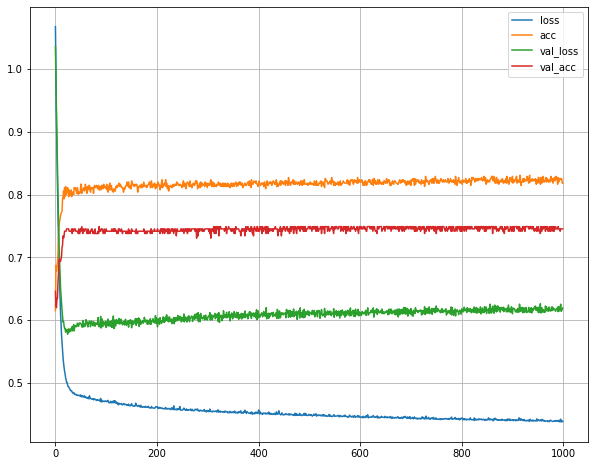

In [7]:
# Visualize the training results
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['accuracy'],label='acc')
plt.plot(history.history['val_loss'],label='val_loss')
plt.plot(history.history['val_accuracy'],label='val_acc')
plt.grid()
plt.legend()
plt.show()

In [8]:
# Validation model
score = model.evaluate(x_valid, y_valid, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Validation loss: 0.6193613409996033
Validation accuracy: 0.7453874349594116


## Problem 1
Increase the number of features to include "F3" and "F4" and rerun the experiments. Try also adding the bandwidths ("B1"-"B4").

In [9]:
# Features to use
features = ["F1","F2","F3","F4"]

# Extract features
x_train_raw = train[features]
x_valid_raw = valid[features]

# Normalize to zero mean
x_mean = np.mean(x_train_raw)
x_std = np.std(x_train_raw)
x_train = x_train_raw - x_mean
x_valid = x_valid_raw - x_mean

# Fix labels. The "to_categorical" call maps integer labels {n}
# to a vector of length N (number of labels) with a one in position n
y_train = keras.utils.to_categorical(trainlabels, len(phonemes))
y_valid = keras.utils.to_categorical(validlabels, len(phonemes))

In [10]:
# Create a model with a single hidden layer
model = keras.Sequential([
    keras.layers.Dense(256, activation=tf.nn.relu, input_dim=x_train.shape[1]),
    keras.layers.Dense(len(phonemes), activation=tf.nn.softmax)
])
model.summary()

# Train the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                    epochs=1000, batch_size=32, verbose=True)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 256)               1280      
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 771       
Total params: 2,051
Trainable params: 2,051
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
18/18 [==============================] - 0s 4ms/step - loss: 1.0497 - accuracy: 0.5899 - val_loss: 1.0363 - val_accuracy: 0.5129
Epoch 2/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.9771 - accuracy: 0.6061 - val_loss: 0.9900 - val_accuracy: 0.5277
Epoch 3/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.9157 - accuracy: 0.6385 - val_loss: 0.9505 - val_accuracy: 0.5683
Epoch 4/1000
18/18 [==============================] - 0s 942us/step - loss: 0.8635 - acc

Epoch 54/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4522 - accuracy: 0.8183 - val_loss: 0.5784 - val_accuracy: 0.7454
Epoch 55/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4515 - accuracy: 0.8273 - val_loss: 0.5649 - val_accuracy: 0.7528
Epoch 56/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4523 - accuracy: 0.8201 - val_loss: 0.5840 - val_accuracy: 0.7417
Epoch 57/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4475 - accuracy: 0.8291 - val_loss: 0.5797 - val_accuracy: 0.7491
Epoch 58/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4457 - accuracy: 0.8273 - val_loss: 0.5753 - val_accuracy: 0.7491
Epoch 59/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4482 - accuracy: 0.8237 - val_loss: 0.5766 - val_accuracy: 0.7454
Epoch 60/1000
18/18 [==============================] - 0s 942us/step - loss: 0.4460 - accuracy: 0.8237 - val_loss: 0.5805 - val_accuracy: 0.74

18/18 [==============================] - 0s 1ms/step - loss: 0.4242 - accuracy: 0.8381 - val_loss: 0.5788 - val_accuracy: 0.7491
Epoch 112/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4243 - accuracy: 0.8417 - val_loss: 0.5718 - val_accuracy: 0.7528
Epoch 113/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4240 - accuracy: 0.8363 - val_loss: 0.5810 - val_accuracy: 0.7491
Epoch 114/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4236 - accuracy: 0.8309 - val_loss: 0.5784 - val_accuracy: 0.7454
Epoch 115/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4261 - accuracy: 0.8417 - val_loss: 0.5770 - val_accuracy: 0.7454
Epoch 116/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4219 - accuracy: 0.8345 - val_loss: 0.5769 - val_accuracy: 0.7454
Epoch 117/1000
18/18 [==============================] - 0s 990us/step - loss: 0.4233 - accuracy: 0.8345 - val_loss: 0.5823 - val_accuracy: 0.7454
Epoch

Epoch 168/1000
18/18 [==============================] - 0s 942us/step - loss: 0.4036 - accuracy: 0.8453 - val_loss: 0.5770 - val_accuracy: 0.7528
Epoch 169/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4047 - accuracy: 0.8453 - val_loss: 0.5813 - val_accuracy: 0.7454
Epoch 170/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4051 - accuracy: 0.8399 - val_loss: 0.5755 - val_accuracy: 0.7491
Epoch 171/1000
18/18 [==============================] - 0s 991us/step - loss: 0.4032 - accuracy: 0.8489 - val_loss: 0.5854 - val_accuracy: 0.7454
Epoch 172/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4033 - accuracy: 0.8507 - val_loss: 0.5846 - val_accuracy: 0.7454
Epoch 173/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4040 - accuracy: 0.8417 - val_loss: 0.5788 - val_accuracy: 0.7491
Epoch 174/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4035 - accuracy: 0.8399 - val_loss: 0.5847 - val_accur

Epoch 225/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3916 - accuracy: 0.8471 - val_loss: 0.5916 - val_accuracy: 0.7528
Epoch 226/1000
18/18 [==============================] - 0s 942us/step - loss: 0.3892 - accuracy: 0.8453 - val_loss: 0.5816 - val_accuracy: 0.7528
Epoch 227/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3898 - accuracy: 0.8471 - val_loss: 0.5873 - val_accuracy: 0.7565
Epoch 228/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3909 - accuracy: 0.8435 - val_loss: 0.5908 - val_accuracy: 0.7491
Epoch 229/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3905 - accuracy: 0.8543 - val_loss: 0.5861 - val_accuracy: 0.7565
Epoch 230/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3876 - accuracy: 0.8525 - val_loss: 0.5852 - val_accuracy: 0.7528
Epoch 231/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3898 - accuracy: 0.8489 - val_loss: 0.5840 - val_accurac

Epoch 282/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3783 - accuracy: 0.8525 - val_loss: 0.6047 - val_accuracy: 0.7528
Epoch 283/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3787 - accuracy: 0.8507 - val_loss: 0.5939 - val_accuracy: 0.7454
Epoch 284/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3775 - accuracy: 0.8489 - val_loss: 0.6080 - val_accuracy: 0.7417
Epoch 285/1000
18/18 [==============================] - 0s 942us/step - loss: 0.3770 - accuracy: 0.8489 - val_loss: 0.5919 - val_accuracy: 0.7528
Epoch 286/1000
18/18 [==============================] - 0s 942us/step - loss: 0.3767 - accuracy: 0.8471 - val_loss: 0.6104 - val_accuracy: 0.7454
Epoch 287/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3759 - accuracy: 0.8525 - val_loss: 0.6008 - val_accuracy: 0.7454
Epoch 288/1000
18/18 [==============================] - 0s 942us/step - loss: 0.3773 - accuracy: 0.8525 - val_loss: 0.6017 - val_acc

Epoch 339/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3670 - accuracy: 0.8579 - val_loss: 0.6118 - val_accuracy: 0.7454
Epoch 340/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3667 - accuracy: 0.8597 - val_loss: 0.6223 - val_accuracy: 0.7491
Epoch 341/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3664 - accuracy: 0.8597 - val_loss: 0.6124 - val_accuracy: 0.7491
Epoch 342/1000
18/18 [==============================] - 0s 942us/step - loss: 0.3670 - accuracy: 0.8579 - val_loss: 0.6166 - val_accuracy: 0.7491
Epoch 343/1000
18/18 [==============================] - 0s 942us/step - loss: 0.3667 - accuracy: 0.8561 - val_loss: 0.6246 - val_accuracy: 0.7528
Epoch 344/1000
18/18 [==============================] - 0s 942us/step - loss: 0.3663 - accuracy: 0.8561 - val_loss: 0.6111 - val_accuracy: 0.7491
Epoch 345/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3663 - accuracy: 0.8525 - val_loss: 0.6143 - val_acc

18/18 [==============================] - 0s 1ms/step - loss: 0.3617 - accuracy: 0.8579 - val_loss: 0.6370 - val_accuracy: 0.7528
Epoch 396/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3588 - accuracy: 0.8651 - val_loss: 0.6191 - val_accuracy: 0.7528
Epoch 397/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3592 - accuracy: 0.8561 - val_loss: 0.6341 - val_accuracy: 0.7491
Epoch 398/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3605 - accuracy: 0.8543 - val_loss: 0.6293 - val_accuracy: 0.7565
Epoch 399/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3600 - accuracy: 0.8633 - val_loss: 0.6429 - val_accuracy: 0.7491
Epoch 400/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3573 - accuracy: 0.8579 - val_loss: 0.6344 - val_accuracy: 0.7491
Epoch 401/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3580 - accuracy: 0.8633 - val_loss: 0.6261 - val_accuracy: 0.7601
Epoch 4

Epoch 452/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3514 - accuracy: 0.8633 - val_loss: 0.6344 - val_accuracy: 0.7638
Epoch 453/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3526 - accuracy: 0.8543 - val_loss: 0.6499 - val_accuracy: 0.7565
Epoch 454/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3515 - accuracy: 0.8651 - val_loss: 0.6407 - val_accuracy: 0.7528
Epoch 455/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3526 - accuracy: 0.8579 - val_loss: 0.6399 - val_accuracy: 0.7638
Epoch 456/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3495 - accuracy: 0.8633 - val_loss: 0.6457 - val_accuracy: 0.7601
Epoch 457/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3502 - accuracy: 0.8651 - val_loss: 0.6401 - val_accuracy: 0.7528
Epoch 458/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3503 - accuracy: 0.8615 - val_loss: 0.6431 - val_accuracy:

18/18 [==============================] - 0s 1ms/step - loss: 0.3452 - accuracy: 0.8687 - val_loss: 0.6578 - val_accuracy: 0.7491
Epoch 509/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3443 - accuracy: 0.8615 - val_loss: 0.6525 - val_accuracy: 0.7528
Epoch 510/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3441 - accuracy: 0.8633 - val_loss: 0.6589 - val_accuracy: 0.7491
Epoch 511/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3432 - accuracy: 0.8669 - val_loss: 0.6503 - val_accuracy: 0.7528
Epoch 512/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3463 - accuracy: 0.8669 - val_loss: 0.6547 - val_accuracy: 0.7491
Epoch 513/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3451 - accuracy: 0.8597 - val_loss: 0.6647 - val_accuracy: 0.7491
Epoch 514/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3435 - accuracy: 0.8687 - val_loss: 0.6581 - val_accuracy: 0.7601
Epoch 5

Epoch 565/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3389 - accuracy: 0.8633 - val_loss: 0.6659 - val_accuracy: 0.7491
Epoch 566/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3385 - accuracy: 0.8723 - val_loss: 0.6733 - val_accuracy: 0.7417
Epoch 567/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3358 - accuracy: 0.8705 - val_loss: 0.6703 - val_accuracy: 0.7454
Epoch 568/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3372 - accuracy: 0.8633 - val_loss: 0.6656 - val_accuracy: 0.7528
Epoch 569/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3378 - accuracy: 0.8651 - val_loss: 0.6720 - val_accuracy: 0.7417
Epoch 570/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3347 - accuracy: 0.8687 - val_loss: 0.6688 - val_accuracy: 0.7528
Epoch 571/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3376 - accuracy: 0.8687 - val_loss: 0.6707 - val_accuracy:

Epoch 622/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3321 - accuracy: 0.8759 - val_loss: 0.6863 - val_accuracy: 0.7491
Epoch 623/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3312 - accuracy: 0.8687 - val_loss: 0.6890 - val_accuracy: 0.7454
Epoch 624/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3299 - accuracy: 0.8651 - val_loss: 0.6836 - val_accuracy: 0.7528
Epoch 625/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3296 - accuracy: 0.8669 - val_loss: 0.6904 - val_accuracy: 0.7454
Epoch 626/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3308 - accuracy: 0.8741 - val_loss: 0.6879 - val_accuracy: 0.7491
Epoch 627/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3307 - accuracy: 0.8615 - val_loss: 0.6952 - val_accuracy: 0.7528
Epoch 628/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3283 - accuracy: 0.8705 - val_loss: 0.6812 - val_accuracy:

Epoch 679/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3245 - accuracy: 0.8705 - val_loss: 0.6823 - val_accuracy: 0.7565
Epoch 680/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3251 - accuracy: 0.8687 - val_loss: 0.6915 - val_accuracy: 0.7528
Epoch 681/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3256 - accuracy: 0.8795 - val_loss: 0.6922 - val_accuracy: 0.7491
Epoch 682/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3240 - accuracy: 0.8777 - val_loss: 0.6883 - val_accuracy: 0.7491
Epoch 683/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3246 - accuracy: 0.8687 - val_loss: 0.7022 - val_accuracy: 0.7565
Epoch 684/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3254 - accuracy: 0.8741 - val_loss: 0.6959 - val_accuracy: 0.7491
Epoch 685/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3254 - accuracy: 0.8705 - val_loss: 0.6862 - val_accuracy:

Epoch 736/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3213 - accuracy: 0.8705 - val_loss: 0.7043 - val_accuracy: 0.7528
Epoch 737/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3209 - accuracy: 0.8705 - val_loss: 0.7107 - val_accuracy: 0.7528
Epoch 738/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3188 - accuracy: 0.8759 - val_loss: 0.7170 - val_accuracy: 0.7491
Epoch 739/1000
18/18 [==============================] - 0s 942us/step - loss: 0.3186 - accuracy: 0.8723 - val_loss: 0.7080 - val_accuracy: 0.7565
Epoch 740/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3201 - accuracy: 0.8723 - val_loss: 0.7030 - val_accuracy: 0.7565
Epoch 741/1000
18/18 [==============================] - 0s 942us/step - loss: 0.3219 - accuracy: 0.8669 - val_loss: 0.7242 - val_accuracy: 0.7491
Epoch 742/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3223 - accuracy: 0.8669 - val_loss: 0.7044 - val_accur

Epoch 793/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3140 - accuracy: 0.8741 - val_loss: 0.7266 - val_accuracy: 0.7528
Epoch 794/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3157 - accuracy: 0.8723 - val_loss: 0.7258 - val_accuracy: 0.7528
Epoch 795/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3142 - accuracy: 0.8705 - val_loss: 0.7199 - val_accuracy: 0.7565
Epoch 796/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3135 - accuracy: 0.8777 - val_loss: 0.7232 - val_accuracy: 0.7528
Epoch 797/1000
18/18 [==============================] - 0s 942us/step - loss: 0.3129 - accuracy: 0.8795 - val_loss: 0.7216 - val_accuracy: 0.7491
Epoch 798/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3142 - accuracy: 0.8741 - val_loss: 0.7177 - val_accuracy: 0.7528
Epoch 799/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3149 - accuracy: 0.8759 - val_loss: 0.7121 - val_accurac

Epoch 850/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3081 - accuracy: 0.8849 - val_loss: 0.7315 - val_accuracy: 0.7528
Epoch 851/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3093 - accuracy: 0.8741 - val_loss: 0.7249 - val_accuracy: 0.7528
Epoch 852/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3110 - accuracy: 0.8831 - val_loss: 0.7335 - val_accuracy: 0.7528
Epoch 853/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3082 - accuracy: 0.8777 - val_loss: 0.7287 - val_accuracy: 0.7565
Epoch 854/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3108 - accuracy: 0.8741 - val_loss: 0.7396 - val_accuracy: 0.7491
Epoch 855/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3081 - accuracy: 0.8723 - val_loss: 0.7236 - val_accuracy: 0.7491
Epoch 856/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3092 - accuracy: 0.8795 - val_loss: 0.7299 - val_accuracy:

Epoch 907/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3028 - accuracy: 0.8867 - val_loss: 0.7366 - val_accuracy: 0.7528
Epoch 908/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3076 - accuracy: 0.8831 - val_loss: 0.7361 - val_accuracy: 0.7528
Epoch 909/1000
18/18 [==============================] - 0s 942us/step - loss: 0.3070 - accuracy: 0.8777 - val_loss: 0.7566 - val_accuracy: 0.7491
Epoch 910/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3039 - accuracy: 0.8777 - val_loss: 0.7523 - val_accuracy: 0.7491
Epoch 911/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3031 - accuracy: 0.8831 - val_loss: 0.7379 - val_accuracy: 0.7491
Epoch 912/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3043 - accuracy: 0.8849 - val_loss: 0.7494 - val_accuracy: 0.7491
Epoch 913/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3031 - accuracy: 0.8813 - val_loss: 0.7526 - val_accurac

Epoch 964/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2984 - accuracy: 0.8849 - val_loss: 0.7512 - val_accuracy: 0.7491
Epoch 965/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3003 - accuracy: 0.8777 - val_loss: 0.7618 - val_accuracy: 0.7491
Epoch 966/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2987 - accuracy: 0.8849 - val_loss: 0.7563 - val_accuracy: 0.7528
Epoch 967/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3002 - accuracy: 0.8831 - val_loss: 0.7642 - val_accuracy: 0.7528
Epoch 968/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2980 - accuracy: 0.8849 - val_loss: 0.7551 - val_accuracy: 0.7491
Epoch 969/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2991 - accuracy: 0.8885 - val_loss: 0.7528 - val_accuracy: 0.7528
Epoch 970/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2989 - accuracy: 0.8777 - val_loss: 0.7616 - val_accuracy:

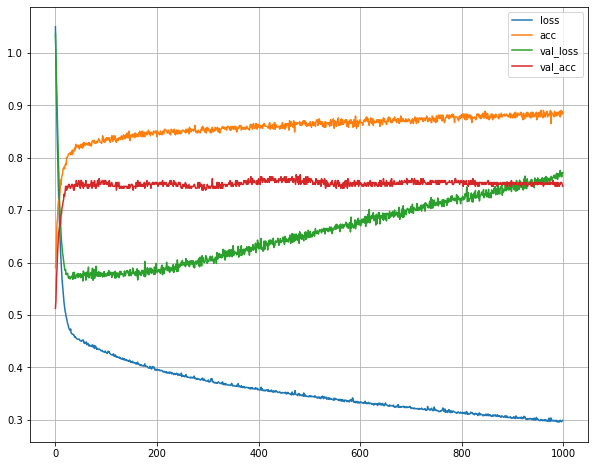

In [11]:
# Visualize the training results
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['accuracy'],label='acc')
plt.plot(history.history['val_loss'],label='val_loss')
plt.plot(history.history['val_accuracy'],label='val_acc')
plt.grid()
plt.legend()
plt.show()

In [12]:
# Validation model
score = model.evaluate(x_valid, y_valid, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Validation loss: 0.7714625597000122
Validation accuracy: 0.7453874349594116


In [13]:
# Features to use
features = ["F1","F2","F3","F4","B1","B2","B3","B4"]

# Extract features
x_train_raw = train[features]
x_valid_raw = valid[features]

# Normalize to zero mean
x_mean = np.mean(x_train_raw)
x_std = np.std(x_train_raw)
x_train = x_train_raw - x_mean
x_valid = x_valid_raw - x_mean

# Fix labels. The "to_categorical" call maps integer labels {n}
# to a vector of length N (number of labels) with a one in position n
y_train = keras.utils.to_categorical(trainlabels, len(phonemes))
y_valid = keras.utils.to_categorical(validlabels, len(phonemes))

In [14]:
# Create a model with a single hidden layer
model = keras.Sequential([
    keras.layers.Dense(256, activation=tf.nn.relu, input_dim=x_train.shape[1]),
    keras.layers.Dense(len(phonemes), activation=tf.nn.softmax)
])
model.summary()

# Train the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                    epochs=1000, batch_size=32, verbose=True)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 256)               2304      
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 771       
Total params: 3,075
Trainable params: 3,075
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
18/18 [==============================] - 0s 4ms/step - loss: 1.0670 - accuracy: 0.4281 - val_loss: 1.0443 - val_accuracy: 0.4428
Epoch 2/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.9891 - accuracy: 0.5450 - val_loss: 1.0032 - val_accuracy: 0.4649
Epoch 3/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.9299 - accuracy: 0.5773 - val_loss: 0.9673 - val_accuracy: 0.5166
Epoch 4/1000
18/18 [==============================] - 0s 986us/step - loss: 0.8799 - acc

Epoch 54/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4269 - accuracy: 0.8417 - val_loss: 0.5915 - val_accuracy: 0.7454
Epoch 55/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4277 - accuracy: 0.8435 - val_loss: 0.5958 - val_accuracy: 0.7454
Epoch 56/1000
18/18 [==============================] - 0s 942us/step - loss: 0.4266 - accuracy: 0.8435 - val_loss: 0.5884 - val_accuracy: 0.7380
Epoch 57/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4257 - accuracy: 0.8435 - val_loss: 0.5921 - val_accuracy: 0.7343
Epoch 58/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4246 - accuracy: 0.8435 - val_loss: 0.5980 - val_accuracy: 0.7269
Epoch 59/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4230 - accuracy: 0.8435 - val_loss: 0.5860 - val_accuracy: 0.7380
Epoch 60/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4225 - accuracy: 0.8417 - val_loss: 0.5953 - val_accuracy: 0.73

18/18 [==============================] - 0s 1ms/step - loss: 0.3858 - accuracy: 0.8525 - val_loss: 0.5931 - val_accuracy: 0.7380
Epoch 112/1000
18/18 [==============================] - 0s 942us/step - loss: 0.3885 - accuracy: 0.8489 - val_loss: 0.5877 - val_accuracy: 0.7417
Epoch 113/1000
18/18 [==============================] - 0s 942us/step - loss: 0.3877 - accuracy: 0.8489 - val_loss: 0.6056 - val_accuracy: 0.7196
Epoch 114/1000
18/18 [==============================] - 0s 942us/step - loss: 0.3866 - accuracy: 0.8507 - val_loss: 0.5875 - val_accuracy: 0.7491
Epoch 115/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3849 - accuracy: 0.8507 - val_loss: 0.5919 - val_accuracy: 0.7417
Epoch 116/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3828 - accuracy: 0.8543 - val_loss: 0.5894 - val_accuracy: 0.7417
Epoch 117/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3840 - accuracy: 0.8507 - val_loss: 0.5856 - val_accuracy: 0.7417
E

Epoch 168/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3540 - accuracy: 0.8561 - val_loss: 0.5991 - val_accuracy: 0.7343
Epoch 169/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3553 - accuracy: 0.8543 - val_loss: 0.6037 - val_accuracy: 0.7380
Epoch 170/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3554 - accuracy: 0.8579 - val_loss: 0.5945 - val_accuracy: 0.7343
Epoch 171/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3560 - accuracy: 0.8525 - val_loss: 0.5966 - val_accuracy: 0.7380
Epoch 172/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3523 - accuracy: 0.8597 - val_loss: 0.6082 - val_accuracy: 0.7343
Epoch 173/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3523 - accuracy: 0.8597 - val_loss: 0.6007 - val_accuracy: 0.7380
Epoch 174/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3514 - accuracy: 0.8579 - val_loss: 0.6029 - val_accuracy:

Epoch 225/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3290 - accuracy: 0.8633 - val_loss: 0.6187 - val_accuracy: 0.7565
Epoch 226/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3282 - accuracy: 0.8651 - val_loss: 0.6224 - val_accuracy: 0.7454
Epoch 227/1000
18/18 [==============================] - 0s 942us/step - loss: 0.3302 - accuracy: 0.8615 - val_loss: 0.6238 - val_accuracy: 0.7454
Epoch 228/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3269 - accuracy: 0.8651 - val_loss: 0.6188 - val_accuracy: 0.7565
Epoch 229/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3278 - accuracy: 0.8687 - val_loss: 0.6146 - val_accuracy: 0.7565
Epoch 230/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3253 - accuracy: 0.8633 - val_loss: 0.6190 - val_accuracy: 0.7491
Epoch 231/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3254 - accuracy: 0.8633 - val_loss: 0.6236 - val_accurac

18/18 [==============================] - 0s 1ms/step - loss: 0.3122 - accuracy: 0.8687 - val_loss: 0.6386 - val_accuracy: 0.7638
Epoch 282/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3089 - accuracy: 0.8705 - val_loss: 0.6479 - val_accuracy: 0.7528
Epoch 283/1000
18/18 [==============================] - 0s 942us/step - loss: 0.3076 - accuracy: 0.8687 - val_loss: 0.6411 - val_accuracy: 0.7528
Epoch 284/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3082 - accuracy: 0.8705 - val_loss: 0.6398 - val_accuracy: 0.7565
Epoch 285/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3061 - accuracy: 0.8741 - val_loss: 0.6390 - val_accuracy: 0.7565
Epoch 286/1000
18/18 [==============================] - 0s 942us/step - loss: 0.3047 - accuracy: 0.8723 - val_loss: 0.6455 - val_accuracy: 0.7601
Epoch 287/1000
18/18 [==============================] - 0s 942us/step - loss: 0.3063 - accuracy: 0.8741 - val_loss: 0.6467 - val_accuracy: 0.7565
E

Epoch 338/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2887 - accuracy: 0.8795 - val_loss: 0.6690 - val_accuracy: 0.7528
Epoch 339/1000
18/18 [==============================] - 0s 942us/step - loss: 0.2895 - accuracy: 0.8813 - val_loss: 0.6727 - val_accuracy: 0.7565
Epoch 340/1000
18/18 [==============================] - 0s 942us/step - loss: 0.2901 - accuracy: 0.8705 - val_loss: 0.6673 - val_accuracy: 0.7491
Epoch 341/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2895 - accuracy: 0.8777 - val_loss: 0.6680 - val_accuracy: 0.7528
Epoch 342/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2891 - accuracy: 0.8795 - val_loss: 0.6700 - val_accuracy: 0.7491
Epoch 343/1000
18/18 [==============================] - 0s 942us/step - loss: 0.2902 - accuracy: 0.8795 - val_loss: 0.6692 - val_accuracy: 0.7528
Epoch 344/1000
18/18 [==============================] - 0s 942us/step - loss: 0.2902 - accuracy: 0.8723 - val_loss: 0.6790 - val_a

18/18 [==============================] - 0s 942us/step - loss: 0.2737 - accuracy: 0.8885 - val_loss: 0.6989 - val_accuracy: 0.7491
Epoch 395/1000
18/18 [==============================] - 0s 942us/step - loss: 0.2744 - accuracy: 0.8849 - val_loss: 0.6917 - val_accuracy: 0.7491
Epoch 396/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2733 - accuracy: 0.8795 - val_loss: 0.6961 - val_accuracy: 0.7380
Epoch 397/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2729 - accuracy: 0.8885 - val_loss: 0.6981 - val_accuracy: 0.7454
Epoch 398/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2727 - accuracy: 0.8849 - val_loss: 0.7043 - val_accuracy: 0.7417
Epoch 399/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2726 - accuracy: 0.8849 - val_loss: 0.6957 - val_accuracy: 0.7454
Epoch 400/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2720 - accuracy: 0.8831 - val_loss: 0.6954 - val_accuracy: 0.7491
Epo

Epoch 451/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2593 - accuracy: 0.8849 - val_loss: 0.7248 - val_accuracy: 0.7343
Epoch 452/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2604 - accuracy: 0.8939 - val_loss: 0.7283 - val_accuracy: 0.7343
Epoch 453/1000
18/18 [==============================] - 0s 942us/step - loss: 0.2605 - accuracy: 0.8885 - val_loss: 0.7283 - val_accuracy: 0.7269
Epoch 454/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2602 - accuracy: 0.8831 - val_loss: 0.7244 - val_accuracy: 0.7380
Epoch 455/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2631 - accuracy: 0.8921 - val_loss: 0.7319 - val_accuracy: 0.7306
Epoch 456/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2604 - accuracy: 0.8777 - val_loss: 0.7224 - val_accuracy: 0.7232
Epoch 457/1000
18/18 [==============================] - 0s 942us/step - loss: 0.2574 - accuracy: 0.8921 - val_loss: 0.7240 - val_accur

Epoch 508/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2445 - accuracy: 0.9047 - val_loss: 0.7579 - val_accuracy: 0.7306
Epoch 509/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2476 - accuracy: 0.8975 - val_loss: 0.7544 - val_accuracy: 0.7196
Epoch 510/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2456 - accuracy: 0.8921 - val_loss: 0.7562 - val_accuracy: 0.7306
Epoch 511/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2454 - accuracy: 0.8975 - val_loss: 0.7567 - val_accuracy: 0.7269
Epoch 512/1000
18/18 [==============================] - 0s 942us/step - loss: 0.2444 - accuracy: 0.9047 - val_loss: 0.7539 - val_accuracy: 0.7232
Epoch 513/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2453 - accuracy: 0.8993 - val_loss: 0.7587 - val_accuracy: 0.7269
Epoch 514/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2447 - accuracy: 0.8939 - val_loss: 0.7562 - val_accurac

Epoch 565/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2337 - accuracy: 0.9065 - val_loss: 0.7867 - val_accuracy: 0.7269
Epoch 566/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2344 - accuracy: 0.9011 - val_loss: 0.7846 - val_accuracy: 0.7232
Epoch 567/1000
18/18 [==============================] - 0s 942us/step - loss: 0.2341 - accuracy: 0.9065 - val_loss: 0.7854 - val_accuracy: 0.7232
Epoch 568/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2338 - accuracy: 0.9101 - val_loss: 0.7838 - val_accuracy: 0.7269
Epoch 569/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2316 - accuracy: 0.8993 - val_loss: 0.7832 - val_accuracy: 0.7269
Epoch 570/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2324 - accuracy: 0.9065 - val_loss: 0.7836 - val_accuracy: 0.7232
Epoch 571/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2330 - accuracy: 0.9065 - val_loss: 0.7854 - val_accurac

Epoch 622/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2220 - accuracy: 0.9119 - val_loss: 0.8159 - val_accuracy: 0.7269
Epoch 623/1000
18/18 [==============================] - 0s 942us/step - loss: 0.2235 - accuracy: 0.9047 - val_loss: 0.8155 - val_accuracy: 0.7269
Epoch 624/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2217 - accuracy: 0.9119 - val_loss: 0.8108 - val_accuracy: 0.7232
Epoch 625/1000
18/18 [==============================] - 0s 942us/step - loss: 0.2237 - accuracy: 0.9101 - val_loss: 0.8144 - val_accuracy: 0.7269
Epoch 626/1000
18/18 [==============================] - 0s 942us/step - loss: 0.2237 - accuracy: 0.9047 - val_loss: 0.8196 - val_accuracy: 0.7306
Epoch 627/1000
18/18 [==============================] - 0s 942us/step - loss: 0.2233 - accuracy: 0.9155 - val_loss: 0.8225 - val_accuracy: 0.7306
Epoch 628/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2225 - accuracy: 0.9137 - val_loss: 0.8164 - val_a

Epoch 679/1000
18/18 [==============================] - 0s 942us/step - loss: 0.2126 - accuracy: 0.9101 - val_loss: 0.8436 - val_accuracy: 0.7232
Epoch 680/1000
18/18 [==============================] - 0s 942us/step - loss: 0.2107 - accuracy: 0.9155 - val_loss: 0.8446 - val_accuracy: 0.7269
Epoch 681/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2132 - accuracy: 0.9155 - val_loss: 0.8423 - val_accuracy: 0.7232
Epoch 682/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2127 - accuracy: 0.9119 - val_loss: 0.8454 - val_accuracy: 0.7269
Epoch 683/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2132 - accuracy: 0.9227 - val_loss: 0.8420 - val_accuracy: 0.7269
Epoch 684/1000
18/18 [==============================] - 0s 942us/step - loss: 0.2117 - accuracy: 0.9137 - val_loss: 0.8396 - val_accuracy: 0.7196
Epoch 685/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2113 - accuracy: 0.9191 - val_loss: 0.8458 - val_acc

Epoch 736/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2012 - accuracy: 0.9245 - val_loss: 0.8680 - val_accuracy: 0.7269
Epoch 737/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2031 - accuracy: 0.9137 - val_loss: 0.8718 - val_accuracy: 0.7306
Epoch 738/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2003 - accuracy: 0.9299 - val_loss: 0.8757 - val_accuracy: 0.7343
Epoch 739/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2002 - accuracy: 0.9227 - val_loss: 0.8653 - val_accuracy: 0.7306
Epoch 740/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2016 - accuracy: 0.9299 - val_loss: 0.8800 - val_accuracy: 0.7380
Epoch 741/1000
18/18 [==============================] - 0s 942us/step - loss: 0.2045 - accuracy: 0.9191 - val_loss: 0.8703 - val_accuracy: 0.7269
Epoch 742/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1988 - accuracy: 0.9263 - val_loss: 0.8788 - val_accurac

Epoch 793/1000
18/18 [==============================] - 0s 942us/step - loss: 0.1950 - accuracy: 0.9245 - val_loss: 0.8986 - val_accuracy: 0.7343
Epoch 794/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1919 - accuracy: 0.9335 - val_loss: 0.8948 - val_accuracy: 0.7306
Epoch 795/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1905 - accuracy: 0.9299 - val_loss: 0.8997 - val_accuracy: 0.7306
Epoch 796/1000
18/18 [==============================] - 0s 942us/step - loss: 0.1913 - accuracy: 0.9317 - val_loss: 0.9003 - val_accuracy: 0.7269
Epoch 797/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1907 - accuracy: 0.9299 - val_loss: 0.8907 - val_accuracy: 0.7306
Epoch 798/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1912 - accuracy: 0.9281 - val_loss: 0.9088 - val_accuracy: 0.7380
Epoch 799/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1900 - accuracy: 0.9299 - val_loss: 0.9021 - val_accur

Epoch 850/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1815 - accuracy: 0.9299 - val_loss: 0.9245 - val_accuracy: 0.7269
Epoch 851/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1827 - accuracy: 0.9335 - val_loss: 0.9253 - val_accuracy: 0.7269
Epoch 852/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1802 - accuracy: 0.9335 - val_loss: 0.9268 - val_accuracy: 0.7159
Epoch 853/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1814 - accuracy: 0.9299 - val_loss: 0.9273 - val_accuracy: 0.7306
Epoch 854/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1820 - accuracy: 0.9299 - val_loss: 0.9326 - val_accuracy: 0.7343
Epoch 855/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1811 - accuracy: 0.9371 - val_loss: 0.9326 - val_accuracy: 0.7269
Epoch 856/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1805 - accuracy: 0.9281 - val_loss: 0.9314 - val_accuracy:

Epoch 907/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1726 - accuracy: 0.9371 - val_loss: 0.9521 - val_accuracy: 0.7232
Epoch 908/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1720 - accuracy: 0.9371 - val_loss: 0.9540 - val_accuracy: 0.7306
Epoch 909/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1734 - accuracy: 0.9317 - val_loss: 0.9481 - val_accuracy: 0.7269
Epoch 910/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1691 - accuracy: 0.9388 - val_loss: 0.9503 - val_accuracy: 0.7306
Epoch 911/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1705 - accuracy: 0.9353 - val_loss: 0.9524 - val_accuracy: 0.7196
Epoch 912/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1720 - accuracy: 0.9335 - val_loss: 0.9597 - val_accuracy: 0.7306
Epoch 913/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1706 - accuracy: 0.9317 - val_loss: 0.9534 - val_accuracy:

Epoch 964/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1621 - accuracy: 0.9371 - val_loss: 0.9762 - val_accuracy: 0.7232
Epoch 965/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1620 - accuracy: 0.9424 - val_loss: 0.9824 - val_accuracy: 0.7196
Epoch 966/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1637 - accuracy: 0.9406 - val_loss: 0.9728 - val_accuracy: 0.7232
Epoch 967/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1621 - accuracy: 0.9371 - val_loss: 0.9831 - val_accuracy: 0.7232
Epoch 968/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1627 - accuracy: 0.9371 - val_loss: 0.9821 - val_accuracy: 0.7232
Epoch 969/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1611 - accuracy: 0.9406 - val_loss: 0.9790 - val_accuracy: 0.7269
Epoch 970/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1611 - accuracy: 0.9371 - val_loss: 0.9781 - val_accuracy:

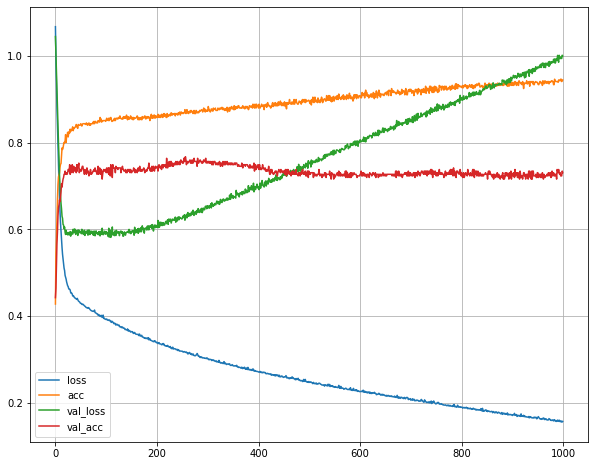

In [15]:
# Visualize the training results
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['accuracy'],label='acc')
plt.plot(history.history['val_loss'],label='val_loss')
plt.plot(history.history['val_accuracy'],label='val_acc')
plt.grid()
plt.legend()
plt.show()

In [16]:
# Validation model
score = model.evaluate(x_valid, y_valid, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Validation loss: 0.9993067383766174
Validation accuracy: 0.7306272983551025


## Problem 2
Change the number of nodes in the hidden layer and see how the results change. Try using dropout, and observe the results.

In [17]:
# Features to use
features = ["F1","F2"]

# Extract features
x_train_raw = train[features]
x_valid_raw = valid[features]

# Normalize to zero mean
x_mean = np.mean(x_train_raw)
x_std = np.std(x_train_raw)
x_train = x_train_raw - x_mean
x_valid = x_valid_raw - x_mean

# Fix labels. The "to_categorical" call maps integer labels {n}
# to a vector of length N (number of labels) with a one in position n
y_train = keras.utils.to_categorical(trainlabels, len(phonemes))
y_valid = keras.utils.to_categorical(validlabels, len(phonemes))

In [18]:
# Create a model with a single hidden layer
model1 = keras.Sequential([
    keras.layers.Dense(28*28, activation=tf.nn.relu, input_dim=x_train.shape[1]),
    keras.layers.Dense(len(phonemes), activation=tf.nn.softmax)
])
model1.summary()

# Train the model
model1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history1 = model1.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                    epochs=1000, batch_size=32, verbose=True)

# Create a model with a single hidden layer
model2 = keras.Sequential([
    keras.layers.Dense(64, activation=tf.nn.relu, input_dim=x_train.shape[1]),
    keras.layers.Dense(len(phonemes), activation=tf.nn.softmax)
])
model2.summary()

# Train the model
model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history2 = model2.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                    epochs=1000, batch_size=32, verbose=True)

# Create a model with a single hidden layer
model3 = keras.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_dim=x_train.shape[1]),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(len(phonemes), activation=tf.nn.softmax)
])
model3.summary()

# Train the model
model3.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history3 = model3.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                    epochs=1000, batch_size=32, verbose=True)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 784)               2352      
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 2355      
Total params: 4,707
Trainable params: 4,707
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
18/18 [==============================] - 0s 4ms/step - loss: 1.0336 - accuracy: 0.5899 - val_loss: 0.9865 - val_accuracy: 0.6052
Epoch 2/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.9081 - accuracy: 0.6601 - val_loss: 0.9090 - val_accuracy: 0.6052
Epoch 3/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.8260 - accuracy: 0.6799 - val_loss: 0.8468 - val_accuracy: 0.6421
Epoch 4/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.7560 - accur

Epoch 54/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4781 - accuracy: 0.8112 - val_loss: 0.5890 - val_accuracy: 0.7454
Epoch 55/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4730 - accuracy: 0.8129 - val_loss: 0.6015 - val_accuracy: 0.7417
Epoch 56/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4773 - accuracy: 0.7968 - val_loss: 0.6025 - val_accuracy: 0.7454
Epoch 57/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4743 - accuracy: 0.8094 - val_loss: 0.6002 - val_accuracy: 0.7454
Epoch 58/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4775 - accuracy: 0.7968 - val_loss: 0.5968 - val_accuracy: 0.7380
Epoch 59/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4831 - accuracy: 0.8129 - val_loss: 0.6023 - val_accuracy: 0.7417
Epoch 60/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4785 - accuracy: 0.8058 - val_loss: 0.5922 - val_accuracy: 0.7417

18/18 [==============================] - 0s 1ms/step - loss: 0.4625 - accuracy: 0.8129 - val_loss: 0.5981 - val_accuracy: 0.7454
Epoch 112/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4621 - accuracy: 0.8201 - val_loss: 0.5990 - val_accuracy: 0.7417
Epoch 113/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4619 - accuracy: 0.8094 - val_loss: 0.6002 - val_accuracy: 0.7417
Epoch 114/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4647 - accuracy: 0.8129 - val_loss: 0.5998 - val_accuracy: 0.7454
Epoch 115/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4597 - accuracy: 0.8165 - val_loss: 0.6039 - val_accuracy: 0.7417
Epoch 116/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4618 - accuracy: 0.8076 - val_loss: 0.5999 - val_accuracy: 0.7417
Epoch 117/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4594 - accuracy: 0.8201 - val_loss: 0.5985 - val_accuracy: 0.7417
Epoch 1

Epoch 168/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4568 - accuracy: 0.8237 - val_loss: 0.6049 - val_accuracy: 0.7454
Epoch 169/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4542 - accuracy: 0.8219 - val_loss: 0.6116 - val_accuracy: 0.7380
Epoch 170/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4565 - accuracy: 0.8201 - val_loss: 0.6021 - val_accuracy: 0.7454
Epoch 171/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4618 - accuracy: 0.8147 - val_loss: 0.6062 - val_accuracy: 0.7380
Epoch 172/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4547 - accuracy: 0.8219 - val_loss: 0.5976 - val_accuracy: 0.7417
Epoch 173/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4581 - accuracy: 0.8201 - val_loss: 0.6167 - val_accuracy: 0.7380
Epoch 174/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4558 - accuracy: 0.8183 - val_loss: 0.5962 - val_accuracy:

Epoch 225/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4536 - accuracy: 0.8165 - val_loss: 0.6122 - val_accuracy: 0.7491
Epoch 226/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4543 - accuracy: 0.8147 - val_loss: 0.6056 - val_accuracy: 0.7454
Epoch 227/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4530 - accuracy: 0.8219 - val_loss: 0.6072 - val_accuracy: 0.7417
Epoch 228/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4500 - accuracy: 0.8165 - val_loss: 0.6082 - val_accuracy: 0.7454
Epoch 229/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4517 - accuracy: 0.8129 - val_loss: 0.6076 - val_accuracy: 0.7491
Epoch 230/1000
18/18 [==============================] - 0s 942us/step - loss: 0.4519 - accuracy: 0.8219 - val_loss: 0.6032 - val_accuracy: 0.7491
Epoch 231/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4512 - accuracy: 0.8129 - val_loss: 0.6136 - val_accurac

Epoch 282/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4484 - accuracy: 0.8183 - val_loss: 0.6096 - val_accuracy: 0.7454
Epoch 283/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4496 - accuracy: 0.8165 - val_loss: 0.6119 - val_accuracy: 0.7454
Epoch 284/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4471 - accuracy: 0.8201 - val_loss: 0.6138 - val_accuracy: 0.7454
Epoch 285/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4483 - accuracy: 0.8219 - val_loss: 0.6161 - val_accuracy: 0.7454
Epoch 286/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4508 - accuracy: 0.8201 - val_loss: 0.6128 - val_accuracy: 0.7417
Epoch 287/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4504 - accuracy: 0.8201 - val_loss: 0.6150 - val_accuracy: 0.7491
Epoch 288/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4505 - accuracy: 0.8183 - val_loss: 0.6130 - val_accuracy:

Epoch 339/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4473 - accuracy: 0.8183 - val_loss: 0.6241 - val_accuracy: 0.7380
Epoch 340/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4487 - accuracy: 0.8183 - val_loss: 0.6203 - val_accuracy: 0.7454
Epoch 341/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4520 - accuracy: 0.8237 - val_loss: 0.6087 - val_accuracy: 0.7491
Epoch 342/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4449 - accuracy: 0.8183 - val_loss: 0.6288 - val_accuracy: 0.7306
Epoch 343/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4452 - accuracy: 0.8237 - val_loss: 0.6107 - val_accuracy: 0.7454
Epoch 344/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4466 - accuracy: 0.8237 - val_loss: 0.6143 - val_accuracy: 0.7491
Epoch 345/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4488 - accuracy: 0.8273 - val_loss: 0.6136 - val_accuracy:

Epoch 396/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4420 - accuracy: 0.8201 - val_loss: 0.6170 - val_accuracy: 0.7491
Epoch 397/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4418 - accuracy: 0.8237 - val_loss: 0.6205 - val_accuracy: 0.7454
Epoch 398/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4427 - accuracy: 0.8219 - val_loss: 0.6179 - val_accuracy: 0.7491
Epoch 399/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4438 - accuracy: 0.8255 - val_loss: 0.6210 - val_accuracy: 0.7454
Epoch 400/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4484 - accuracy: 0.8183 - val_loss: 0.6198 - val_accuracy: 0.7491
Epoch 401/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4459 - accuracy: 0.8201 - val_loss: 0.6128 - val_accuracy: 0.7454
Epoch 402/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4434 - accuracy: 0.8273 - val_loss: 0.6178 - val_accuracy:

Epoch 453/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4423 - accuracy: 0.8273 - val_loss: 0.6149 - val_accuracy: 0.7491
Epoch 454/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4441 - accuracy: 0.8219 - val_loss: 0.6211 - val_accuracy: 0.7454
Epoch 455/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4411 - accuracy: 0.8201 - val_loss: 0.6168 - val_accuracy: 0.7454
Epoch 456/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4417 - accuracy: 0.8273 - val_loss: 0.6136 - val_accuracy: 0.7454
Epoch 457/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4453 - accuracy: 0.8219 - val_loss: 0.6222 - val_accuracy: 0.7454
Epoch 458/1000
18/18 [==============================] - 0s 942us/step - loss: 0.4430 - accuracy: 0.8183 - val_loss: 0.6144 - val_accuracy: 0.7454
Epoch 459/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4425 - accuracy: 0.8201 - val_loss: 0.6198 - val_accurac

Epoch 510/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4390 - accuracy: 0.8201 - val_loss: 0.6124 - val_accuracy: 0.7454
Epoch 511/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4395 - accuracy: 0.8237 - val_loss: 0.6267 - val_accuracy: 0.7417
Epoch 512/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4387 - accuracy: 0.8201 - val_loss: 0.6182 - val_accuracy: 0.7491
Epoch 513/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4415 - accuracy: 0.8237 - val_loss: 0.6194 - val_accuracy: 0.7454
Epoch 514/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4447 - accuracy: 0.8237 - val_loss: 0.6271 - val_accuracy: 0.7417
Epoch 515/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4392 - accuracy: 0.8255 - val_loss: 0.6182 - val_accuracy: 0.7454
Epoch 516/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4410 - accuracy: 0.8291 - val_loss: 0.6281 - val_accuracy:

Epoch 567/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4375 - accuracy: 0.8219 - val_loss: 0.6184 - val_accuracy: 0.7454
Epoch 568/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4363 - accuracy: 0.8255 - val_loss: 0.6262 - val_accuracy: 0.7491
Epoch 569/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4369 - accuracy: 0.8237 - val_loss: 0.6220 - val_accuracy: 0.7454
Epoch 570/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4369 - accuracy: 0.8255 - val_loss: 0.6218 - val_accuracy: 0.7491
Epoch 571/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4390 - accuracy: 0.8201 - val_loss: 0.6156 - val_accuracy: 0.7417
Epoch 572/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4402 - accuracy: 0.8219 - val_loss: 0.6342 - val_accuracy: 0.7380
Epoch 573/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4394 - accuracy: 0.8165 - val_loss: 0.6138 - val_accuracy:

Epoch 624/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4357 - accuracy: 0.8273 - val_loss: 0.6261 - val_accuracy: 0.7454
Epoch 625/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4380 - accuracy: 0.8201 - val_loss: 0.6230 - val_accuracy: 0.7454
Epoch 626/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4375 - accuracy: 0.8291 - val_loss: 0.6164 - val_accuracy: 0.7491
Epoch 627/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4354 - accuracy: 0.8309 - val_loss: 0.6232 - val_accuracy: 0.7491
Epoch 628/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4368 - accuracy: 0.8237 - val_loss: 0.6286 - val_accuracy: 0.7491
Epoch 629/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4357 - accuracy: 0.8327 - val_loss: 0.6226 - val_accuracy: 0.7454
Epoch 630/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4338 - accuracy: 0.8309 - val_loss: 0.6196 - val_accuracy:

Epoch 681/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4328 - accuracy: 0.8219 - val_loss: 0.6243 - val_accuracy: 0.7491
Epoch 682/1000
18/18 [==============================] - 0s 942us/step - loss: 0.4326 - accuracy: 0.8291 - val_loss: 0.6231 - val_accuracy: 0.7491
Epoch 683/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4344 - accuracy: 0.8237 - val_loss: 0.6287 - val_accuracy: 0.7380
Epoch 684/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4347 - accuracy: 0.8273 - val_loss: 0.6222 - val_accuracy: 0.7491
Epoch 685/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4380 - accuracy: 0.8237 - val_loss: 0.6241 - val_accuracy: 0.7491
Epoch 686/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4337 - accuracy: 0.8237 - val_loss: 0.6247 - val_accuracy: 0.7491
Epoch 687/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4340 - accuracy: 0.8255 - val_loss: 0.6299 - val_accurac

Epoch 738/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4329 - accuracy: 0.8309 - val_loss: 0.6231 - val_accuracy: 0.7454
Epoch 739/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4357 - accuracy: 0.8219 - val_loss: 0.6356 - val_accuracy: 0.7417
Epoch 740/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4332 - accuracy: 0.8309 - val_loss: 0.6142 - val_accuracy: 0.7491
Epoch 741/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4323 - accuracy: 0.8363 - val_loss: 0.6308 - val_accuracy: 0.7417
Epoch 742/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4321 - accuracy: 0.8219 - val_loss: 0.6244 - val_accuracy: 0.7491
Epoch 743/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4341 - accuracy: 0.8255 - val_loss: 0.6299 - val_accuracy: 0.7454
Epoch 744/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4347 - accuracy: 0.8219 - val_loss: 0.6183 - val_accuracy:

Epoch 795/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4300 - accuracy: 0.8273 - val_loss: 0.6317 - val_accuracy: 0.7454
Epoch 796/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4310 - accuracy: 0.8291 - val_loss: 0.6275 - val_accuracy: 0.7491
Epoch 797/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4301 - accuracy: 0.8291 - val_loss: 0.6247 - val_accuracy: 0.7491
Epoch 798/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4314 - accuracy: 0.8291 - val_loss: 0.6266 - val_accuracy: 0.7491
Epoch 799/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4306 - accuracy: 0.8273 - val_loss: 0.6206 - val_accuracy: 0.7528
Epoch 800/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4307 - accuracy: 0.8327 - val_loss: 0.6295 - val_accuracy: 0.7491
Epoch 801/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4349 - accuracy: 0.8237 - val_loss: 0.6365 - val_accuracy:

Epoch 852/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4317 - accuracy: 0.8327 - val_loss: 0.6367 - val_accuracy: 0.7454
Epoch 853/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4275 - accuracy: 0.8273 - val_loss: 0.6264 - val_accuracy: 0.7491
Epoch 854/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4304 - accuracy: 0.8345 - val_loss: 0.6318 - val_accuracy: 0.7454
Epoch 855/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4299 - accuracy: 0.8273 - val_loss: 0.6322 - val_accuracy: 0.7454
Epoch 856/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4287 - accuracy: 0.8273 - val_loss: 0.6324 - val_accuracy: 0.7454
Epoch 857/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4281 - accuracy: 0.8291 - val_loss: 0.6264 - val_accuracy: 0.7491
Epoch 858/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4297 - accuracy: 0.8327 - val_loss: 0.6327 - val_accuracy:

Epoch 909/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4282 - accuracy: 0.8219 - val_loss: 0.6351 - val_accuracy: 0.7454
Epoch 910/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4315 - accuracy: 0.8291 - val_loss: 0.6305 - val_accuracy: 0.7491
Epoch 911/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4288 - accuracy: 0.8309 - val_loss: 0.6351 - val_accuracy: 0.7454
Epoch 912/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4269 - accuracy: 0.8237 - val_loss: 0.6278 - val_accuracy: 0.7491
Epoch 913/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4292 - accuracy: 0.8291 - val_loss: 0.6340 - val_accuracy: 0.7454
Epoch 914/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4278 - accuracy: 0.8255 - val_loss: 0.6345 - val_accuracy: 0.7417
Epoch 915/1000
18/18 [==============================] - 0s 942us/step - loss: 0.4281 - accuracy: 0.8291 - val_loss: 0.6327 - val_accurac

Epoch 966/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4266 - accuracy: 0.8291 - val_loss: 0.6352 - val_accuracy: 0.7454
Epoch 967/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4264 - accuracy: 0.8309 - val_loss: 0.6357 - val_accuracy: 0.7454
Epoch 968/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4260 - accuracy: 0.8309 - val_loss: 0.6326 - val_accuracy: 0.7454
Epoch 969/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4274 - accuracy: 0.8273 - val_loss: 0.6378 - val_accuracy: 0.7454
Epoch 970/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4284 - accuracy: 0.8273 - val_loss: 0.6270 - val_accuracy: 0.7491
Epoch 971/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4299 - accuracy: 0.8237 - val_loss: 0.6303 - val_accuracy: 0.7454
Epoch 972/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4286 - accuracy: 0.8309 - val_loss: 0.6324 - val_accuracy:

Epoch 19/1000
18/18 [==============================] - 0s 942us/step - loss: 0.6364 - accuracy: 0.7590 - val_loss: 0.6800 - val_accuracy: 0.6974
Epoch 20/1000
18/18 [==============================] - 0s 942us/step - loss: 0.6239 - accuracy: 0.7644 - val_loss: 0.6695 - val_accuracy: 0.6974
Epoch 21/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.6124 - accuracy: 0.7680 - val_loss: 0.6614 - val_accuracy: 0.6937
Epoch 22/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.6020 - accuracy: 0.7752 - val_loss: 0.6492 - val_accuracy: 0.7011
Epoch 23/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.5918 - accuracy: 0.7752 - val_loss: 0.6420 - val_accuracy: 0.6974
Epoch 24/1000
18/18 [==============================] - 0s 942us/step - loss: 0.5826 - accuracy: 0.7716 - val_loss: 0.6370 - val_accuracy: 0.6937
Epoch 25/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.5745 - accuracy: 0.7752 - val_loss: 0.6279 - val_accuracy: 

Epoch 76/1000
18/18 [==============================] - 0s 942us/step - loss: 0.4836 - accuracy: 0.8022 - val_loss: 0.5908 - val_accuracy: 0.7417
Epoch 77/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4836 - accuracy: 0.8040 - val_loss: 0.5893 - val_accuracy: 0.7454
Epoch 78/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4821 - accuracy: 0.8076 - val_loss: 0.5936 - val_accuracy: 0.7417
Epoch 79/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4832 - accuracy: 0.8004 - val_loss: 0.5970 - val_accuracy: 0.7417
Epoch 80/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4826 - accuracy: 0.7986 - val_loss: 0.5903 - val_accuracy: 0.7417
Epoch 81/1000
18/18 [==============================] - 0s 942us/step - loss: 0.4831 - accuracy: 0.8040 - val_loss: 0.5956 - val_accuracy: 0.7417
Epoch 82/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4815 - accuracy: 0.8004 - val_loss: 0.5922 - val_accuracy: 0.

18/18 [==============================] - 0s 1ms/step - loss: 0.4772 - accuracy: 0.8112 - val_loss: 0.6020 - val_accuracy: 0.7343
Epoch 133/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4763 - accuracy: 0.8058 - val_loss: 0.5978 - val_accuracy: 0.7380
Epoch 134/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4766 - accuracy: 0.8058 - val_loss: 0.5929 - val_accuracy: 0.7343
Epoch 135/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4762 - accuracy: 0.8022 - val_loss: 0.5975 - val_accuracy: 0.7380
Epoch 136/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4759 - accuracy: 0.8076 - val_loss: 0.5985 - val_accuracy: 0.7380
Epoch 137/1000
18/18 [==============================] - 0s 942us/step - loss: 0.4754 - accuracy: 0.8076 - val_loss: 0.5965 - val_accuracy: 0.7417
Epoch 138/1000
18/18 [==============================] - 0s 942us/step - loss: 0.4763 - accuracy: 0.8040 - val_loss: 0.5986 - val_accuracy: 0.7417
Epo

18/18 [==============================] - 0s 1ms/step - loss: 0.4718 - accuracy: 0.8165 - val_loss: 0.5988 - val_accuracy: 0.7380
Epoch 189/1000
18/18 [==============================] - 0s 942us/step - loss: 0.4741 - accuracy: 0.8147 - val_loss: 0.5957 - val_accuracy: 0.7380
Epoch 190/1000
18/18 [==============================] - 0s 985us/step - loss: 0.4727 - accuracy: 0.8094 - val_loss: 0.6014 - val_accuracy: 0.7380
Epoch 191/1000
18/18 [==============================] - 0s 942us/step - loss: 0.4722 - accuracy: 0.8094 - val_loss: 0.6017 - val_accuracy: 0.7343
Epoch 192/1000
18/18 [==============================] - 0s 942us/step - loss: 0.4724 - accuracy: 0.8076 - val_loss: 0.5979 - val_accuracy: 0.7380
Epoch 193/1000
18/18 [==============================] - 0s 942us/step - loss: 0.4717 - accuracy: 0.8129 - val_loss: 0.6023 - val_accuracy: 0.7343
Epoch 194/1000
18/18 [==============================] - 0s 942us/step - loss: 0.4717 - accuracy: 0.8129 - val_loss: 0.6025 - val_accuracy: 0.

18/18 [==============================] - 0s 942us/step - loss: 0.4679 - accuracy: 0.8147 - val_loss: 0.5993 - val_accuracy: 0.7380
Epoch 245/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4682 - accuracy: 0.8147 - val_loss: 0.5994 - val_accuracy: 0.7380
Epoch 246/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4682 - accuracy: 0.8147 - val_loss: 0.5949 - val_accuracy: 0.7417
Epoch 247/1000
18/18 [==============================] - 0s 942us/step - loss: 0.4680 - accuracy: 0.8129 - val_loss: 0.6005 - val_accuracy: 0.7380
Epoch 248/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4683 - accuracy: 0.8076 - val_loss: 0.5961 - val_accuracy: 0.7417
Epoch 249/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4687 - accuracy: 0.8094 - val_loss: 0.6018 - val_accuracy: 0.7380
Epoch 250/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4677 - accuracy: 0.8112 - val_loss: 0.5996 - val_accuracy: 0.7417
Epo

18/18 [==============================] - 0s 942us/step - loss: 0.4645 - accuracy: 0.8129 - val_loss: 0.6006 - val_accuracy: 0.7380
Epoch 301/1000
18/18 [==============================] - 0s 942us/step - loss: 0.4648 - accuracy: 0.8112 - val_loss: 0.5998 - val_accuracy: 0.7343
Epoch 302/1000
18/18 [==============================] - 0s 942us/step - loss: 0.4644 - accuracy: 0.8147 - val_loss: 0.5993 - val_accuracy: 0.7380
Epoch 303/1000
18/18 [==============================] - 0s 942us/step - loss: 0.4651 - accuracy: 0.8076 - val_loss: 0.5985 - val_accuracy: 0.7380
Epoch 304/1000
18/18 [==============================] - 0s 942us/step - loss: 0.4647 - accuracy: 0.8112 - val_loss: 0.6007 - val_accuracy: 0.7343
Epoch 305/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4644 - accuracy: 0.8112 - val_loss: 0.6012 - val_accuracy: 0.7380
Epoch 306/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4648 - accuracy: 0.8129 - val_loss: 0.5977 - val_accuracy: 0.73

18/18 [==============================] - 0s 942us/step - loss: 0.4634 - accuracy: 0.8094 - val_loss: 0.5980 - val_accuracy: 0.7380
Epoch 357/1000
18/18 [==============================] - 0s 942us/step - loss: 0.4634 - accuracy: 0.8165 - val_loss: 0.6028 - val_accuracy: 0.7417
Epoch 358/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4622 - accuracy: 0.8147 - val_loss: 0.6031 - val_accuracy: 0.7417
Epoch 359/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4625 - accuracy: 0.8076 - val_loss: 0.6040 - val_accuracy: 0.7417
Epoch 360/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4623 - accuracy: 0.8076 - val_loss: 0.5964 - val_accuracy: 0.7417
Epoch 361/1000
18/18 [==============================] - 0s 942us/step - loss: 0.4619 - accuracy: 0.8129 - val_loss: 0.5986 - val_accuracy: 0.7380
Epoch 362/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4624 - accuracy: 0.8129 - val_loss: 0.6008 - val_accuracy: 0.7417
E

18/18 [==============================] - 0s 1ms/step - loss: 0.4603 - accuracy: 0.8147 - val_loss: 0.6019 - val_accuracy: 0.7343
Epoch 413/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4607 - accuracy: 0.8147 - val_loss: 0.6024 - val_accuracy: 0.7380
Epoch 414/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4609 - accuracy: 0.8076 - val_loss: 0.6041 - val_accuracy: 0.7380
Epoch 415/1000
18/18 [==============================] - 0s 942us/step - loss: 0.4599 - accuracy: 0.8165 - val_loss: 0.6030 - val_accuracy: 0.7380
Epoch 416/1000
18/18 [==============================] - 0s 942us/step - loss: 0.4603 - accuracy: 0.8165 - val_loss: 0.5990 - val_accuracy: 0.7380
Epoch 417/1000
18/18 [==============================] - 0s 942us/step - loss: 0.4609 - accuracy: 0.8129 - val_loss: 0.6047 - val_accuracy: 0.7380
Epoch 418/1000
18/18 [==============================] - 0s 942us/step - loss: 0.4600 - accuracy: 0.8112 - val_loss: 0.6032 - val_accuracy: 0.7380

18/18 [==============================] - 0s 1ms/step - loss: 0.4593 - accuracy: 0.8112 - val_loss: 0.6040 - val_accuracy: 0.7417
Epoch 469/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4582 - accuracy: 0.8147 - val_loss: 0.6010 - val_accuracy: 0.7380
Epoch 470/1000
18/18 [==============================] - 0s 942us/step - loss: 0.4578 - accuracy: 0.8147 - val_loss: 0.6029 - val_accuracy: 0.7343
Epoch 471/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4584 - accuracy: 0.8112 - val_loss: 0.6060 - val_accuracy: 0.7343
Epoch 472/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4577 - accuracy: 0.8129 - val_loss: 0.6094 - val_accuracy: 0.7417
Epoch 473/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4589 - accuracy: 0.8094 - val_loss: 0.6056 - val_accuracy: 0.7380
Epoch 474/1000
18/18 [==============================] - 0s 942us/step - loss: 0.4583 - accuracy: 0.8183 - val_loss: 0.6018 - val_accuracy: 0.7380
Epo

18/18 [==============================] - 0s 1ms/step - loss: 0.4569 - accuracy: 0.8147 - val_loss: 0.6059 - val_accuracy: 0.7417
Epoch 525/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4578 - accuracy: 0.8094 - val_loss: 0.6099 - val_accuracy: 0.7417
Epoch 526/1000
18/18 [==============================] - 0s 942us/step - loss: 0.4577 - accuracy: 0.8112 - val_loss: 0.6020 - val_accuracy: 0.7380
Epoch 527/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4574 - accuracy: 0.8147 - val_loss: 0.6001 - val_accuracy: 0.7380
Epoch 528/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4562 - accuracy: 0.8129 - val_loss: 0.6041 - val_accuracy: 0.7380
Epoch 529/1000
18/18 [==============================] - 0s 942us/step - loss: 0.4563 - accuracy: 0.8147 - val_loss: 0.6066 - val_accuracy: 0.7417
Epoch 530/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4565 - accuracy: 0.8112 - val_loss: 0.6077 - val_accuracy: 0.7417
Epo

18/18 [==============================] - 0s 942us/step - loss: 0.4555 - accuracy: 0.8094 - val_loss: 0.6092 - val_accuracy: 0.7417
Epoch 581/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4557 - accuracy: 0.8112 - val_loss: 0.6077 - val_accuracy: 0.7380
Epoch 582/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4547 - accuracy: 0.8165 - val_loss: 0.6041 - val_accuracy: 0.7380
Epoch 583/1000
18/18 [==============================] - 0s 942us/step - loss: 0.4552 - accuracy: 0.8183 - val_loss: 0.6037 - val_accuracy: 0.7417
Epoch 584/1000
18/18 [==============================] - 0s 942us/step - loss: 0.4549 - accuracy: 0.8165 - val_loss: 0.6024 - val_accuracy: 0.7380
Epoch 585/1000
18/18 [==============================] - 0s 942us/step - loss: 0.4551 - accuracy: 0.8165 - val_loss: 0.6033 - val_accuracy: 0.7380
Epoch 586/1000
18/18 [==============================] - 0s 942us/step - loss: 0.4552 - accuracy: 0.8129 - val_loss: 0.6025 - val_accuracy: 0.73

18/18 [==============================] - 0s 942us/step - loss: 0.4545 - accuracy: 0.8183 - val_loss: 0.6046 - val_accuracy: 0.7380
Epoch 637/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4538 - accuracy: 0.8165 - val_loss: 0.6055 - val_accuracy: 0.7417
Epoch 638/1000
18/18 [==============================] - 0s 942us/step - loss: 0.4533 - accuracy: 0.8147 - val_loss: 0.6096 - val_accuracy: 0.7417
Epoch 639/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4550 - accuracy: 0.8147 - val_loss: 0.6116 - val_accuracy: 0.7380
Epoch 640/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4536 - accuracy: 0.8165 - val_loss: 0.6063 - val_accuracy: 0.7380
Epoch 641/1000
18/18 [==============================] - 0s 942us/step - loss: 0.4541 - accuracy: 0.8183 - val_loss: 0.6068 - val_accuracy: 0.7380
Epoch 642/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4536 - accuracy: 0.8165 - val_loss: 0.6067 - val_accuracy: 0.7417
E

18/18 [==============================] - 0s 1ms/step - loss: 0.4540 - accuracy: 0.8147 - val_loss: 0.6111 - val_accuracy: 0.7417
Epoch 693/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4528 - accuracy: 0.8183 - val_loss: 0.6068 - val_accuracy: 0.7417
Epoch 694/1000
18/18 [==============================] - 0s 942us/step - loss: 0.4536 - accuracy: 0.8165 - val_loss: 0.6051 - val_accuracy: 0.7454
Epoch 695/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4541 - accuracy: 0.8147 - val_loss: 0.6070 - val_accuracy: 0.7417
Epoch 696/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4540 - accuracy: 0.8183 - val_loss: 0.6038 - val_accuracy: 0.7380
Epoch 697/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4528 - accuracy: 0.8183 - val_loss: 0.6083 - val_accuracy: 0.7417
Epoch 698/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4531 - accuracy: 0.8165 - val_loss: 0.6092 - val_accuracy: 0.7417
Epoch

18/18 [==============================] - 0s 1ms/step - loss: 0.4533 - accuracy: 0.8183 - val_loss: 0.6034 - val_accuracy: 0.7417
Epoch 749/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4519 - accuracy: 0.8147 - val_loss: 0.6096 - val_accuracy: 0.7417
Epoch 750/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4521 - accuracy: 0.8183 - val_loss: 0.6117 - val_accuracy: 0.7417
Epoch 751/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4519 - accuracy: 0.8165 - val_loss: 0.6120 - val_accuracy: 0.7417
Epoch 752/1000
18/18 [==============================] - 0s 942us/step - loss: 0.4519 - accuracy: 0.8147 - val_loss: 0.6079 - val_accuracy: 0.7417
Epoch 753/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4525 - accuracy: 0.8165 - val_loss: 0.6058 - val_accuracy: 0.7380
Epoch 754/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4517 - accuracy: 0.8147 - val_loss: 0.6084 - val_accuracy: 0.7454
Epoch

18/18 [==============================] - 0s 942us/step - loss: 0.4513 - accuracy: 0.8147 - val_loss: 0.6104 - val_accuracy: 0.7454
Epoch 805/1000
18/18 [==============================] - 0s 942us/step - loss: 0.4513 - accuracy: 0.8165 - val_loss: 0.6124 - val_accuracy: 0.7380
Epoch 806/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4511 - accuracy: 0.8201 - val_loss: 0.6045 - val_accuracy: 0.7417
Epoch 807/1000
18/18 [==============================] - 0s 942us/step - loss: 0.4512 - accuracy: 0.8201 - val_loss: 0.6050 - val_accuracy: 0.7454
Epoch 808/1000
18/18 [==============================] - 0s 942us/step - loss: 0.4513 - accuracy: 0.8165 - val_loss: 0.6099 - val_accuracy: 0.7454
Epoch 809/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4514 - accuracy: 0.8147 - val_loss: 0.6087 - val_accuracy: 0.7417
Epoch 810/1000
18/18 [==============================] - 0s 942us/step - loss: 0.4510 - accuracy: 0.8183 - val_loss: 0.6067 - val_accuracy: 0.73

18/18 [==============================] - 0s 942us/step - loss: 0.4499 - accuracy: 0.8201 - val_loss: 0.6067 - val_accuracy: 0.7454
Epoch 861/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4499 - accuracy: 0.8183 - val_loss: 0.6067 - val_accuracy: 0.7417
Epoch 862/1000
18/18 [==============================] - 0s 942us/step - loss: 0.4498 - accuracy: 0.8183 - val_loss: 0.6141 - val_accuracy: 0.7343
Epoch 863/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4508 - accuracy: 0.8183 - val_loss: 0.6167 - val_accuracy: 0.7417
Epoch 864/1000
18/18 [==============================] - 0s 942us/step - loss: 0.4504 - accuracy: 0.8129 - val_loss: 0.6079 - val_accuracy: 0.7454
Epoch 865/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4512 - accuracy: 0.8165 - val_loss: 0.6088 - val_accuracy: 0.7380
Epoch 866/1000
18/18 [==============================] - 0s 942us/step - loss: 0.4518 - accuracy: 0.8129 - val_loss: 0.6098 - val_accuracy: 0.7454

18/18 [==============================] - 0s 1ms/step - loss: 0.4503 - accuracy: 0.8165 - val_loss: 0.6110 - val_accuracy: 0.7306
Epoch 917/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4497 - accuracy: 0.8147 - val_loss: 0.6125 - val_accuracy: 0.7417
Epoch 918/1000
18/18 [==============================] - 0s 942us/step - loss: 0.4495 - accuracy: 0.8183 - val_loss: 0.6074 - val_accuracy: 0.7491
Epoch 919/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4496 - accuracy: 0.8183 - val_loss: 0.6090 - val_accuracy: 0.7491
Epoch 920/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4502 - accuracy: 0.8183 - val_loss: 0.6136 - val_accuracy: 0.7417
Epoch 921/1000
18/18 [==============================] - 0s 942us/step - loss: 0.4492 - accuracy: 0.8147 - val_loss: 0.6129 - val_accuracy: 0.7417
Epoch 922/1000
18/18 [==============================] - 0s 942us/step - loss: 0.4503 - accuracy: 0.8165 - val_loss: 0.6058 - val_accuracy: 0.7491
E

Epoch 973/1000
18/18 [==============================] - 0s 942us/step - loss: 0.4485 - accuracy: 0.8183 - val_loss: 0.6093 - val_accuracy: 0.7417
Epoch 974/1000
18/18 [==============================] - 0s 942us/step - loss: 0.4489 - accuracy: 0.8165 - val_loss: 0.6102 - val_accuracy: 0.7454
Epoch 975/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4487 - accuracy: 0.8147 - val_loss: 0.6149 - val_accuracy: 0.7343
Epoch 976/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4491 - accuracy: 0.8147 - val_loss: 0.6110 - val_accuracy: 0.7491
Epoch 977/1000
18/18 [==============================] - 0s 942us/step - loss: 0.4492 - accuracy: 0.8219 - val_loss: 0.6147 - val_accuracy: 0.7454
Epoch 978/1000
18/18 [==============================] - 0s 942us/step - loss: 0.4484 - accuracy: 0.8165 - val_loss: 0.6110 - val_accuracy: 0.7454
Epoch 979/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4489 - accuracy: 0.8165 - val_loss: 0.6116 - val_a

18/18 [==============================] - 0s 1ms/step - loss: 0.4972 - accuracy: 0.8004 - val_loss: 0.5913 - val_accuracy: 0.7417
Epoch 25/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4872 - accuracy: 0.7968 - val_loss: 0.5851 - val_accuracy: 0.7491
Epoch 26/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4876 - accuracy: 0.7968 - val_loss: 0.5895 - val_accuracy: 0.7454
Epoch 27/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4935 - accuracy: 0.8022 - val_loss: 0.5856 - val_accuracy: 0.7417
Epoch 28/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4891 - accuracy: 0.8004 - val_loss: 0.5917 - val_accuracy: 0.7454
Epoch 29/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4879 - accuracy: 0.8004 - val_loss: 0.5902 - val_accuracy: 0.7417
Epoch 30/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4855 - accuracy: 0.8094 - val_loss: 0.5934 - val_accuracy: 0.7417
Epoch 31/1000

18/18 [==============================] - 0s 1ms/step - loss: 0.4729 - accuracy: 0.8147 - val_loss: 0.6030 - val_accuracy: 0.7454
Epoch 82/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4759 - accuracy: 0.7986 - val_loss: 0.5978 - val_accuracy: 0.7417
Epoch 83/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4761 - accuracy: 0.8076 - val_loss: 0.6010 - val_accuracy: 0.7417
Epoch 84/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4741 - accuracy: 0.8112 - val_loss: 0.5890 - val_accuracy: 0.7417
Epoch 85/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4715 - accuracy: 0.8058 - val_loss: 0.6061 - val_accuracy: 0.7417
Epoch 86/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4759 - accuracy: 0.8040 - val_loss: 0.5924 - val_accuracy: 0.7417
Epoch 87/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4708 - accuracy: 0.8022 - val_loss: 0.5974 - val_accuracy: 0.7417
Epoch 88/1000

18/18 [==============================] - 0s 1ms/step - loss: 0.4668 - accuracy: 0.8022 - val_loss: 0.5937 - val_accuracy: 0.7417
Epoch 139/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4667 - accuracy: 0.8112 - val_loss: 0.6047 - val_accuracy: 0.7380
Epoch 140/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4651 - accuracy: 0.8094 - val_loss: 0.6008 - val_accuracy: 0.7417
Epoch 141/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4641 - accuracy: 0.8165 - val_loss: 0.5974 - val_accuracy: 0.7417
Epoch 142/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4636 - accuracy: 0.8201 - val_loss: 0.5951 - val_accuracy: 0.7417
Epoch 143/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4654 - accuracy: 0.8255 - val_loss: 0.6041 - val_accuracy: 0.7417
Epoch 144/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4698 - accuracy: 0.8058 - val_loss: 0.6027 - val_accuracy: 0.7417
Epoch 1

Epoch 195/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4591 - accuracy: 0.8201 - val_loss: 0.6064 - val_accuracy: 0.7380
Epoch 196/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4647 - accuracy: 0.8112 - val_loss: 0.6021 - val_accuracy: 0.7417
Epoch 197/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4600 - accuracy: 0.8165 - val_loss: 0.6027 - val_accuracy: 0.7454
Epoch 198/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4597 - accuracy: 0.8129 - val_loss: 0.5972 - val_accuracy: 0.7380
Epoch 199/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4614 - accuracy: 0.8147 - val_loss: 0.6018 - val_accuracy: 0.7380
Epoch 200/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4564 - accuracy: 0.8183 - val_loss: 0.6085 - val_accuracy: 0.7380
Epoch 201/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4575 - accuracy: 0.8129 - val_loss: 0.6018 - val_accuracy:

Epoch 252/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4567 - accuracy: 0.8129 - val_loss: 0.6119 - val_accuracy: 0.7454
Epoch 253/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4566 - accuracy: 0.8112 - val_loss: 0.5949 - val_accuracy: 0.7454
Epoch 254/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4563 - accuracy: 0.8129 - val_loss: 0.6049 - val_accuracy: 0.7454
Epoch 255/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4569 - accuracy: 0.8129 - val_loss: 0.6029 - val_accuracy: 0.7454
Epoch 256/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4604 - accuracy: 0.8094 - val_loss: 0.6117 - val_accuracy: 0.7417
Epoch 257/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4575 - accuracy: 0.8219 - val_loss: 0.6012 - val_accuracy: 0.7454
Epoch 258/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4578 - accuracy: 0.8076 - val_loss: 0.6068 - val_accuracy:

Epoch 309/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4534 - accuracy: 0.8112 - val_loss: 0.6101 - val_accuracy: 0.7343
Epoch 310/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4525 - accuracy: 0.8040 - val_loss: 0.5989 - val_accuracy: 0.7491
Epoch 311/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4548 - accuracy: 0.8076 - val_loss: 0.6084 - val_accuracy: 0.7454
Epoch 312/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4555 - accuracy: 0.8129 - val_loss: 0.6067 - val_accuracy: 0.7380
Epoch 313/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4539 - accuracy: 0.8147 - val_loss: 0.6037 - val_accuracy: 0.7491
Epoch 314/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4530 - accuracy: 0.8219 - val_loss: 0.6072 - val_accuracy: 0.7454
Epoch 315/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4591 - accuracy: 0.8112 - val_loss: 0.6108 - val_accuracy:

Epoch 366/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4478 - accuracy: 0.8219 - val_loss: 0.6010 - val_accuracy: 0.7491
Epoch 367/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4523 - accuracy: 0.8129 - val_loss: 0.6107 - val_accuracy: 0.7491
Epoch 368/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4538 - accuracy: 0.8201 - val_loss: 0.6135 - val_accuracy: 0.7454
Epoch 369/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4542 - accuracy: 0.8183 - val_loss: 0.6002 - val_accuracy: 0.7491
Epoch 370/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4519 - accuracy: 0.8201 - val_loss: 0.6115 - val_accuracy: 0.7491
Epoch 371/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4555 - accuracy: 0.8201 - val_loss: 0.6177 - val_accuracy: 0.7380
Epoch 372/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4537 - accuracy: 0.8255 - val_loss: 0.6029 - val_accuracy:

Epoch 423/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4503 - accuracy: 0.8219 - val_loss: 0.6142 - val_accuracy: 0.7491
Epoch 424/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4528 - accuracy: 0.8219 - val_loss: 0.6097 - val_accuracy: 0.7491
Epoch 425/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4505 - accuracy: 0.8165 - val_loss: 0.6111 - val_accuracy: 0.7491
Epoch 426/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4483 - accuracy: 0.8183 - val_loss: 0.6113 - val_accuracy: 0.7454
Epoch 427/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4481 - accuracy: 0.8165 - val_loss: 0.6135 - val_accuracy: 0.7491
Epoch 428/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4528 - accuracy: 0.8183 - val_loss: 0.6082 - val_accuracy: 0.7491
Epoch 429/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4421 - accuracy: 0.8219 - val_loss: 0.6131 - val_accuracy:

Epoch 480/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4494 - accuracy: 0.8237 - val_loss: 0.6110 - val_accuracy: 0.7491
Epoch 481/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4527 - accuracy: 0.8165 - val_loss: 0.6060 - val_accuracy: 0.7454
Epoch 482/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4508 - accuracy: 0.8273 - val_loss: 0.6206 - val_accuracy: 0.7417
Epoch 483/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4489 - accuracy: 0.8255 - val_loss: 0.6136 - val_accuracy: 0.7491
Epoch 484/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4473 - accuracy: 0.8255 - val_loss: 0.6145 - val_accuracy: 0.7417
Epoch 485/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4511 - accuracy: 0.8147 - val_loss: 0.6085 - val_accuracy: 0.7454
Epoch 486/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4491 - accuracy: 0.8147 - val_loss: 0.6200 - val_accuracy:

Epoch 537/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4477 - accuracy: 0.8183 - val_loss: 0.6108 - val_accuracy: 0.7454
Epoch 538/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4431 - accuracy: 0.8201 - val_loss: 0.6170 - val_accuracy: 0.7417
Epoch 539/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4477 - accuracy: 0.8237 - val_loss: 0.6122 - val_accuracy: 0.7454
Epoch 540/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4445 - accuracy: 0.8237 - val_loss: 0.6063 - val_accuracy: 0.7454
Epoch 541/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4435 - accuracy: 0.8219 - val_loss: 0.6164 - val_accuracy: 0.7454
Epoch 542/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4465 - accuracy: 0.8219 - val_loss: 0.6082 - val_accuracy: 0.7491
Epoch 543/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4459 - accuracy: 0.8255 - val_loss: 0.6113 - val_accuracy:

Epoch 594/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4496 - accuracy: 0.8273 - val_loss: 0.6149 - val_accuracy: 0.7454
Epoch 595/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4374 - accuracy: 0.8237 - val_loss: 0.6151 - val_accuracy: 0.7417
Epoch 596/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4404 - accuracy: 0.8327 - val_loss: 0.6078 - val_accuracy: 0.7454
Epoch 597/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4481 - accuracy: 0.8147 - val_loss: 0.6095 - val_accuracy: 0.7491
Epoch 598/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4443 - accuracy: 0.8237 - val_loss: 0.6137 - val_accuracy: 0.7454
Epoch 599/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4469 - accuracy: 0.8237 - val_loss: 0.6122 - val_accuracy: 0.7454
Epoch 600/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4415 - accuracy: 0.8219 - val_loss: 0.6108 - val_accuracy:

Epoch 651/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4409 - accuracy: 0.8273 - val_loss: 0.6151 - val_accuracy: 0.7454
Epoch 652/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4444 - accuracy: 0.8309 - val_loss: 0.6131 - val_accuracy: 0.7454
Epoch 653/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4407 - accuracy: 0.8237 - val_loss: 0.6107 - val_accuracy: 0.7454
Epoch 654/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4436 - accuracy: 0.8165 - val_loss: 0.6180 - val_accuracy: 0.7454
Epoch 655/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4362 - accuracy: 0.8363 - val_loss: 0.6094 - val_accuracy: 0.7454
Epoch 656/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4487 - accuracy: 0.8147 - val_loss: 0.6031 - val_accuracy: 0.7491
Epoch 657/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4422 - accuracy: 0.8273 - val_loss: 0.6178 - val_accuracy:

Epoch 708/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4431 - accuracy: 0.8237 - val_loss: 0.6123 - val_accuracy: 0.7454
Epoch 709/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4405 - accuracy: 0.8219 - val_loss: 0.6133 - val_accuracy: 0.7491
Epoch 710/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4419 - accuracy: 0.8201 - val_loss: 0.6079 - val_accuracy: 0.7454
Epoch 711/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4342 - accuracy: 0.8309 - val_loss: 0.6183 - val_accuracy: 0.7454
Epoch 712/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4420 - accuracy: 0.8255 - val_loss: 0.6173 - val_accuracy: 0.7454
Epoch 713/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4445 - accuracy: 0.8237 - val_loss: 0.6201 - val_accuracy: 0.7417
Epoch 714/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4440 - accuracy: 0.8345 - val_loss: 0.6109 - val_accuracy:

Epoch 765/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4367 - accuracy: 0.8255 - val_loss: 0.6092 - val_accuracy: 0.7454
Epoch 766/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4470 - accuracy: 0.8165 - val_loss: 0.6112 - val_accuracy: 0.7454
Epoch 767/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4357 - accuracy: 0.8255 - val_loss: 0.6184 - val_accuracy: 0.7491
Epoch 768/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4390 - accuracy: 0.8219 - val_loss: 0.6149 - val_accuracy: 0.7454
Epoch 769/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4416 - accuracy: 0.8129 - val_loss: 0.6164 - val_accuracy: 0.7417
Epoch 770/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4390 - accuracy: 0.8147 - val_loss: 0.6200 - val_accuracy: 0.7417
Epoch 771/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4404 - accuracy: 0.8255 - val_loss: 0.6104 - val_accuracy:

Epoch 822/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4325 - accuracy: 0.8273 - val_loss: 0.6105 - val_accuracy: 0.7454
Epoch 823/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4427 - accuracy: 0.8237 - val_loss: 0.6148 - val_accuracy: 0.7491
Epoch 824/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4390 - accuracy: 0.8219 - val_loss: 0.6195 - val_accuracy: 0.7454
Epoch 825/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4429 - accuracy: 0.8309 - val_loss: 0.6082 - val_accuracy: 0.7454
Epoch 826/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4443 - accuracy: 0.8309 - val_loss: 0.6169 - val_accuracy: 0.7454
Epoch 827/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4387 - accuracy: 0.8237 - val_loss: 0.6115 - val_accuracy: 0.7528
Epoch 828/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4467 - accuracy: 0.8237 - val_loss: 0.6132 - val_accuracy:

Epoch 879/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4411 - accuracy: 0.8273 - val_loss: 0.6172 - val_accuracy: 0.7417
Epoch 880/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4314 - accuracy: 0.8255 - val_loss: 0.6197 - val_accuracy: 0.7491
Epoch 881/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4352 - accuracy: 0.8237 - val_loss: 0.6155 - val_accuracy: 0.7491
Epoch 882/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4379 - accuracy: 0.8363 - val_loss: 0.6149 - val_accuracy: 0.7491
Epoch 883/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4432 - accuracy: 0.8255 - val_loss: 0.6211 - val_accuracy: 0.7417
Epoch 884/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4372 - accuracy: 0.8201 - val_loss: 0.6116 - val_accuracy: 0.7491
Epoch 885/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4374 - accuracy: 0.8237 - val_loss: 0.6205 - val_accuracy:

Epoch 936/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4396 - accuracy: 0.8201 - val_loss: 0.6182 - val_accuracy: 0.7491
Epoch 937/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4386 - accuracy: 0.8273 - val_loss: 0.6260 - val_accuracy: 0.7454
Epoch 938/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4378 - accuracy: 0.8273 - val_loss: 0.6147 - val_accuracy: 0.7528
Epoch 939/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4482 - accuracy: 0.8201 - val_loss: 0.6195 - val_accuracy: 0.7380
Epoch 940/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4382 - accuracy: 0.8237 - val_loss: 0.6133 - val_accuracy: 0.7491
Epoch 941/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4271 - accuracy: 0.8255 - val_loss: 0.6220 - val_accuracy: 0.7380
Epoch 942/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4296 - accuracy: 0.8255 - val_loss: 0.6176 - val_accuracy:

Epoch 993/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4393 - accuracy: 0.8237 - val_loss: 0.6169 - val_accuracy: 0.7528
Epoch 994/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4341 - accuracy: 0.8237 - val_loss: 0.6171 - val_accuracy: 0.7491
Epoch 995/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4333 - accuracy: 0.8237 - val_loss: 0.6113 - val_accuracy: 0.7491
Epoch 996/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4374 - accuracy: 0.8201 - val_loss: 0.6155 - val_accuracy: 0.7417
Epoch 997/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4434 - accuracy: 0.8273 - val_loss: 0.6208 - val_accuracy: 0.7491
Epoch 998/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4345 - accuracy: 0.8327 - val_loss: 0.6258 - val_accuracy: 0.7454
Epoch 999/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4350 - accuracy: 0.8165 - val_loss: 0.6182 - val_accuracy:

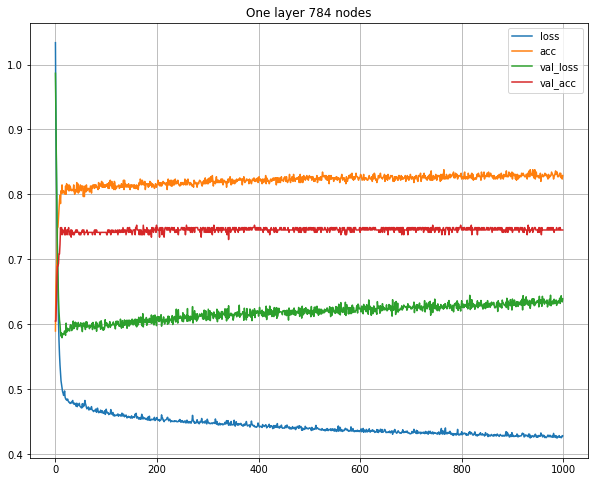

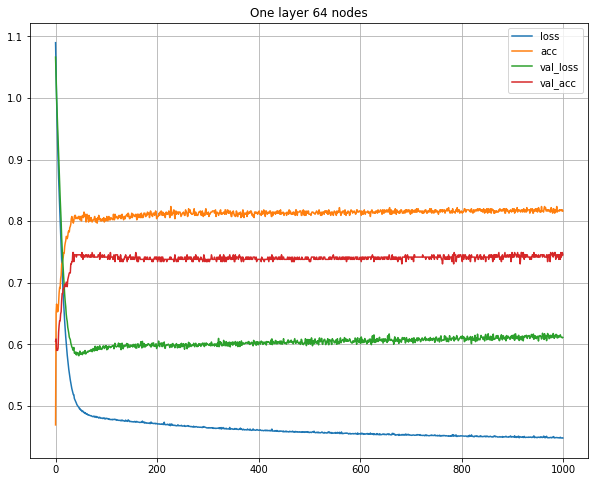

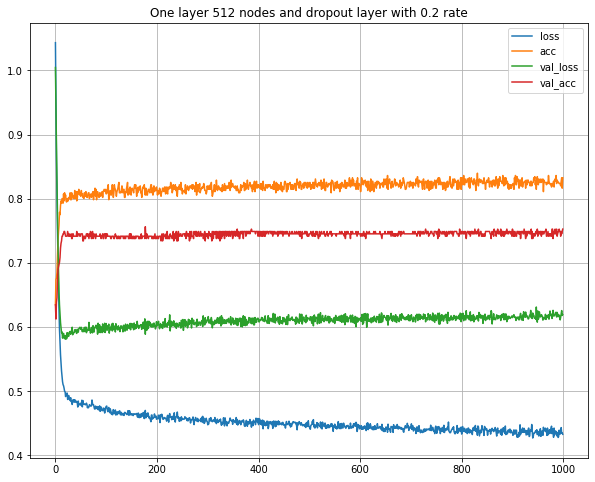

In [22]:
# Visualize the training results
plt.figure(figsize=(10,8))
plt.title('One layer 784 nodes, F1-F2')
plt.plot(history1.history['loss'],label='loss')
plt.plot(history1.history['accuracy'],label='acc')
plt.plot(history1.history['val_loss'],label='val_loss')
plt.plot(history1.history['val_accuracy'],label='val_acc')
plt.grid()
plt.legend()
plt.show()

# Visualize the training results
plt.figure(figsize=(10,8))
plt.title('One layer 64 nodes, F1-F2')
plt.plot(history2.history['loss'],label='loss')
plt.plot(history2.history['accuracy'],label='acc')
plt.plot(history2.history['val_loss'],label='val_loss')
plt.plot(history2.history['val_accuracy'],label='val_acc')
plt.grid()
plt.legend()
plt.show()

# Visualize the training results
plt.figure(figsize=(10,8))
plt.title('One layer 512 nodes and dropout layer with 0.2 rate, F1-F2')
plt.plot(history3.history['loss'],label='loss')
plt.plot(history3.history['accuracy'],label='acc')
plt.plot(history3.history['val_loss'],label='val_loss')
plt.plot(history3.history['val_accuracy'],label='val_acc')
plt.grid()
plt.legend()
plt.show()

In [25]:
# Validation model
print('--------model 1, One layer 784 nodes-----------')
score = model1.evaluate(x_valid, y_valid, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])
print('-----------------------------------------------')

# Validation model
print('--------model 2, One layer 64 nodes-----------')
score = model2.evaluate(x_valid, y_valid, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])
print('-----------------------------------------------')
# Validation model
print('--------model 3, One layer 512 nodes and dropout(0.2)-----------')
score = model3.evaluate(x_valid, y_valid, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])
print('-----------------------------------------------')

--------model 1, One layer 784 nodes-----------
Validation loss: 0.6394516825675964
Validation accuracy: 0.7453874349594116
-----------------------------------------------
--------model 2, One layer 64 nodes-----------
Validation loss: 0.6113682985305786
Validation accuracy: 0.7453874349594116
-----------------------------------------------
--------model 3, One layer 512 nodes and dropout(0.2)-----------
Validation loss: 0.6195013523101807
Validation accuracy: 0.7527675032615662
-----------------------------------------------


In [31]:
# Features to use
features = ["F1", "F2", "F3", "F4"]

# Extract features
x_train_raw = train[features]
x_valid_raw = valid[features]

# Normalize to zero mean
x_mean = np.mean(x_train_raw)
x_std = np.std(x_train_raw)
x_train = x_train_raw - x_mean
x_valid = x_valid_raw - x_mean

# Fix labels. The "to_categorical" call maps integer labels {n}
# to a vector of length N (number of labels) with a one in position n
y_train = keras.utils.to_categorical(trainlabels, len(phonemes))
y_valid = keras.utils.to_categorical(validlabels, len(phonemes))

In [32]:
# Create a model with a single hidden layer
model1 = keras.Sequential([
    keras.layers.Dense(28*28, activation=tf.nn.relu, input_dim=x_train.shape[1]),
    keras.layers.Dense(len(phonemes), activation=tf.nn.softmax)
])
model1.summary()

# Train the model
model1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history1 = model1.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                    epochs=1000, batch_size=32, verbose=True)

# Create a model with a single hidden layer
model2 = keras.Sequential([
    keras.layers.Dense(64, activation=tf.nn.relu, input_dim=x_train.shape[1]),
    keras.layers.Dense(len(phonemes), activation=tf.nn.softmax)
])
model2.summary()

# Train the model
model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history2 = model2.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                    epochs=1000, batch_size=32, verbose=True)

# Create a model with a single hidden layer
model3 = keras.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_dim=x_train.shape[1]),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(len(phonemes), activation=tf.nn.softmax)
])
model3.summary()

# Train the model
model3.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history3 = model3.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                    epochs=1000, batch_size=32, verbose=True)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 784)               3920      
_________________________________________________________________
dense_19 (Dense)             (None, 3)                 2355      
Total params: 6,275
Trainable params: 6,275
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
18/18 [==============================] - 0s 4ms/step - loss: 1.0318 - accuracy: 0.5773 - val_loss: 1.0009 - val_accuracy: 0.5387
Epoch 2/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.9206 - accuracy: 0.6241 - val_loss: 0.9350 - val_accuracy: 0.5793
Epoch 3/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.8386 - accuracy: 0.6673 - val_loss: 0.8654 - val_accuracy: 0.6199
Epoch 4/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.7686 - accur

18/18 [==============================] - 0s 1ms/step - loss: 0.4320 - accuracy: 0.8237 - val_loss: 0.5904 - val_accuracy: 0.7417
Epoch 55/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4292 - accuracy: 0.8291 - val_loss: 0.5765 - val_accuracy: 0.7528
Epoch 56/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4285 - accuracy: 0.8327 - val_loss: 0.5701 - val_accuracy: 0.7491
Epoch 57/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4292 - accuracy: 0.8363 - val_loss: 0.5772 - val_accuracy: 0.7528
Epoch 58/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4286 - accuracy: 0.8399 - val_loss: 0.5824 - val_accuracy: 0.7528
Epoch 59/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4262 - accuracy: 0.8345 - val_loss: 0.5807 - val_accuracy: 0.7491
Epoch 60/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4264 - accuracy: 0.8345 - val_loss: 0.5711 - val_accuracy: 0.7454
Epoch 61/1000

18/18 [==============================] - 0s 1ms/step - loss: 0.3987 - accuracy: 0.8543 - val_loss: 0.5836 - val_accuracy: 0.7380
Epoch 112/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3952 - accuracy: 0.8471 - val_loss: 0.5908 - val_accuracy: 0.7491
Epoch 113/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3941 - accuracy: 0.8489 - val_loss: 0.5855 - val_accuracy: 0.7491
Epoch 114/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3970 - accuracy: 0.8507 - val_loss: 0.5831 - val_accuracy: 0.7417
Epoch 115/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3951 - accuracy: 0.8471 - val_loss: 0.5922 - val_accuracy: 0.7380
Epoch 116/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3973 - accuracy: 0.8471 - val_loss: 0.5914 - val_accuracy: 0.7528
Epoch 117/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3932 - accuracy: 0.8597 - val_loss: 0.6033 - val_accuracy: 0.7454
Epoch 1

Epoch 168/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3771 - accuracy: 0.8489 - val_loss: 0.6130 - val_accuracy: 0.7454
Epoch 169/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3768 - accuracy: 0.8507 - val_loss: 0.6089 - val_accuracy: 0.7454
Epoch 170/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3762 - accuracy: 0.8543 - val_loss: 0.6109 - val_accuracy: 0.7454
Epoch 171/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3736 - accuracy: 0.8507 - val_loss: 0.6120 - val_accuracy: 0.7380
Epoch 172/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3710 - accuracy: 0.8543 - val_loss: 0.5991 - val_accuracy: 0.7417
Epoch 173/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3709 - accuracy: 0.8561 - val_loss: 0.6152 - val_accuracy: 0.7454
Epoch 174/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3711 - accuracy: 0.8525 - val_loss: 0.6187 - val_accuracy:

Epoch 225/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3551 - accuracy: 0.8597 - val_loss: 0.6300 - val_accuracy: 0.7491
Epoch 226/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3611 - accuracy: 0.8489 - val_loss: 0.6519 - val_accuracy: 0.7491
Epoch 227/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3548 - accuracy: 0.8615 - val_loss: 0.6288 - val_accuracy: 0.7565
Epoch 228/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3542 - accuracy: 0.8633 - val_loss: 0.6335 - val_accuracy: 0.7528
Epoch 229/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3537 - accuracy: 0.8561 - val_loss: 0.6365 - val_accuracy: 0.7528
Epoch 230/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3552 - accuracy: 0.8543 - val_loss: 0.6286 - val_accuracy: 0.7417
Epoch 231/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3518 - accuracy: 0.8579 - val_loss: 0.6309 - val_accuracy:

Epoch 282/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3427 - accuracy: 0.8615 - val_loss: 0.6546 - val_accuracy: 0.7528
Epoch 283/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3410 - accuracy: 0.8597 - val_loss: 0.6517 - val_accuracy: 0.7565
Epoch 284/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3372 - accuracy: 0.8687 - val_loss: 0.6528 - val_accuracy: 0.7528
Epoch 285/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3437 - accuracy: 0.8597 - val_loss: 0.6496 - val_accuracy: 0.7565
Epoch 286/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3384 - accuracy: 0.8597 - val_loss: 0.6516 - val_accuracy: 0.7528
Epoch 287/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3403 - accuracy: 0.8579 - val_loss: 0.6579 - val_accuracy: 0.7454
Epoch 288/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3400 - accuracy: 0.8579 - val_loss: 0.6628 - val_accuracy:

Epoch 339/1000
18/18 [==============================] - 0s 942us/step - loss: 0.3269 - accuracy: 0.8525 - val_loss: 0.6786 - val_accuracy: 0.7528
Epoch 340/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3273 - accuracy: 0.8651 - val_loss: 0.6808 - val_accuracy: 0.7528
Epoch 341/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3268 - accuracy: 0.8705 - val_loss: 0.6868 - val_accuracy: 0.7565
Epoch 342/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3258 - accuracy: 0.8687 - val_loss: 0.6777 - val_accuracy: 0.7601
Epoch 343/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3248 - accuracy: 0.8651 - val_loss: 0.6794 - val_accuracy: 0.7565
Epoch 344/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3338 - accuracy: 0.8615 - val_loss: 0.6857 - val_accuracy: 0.7528
Epoch 345/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3368 - accuracy: 0.8615 - val_loss: 0.6845 - val_accurac

Epoch 396/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3151 - accuracy: 0.8597 - val_loss: 0.6969 - val_accuracy: 0.7528
Epoch 397/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3175 - accuracy: 0.8669 - val_loss: 0.6941 - val_accuracy: 0.7638
Epoch 398/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3143 - accuracy: 0.8723 - val_loss: 0.7085 - val_accuracy: 0.7491
Epoch 399/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3175 - accuracy: 0.8651 - val_loss: 0.7029 - val_accuracy: 0.7565
Epoch 400/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3157 - accuracy: 0.8759 - val_loss: 0.7062 - val_accuracy: 0.7565
Epoch 401/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3143 - accuracy: 0.8723 - val_loss: 0.7049 - val_accuracy: 0.7565
Epoch 402/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3144 - accuracy: 0.8669 - val_loss: 0.7112 - val_accuracy:

Epoch 453/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3046 - accuracy: 0.8687 - val_loss: 0.7337 - val_accuracy: 0.7528
Epoch 454/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3116 - accuracy: 0.8705 - val_loss: 0.7247 - val_accuracy: 0.7528
Epoch 455/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3056 - accuracy: 0.8669 - val_loss: 0.7304 - val_accuracy: 0.7528
Epoch 456/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3054 - accuracy: 0.8669 - val_loss: 0.7253 - val_accuracy: 0.7601
Epoch 457/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3052 - accuracy: 0.8669 - val_loss: 0.7256 - val_accuracy: 0.7565
Epoch 458/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3045 - accuracy: 0.8687 - val_loss: 0.7269 - val_accuracy: 0.7491
Epoch 459/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3115 - accuracy: 0.8651 - val_loss: 0.7201 - val_accuracy:

Epoch 510/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2960 - accuracy: 0.8759 - val_loss: 0.7461 - val_accuracy: 0.7454
Epoch 511/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2964 - accuracy: 0.8705 - val_loss: 0.7506 - val_accuracy: 0.7528
Epoch 512/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2938 - accuracy: 0.8813 - val_loss: 0.7479 - val_accuracy: 0.7528
Epoch 513/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2935 - accuracy: 0.8723 - val_loss: 0.7623 - val_accuracy: 0.7491
Epoch 514/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2964 - accuracy: 0.8849 - val_loss: 0.7425 - val_accuracy: 0.7491
Epoch 515/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2941 - accuracy: 0.8759 - val_loss: 0.7474 - val_accuracy: 0.7528
Epoch 516/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2984 - accuracy: 0.8777 - val_loss: 0.7498 - val_accuracy:

Epoch 567/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2884 - accuracy: 0.8777 - val_loss: 0.7708 - val_accuracy: 0.7454
Epoch 568/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2883 - accuracy: 0.8831 - val_loss: 0.7843 - val_accuracy: 0.7491
Epoch 569/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2848 - accuracy: 0.8885 - val_loss: 0.7745 - val_accuracy: 0.7491
Epoch 570/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2846 - accuracy: 0.8867 - val_loss: 0.7663 - val_accuracy: 0.7528
Epoch 571/1000
18/18 [==============================] - 0s 942us/step - loss: 0.2882 - accuracy: 0.8831 - val_loss: 0.7864 - val_accuracy: 0.7528
Epoch 572/1000
18/18 [==============================] - 0s 942us/step - loss: 0.2858 - accuracy: 0.8867 - val_loss: 0.7659 - val_accuracy: 0.7491
Epoch 573/1000
18/18 [==============================] - 0s 942us/step - loss: 0.2842 - accuracy: 0.8831 - val_loss: 0.7850 - val_acc

Epoch 624/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2823 - accuracy: 0.8813 - val_loss: 0.8211 - val_accuracy: 0.7491
Epoch 625/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2793 - accuracy: 0.8903 - val_loss: 0.7941 - val_accuracy: 0.7528
Epoch 626/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2788 - accuracy: 0.8795 - val_loss: 0.8116 - val_accuracy: 0.7491
Epoch 627/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2777 - accuracy: 0.8903 - val_loss: 0.8179 - val_accuracy: 0.7454
Epoch 628/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2776 - accuracy: 0.8975 - val_loss: 0.8169 - val_accuracy: 0.7454
Epoch 629/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2787 - accuracy: 0.8831 - val_loss: 0.8070 - val_accuracy: 0.7528
Epoch 630/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2781 - accuracy: 0.8831 - val_loss: 0.8402 - val_accuracy:

18/18 [==============================] - 0s 1ms/step - loss: 0.2759 - accuracy: 0.8885 - val_loss: 0.8474 - val_accuracy: 0.7491
Epoch 681/1000
18/18 [==============================] - 0s 942us/step - loss: 0.2713 - accuracy: 0.8903 - val_loss: 0.8349 - val_accuracy: 0.7491
Epoch 682/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2713 - accuracy: 0.8975 - val_loss: 0.8367 - val_accuracy: 0.7417
Epoch 683/1000
18/18 [==============================] - 0s 942us/step - loss: 0.2747 - accuracy: 0.8849 - val_loss: 0.8697 - val_accuracy: 0.7380
Epoch 684/1000
18/18 [==============================] - 0s 942us/step - loss: 0.2712 - accuracy: 0.8903 - val_loss: 0.8508 - val_accuracy: 0.7417
Epoch 685/1000
18/18 [==============================] - 0s 942us/step - loss: 0.2719 - accuracy: 0.8975 - val_loss: 0.8535 - val_accuracy: 0.7417
Epoch 686/1000
18/18 [==============================] - 0s 942us/step - loss: 0.2678 - accuracy: 0.8993 - val_loss: 0.8528 - val_accuracy: 0.74

Epoch 737/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2691 - accuracy: 0.8957 - val_loss: 0.8820 - val_accuracy: 0.7454
Epoch 738/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2682 - accuracy: 0.8921 - val_loss: 0.8899 - val_accuracy: 0.7380
Epoch 739/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2651 - accuracy: 0.8993 - val_loss: 0.8751 - val_accuracy: 0.7417
Epoch 740/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2667 - accuracy: 0.8939 - val_loss: 0.8820 - val_accuracy: 0.7528
Epoch 741/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2649 - accuracy: 0.8921 - val_loss: 0.8798 - val_accuracy: 0.7380
Epoch 742/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2634 - accuracy: 0.9029 - val_loss: 0.8787 - val_accuracy: 0.7491
Epoch 743/1000
18/18 [==============================] - 0s 942us/step - loss: 0.2661 - accuracy: 0.9011 - val_loss: 0.8813 - val_accurac

Epoch 794/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2577 - accuracy: 0.8975 - val_loss: 0.9239 - val_accuracy: 0.7454
Epoch 795/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2558 - accuracy: 0.9029 - val_loss: 0.9190 - val_accuracy: 0.7417
Epoch 796/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2575 - accuracy: 0.9065 - val_loss: 0.9104 - val_accuracy: 0.7454
Epoch 797/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2547 - accuracy: 0.9083 - val_loss: 0.9235 - val_accuracy: 0.7417
Epoch 798/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2555 - accuracy: 0.8993 - val_loss: 0.9037 - val_accuracy: 0.7565
Epoch 799/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2593 - accuracy: 0.8975 - val_loss: 0.9254 - val_accuracy: 0.7417
Epoch 800/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2567 - accuracy: 0.9065 - val_loss: 0.9273 - val_accuracy:

Epoch 851/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2529 - accuracy: 0.9065 - val_loss: 0.9485 - val_accuracy: 0.7417
Epoch 852/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2549 - accuracy: 0.8939 - val_loss: 0.9463 - val_accuracy: 0.7491
Epoch 853/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2572 - accuracy: 0.8867 - val_loss: 0.9809 - val_accuracy: 0.7380
Epoch 854/1000
18/18 [==============================] - 0s 942us/step - loss: 0.2565 - accuracy: 0.9011 - val_loss: 0.9425 - val_accuracy: 0.7417
Epoch 855/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2491 - accuracy: 0.9083 - val_loss: 0.9655 - val_accuracy: 0.7417
Epoch 856/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2486 - accuracy: 0.9101 - val_loss: 0.9407 - val_accuracy: 0.7491
Epoch 857/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2477 - accuracy: 0.9101 - val_loss: 0.9770 - val_accurac

Epoch 908/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2452 - accuracy: 0.9029 - val_loss: 0.9871 - val_accuracy: 0.7454
Epoch 909/1000
18/18 [==============================] - 0s 942us/step - loss: 0.2446 - accuracy: 0.9119 - val_loss: 1.0045 - val_accuracy: 0.7417
Epoch 910/1000
18/18 [==============================] - 0s 942us/step - loss: 0.2456 - accuracy: 0.9083 - val_loss: 0.9826 - val_accuracy: 0.7417
Epoch 911/1000
18/18 [==============================] - 0s 942us/step - loss: 0.2419 - accuracy: 0.9083 - val_loss: 1.0009 - val_accuracy: 0.7380
Epoch 912/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2459 - accuracy: 0.9101 - val_loss: 0.9860 - val_accuracy: 0.7417
Epoch 913/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2421 - accuracy: 0.9083 - val_loss: 1.0160 - val_accuracy: 0.7380
Epoch 914/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2480 - accuracy: 0.8957 - val_loss: 1.0046 - val_acc

Epoch 965/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2426 - accuracy: 0.8993 - val_loss: 1.0249 - val_accuracy: 0.7454
Epoch 966/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2392 - accuracy: 0.9011 - val_loss: 1.0286 - val_accuracy: 0.7380
Epoch 967/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2370 - accuracy: 0.9101 - val_loss: 1.0288 - val_accuracy: 0.7454
Epoch 968/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2381 - accuracy: 0.9155 - val_loss: 1.0177 - val_accuracy: 0.7454
Epoch 969/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2373 - accuracy: 0.9065 - val_loss: 1.0211 - val_accuracy: 0.7417
Epoch 970/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2387 - accuracy: 0.9119 - val_loss: 1.0457 - val_accuracy: 0.7454
Epoch 971/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2390 - accuracy: 0.9029 - val_loss: 1.0339 - val_accuracy:

18/18 [==============================] - 0s 883us/step - loss: 0.6913 - accuracy: 0.7176 - val_loss: 0.7561 - val_accuracy: 0.6531
Epoch 18/1000
18/18 [==============================] - 0s 883us/step - loss: 0.6760 - accuracy: 0.7230 - val_loss: 0.7420 - val_accuracy: 0.6531
Epoch 19/1000
18/18 [==============================] - 0s 883us/step - loss: 0.6614 - accuracy: 0.7230 - val_loss: 0.7221 - val_accuracy: 0.6679
Epoch 20/1000
18/18 [==============================] - 0s 942us/step - loss: 0.6481 - accuracy: 0.7266 - val_loss: 0.7121 - val_accuracy: 0.6679
Epoch 21/1000
18/18 [==============================] - 0s 942us/step - loss: 0.6358 - accuracy: 0.7320 - val_loss: 0.6975 - val_accuracy: 0.6753
Epoch 22/1000
18/18 [==============================] - 0s 942us/step - loss: 0.6252 - accuracy: 0.7446 - val_loss: 0.6848 - val_accuracy: 0.6753
Epoch 23/1000
18/18 [==============================] - 0s 942us/step - loss: 0.6145 - accuracy: 0.7392 - val_loss: 0.6777 - val_accuracy: 0.6790

Epoch 74/1000
18/18 [==============================] - 0s 942us/step - loss: 0.4636 - accuracy: 0.8129 - val_loss: 0.5809 - val_accuracy: 0.7380
Epoch 75/1000
18/18 [==============================] - 0s 927us/step - loss: 0.4638 - accuracy: 0.8219 - val_loss: 0.5745 - val_accuracy: 0.7380
Epoch 76/1000
18/18 [==============================] - 0s 883us/step - loss: 0.4626 - accuracy: 0.8255 - val_loss: 0.5747 - val_accuracy: 0.7417
Epoch 77/1000
18/18 [==============================] - 0s 883us/step - loss: 0.4615 - accuracy: 0.8183 - val_loss: 0.5770 - val_accuracy: 0.7454
Epoch 78/1000
18/18 [==============================] - 0s 942us/step - loss: 0.4612 - accuracy: 0.8183 - val_loss: 0.5780 - val_accuracy: 0.7417
Epoch 79/1000
18/18 [==============================] - 0s 986us/step - loss: 0.4607 - accuracy: 0.8147 - val_loss: 0.5846 - val_accuracy: 0.7417
Epoch 80/1000
18/18 [==============================] - 0s 942us/step - loss: 0.4607 - accuracy: 0.8165 - val_loss: 0.5761 - val_ac

18/18 [==============================] - 0s 942us/step - loss: 0.4481 - accuracy: 0.8237 - val_loss: 0.5854 - val_accuracy: 0.7417
Epoch 131/1000
18/18 [==============================] - 0s 942us/step - loss: 0.4482 - accuracy: 0.8219 - val_loss: 0.5859 - val_accuracy: 0.7380
Epoch 132/1000
18/18 [==============================] - 0s 883us/step - loss: 0.4473 - accuracy: 0.8237 - val_loss: 0.5804 - val_accuracy: 0.7417
Epoch 133/1000
18/18 [==============================] - 0s 942us/step - loss: 0.4482 - accuracy: 0.8291 - val_loss: 0.5808 - val_accuracy: 0.7454
Epoch 134/1000
18/18 [==============================] - 0s 942us/step - loss: 0.4464 - accuracy: 0.8237 - val_loss: 0.5829 - val_accuracy: 0.7380
Epoch 135/1000
18/18 [==============================] - 0s 883us/step - loss: 0.4469 - accuracy: 0.8237 - val_loss: 0.5877 - val_accuracy: 0.7380
Epoch 136/1000
18/18 [==============================] - 0s 883us/step - loss: 0.4471 - accuracy: 0.8237 - val_loss: 0.5849 - val_accuracy: 

18/18 [==============================] - 0s 883us/step - loss: 0.4364 - accuracy: 0.8327 - val_loss: 0.5849 - val_accuracy: 0.7454
Epoch 187/1000
18/18 [==============================] - 0s 942us/step - loss: 0.4357 - accuracy: 0.8291 - val_loss: 0.5836 - val_accuracy: 0.7417
Epoch 188/1000
18/18 [==============================] - 0s 942us/step - loss: 0.4356 - accuracy: 0.8291 - val_loss: 0.5875 - val_accuracy: 0.7306
Epoch 189/1000
18/18 [==============================] - 0s 883us/step - loss: 0.4357 - accuracy: 0.8291 - val_loss: 0.5826 - val_accuracy: 0.7417
Epoch 190/1000
18/18 [==============================] - 0s 942us/step - loss: 0.4367 - accuracy: 0.8273 - val_loss: 0.5827 - val_accuracy: 0.7343
Epoch 191/1000
18/18 [==============================] - 0s 883us/step - loss: 0.4350 - accuracy: 0.8345 - val_loss: 0.5821 - val_accuracy: 0.7417
Epoch 192/1000
18/18 [==============================] - 0s 942us/step - loss: 0.4357 - accuracy: 0.8327 - val_loss: 0.5839 - val_accuracy: 

18/18 [==============================] - 0s 942us/step - loss: 0.4283 - accuracy: 0.8327 - val_loss: 0.5946 - val_accuracy: 0.7454
Epoch 243/1000
18/18 [==============================] - 0s 942us/step - loss: 0.4269 - accuracy: 0.8363 - val_loss: 0.5808 - val_accuracy: 0.7491
Epoch 244/1000
18/18 [==============================] - 0s 883us/step - loss: 0.4250 - accuracy: 0.8345 - val_loss: 0.5826 - val_accuracy: 0.7528
Epoch 245/1000
18/18 [==============================] - 0s 942us/step - loss: 0.4247 - accuracy: 0.8327 - val_loss: 0.5878 - val_accuracy: 0.7454
Epoch 246/1000
18/18 [==============================] - 0s 942us/step - loss: 0.4252 - accuracy: 0.8363 - val_loss: 0.5905 - val_accuracy: 0.7454
Epoch 247/1000
18/18 [==============================] - 0s 883us/step - loss: 0.4249 - accuracy: 0.8345 - val_loss: 0.5816 - val_accuracy: 0.7454
Epoch 248/1000
18/18 [==============================] - 0s 942us/step - loss: 0.4245 - accuracy: 0.8327 - val_loss: 0.5874 - val_accuracy: 

18/18 [==============================] - 0s 942us/step - loss: 0.4189 - accuracy: 0.8453 - val_loss: 0.5829 - val_accuracy: 0.7417
Epoch 299/1000
18/18 [==============================] - 0s 883us/step - loss: 0.4167 - accuracy: 0.8345 - val_loss: 0.5949 - val_accuracy: 0.7380
Epoch 300/1000
18/18 [==============================] - 0s 883us/step - loss: 0.4175 - accuracy: 0.8327 - val_loss: 0.5973 - val_accuracy: 0.7380
Epoch 301/1000
18/18 [==============================] - 0s 883us/step - loss: 0.4164 - accuracy: 0.8363 - val_loss: 0.5871 - val_accuracy: 0.7343
Epoch 302/1000
18/18 [==============================] - 0s 942us/step - loss: 0.4162 - accuracy: 0.8327 - val_loss: 0.5885 - val_accuracy: 0.7380
Epoch 303/1000
18/18 [==============================] - 0s 942us/step - loss: 0.4155 - accuracy: 0.8345 - val_loss: 0.5884 - val_accuracy: 0.7343
Epoch 304/1000
18/18 [==============================] - 0s 942us/step - loss: 0.4159 - accuracy: 0.8345 - val_loss: 0.5908 - val_accuracy: 

18/18 [==============================] - 0s 942us/step - loss: 0.4095 - accuracy: 0.8453 - val_loss: 0.5893 - val_accuracy: 0.7454
Epoch 355/1000
18/18 [==============================] - 0s 883us/step - loss: 0.4095 - accuracy: 0.8399 - val_loss: 0.5912 - val_accuracy: 0.7454
Epoch 356/1000
18/18 [==============================] - 0s 942us/step - loss: 0.4088 - accuracy: 0.8381 - val_loss: 0.5912 - val_accuracy: 0.7417
Epoch 357/1000
18/18 [==============================] - 0s 883us/step - loss: 0.4091 - accuracy: 0.8417 - val_loss: 0.5939 - val_accuracy: 0.7417
Epoch 358/1000
18/18 [==============================] - 0s 942us/step - loss: 0.4091 - accuracy: 0.8417 - val_loss: 0.5873 - val_accuracy: 0.7454
Epoch 359/1000
18/18 [==============================] - 0s 883us/step - loss: 0.4090 - accuracy: 0.8399 - val_loss: 0.5979 - val_accuracy: 0.7417
Epoch 360/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4095 - accuracy: 0.8417 - val_loss: 0.5943 - val_accuracy: 0.

18/18 [==============================] - 0s 942us/step - loss: 0.4032 - accuracy: 0.8417 - val_loss: 0.6022 - val_accuracy: 0.7417
Epoch 411/1000
18/18 [==============================] - 0s 942us/step - loss: 0.4037 - accuracy: 0.8453 - val_loss: 0.5994 - val_accuracy: 0.7454
Epoch 412/1000
18/18 [==============================] - 0s 883us/step - loss: 0.4026 - accuracy: 0.8489 - val_loss: 0.5936 - val_accuracy: 0.7454
Epoch 413/1000
18/18 [==============================] - 0s 883us/step - loss: 0.4044 - accuracy: 0.8399 - val_loss: 0.5901 - val_accuracy: 0.7454
Epoch 414/1000
18/18 [==============================] - 0s 942us/step - loss: 0.4030 - accuracy: 0.8417 - val_loss: 0.6013 - val_accuracy: 0.7491
Epoch 415/1000
18/18 [==============================] - 0s 883us/step - loss: 0.4036 - accuracy: 0.8417 - val_loss: 0.6056 - val_accuracy: 0.7417
Epoch 416/1000
18/18 [==============================] - 0s 883us/step - loss: 0.4029 - accuracy: 0.8363 - val_loss: 0.5966 - val_accuracy: 

18/18 [==============================] - 0s 942us/step - loss: 0.3984 - accuracy: 0.8417 - val_loss: 0.6044 - val_accuracy: 0.7454
Epoch 467/1000
18/18 [==============================] - 0s 942us/step - loss: 0.3984 - accuracy: 0.8435 - val_loss: 0.6031 - val_accuracy: 0.7417
Epoch 468/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3978 - accuracy: 0.8399 - val_loss: 0.6028 - val_accuracy: 0.7491
Epoch 469/1000
18/18 [==============================] - 0s 942us/step - loss: 0.3979 - accuracy: 0.8399 - val_loss: 0.5990 - val_accuracy: 0.7491
Epoch 470/1000
18/18 [==============================] - 0s 883us/step - loss: 0.3978 - accuracy: 0.8435 - val_loss: 0.6018 - val_accuracy: 0.7528
Epoch 471/1000
18/18 [==============================] - 0s 883us/step - loss: 0.4004 - accuracy: 0.8381 - val_loss: 0.5982 - val_accuracy: 0.7491
Epoch 472/1000
18/18 [==============================] - 0s 942us/step - loss: 0.3977 - accuracy: 0.8399 - val_loss: 0.6040 - val_accuracy: 0.

18/18 [==============================] - 0s 883us/step - loss: 0.3935 - accuracy: 0.8417 - val_loss: 0.6051 - val_accuracy: 0.7528
Epoch 523/1000
18/18 [==============================] - 0s 942us/step - loss: 0.3946 - accuracy: 0.8417 - val_loss: 0.6037 - val_accuracy: 0.7528
Epoch 524/1000
18/18 [==============================] - 0s 942us/step - loss: 0.3928 - accuracy: 0.8417 - val_loss: 0.6045 - val_accuracy: 0.7528
Epoch 525/1000
18/18 [==============================] - 0s 883us/step - loss: 0.3936 - accuracy: 0.8453 - val_loss: 0.6030 - val_accuracy: 0.7528
Epoch 526/1000
18/18 [==============================] - 0s 889us/step - loss: 0.3930 - accuracy: 0.8417 - val_loss: 0.6067 - val_accuracy: 0.7528
Epoch 527/1000
18/18 [==============================] - 0s 883us/step - loss: 0.3933 - accuracy: 0.8435 - val_loss: 0.6082 - val_accuracy: 0.7491
Epoch 528/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3928 - accuracy: 0.8399 - val_loss: 0.6052 - val_accuracy: 0.

18/18 [==============================] - 0s 883us/step - loss: 0.3895 - accuracy: 0.8471 - val_loss: 0.6172 - val_accuracy: 0.7528
Epoch 579/1000
18/18 [==============================] - 0s 883us/step - loss: 0.3889 - accuracy: 0.8381 - val_loss: 0.6091 - val_accuracy: 0.7491
Epoch 580/1000
18/18 [==============================] - 0s 883us/step - loss: 0.3891 - accuracy: 0.8399 - val_loss: 0.6164 - val_accuracy: 0.7491
Epoch 581/1000
18/18 [==============================] - 0s 942us/step - loss: 0.3906 - accuracy: 0.8399 - val_loss: 0.6105 - val_accuracy: 0.7491
Epoch 582/1000
18/18 [==============================] - 0s 883us/step - loss: 0.3895 - accuracy: 0.8417 - val_loss: 0.6119 - val_accuracy: 0.7491
Epoch 583/1000
18/18 [==============================] - 0s 883us/step - loss: 0.3904 - accuracy: 0.8435 - val_loss: 0.6176 - val_accuracy: 0.7491
Epoch 584/1000
18/18 [==============================] - 0s 883us/step - loss: 0.3881 - accuracy: 0.8435 - val_loss: 0.6047 - val_accuracy: 

18/18 [==============================] - 0s 883us/step - loss: 0.3852 - accuracy: 0.8471 - val_loss: 0.6163 - val_accuracy: 0.7491
Epoch 635/1000
18/18 [==============================] - 0s 942us/step - loss: 0.3851 - accuracy: 0.8453 - val_loss: 0.6168 - val_accuracy: 0.7454
Epoch 636/1000
18/18 [==============================] - 0s 942us/step - loss: 0.3853 - accuracy: 0.8453 - val_loss: 0.6104 - val_accuracy: 0.7528
Epoch 637/1000
18/18 [==============================] - 0s 883us/step - loss: 0.3845 - accuracy: 0.8489 - val_loss: 0.6163 - val_accuracy: 0.7491
Epoch 638/1000
18/18 [==============================] - 0s 883us/step - loss: 0.3849 - accuracy: 0.8453 - val_loss: 0.6160 - val_accuracy: 0.7491
Epoch 639/1000
18/18 [==============================] - 0s 942us/step - loss: 0.3851 - accuracy: 0.8399 - val_loss: 0.6106 - val_accuracy: 0.7491
Epoch 640/1000
18/18 [==============================] - 0s 883us/step - loss: 0.3853 - accuracy: 0.8453 - val_loss: 0.6150 - val_accuracy: 

18/18 [==============================] - 0s 942us/step - loss: 0.3822 - accuracy: 0.8471 - val_loss: 0.6188 - val_accuracy: 0.7528
Epoch 691/1000
18/18 [==============================] - 0s 942us/step - loss: 0.3821 - accuracy: 0.8471 - val_loss: 0.6210 - val_accuracy: 0.7528
Epoch 692/1000
18/18 [==============================] - 0s 883us/step - loss: 0.3817 - accuracy: 0.8507 - val_loss: 0.6100 - val_accuracy: 0.7528
Epoch 693/1000
18/18 [==============================] - 0s 942us/step - loss: 0.3838 - accuracy: 0.8471 - val_loss: 0.6088 - val_accuracy: 0.7565
Epoch 694/1000
18/18 [==============================] - 0s 942us/step - loss: 0.3811 - accuracy: 0.8507 - val_loss: 0.6253 - val_accuracy: 0.7417
Epoch 695/1000
18/18 [==============================] - 0s 942us/step - loss: 0.3818 - accuracy: 0.8489 - val_loss: 0.6259 - val_accuracy: 0.7491
Epoch 696/1000
18/18 [==============================] - 0s 883us/step - loss: 0.3818 - accuracy: 0.8489 - val_loss: 0.6158 - val_accuracy: 

18/18 [==============================] - 0s 942us/step - loss: 0.3786 - accuracy: 0.8453 - val_loss: 0.6257 - val_accuracy: 0.7454
Epoch 747/1000
18/18 [==============================] - 0s 942us/step - loss: 0.3818 - accuracy: 0.8507 - val_loss: 0.6194 - val_accuracy: 0.7528
Epoch 748/1000
18/18 [==============================] - 0s 942us/step - loss: 0.3802 - accuracy: 0.8525 - val_loss: 0.6199 - val_accuracy: 0.7454
Epoch 749/1000
18/18 [==============================] - 0s 942us/step - loss: 0.3812 - accuracy: 0.8489 - val_loss: 0.6305 - val_accuracy: 0.7454
Epoch 750/1000
18/18 [==============================] - 0s 942us/step - loss: 0.3778 - accuracy: 0.8489 - val_loss: 0.6215 - val_accuracy: 0.7528
Epoch 751/1000
18/18 [==============================] - 0s 942us/step - loss: 0.3790 - accuracy: 0.8471 - val_loss: 0.6219 - val_accuracy: 0.7601
Epoch 752/1000
18/18 [==============================] - 0s 942us/step - loss: 0.3784 - accuracy: 0.8525 - val_loss: 0.6183 - val_accuracy: 

18/18 [==============================] - 0s 942us/step - loss: 0.3760 - accuracy: 0.8507 - val_loss: 0.6223 - val_accuracy: 0.7565
Epoch 803/1000
18/18 [==============================] - 0s 942us/step - loss: 0.3748 - accuracy: 0.8525 - val_loss: 0.6345 - val_accuracy: 0.7528
Epoch 804/1000
18/18 [==============================] - 0s 883us/step - loss: 0.3753 - accuracy: 0.8525 - val_loss: 0.6295 - val_accuracy: 0.7491
Epoch 805/1000
18/18 [==============================] - 0s 883us/step - loss: 0.3750 - accuracy: 0.8525 - val_loss: 0.6287 - val_accuracy: 0.7454
Epoch 806/1000
18/18 [==============================] - 0s 883us/step - loss: 0.3754 - accuracy: 0.8561 - val_loss: 0.6246 - val_accuracy: 0.7454
Epoch 807/1000
18/18 [==============================] - 0s 883us/step - loss: 0.3755 - accuracy: 0.8489 - val_loss: 0.6252 - val_accuracy: 0.7491
Epoch 808/1000
18/18 [==============================] - 0s 883us/step - loss: 0.3762 - accuracy: 0.8525 - val_loss: 0.6274 - val_accuracy: 

18/18 [==============================] - 0s 942us/step - loss: 0.3718 - accuracy: 0.8543 - val_loss: 0.6272 - val_accuracy: 0.7565
Epoch 859/1000
18/18 [==============================] - 0s 883us/step - loss: 0.3720 - accuracy: 0.8507 - val_loss: 0.6287 - val_accuracy: 0.7565
Epoch 860/1000
18/18 [==============================] - 0s 883us/step - loss: 0.3713 - accuracy: 0.8543 - val_loss: 0.6280 - val_accuracy: 0.7565
Epoch 861/1000
18/18 [==============================] - 0s 942us/step - loss: 0.3723 - accuracy: 0.8561 - val_loss: 0.6289 - val_accuracy: 0.7565
Epoch 862/1000
18/18 [==============================] - 0s 942us/step - loss: 0.3712 - accuracy: 0.8579 - val_loss: 0.6343 - val_accuracy: 0.7491
Epoch 863/1000
18/18 [==============================] - 0s 883us/step - loss: 0.3718 - accuracy: 0.8561 - val_loss: 0.6285 - val_accuracy: 0.7528
Epoch 864/1000
18/18 [==============================] - 0s 942us/step - loss: 0.3722 - accuracy: 0.8543 - val_loss: 0.6302 - val_accuracy: 

18/18 [==============================] - 0s 942us/step - loss: 0.3681 - accuracy: 0.8561 - val_loss: 0.6316 - val_accuracy: 0.7565
Epoch 915/1000
18/18 [==============================] - 0s 942us/step - loss: 0.3692 - accuracy: 0.8579 - val_loss: 0.6317 - val_accuracy: 0.7565
Epoch 916/1000
18/18 [==============================] - 0s 942us/step - loss: 0.3679 - accuracy: 0.8579 - val_loss: 0.6352 - val_accuracy: 0.7565
Epoch 917/1000
18/18 [==============================] - 0s 883us/step - loss: 0.3690 - accuracy: 0.8543 - val_loss: 0.6333 - val_accuracy: 0.7565
Epoch 918/1000
18/18 [==============================] - 0s 942us/step - loss: 0.3698 - accuracy: 0.8489 - val_loss: 0.6209 - val_accuracy: 0.7565
Epoch 919/1000
18/18 [==============================] - 0s 942us/step - loss: 0.3688 - accuracy: 0.8615 - val_loss: 0.6361 - val_accuracy: 0.7491
Epoch 920/1000
18/18 [==============================] - 0s 942us/step - loss: 0.3690 - accuracy: 0.8561 - val_loss: 0.6378 - val_accuracy: 

18/18 [==============================] - 0s 942us/step - loss: 0.3658 - accuracy: 0.8579 - val_loss: 0.6350 - val_accuracy: 0.7565
Epoch 971/1000
18/18 [==============================] - 0s 942us/step - loss: 0.3651 - accuracy: 0.8615 - val_loss: 0.6335 - val_accuracy: 0.7601
Epoch 972/1000
18/18 [==============================] - 0s 942us/step - loss: 0.3652 - accuracy: 0.8579 - val_loss: 0.6367 - val_accuracy: 0.7528
Epoch 973/1000
18/18 [==============================] - 0s 942us/step - loss: 0.3656 - accuracy: 0.8615 - val_loss: 0.6284 - val_accuracy: 0.7601
Epoch 974/1000
18/18 [==============================] - 0s 942us/step - loss: 0.3658 - accuracy: 0.8633 - val_loss: 0.6272 - val_accuracy: 0.7601
Epoch 975/1000
18/18 [==============================] - 0s 942us/step - loss: 0.3662 - accuracy: 0.8543 - val_loss: 0.6391 - val_accuracy: 0.7565
Epoch 976/1000
18/18 [==============================] - 0s 883us/step - loss: 0.3662 - accuracy: 0.8561 - val_loss: 0.6152 - val_accuracy: 

18/18 [==============================] - 0s 1ms/step - loss: 0.4852 - accuracy: 0.8076 - val_loss: 0.5752 - val_accuracy: 0.7528
Epoch 22/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4741 - accuracy: 0.8112 - val_loss: 0.5775 - val_accuracy: 0.7306
Epoch 23/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4725 - accuracy: 0.8112 - val_loss: 0.5697 - val_accuracy: 0.7454
Epoch 24/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4771 - accuracy: 0.8094 - val_loss: 0.5757 - val_accuracy: 0.7417
Epoch 25/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4682 - accuracy: 0.8147 - val_loss: 0.5735 - val_accuracy: 0.7454
Epoch 26/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4689 - accuracy: 0.8219 - val_loss: 0.5722 - val_accuracy: 0.7417
Epoch 27/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4688 - accuracy: 0.8129 - val_loss: 0.5743 - val_accuracy: 0.7491
Epoch 28/1000

18/18 [==============================] - 0s 1ms/step - loss: 0.4332 - accuracy: 0.8327 - val_loss: 0.5869 - val_accuracy: 0.7417
Epoch 79/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4355 - accuracy: 0.8345 - val_loss: 0.5842 - val_accuracy: 0.7380
Epoch 80/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4338 - accuracy: 0.8237 - val_loss: 0.5808 - val_accuracy: 0.7417
Epoch 81/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4354 - accuracy: 0.8291 - val_loss: 0.5883 - val_accuracy: 0.7343
Epoch 82/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4284 - accuracy: 0.8363 - val_loss: 0.5838 - val_accuracy: 0.7417
Epoch 83/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4313 - accuracy: 0.8363 - val_loss: 0.5875 - val_accuracy: 0.7417
Epoch 84/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4349 - accuracy: 0.8309 - val_loss: 0.5841 - val_accuracy: 0.7454
Epoch 85/1000

18/18 [==============================] - 0s 1ms/step - loss: 0.4076 - accuracy: 0.8417 - val_loss: 0.5814 - val_accuracy: 0.7491
Epoch 136/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4053 - accuracy: 0.8417 - val_loss: 0.5826 - val_accuracy: 0.7491
Epoch 137/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4124 - accuracy: 0.8399 - val_loss: 0.5884 - val_accuracy: 0.7417
Epoch 138/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4085 - accuracy: 0.8435 - val_loss: 0.5880 - val_accuracy: 0.7454
Epoch 139/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4094 - accuracy: 0.8327 - val_loss: 0.5884 - val_accuracy: 0.7417
Epoch 140/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4148 - accuracy: 0.8381 - val_loss: 0.5854 - val_accuracy: 0.7454
Epoch 141/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4060 - accuracy: 0.8435 - val_loss: 0.5883 - val_accuracy: 0.7491
Epoch 1

Epoch 192/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3832 - accuracy: 0.8525 - val_loss: 0.5866 - val_accuracy: 0.7528
Epoch 193/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3905 - accuracy: 0.8417 - val_loss: 0.6048 - val_accuracy: 0.7528
Epoch 194/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3833 - accuracy: 0.8453 - val_loss: 0.5859 - val_accuracy: 0.7528
Epoch 195/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3917 - accuracy: 0.8417 - val_loss: 0.6042 - val_accuracy: 0.7454
Epoch 196/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3921 - accuracy: 0.8417 - val_loss: 0.5885 - val_accuracy: 0.7565
Epoch 197/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4031 - accuracy: 0.8399 - val_loss: 0.6105 - val_accuracy: 0.7417
Epoch 198/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3915 - accuracy: 0.8543 - val_loss: 0.5839 - val_accuracy:

Epoch 249/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3798 - accuracy: 0.8399 - val_loss: 0.6069 - val_accuracy: 0.7417
Epoch 250/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3848 - accuracy: 0.8471 - val_loss: 0.6083 - val_accuracy: 0.7417
Epoch 251/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3744 - accuracy: 0.8453 - val_loss: 0.6034 - val_accuracy: 0.7491
Epoch 252/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3757 - accuracy: 0.8471 - val_loss: 0.6160 - val_accuracy: 0.7380
Epoch 253/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3807 - accuracy: 0.8507 - val_loss: 0.6044 - val_accuracy: 0.7454
Epoch 254/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3836 - accuracy: 0.8399 - val_loss: 0.6116 - val_accuracy: 0.7528
Epoch 255/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3946 - accuracy: 0.8453 - val_loss: 0.5997 - val_accuracy:

Epoch 306/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3713 - accuracy: 0.8561 - val_loss: 0.6139 - val_accuracy: 0.7417
Epoch 307/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3755 - accuracy: 0.8507 - val_loss: 0.6161 - val_accuracy: 0.7491
Epoch 308/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3697 - accuracy: 0.8597 - val_loss: 0.6151 - val_accuracy: 0.7454
Epoch 309/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3778 - accuracy: 0.8525 - val_loss: 0.6201 - val_accuracy: 0.7454
Epoch 310/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3707 - accuracy: 0.8579 - val_loss: 0.6103 - val_accuracy: 0.7491
Epoch 311/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3777 - accuracy: 0.8381 - val_loss: 0.6121 - val_accuracy: 0.7380
Epoch 312/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3726 - accuracy: 0.8489 - val_loss: 0.6172 - val_accuracy:

Epoch 363/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3677 - accuracy: 0.8525 - val_loss: 0.6265 - val_accuracy: 0.7417
Epoch 364/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3595 - accuracy: 0.8651 - val_loss: 0.6336 - val_accuracy: 0.7417
Epoch 365/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3698 - accuracy: 0.8579 - val_loss: 0.6271 - val_accuracy: 0.7454
Epoch 366/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3771 - accuracy: 0.8417 - val_loss: 0.6284 - val_accuracy: 0.7491
Epoch 367/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3620 - accuracy: 0.8525 - val_loss: 0.6327 - val_accuracy: 0.7528
Epoch 368/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3732 - accuracy: 0.8543 - val_loss: 0.6247 - val_accuracy: 0.7491
Epoch 369/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3693 - accuracy: 0.8543 - val_loss: 0.6346 - val_accuracy:

Epoch 420/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3593 - accuracy: 0.8525 - val_loss: 0.6414 - val_accuracy: 0.7417
Epoch 421/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3683 - accuracy: 0.8471 - val_loss: 0.6491 - val_accuracy: 0.7454
Epoch 422/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3658 - accuracy: 0.8489 - val_loss: 0.6322 - val_accuracy: 0.7528
Epoch 423/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3653 - accuracy: 0.8381 - val_loss: 0.6342 - val_accuracy: 0.7417
Epoch 424/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3598 - accuracy: 0.8543 - val_loss: 0.6340 - val_accuracy: 0.7491
Epoch 425/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3586 - accuracy: 0.8525 - val_loss: 0.6437 - val_accuracy: 0.7491
Epoch 426/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3659 - accuracy: 0.8453 - val_loss: 0.6426 - val_accuracy:

Epoch 477/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3614 - accuracy: 0.8543 - val_loss: 0.6694 - val_accuracy: 0.7454
Epoch 478/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3499 - accuracy: 0.8507 - val_loss: 0.6534 - val_accuracy: 0.7491
Epoch 479/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3572 - accuracy: 0.8507 - val_loss: 0.6534 - val_accuracy: 0.7491
Epoch 480/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3511 - accuracy: 0.8579 - val_loss: 0.6540 - val_accuracy: 0.7491
Epoch 481/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3522 - accuracy: 0.8507 - val_loss: 0.6556 - val_accuracy: 0.7491
Epoch 482/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3578 - accuracy: 0.8525 - val_loss: 0.6575 - val_accuracy: 0.7454
Epoch 483/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3497 - accuracy: 0.8561 - val_loss: 0.6500 - val_accuracy:

Epoch 534/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3602 - accuracy: 0.8543 - val_loss: 0.6454 - val_accuracy: 0.7601
Epoch 535/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3512 - accuracy: 0.8579 - val_loss: 0.6732 - val_accuracy: 0.7491
Epoch 536/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3617 - accuracy: 0.8471 - val_loss: 0.6539 - val_accuracy: 0.7528
Epoch 537/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3477 - accuracy: 0.8579 - val_loss: 0.6777 - val_accuracy: 0.7491
Epoch 538/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3556 - accuracy: 0.8633 - val_loss: 0.6581 - val_accuracy: 0.7491
Epoch 539/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3337 - accuracy: 0.8507 - val_loss: 0.6681 - val_accuracy: 0.7491
Epoch 540/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3585 - accuracy: 0.8543 - val_loss: 0.6595 - val_accuracy:

Epoch 591/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3439 - accuracy: 0.8561 - val_loss: 0.6734 - val_accuracy: 0.7528
Epoch 592/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3324 - accuracy: 0.8633 - val_loss: 0.6887 - val_accuracy: 0.7491
Epoch 593/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3369 - accuracy: 0.8705 - val_loss: 0.6738 - val_accuracy: 0.7565
Epoch 594/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3520 - accuracy: 0.8633 - val_loss: 0.6778 - val_accuracy: 0.7565
Epoch 595/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3385 - accuracy: 0.8489 - val_loss: 0.6764 - val_accuracy: 0.7528
Epoch 596/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3456 - accuracy: 0.8579 - val_loss: 0.6741 - val_accuracy: 0.7454
Epoch 597/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3435 - accuracy: 0.8525 - val_loss: 0.6767 - val_accuracy:

Epoch 648/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3376 - accuracy: 0.8669 - val_loss: 0.7032 - val_accuracy: 0.7417
Epoch 649/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3350 - accuracy: 0.8651 - val_loss: 0.6902 - val_accuracy: 0.7565
Epoch 650/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3312 - accuracy: 0.8687 - val_loss: 0.6905 - val_accuracy: 0.7528
Epoch 651/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3324 - accuracy: 0.8741 - val_loss: 0.6777 - val_accuracy: 0.7565
Epoch 652/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3377 - accuracy: 0.8651 - val_loss: 0.6968 - val_accuracy: 0.7491
Epoch 653/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3420 - accuracy: 0.8489 - val_loss: 0.6924 - val_accuracy: 0.7528
Epoch 654/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3455 - accuracy: 0.8615 - val_loss: 0.6967 - val_accuracy:

Epoch 705/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3305 - accuracy: 0.8543 - val_loss: 0.7117 - val_accuracy: 0.7491
Epoch 706/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3505 - accuracy: 0.8489 - val_loss: 0.7112 - val_accuracy: 0.7491
Epoch 707/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3315 - accuracy: 0.8579 - val_loss: 0.7074 - val_accuracy: 0.7528
Epoch 708/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3347 - accuracy: 0.8687 - val_loss: 0.6964 - val_accuracy: 0.7601
Epoch 709/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3618 - accuracy: 0.8471 - val_loss: 0.6945 - val_accuracy: 0.7638
Epoch 710/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3370 - accuracy: 0.8651 - val_loss: 0.7082 - val_accuracy: 0.7528
Epoch 711/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3282 - accuracy: 0.8651 - val_loss: 0.6963 - val_accuracy:

Epoch 762/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3386 - accuracy: 0.8597 - val_loss: 0.7132 - val_accuracy: 0.7565
Epoch 763/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3252 - accuracy: 0.8651 - val_loss: 0.7108 - val_accuracy: 0.7601
Epoch 764/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3358 - accuracy: 0.8651 - val_loss: 0.7088 - val_accuracy: 0.7565
Epoch 765/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3385 - accuracy: 0.8543 - val_loss: 0.7259 - val_accuracy: 0.7601
Epoch 766/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3201 - accuracy: 0.8633 - val_loss: 0.7101 - val_accuracy: 0.7565
Epoch 767/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3390 - accuracy: 0.8633 - val_loss: 0.7093 - val_accuracy: 0.7565
Epoch 768/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3252 - accuracy: 0.8633 - val_loss: 0.7179 - val_accuracy:

Epoch 819/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3193 - accuracy: 0.8705 - val_loss: 0.7301 - val_accuracy: 0.7565
Epoch 820/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3351 - accuracy: 0.8723 - val_loss: 0.7248 - val_accuracy: 0.7565
Epoch 821/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3256 - accuracy: 0.8561 - val_loss: 0.7400 - val_accuracy: 0.7565
Epoch 822/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3244 - accuracy: 0.8687 - val_loss: 0.7273 - val_accuracy: 0.7565
Epoch 823/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3133 - accuracy: 0.8723 - val_loss: 0.7325 - val_accuracy: 0.7565
Epoch 824/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3327 - accuracy: 0.8633 - val_loss: 0.7414 - val_accuracy: 0.7565
Epoch 825/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3415 - accuracy: 0.8597 - val_loss: 0.7255 - val_accuracy:

Epoch 876/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3224 - accuracy: 0.8669 - val_loss: 0.7575 - val_accuracy: 0.7454
Epoch 877/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3366 - accuracy: 0.8651 - val_loss: 0.7623 - val_accuracy: 0.7491
Epoch 878/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3248 - accuracy: 0.8633 - val_loss: 0.7509 - val_accuracy: 0.7491
Epoch 879/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3284 - accuracy: 0.8615 - val_loss: 0.7438 - val_accuracy: 0.7565
Epoch 880/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3263 - accuracy: 0.8597 - val_loss: 0.7432 - val_accuracy: 0.7565
Epoch 881/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3231 - accuracy: 0.8759 - val_loss: 0.7520 - val_accuracy: 0.7565
Epoch 882/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3309 - accuracy: 0.8579 - val_loss: 0.7564 - val_accuracy:

Epoch 933/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3203 - accuracy: 0.8633 - val_loss: 0.7582 - val_accuracy: 0.7638
Epoch 934/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3258 - accuracy: 0.8651 - val_loss: 0.7670 - val_accuracy: 0.7565
Epoch 935/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3191 - accuracy: 0.8741 - val_loss: 0.7687 - val_accuracy: 0.7565
Epoch 936/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3287 - accuracy: 0.8597 - val_loss: 0.7553 - val_accuracy: 0.7565
Epoch 937/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3232 - accuracy: 0.8723 - val_loss: 0.7541 - val_accuracy: 0.7565
Epoch 938/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3288 - accuracy: 0.8633 - val_loss: 0.7690 - val_accuracy: 0.7491
Epoch 939/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3157 - accuracy: 0.8705 - val_loss: 0.7487 - val_accuracy:

Epoch 990/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3186 - accuracy: 0.8633 - val_loss: 0.7887 - val_accuracy: 0.7528
Epoch 991/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3232 - accuracy: 0.8633 - val_loss: 0.7968 - val_accuracy: 0.7565
Epoch 992/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3171 - accuracy: 0.8741 - val_loss: 0.7834 - val_accuracy: 0.7528
Epoch 993/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3310 - accuracy: 0.8723 - val_loss: 0.7798 - val_accuracy: 0.7528
Epoch 994/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3292 - accuracy: 0.8615 - val_loss: 0.7986 - val_accuracy: 0.7565
Epoch 995/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3095 - accuracy: 0.8489 - val_loss: 0.7699 - val_accuracy: 0.7565
Epoch 996/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3121 - accuracy: 0.8777 - val_loss: 0.7700 - val_accuracy:

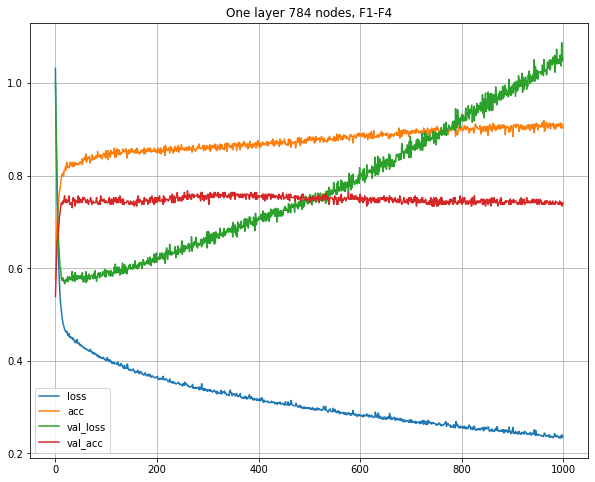

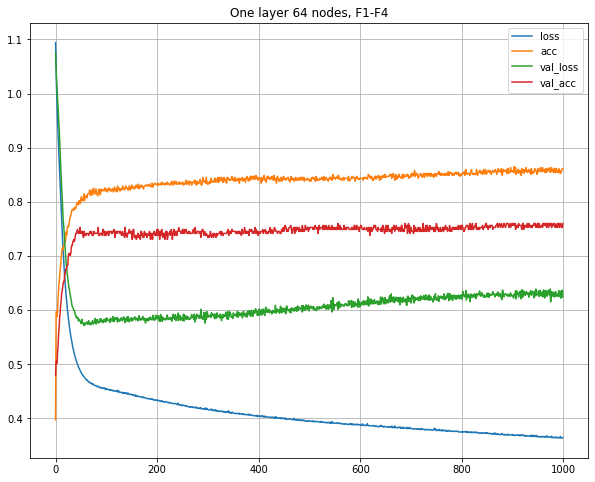

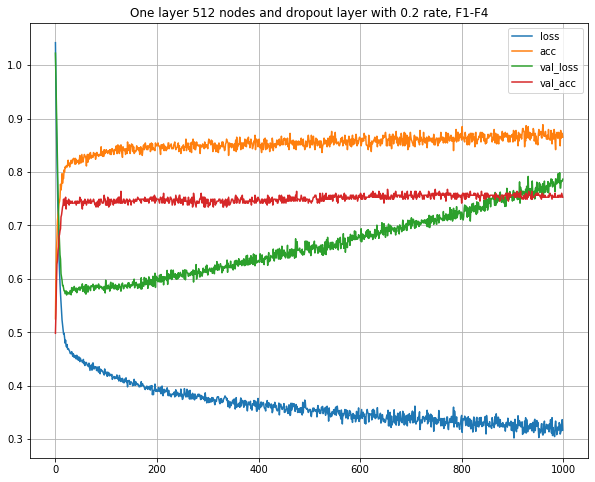

In [33]:
# Visualize the training results
plt.figure(figsize=(10,8))
plt.title('One layer 784 nodes, F1-F4')
plt.plot(history1.history['loss'],label='loss')
plt.plot(history1.history['accuracy'],label='acc')
plt.plot(history1.history['val_loss'],label='val_loss')
plt.plot(history1.history['val_accuracy'],label='val_acc')
plt.grid()
plt.legend()
plt.show()

# Visualize the training results
plt.figure(figsize=(10,8))
plt.title('One layer 64 nodes, F1-F4')
plt.plot(history2.history['loss'],label='loss')
plt.plot(history2.history['accuracy'],label='acc')
plt.plot(history2.history['val_loss'],label='val_loss')
plt.plot(history2.history['val_accuracy'],label='val_acc')
plt.grid()
plt.legend()
plt.show()

# Visualize the training results
plt.figure(figsize=(10,8))
plt.title('One layer 512 nodes and dropout layer with 0.2 rate, F1-F4')
plt.plot(history3.history['loss'],label='loss')
plt.plot(history3.history['accuracy'],label='acc')
plt.plot(history3.history['val_loss'],label='val_loss')
plt.plot(history3.history['val_accuracy'],label='val_acc')
plt.grid()
plt.legend()
plt.show()

In [34]:
# Validation model
print('--------model 1, One layer 784 nodes-----------')
score = model1.evaluate(x_valid, y_valid, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])
print('-----------------------------------------------')

# Validation model
print('--------model 2, One layer 64 nodes-----------')
score = model2.evaluate(x_valid, y_valid, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])
print('-----------------------------------------------')
# Validation model
print('--------model 3, One layer 512 nodes and dropout(0.2)-----------')
score = model3.evaluate(x_valid, y_valid, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])
print('-----------------------------------------------')

--------model 1, One layer 784 nodes-----------
Validation loss: 1.0533971786499023
Validation accuracy: 0.7416974306106567
-----------------------------------------------
--------model 2, One layer 64 nodes-----------
Validation loss: 0.6242607235908508
Validation accuracy: 0.7601476311683655
-----------------------------------------------
--------model 3, One layer 512 nodes and dropout(0.2)-----------
Validation loss: 0.7865042090415955
Validation accuracy: 0.7527675032615662
-----------------------------------------------


In [35]:
# Features to use
features = ["F1","F2","F3","F4","B1","B2","B3","B4"]

# Extract features
x_train_raw = train[features]
x_valid_raw = valid[features]

# Normalize to zero mean
x_mean = np.mean(x_train_raw)
x_std = np.std(x_train_raw)
x_train = x_train_raw - x_mean
x_valid = x_valid_raw - x_mean

# Fix labels. The "to_categorical" call maps integer labels {n}
# to a vector of length N (number of labels) with a one in position n
y_train = keras.utils.to_categorical(trainlabels, len(phonemes))
y_valid = keras.utils.to_categorical(validlabels, len(phonemes))

In [36]:
# Create a model with a single hidden layer
model1 = keras.Sequential([
    keras.layers.Dense(28*28, activation=tf.nn.relu, input_dim=x_train.shape[1]),
    keras.layers.Dense(len(phonemes), activation=tf.nn.softmax)
])
model1.summary()

# Train the model
model1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history1 = model1.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                    epochs=1000, batch_size=32, verbose=True)

# Create a model with a single hidden layer
model2 = keras.Sequential([
    keras.layers.Dense(64, activation=tf.nn.relu, input_dim=x_train.shape[1]),
    keras.layers.Dense(len(phonemes), activation=tf.nn.softmax)
])
model2.summary()

# Train the model
model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history2 = model2.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                    epochs=1000, batch_size=32, verbose=True)

# Create a model with a single hidden layer
model3 = keras.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_dim=x_train.shape[1]),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(len(phonemes), activation=tf.nn.softmax)
])
model3.summary()

# Train the model
model3.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history3 = model3.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                    epochs=1000, batch_size=32, verbose=True)

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 784)               7056      
_________________________________________________________________
dense_25 (Dense)             (None, 3)                 2355      
Total params: 9,411
Trainable params: 9,411
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
18/18 [==============================] - 0s 4ms/step - loss: 1.0370 - accuracy: 0.5719 - val_loss: 1.0057 - val_accuracy: 0.5461
Epoch 2/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.9226 - accuracy: 0.6367 - val_loss: 0.9429 - val_accuracy: 0.5683
Epoch 3/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.8399 - accuracy: 0.6888 - val_loss: 0.8671 - val_accuracy: 0.6347
Epoch 4/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.7667 - accu

18/18 [==============================] - 0s 1ms/step - loss: 0.3967 - accuracy: 0.8507 - val_loss: 0.5816 - val_accuracy: 0.7380
Epoch 55/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3958 - accuracy: 0.8525 - val_loss: 0.5913 - val_accuracy: 0.7417
Epoch 56/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3979 - accuracy: 0.8489 - val_loss: 0.5759 - val_accuracy: 0.7454
Epoch 57/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3968 - accuracy: 0.8435 - val_loss: 0.5810 - val_accuracy: 0.7417
Epoch 58/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3930 - accuracy: 0.8525 - val_loss: 0.5727 - val_accuracy: 0.7565
Epoch 59/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3914 - accuracy: 0.8489 - val_loss: 0.5902 - val_accuracy: 0.7343
Epoch 60/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3915 - accuracy: 0.8489 - val_loss: 0.5776 - val_accuracy: 0.7417
Epoch 61/1000

18/18 [==============================] - 0s 1ms/step - loss: 0.3435 - accuracy: 0.8525 - val_loss: 0.5911 - val_accuracy: 0.7454
Epoch 112/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3370 - accuracy: 0.8651 - val_loss: 0.6025 - val_accuracy: 0.7454
Epoch 113/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3353 - accuracy: 0.8579 - val_loss: 0.6109 - val_accuracy: 0.7417
Epoch 114/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3339 - accuracy: 0.8543 - val_loss: 0.6145 - val_accuracy: 0.7343
Epoch 115/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3334 - accuracy: 0.8597 - val_loss: 0.6067 - val_accuracy: 0.7454
Epoch 116/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3320 - accuracy: 0.8633 - val_loss: 0.6076 - val_accuracy: 0.7454
Epoch 117/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3303 - accuracy: 0.8633 - val_loss: 0.6079 - val_accuracy: 0.7417
Epoch 1

Epoch 168/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2930 - accuracy: 0.8759 - val_loss: 0.6439 - val_accuracy: 0.7601
Epoch 169/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2954 - accuracy: 0.8669 - val_loss: 0.6455 - val_accuracy: 0.7601
Epoch 170/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2965 - accuracy: 0.8795 - val_loss: 0.6584 - val_accuracy: 0.7601
Epoch 171/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2934 - accuracy: 0.8795 - val_loss: 0.6485 - val_accuracy: 0.7565
Epoch 172/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2902 - accuracy: 0.8777 - val_loss: 0.6474 - val_accuracy: 0.7528
Epoch 173/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2910 - accuracy: 0.8849 - val_loss: 0.6522 - val_accuracy: 0.7675
Epoch 174/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2898 - accuracy: 0.8759 - val_loss: 0.6558 - val_accuracy:

Epoch 225/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2604 - accuracy: 0.8921 - val_loss: 0.7005 - val_accuracy: 0.7601
Epoch 226/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2581 - accuracy: 0.8921 - val_loss: 0.7008 - val_accuracy: 0.7601
Epoch 227/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2596 - accuracy: 0.8921 - val_loss: 0.7063 - val_accuracy: 0.7565
Epoch 228/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2580 - accuracy: 0.8885 - val_loss: 0.7028 - val_accuracy: 0.7491
Epoch 229/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2555 - accuracy: 0.8939 - val_loss: 0.7113 - val_accuracy: 0.7528
Epoch 230/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2582 - accuracy: 0.8993 - val_loss: 0.7094 - val_accuracy: 0.7528
Epoch 231/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2569 - accuracy: 0.8939 - val_loss: 0.7090 - val_accuracy:

Epoch 282/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2291 - accuracy: 0.8975 - val_loss: 0.7684 - val_accuracy: 0.7306
Epoch 283/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2281 - accuracy: 0.9101 - val_loss: 0.7680 - val_accuracy: 0.7380
Epoch 284/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2277 - accuracy: 0.9083 - val_loss: 0.7609 - val_accuracy: 0.7454
Epoch 285/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2295 - accuracy: 0.9047 - val_loss: 0.7597 - val_accuracy: 0.7417
Epoch 286/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2283 - accuracy: 0.9029 - val_loss: 0.7737 - val_accuracy: 0.7417
Epoch 287/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2303 - accuracy: 0.8975 - val_loss: 0.7618 - val_accuracy: 0.7380
Epoch 288/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2259 - accuracy: 0.9047 - val_loss: 0.7638 - val_accuracy:

Epoch 339/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2097 - accuracy: 0.9173 - val_loss: 0.8312 - val_accuracy: 0.7380
Epoch 340/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2071 - accuracy: 0.9191 - val_loss: 0.8263 - val_accuracy: 0.7343
Epoch 341/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2044 - accuracy: 0.9083 - val_loss: 0.8288 - val_accuracy: 0.7417
Epoch 342/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2045 - accuracy: 0.9173 - val_loss: 0.8226 - val_accuracy: 0.7380
Epoch 343/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2084 - accuracy: 0.9137 - val_loss: 0.8174 - val_accuracy: 0.7417
Epoch 344/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2019 - accuracy: 0.9173 - val_loss: 0.8293 - val_accuracy: 0.7454
Epoch 345/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2019 - accuracy: 0.9191 - val_loss: 0.8208 - val_accuracy:

Epoch 396/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1811 - accuracy: 0.9281 - val_loss: 0.8794 - val_accuracy: 0.7343
Epoch 397/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1822 - accuracy: 0.9335 - val_loss: 0.8918 - val_accuracy: 0.7343
Epoch 398/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1839 - accuracy: 0.9299 - val_loss: 0.8982 - val_accuracy: 0.7343
Epoch 399/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1799 - accuracy: 0.9281 - val_loss: 0.8860 - val_accuracy: 0.7417
Epoch 400/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1814 - accuracy: 0.9245 - val_loss: 0.8795 - val_accuracy: 0.7306
Epoch 401/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1805 - accuracy: 0.9335 - val_loss: 0.8927 - val_accuracy: 0.7380
Epoch 402/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1790 - accuracy: 0.9353 - val_loss: 0.8841 - val_accuracy:

Epoch 453/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1664 - accuracy: 0.9299 - val_loss: 0.9301 - val_accuracy: 0.7417
Epoch 454/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1611 - accuracy: 0.9442 - val_loss: 0.9599 - val_accuracy: 0.7232
Epoch 455/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1613 - accuracy: 0.9442 - val_loss: 0.9485 - val_accuracy: 0.7454
Epoch 456/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1591 - accuracy: 0.9406 - val_loss: 0.9497 - val_accuracy: 0.7269
Epoch 457/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1586 - accuracy: 0.9424 - val_loss: 0.9442 - val_accuracy: 0.7380
Epoch 458/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1587 - accuracy: 0.9406 - val_loss: 0.9433 - val_accuracy: 0.7269
Epoch 459/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1624 - accuracy: 0.9406 - val_loss: 0.9416 - val_accuracy:

Epoch 510/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1442 - accuracy: 0.9514 - val_loss: 1.0219 - val_accuracy: 0.7232
Epoch 511/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1418 - accuracy: 0.9514 - val_loss: 1.0005 - val_accuracy: 0.7417
Epoch 512/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1414 - accuracy: 0.9478 - val_loss: 1.0159 - val_accuracy: 0.7196
Epoch 513/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1440 - accuracy: 0.9424 - val_loss: 1.0140 - val_accuracy: 0.7343
Epoch 514/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1467 - accuracy: 0.9442 - val_loss: 0.9975 - val_accuracy: 0.7454
Epoch 515/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1405 - accuracy: 0.9568 - val_loss: 1.0189 - val_accuracy: 0.7232
Epoch 516/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1395 - accuracy: 0.9460 - val_loss: 1.0126 - val_accuracy:

Epoch 567/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1282 - accuracy: 0.9586 - val_loss: 1.0600 - val_accuracy: 0.7343
Epoch 568/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1260 - accuracy: 0.9640 - val_loss: 1.0684 - val_accuracy: 0.7196
Epoch 569/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1236 - accuracy: 0.9658 - val_loss: 1.0894 - val_accuracy: 0.7159
Epoch 570/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1261 - accuracy: 0.9586 - val_loss: 1.0733 - val_accuracy: 0.7269
Epoch 571/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1248 - accuracy: 0.9568 - val_loss: 1.0928 - val_accuracy: 0.7159
Epoch 572/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1251 - accuracy: 0.9550 - val_loss: 1.0760 - val_accuracy: 0.7306
Epoch 573/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1224 - accuracy: 0.9622 - val_loss: 1.0898 - val_accuracy:

Epoch 624/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1084 - accuracy: 0.9676 - val_loss: 1.1350 - val_accuracy: 0.7196
Epoch 625/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1108 - accuracy: 0.9640 - val_loss: 1.1267 - val_accuracy: 0.7232
Epoch 626/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1117 - accuracy: 0.9658 - val_loss: 1.1452 - val_accuracy: 0.7122
Epoch 627/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1078 - accuracy: 0.9676 - val_loss: 1.1445 - val_accuracy: 0.7122
Epoch 628/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1094 - accuracy: 0.9676 - val_loss: 1.1430 - val_accuracy: 0.7159
Epoch 629/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1080 - accuracy: 0.9694 - val_loss: 1.1467 - val_accuracy: 0.7159
Epoch 630/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1080 - accuracy: 0.9694 - val_loss: 1.1474 - val_accuracy:

Epoch 681/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.0980 - accuracy: 0.9676 - val_loss: 1.2337 - val_accuracy: 0.7196
Epoch 682/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1016 - accuracy: 0.9658 - val_loss: 1.1810 - val_accuracy: 0.7269
Epoch 683/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.0949 - accuracy: 0.9748 - val_loss: 1.2269 - val_accuracy: 0.7122
Epoch 684/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.0947 - accuracy: 0.9784 - val_loss: 1.1965 - val_accuracy: 0.7232
Epoch 685/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.0960 - accuracy: 0.9748 - val_loss: 1.2225 - val_accuracy: 0.7048
Epoch 686/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.0965 - accuracy: 0.9748 - val_loss: 1.2095 - val_accuracy: 0.7159
Epoch 687/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.0948 - accuracy: 0.9730 - val_loss: 1.2099 - val_accuracy:

Epoch 738/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.0810 - accuracy: 0.9856 - val_loss: 1.2742 - val_accuracy: 0.7159
Epoch 739/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.0809 - accuracy: 0.9838 - val_loss: 1.2731 - val_accuracy: 0.7085
Epoch 740/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.0848 - accuracy: 0.9802 - val_loss: 1.2672 - val_accuracy: 0.7196
Epoch 741/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.0884 - accuracy: 0.9874 - val_loss: 1.3214 - val_accuracy: 0.7011
Epoch 742/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.0861 - accuracy: 0.9820 - val_loss: 1.2786 - val_accuracy: 0.7232
Epoch 743/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.0828 - accuracy: 0.9820 - val_loss: 1.2722 - val_accuracy: 0.7085
Epoch 744/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.0832 - accuracy: 0.9838 - val_loss: 1.3099 - val_accuracy:

Epoch 795/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.0737 - accuracy: 0.9856 - val_loss: 1.3233 - val_accuracy: 0.7269
Epoch 796/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.0725 - accuracy: 0.9856 - val_loss: 1.3814 - val_accuracy: 0.7122
Epoch 797/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.0725 - accuracy: 0.9892 - val_loss: 1.3487 - val_accuracy: 0.7085
Epoch 798/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.0731 - accuracy: 0.9892 - val_loss: 1.3722 - val_accuracy: 0.7159
Epoch 799/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.0751 - accuracy: 0.9838 - val_loss: 1.3952 - val_accuracy: 0.7159
Epoch 800/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.0741 - accuracy: 0.9802 - val_loss: 1.3458 - val_accuracy: 0.7196
Epoch 801/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.0736 - accuracy: 0.9856 - val_loss: 1.3473 - val_accuracy:

Epoch 852/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.0616 - accuracy: 0.9928 - val_loss: 1.4266 - val_accuracy: 0.7159
Epoch 853/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.0624 - accuracy: 0.9928 - val_loss: 1.4325 - val_accuracy: 0.7122
Epoch 854/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.0610 - accuracy: 0.9964 - val_loss: 1.4554 - val_accuracy: 0.7196
Epoch 855/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.0601 - accuracy: 0.9928 - val_loss: 1.4287 - val_accuracy: 0.7122
Epoch 856/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.0608 - accuracy: 0.9892 - val_loss: 1.4454 - val_accuracy: 0.7159
Epoch 857/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.0602 - accuracy: 0.9982 - val_loss: 1.4483 - val_accuracy: 0.7085
Epoch 858/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.0635 - accuracy: 0.9928 - val_loss: 1.4547 - val_accuracy:

Epoch 909/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.0542 - accuracy: 0.9964 - val_loss: 1.5322 - val_accuracy: 0.7122
Epoch 910/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.0522 - accuracy: 0.9946 - val_loss: 1.4963 - val_accuracy: 0.7159
Epoch 911/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.0522 - accuracy: 1.0000 - val_loss: 1.5557 - val_accuracy: 0.7122
Epoch 912/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.0555 - accuracy: 0.9910 - val_loss: 1.5349 - val_accuracy: 0.7122
Epoch 913/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.0559 - accuracy: 0.9928 - val_loss: 1.5072 - val_accuracy: 0.7122
Epoch 914/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.0509 - accuracy: 0.9982 - val_loss: 1.5390 - val_accuracy: 0.7122
Epoch 915/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.0503 - accuracy: 0.9964 - val_loss: 1.5103 - val_accuracy:

Epoch 966/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.0465 - accuracy: 0.9982 - val_loss: 1.5793 - val_accuracy: 0.7122
Epoch 967/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.0435 - accuracy: 1.0000 - val_loss: 1.6141 - val_accuracy: 0.7048
Epoch 968/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.0430 - accuracy: 0.9982 - val_loss: 1.5908 - val_accuracy: 0.7122
Epoch 969/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.0440 - accuracy: 0.9964 - val_loss: 1.6392 - val_accuracy: 0.7122
Epoch 970/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.0442 - accuracy: 0.9964 - val_loss: 1.5777 - val_accuracy: 0.7122
Epoch 971/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.0492 - accuracy: 0.9946 - val_loss: 1.6628 - val_accuracy: 0.7196
Epoch 972/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.0446 - accuracy: 0.9964 - val_loss: 1.6105 - val_accuracy:

Epoch 19/1000
18/18 [==============================] - 0s 942us/step - loss: 0.6494 - accuracy: 0.7428 - val_loss: 0.7150 - val_accuracy: 0.6753
Epoch 20/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.6353 - accuracy: 0.7428 - val_loss: 0.6994 - val_accuracy: 0.6753
Epoch 21/1000
18/18 [==============================] - 0s 942us/step - loss: 0.6228 - accuracy: 0.7572 - val_loss: 0.6911 - val_accuracy: 0.6827
Epoch 22/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.6110 - accuracy: 0.7590 - val_loss: 0.6782 - val_accuracy: 0.6863
Epoch 23/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.5996 - accuracy: 0.7644 - val_loss: 0.6699 - val_accuracy: 0.6974
Epoch 24/1000
18/18 [==============================] - 0s 942us/step - loss: 0.5900 - accuracy: 0.7752 - val_loss: 0.6626 - val_accuracy: 0.6974
Epoch 25/1000
18/18 [==============================] - 0s 990us/step - loss: 0.5795 - accuracy: 0.7698 - val_loss: 0.6522 - val_accuracy

18/18 [==============================] - 0s 1ms/step - loss: 0.4456 - accuracy: 0.8273 - val_loss: 0.5896 - val_accuracy: 0.7417
Epoch 77/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4449 - accuracy: 0.8345 - val_loss: 0.5881 - val_accuracy: 0.7454
Epoch 78/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4445 - accuracy: 0.8327 - val_loss: 0.5841 - val_accuracy: 0.7528
Epoch 79/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4444 - accuracy: 0.8327 - val_loss: 0.5875 - val_accuracy: 0.7417
Epoch 80/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4431 - accuracy: 0.8363 - val_loss: 0.5876 - val_accuracy: 0.7491
Epoch 81/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4430 - accuracy: 0.8309 - val_loss: 0.5903 - val_accuracy: 0.7565
Epoch 82/1000
18/18 [==============================] - 0s 942us/step - loss: 0.4423 - accuracy: 0.8291 - val_loss: 0.5850 - val_accuracy: 0.7565
Epoch 83/10

Epoch 133/1000
18/18 [==============================] - 0s 942us/step - loss: 0.4234 - accuracy: 0.8435 - val_loss: 0.5903 - val_accuracy: 0.7343
Epoch 134/1000
18/18 [==============================] - 0s 942us/step - loss: 0.4241 - accuracy: 0.8417 - val_loss: 0.5885 - val_accuracy: 0.7417
Epoch 135/1000
18/18 [==============================] - 0s 942us/step - loss: 0.4245 - accuracy: 0.8399 - val_loss: 0.5883 - val_accuracy: 0.7454
Epoch 136/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4229 - accuracy: 0.8399 - val_loss: 0.5920 - val_accuracy: 0.7343
Epoch 137/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4222 - accuracy: 0.8435 - val_loss: 0.5896 - val_accuracy: 0.7417
Epoch 138/1000
18/18 [==============================] - 0s 942us/step - loss: 0.4222 - accuracy: 0.8435 - val_loss: 0.5858 - val_accuracy: 0.7343
Epoch 139/1000
18/18 [==============================] - 0s 942us/step - loss: 0.4215 - accuracy: 0.8435 - val_loss: 0.5841 - val

Epoch 190/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4061 - accuracy: 0.8471 - val_loss: 0.5845 - val_accuracy: 0.7528
Epoch 191/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4055 - accuracy: 0.8471 - val_loss: 0.5898 - val_accuracy: 0.7417
Epoch 192/1000
18/18 [==============================] - 0s 978us/step - loss: 0.4060 - accuracy: 0.8453 - val_loss: 0.5879 - val_accuracy: 0.7491
Epoch 193/1000
18/18 [==============================] - 0s 942us/step - loss: 0.4062 - accuracy: 0.8435 - val_loss: 0.5855 - val_accuracy: 0.7454
Epoch 194/1000
18/18 [==============================] - 0s 942us/step - loss: 0.4047 - accuracy: 0.8453 - val_loss: 0.5863 - val_accuracy: 0.7454
Epoch 195/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4053 - accuracy: 0.8435 - val_loss: 0.5830 - val_accuracy: 0.7454
Epoch 196/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4047 - accuracy: 0.8471 - val_loss: 0.5905 - val_acc

Epoch 247/1000
18/18 [==============================] - 0s 942us/step - loss: 0.3912 - accuracy: 0.8507 - val_loss: 0.5843 - val_accuracy: 0.7491
Epoch 248/1000
18/18 [==============================] - 0s 942us/step - loss: 0.3904 - accuracy: 0.8507 - val_loss: 0.5906 - val_accuracy: 0.7454
Epoch 249/1000
18/18 [==============================] - 0s 942us/step - loss: 0.3889 - accuracy: 0.8471 - val_loss: 0.5805 - val_accuracy: 0.7491
Epoch 250/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3898 - accuracy: 0.8471 - val_loss: 0.5812 - val_accuracy: 0.7454
Epoch 251/1000
18/18 [==============================] - 0s 942us/step - loss: 0.3897 - accuracy: 0.8507 - val_loss: 0.5913 - val_accuracy: 0.7454
Epoch 252/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3885 - accuracy: 0.8525 - val_loss: 0.5868 - val_accuracy: 0.7491
Epoch 253/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3889 - accuracy: 0.8561 - val_loss: 0.5809 - val_a

18/18 [==============================] - 0s 1ms/step - loss: 0.3745 - accuracy: 0.8633 - val_loss: 0.5854 - val_accuracy: 0.7491
Epoch 304/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3764 - accuracy: 0.8579 - val_loss: 0.5951 - val_accuracy: 0.7454
Epoch 305/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3743 - accuracy: 0.8579 - val_loss: 0.5886 - val_accuracy: 0.7565
Epoch 306/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3736 - accuracy: 0.8579 - val_loss: 0.5924 - val_accuracy: 0.7491
Epoch 307/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3743 - accuracy: 0.8561 - val_loss: 0.5958 - val_accuracy: 0.7454
Epoch 308/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3753 - accuracy: 0.8561 - val_loss: 0.5892 - val_accuracy: 0.7528
Epoch 309/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3730 - accuracy: 0.8579 - val_loss: 0.5937 - val_accuracy: 0.7491
Epoch 3

Epoch 360/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3603 - accuracy: 0.8597 - val_loss: 0.5997 - val_accuracy: 0.7565
Epoch 361/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3602 - accuracy: 0.8615 - val_loss: 0.6008 - val_accuracy: 0.7491
Epoch 362/1000
18/18 [==============================] - 0s 942us/step - loss: 0.3604 - accuracy: 0.8615 - val_loss: 0.5993 - val_accuracy: 0.7454
Epoch 363/1000
18/18 [==============================] - 0s 942us/step - loss: 0.3596 - accuracy: 0.8615 - val_loss: 0.6058 - val_accuracy: 0.7491
Epoch 364/1000
18/18 [==============================] - 0s 942us/step - loss: 0.3605 - accuracy: 0.8579 - val_loss: 0.5973 - val_accuracy: 0.7491
Epoch 365/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3587 - accuracy: 0.8597 - val_loss: 0.6010 - val_accuracy: 0.7528
Epoch 366/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3587 - accuracy: 0.8615 - val_loss: 0.6027 - val_acc

18/18 [==============================] - 0s 1ms/step - loss: 0.3474 - accuracy: 0.8615 - val_loss: 0.6098 - val_accuracy: 0.7528
Epoch 417/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3476 - accuracy: 0.8615 - val_loss: 0.6093 - val_accuracy: 0.7491
Epoch 418/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3466 - accuracy: 0.8651 - val_loss: 0.6090 - val_accuracy: 0.7528
Epoch 419/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3467 - accuracy: 0.8651 - val_loss: 0.6126 - val_accuracy: 0.7491
Epoch 420/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3472 - accuracy: 0.8633 - val_loss: 0.6122 - val_accuracy: 0.7491
Epoch 421/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3474 - accuracy: 0.8615 - val_loss: 0.6137 - val_accuracy: 0.7491
Epoch 422/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3458 - accuracy: 0.8633 - val_loss: 0.6117 - val_accuracy: 0.7454
Epoch 4

18/18 [==============================] - 0s 942us/step - loss: 0.3357 - accuracy: 0.8723 - val_loss: 0.6225 - val_accuracy: 0.7417
Epoch 473/1000
18/18 [==============================] - 0s 942us/step - loss: 0.3358 - accuracy: 0.8723 - val_loss: 0.6258 - val_accuracy: 0.7417
Epoch 474/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3349 - accuracy: 0.8723 - val_loss: 0.6217 - val_accuracy: 0.7454
Epoch 475/1000
18/18 [==============================] - 0s 942us/step - loss: 0.3357 - accuracy: 0.8669 - val_loss: 0.6198 - val_accuracy: 0.7565
Epoch 476/1000
18/18 [==============================] - 0s 942us/step - loss: 0.3351 - accuracy: 0.8723 - val_loss: 0.6259 - val_accuracy: 0.7380
Epoch 477/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3350 - accuracy: 0.8687 - val_loss: 0.6179 - val_accuracy: 0.7454
Epoch 478/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3357 - accuracy: 0.8669 - val_loss: 0.6303 - val_accuracy: 0.7491

Epoch 529/1000
18/18 [==============================] - 0s 942us/step - loss: 0.3257 - accuracy: 0.8741 - val_loss: 0.6387 - val_accuracy: 0.7417
Epoch 530/1000
18/18 [==============================] - 0s 942us/step - loss: 0.3249 - accuracy: 0.8759 - val_loss: 0.6416 - val_accuracy: 0.7417
Epoch 531/1000
18/18 [==============================] - 0s 942us/step - loss: 0.3252 - accuracy: 0.8777 - val_loss: 0.6334 - val_accuracy: 0.7454
Epoch 532/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3256 - accuracy: 0.8741 - val_loss: 0.6383 - val_accuracy: 0.7454
Epoch 533/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3247 - accuracy: 0.8741 - val_loss: 0.6375 - val_accuracy: 0.7491
Epoch 534/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3241 - accuracy: 0.8723 - val_loss: 0.6381 - val_accuracy: 0.7417
Epoch 535/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3237 - accuracy: 0.8777 - val_loss: 0.6372 - val_acc

18/18 [==============================] - 0s 1ms/step - loss: 0.3168 - accuracy: 0.8813 - val_loss: 0.6563 - val_accuracy: 0.7380
Epoch 586/1000
18/18 [==============================] - 0s 942us/step - loss: 0.3195 - accuracy: 0.8687 - val_loss: 0.6414 - val_accuracy: 0.7491
Epoch 587/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3152 - accuracy: 0.8777 - val_loss: 0.6548 - val_accuracy: 0.7454
Epoch 588/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3154 - accuracy: 0.8705 - val_loss: 0.6586 - val_accuracy: 0.7380
Epoch 589/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3183 - accuracy: 0.8723 - val_loss: 0.6461 - val_accuracy: 0.7417
Epoch 590/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3164 - accuracy: 0.8741 - val_loss: 0.6603 - val_accuracy: 0.7380
Epoch 591/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3149 - accuracy: 0.8759 - val_loss: 0.6522 - val_accuracy: 0.7454
Epoch

18/18 [==============================] - 0s 1ms/step - loss: 0.3067 - accuracy: 0.8777 - val_loss: 0.6617 - val_accuracy: 0.7528
Epoch 642/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3073 - accuracy: 0.8795 - val_loss: 0.6613 - val_accuracy: 0.7528
Epoch 643/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3068 - accuracy: 0.8759 - val_loss: 0.6623 - val_accuracy: 0.7491
Epoch 644/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3065 - accuracy: 0.8813 - val_loss: 0.6712 - val_accuracy: 0.7417
Epoch 645/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3075 - accuracy: 0.8759 - val_loss: 0.6569 - val_accuracy: 0.7454
Epoch 646/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3066 - accuracy: 0.8777 - val_loss: 0.6635 - val_accuracy: 0.7454
Epoch 647/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3068 - accuracy: 0.8795 - val_loss: 0.6739 - val_accuracy: 0.7454
Epoch 6

Epoch 698/1000
18/18 [==============================] - 0s 942us/step - loss: 0.2993 - accuracy: 0.8777 - val_loss: 0.6764 - val_accuracy: 0.7380
Epoch 699/1000
18/18 [==============================] - 0s 942us/step - loss: 0.2995 - accuracy: 0.8795 - val_loss: 0.6841 - val_accuracy: 0.7454
Epoch 700/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2984 - accuracy: 0.8741 - val_loss: 0.6751 - val_accuracy: 0.7343
Epoch 701/1000
18/18 [==============================] - 0s 942us/step - loss: 0.2984 - accuracy: 0.8795 - val_loss: 0.6757 - val_accuracy: 0.7380
Epoch 702/1000
18/18 [==============================] - 0s 942us/step - loss: 0.2995 - accuracy: 0.8777 - val_loss: 0.6759 - val_accuracy: 0.7417
Epoch 703/1000
18/18 [==============================] - 0s 942us/step - loss: 0.2981 - accuracy: 0.8777 - val_loss: 0.6778 - val_accuracy: 0.7380
Epoch 704/1000
18/18 [==============================] - 0s 942us/step - loss: 0.2995 - accuracy: 0.8759 - val_loss: 0.6757 - v

18/18 [==============================] - 0s 1ms/step - loss: 0.2920 - accuracy: 0.8795 - val_loss: 0.6908 - val_accuracy: 0.7380
Epoch 755/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2906 - accuracy: 0.8795 - val_loss: 0.6910 - val_accuracy: 0.7343
Epoch 756/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2913 - accuracy: 0.8831 - val_loss: 0.6898 - val_accuracy: 0.7343
Epoch 757/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2920 - accuracy: 0.8759 - val_loss: 0.7051 - val_accuracy: 0.7343
Epoch 758/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2911 - accuracy: 0.8759 - val_loss: 0.6878 - val_accuracy: 0.7306
Epoch 759/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2902 - accuracy: 0.8795 - val_loss: 0.6911 - val_accuracy: 0.7306
Epoch 760/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2918 - accuracy: 0.8777 - val_loss: 0.6898 - val_accuracy: 0.7306
Epoch 7

Epoch 811/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2851 - accuracy: 0.8795 - val_loss: 0.6956 - val_accuracy: 0.7417
Epoch 812/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2836 - accuracy: 0.8813 - val_loss: 0.7061 - val_accuracy: 0.7343
Epoch 813/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2837 - accuracy: 0.8831 - val_loss: 0.7029 - val_accuracy: 0.7306
Epoch 814/1000
18/18 [==============================] - 0s 942us/step - loss: 0.2838 - accuracy: 0.8813 - val_loss: 0.6969 - val_accuracy: 0.7417
Epoch 815/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2831 - accuracy: 0.8777 - val_loss: 0.7081 - val_accuracy: 0.7306
Epoch 816/1000
18/18 [==============================] - 0s 942us/step - loss: 0.2837 - accuracy: 0.8795 - val_loss: 0.7045 - val_accuracy: 0.7306
Epoch 817/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2844 - accuracy: 0.8777 - val_loss: 0.6953 - val_accur

18/18 [==============================] - 0s 1ms/step - loss: 0.2777 - accuracy: 0.8849 - val_loss: 0.7148 - val_accuracy: 0.7380
Epoch 868/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2779 - accuracy: 0.8813 - val_loss: 0.7150 - val_accuracy: 0.7380
Epoch 869/1000
18/18 [==============================] - 0s 942us/step - loss: 0.2775 - accuracy: 0.8849 - val_loss: 0.7161 - val_accuracy: 0.7380
Epoch 870/1000
18/18 [==============================] - 0s 942us/step - loss: 0.2780 - accuracy: 0.8867 - val_loss: 0.7187 - val_accuracy: 0.7417
Epoch 871/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2780 - accuracy: 0.8867 - val_loss: 0.7248 - val_accuracy: 0.7306
Epoch 872/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2770 - accuracy: 0.8903 - val_loss: 0.7221 - val_accuracy: 0.7380
Epoch 873/1000
18/18 [==============================] - 0s 942us/step - loss: 0.2759 - accuracy: 0.8813 - val_loss: 0.7118 - val_accuracy: 0.7454
E

Epoch 924/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2716 - accuracy: 0.8849 - val_loss: 0.7383 - val_accuracy: 0.7417
Epoch 925/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2706 - accuracy: 0.8795 - val_loss: 0.7279 - val_accuracy: 0.7454
Epoch 926/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2698 - accuracy: 0.8831 - val_loss: 0.7304 - val_accuracy: 0.7417
Epoch 927/1000
18/18 [==============================] - 0s 942us/step - loss: 0.2701 - accuracy: 0.8813 - val_loss: 0.7304 - val_accuracy: 0.7380
Epoch 928/1000
18/18 [==============================] - 0s 942us/step - loss: 0.2713 - accuracy: 0.8813 - val_loss: 0.7270 - val_accuracy: 0.7454
Epoch 929/1000
18/18 [==============================] - 0s 942us/step - loss: 0.2699 - accuracy: 0.8849 - val_loss: 0.7367 - val_accuracy: 0.7343
Epoch 930/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2701 - accuracy: 0.8849 - val_loss: 0.7338 - val_acc

18/18 [==============================] - 0s 1ms/step - loss: 0.2654 - accuracy: 0.8813 - val_loss: 0.7512 - val_accuracy: 0.7417
Epoch 981/1000
18/18 [==============================] - 0s 942us/step - loss: 0.2648 - accuracy: 0.8813 - val_loss: 0.7442 - val_accuracy: 0.7417
Epoch 982/1000
18/18 [==============================] - 0s 942us/step - loss: 0.2638 - accuracy: 0.8849 - val_loss: 0.7422 - val_accuracy: 0.7380
Epoch 983/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2635 - accuracy: 0.8849 - val_loss: 0.7457 - val_accuracy: 0.7343
Epoch 984/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2647 - accuracy: 0.8867 - val_loss: 0.7463 - val_accuracy: 0.7269
Epoch 985/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2636 - accuracy: 0.8849 - val_loss: 0.7443 - val_accuracy: 0.7343
Epoch 986/1000
18/18 [==============================] - 0s 933us/step - loss: 0.2640 - accuracy: 0.8831 - val_loss: 0.7486 - val_accuracy: 0.7306
E

Epoch 32/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4411 - accuracy: 0.8399 - val_loss: 0.5846 - val_accuracy: 0.7491
Epoch 33/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4380 - accuracy: 0.8381 - val_loss: 0.5889 - val_accuracy: 0.7454
Epoch 34/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4430 - accuracy: 0.8309 - val_loss: 0.5920 - val_accuracy: 0.7343
Epoch 35/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4368 - accuracy: 0.8309 - val_loss: 0.5947 - val_accuracy: 0.7380
Epoch 36/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4333 - accuracy: 0.8327 - val_loss: 0.5939 - val_accuracy: 0.7454
Epoch 37/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4351 - accuracy: 0.8273 - val_loss: 0.5913 - val_accuracy: 0.7417
Epoch 38/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4318 - accuracy: 0.8435 - val_loss: 0.5895 - val_accuracy: 0.7306

18/18 [==============================] - 0s 1ms/step - loss: 0.3821 - accuracy: 0.8615 - val_loss: 0.5867 - val_accuracy: 0.7380
Epoch 90/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3885 - accuracy: 0.8525 - val_loss: 0.5911 - val_accuracy: 0.7380
Epoch 91/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3822 - accuracy: 0.8489 - val_loss: 0.5950 - val_accuracy: 0.7306
Epoch 92/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3867 - accuracy: 0.8489 - val_loss: 0.5852 - val_accuracy: 0.7454
Epoch 93/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3865 - accuracy: 0.8453 - val_loss: 0.5894 - val_accuracy: 0.7417
Epoch 94/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3772 - accuracy: 0.8525 - val_loss: 0.5890 - val_accuracy: 0.7454
Epoch 95/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3806 - accuracy: 0.8525 - val_loss: 0.5879 - val_accuracy: 0.7380
Epoch 96/1000

18/18 [==============================] - 0s 1ms/step - loss: 0.3506 - accuracy: 0.8597 - val_loss: 0.6025 - val_accuracy: 0.7491
Epoch 147/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3386 - accuracy: 0.8633 - val_loss: 0.6080 - val_accuracy: 0.7417
Epoch 148/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3535 - accuracy: 0.8615 - val_loss: 0.6104 - val_accuracy: 0.7454
Epoch 149/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3438 - accuracy: 0.8669 - val_loss: 0.6092 - val_accuracy: 0.7417
Epoch 150/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3507 - accuracy: 0.8615 - val_loss: 0.6021 - val_accuracy: 0.7454
Epoch 151/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3444 - accuracy: 0.8669 - val_loss: 0.6005 - val_accuracy: 0.7491
Epoch 152/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3577 - accuracy: 0.8471 - val_loss: 0.6128 - val_accuracy: 0.7417
Epoch 1

Epoch 203/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3292 - accuracy: 0.8651 - val_loss: 0.6366 - val_accuracy: 0.7565
Epoch 204/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3162 - accuracy: 0.8705 - val_loss: 0.6369 - val_accuracy: 0.7528
Epoch 205/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3137 - accuracy: 0.8687 - val_loss: 0.6357 - val_accuracy: 0.7528
Epoch 206/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3190 - accuracy: 0.8651 - val_loss: 0.6439 - val_accuracy: 0.7491
Epoch 207/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3190 - accuracy: 0.8723 - val_loss: 0.6422 - val_accuracy: 0.7565
Epoch 208/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3185 - accuracy: 0.8741 - val_loss: 0.6365 - val_accuracy: 0.7565
Epoch 209/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3266 - accuracy: 0.8669 - val_loss: 0.6425 - val_accuracy:

Epoch 260/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2875 - accuracy: 0.8723 - val_loss: 0.6773 - val_accuracy: 0.7454
Epoch 261/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2960 - accuracy: 0.8723 - val_loss: 0.6732 - val_accuracy: 0.7565
Epoch 262/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3013 - accuracy: 0.8813 - val_loss: 0.6686 - val_accuracy: 0.7491
Epoch 263/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3011 - accuracy: 0.8759 - val_loss: 0.6886 - val_accuracy: 0.7528
Epoch 264/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2987 - accuracy: 0.8867 - val_loss: 0.6812 - val_accuracy: 0.7528
Epoch 265/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3016 - accuracy: 0.8651 - val_loss: 0.6793 - val_accuracy: 0.7454
Epoch 266/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3020 - accuracy: 0.8759 - val_loss: 0.6817 - val_accuracy:

Epoch 317/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2752 - accuracy: 0.8759 - val_loss: 0.7184 - val_accuracy: 0.7491
Epoch 318/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2866 - accuracy: 0.8831 - val_loss: 0.7135 - val_accuracy: 0.7491
Epoch 319/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2807 - accuracy: 0.8939 - val_loss: 0.7168 - val_accuracy: 0.7491
Epoch 320/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2773 - accuracy: 0.8687 - val_loss: 0.7178 - val_accuracy: 0.7565
Epoch 321/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2881 - accuracy: 0.8903 - val_loss: 0.7179 - val_accuracy: 0.7565
Epoch 322/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2831 - accuracy: 0.8813 - val_loss: 0.7223 - val_accuracy: 0.7491
Epoch 323/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2707 - accuracy: 0.8867 - val_loss: 0.7168 - val_accuracy:

Epoch 374/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2648 - accuracy: 0.8903 - val_loss: 0.7419 - val_accuracy: 0.7565
Epoch 375/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2689 - accuracy: 0.8867 - val_loss: 0.7511 - val_accuracy: 0.7565
Epoch 376/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2631 - accuracy: 0.8831 - val_loss: 0.7584 - val_accuracy: 0.7417
Epoch 377/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2535 - accuracy: 0.8885 - val_loss: 0.7496 - val_accuracy: 0.7565
Epoch 378/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2651 - accuracy: 0.8993 - val_loss: 0.7462 - val_accuracy: 0.7565
Epoch 379/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2755 - accuracy: 0.8813 - val_loss: 0.7521 - val_accuracy: 0.7491
Epoch 380/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2531 - accuracy: 0.8921 - val_loss: 0.7622 - val_accuracy:

Epoch 431/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2505 - accuracy: 0.8957 - val_loss: 0.7799 - val_accuracy: 0.7601
Epoch 432/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2454 - accuracy: 0.9011 - val_loss: 0.7873 - val_accuracy: 0.7491
Epoch 433/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2537 - accuracy: 0.9065 - val_loss: 0.7940 - val_accuracy: 0.7454
Epoch 434/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2598 - accuracy: 0.8975 - val_loss: 0.7849 - val_accuracy: 0.7528
Epoch 435/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2588 - accuracy: 0.8849 - val_loss: 0.7896 - val_accuracy: 0.7565
Epoch 436/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2596 - accuracy: 0.8867 - val_loss: 0.7870 - val_accuracy: 0.7601
Epoch 437/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2485 - accuracy: 0.8957 - val_loss: 0.7919 - val_accuracy:

Epoch 488/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2380 - accuracy: 0.9029 - val_loss: 0.8317 - val_accuracy: 0.7380
Epoch 489/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2374 - accuracy: 0.9047 - val_loss: 0.8222 - val_accuracy: 0.7565
Epoch 490/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2305 - accuracy: 0.9083 - val_loss: 0.8350 - val_accuracy: 0.7454
Epoch 491/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2361 - accuracy: 0.9065 - val_loss: 0.8299 - val_accuracy: 0.7565
Epoch 492/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2305 - accuracy: 0.9029 - val_loss: 0.8267 - val_accuracy: 0.7565
Epoch 493/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2262 - accuracy: 0.9119 - val_loss: 0.8319 - val_accuracy: 0.7491
Epoch 494/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2387 - accuracy: 0.9101 - val_loss: 0.8415 - val_accuracy:

Epoch 545/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2366 - accuracy: 0.9065 - val_loss: 0.8706 - val_accuracy: 0.7454
Epoch 546/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2324 - accuracy: 0.8975 - val_loss: 0.8681 - val_accuracy: 0.7528
Epoch 547/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2313 - accuracy: 0.9047 - val_loss: 0.8745 - val_accuracy: 0.7454
Epoch 548/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2361 - accuracy: 0.9029 - val_loss: 0.8537 - val_accuracy: 0.7491
Epoch 549/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2144 - accuracy: 0.9191 - val_loss: 0.8511 - val_accuracy: 0.7528
Epoch 550/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2386 - accuracy: 0.9101 - val_loss: 0.8669 - val_accuracy: 0.7454
Epoch 551/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2268 - accuracy: 0.9191 - val_loss: 0.8811 - val_accuracy:

Epoch 602/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2309 - accuracy: 0.9155 - val_loss: 0.8813 - val_accuracy: 0.7528
Epoch 603/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2095 - accuracy: 0.9173 - val_loss: 0.9042 - val_accuracy: 0.7380
Epoch 604/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2087 - accuracy: 0.9173 - val_loss: 0.8847 - val_accuracy: 0.7565
Epoch 605/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2052 - accuracy: 0.9155 - val_loss: 0.9003 - val_accuracy: 0.7491
Epoch 606/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2129 - accuracy: 0.9209 - val_loss: 0.8985 - val_accuracy: 0.7417
Epoch 607/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2312 - accuracy: 0.9119 - val_loss: 0.9026 - val_accuracy: 0.7491
Epoch 608/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2087 - accuracy: 0.9137 - val_loss: 0.8992 - val_accuracy:

Epoch 659/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2040 - accuracy: 0.9245 - val_loss: 0.9338 - val_accuracy: 0.7454
Epoch 660/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2078 - accuracy: 0.9173 - val_loss: 0.9482 - val_accuracy: 0.7454
Epoch 661/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2025 - accuracy: 0.9155 - val_loss: 0.9405 - val_accuracy: 0.7380
Epoch 662/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2175 - accuracy: 0.9137 - val_loss: 0.9445 - val_accuracy: 0.7417
Epoch 663/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2070 - accuracy: 0.9101 - val_loss: 0.9440 - val_accuracy: 0.7417
Epoch 664/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2058 - accuracy: 0.9065 - val_loss: 0.9296 - val_accuracy: 0.7417
Epoch 665/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2119 - accuracy: 0.9047 - val_loss: 0.9436 - val_accuracy:

Epoch 716/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1910 - accuracy: 0.9227 - val_loss: 0.9691 - val_accuracy: 0.7380
Epoch 717/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1967 - accuracy: 0.9137 - val_loss: 0.9813 - val_accuracy: 0.7343
Epoch 718/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1948 - accuracy: 0.9137 - val_loss: 0.9911 - val_accuracy: 0.7343
Epoch 719/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2053 - accuracy: 0.9119 - val_loss: 0.9789 - val_accuracy: 0.7380
Epoch 720/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1825 - accuracy: 0.9299 - val_loss: 0.9837 - val_accuracy: 0.7269
Epoch 721/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2022 - accuracy: 0.9173 - val_loss: 0.9765 - val_accuracy: 0.7306
Epoch 722/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1749 - accuracy: 0.9353 - val_loss: 0.9962 - val_accuracy:

Epoch 773/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1806 - accuracy: 0.9371 - val_loss: 1.0112 - val_accuracy: 0.7380
Epoch 774/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2004 - accuracy: 0.9155 - val_loss: 1.0121 - val_accuracy: 0.7343
Epoch 775/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1903 - accuracy: 0.9299 - val_loss: 1.0174 - val_accuracy: 0.7306
Epoch 776/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1977 - accuracy: 0.9119 - val_loss: 1.0418 - val_accuracy: 0.7306
Epoch 777/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1852 - accuracy: 0.9299 - val_loss: 1.0313 - val_accuracy: 0.7343
Epoch 778/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1912 - accuracy: 0.9227 - val_loss: 1.0161 - val_accuracy: 0.7269
Epoch 779/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1841 - accuracy: 0.9299 - val_loss: 1.0356 - val_accuracy:

Epoch 830/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1668 - accuracy: 0.9406 - val_loss: 1.0566 - val_accuracy: 0.7343
Epoch 831/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1857 - accuracy: 0.9263 - val_loss: 1.0567 - val_accuracy: 0.7380
Epoch 832/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1848 - accuracy: 0.9335 - val_loss: 1.0506 - val_accuracy: 0.7306
Epoch 833/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1622 - accuracy: 0.9317 - val_loss: 1.0502 - val_accuracy: 0.7343
Epoch 834/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1886 - accuracy: 0.9191 - val_loss: 1.0685 - val_accuracy: 0.7380
Epoch 835/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1814 - accuracy: 0.9263 - val_loss: 1.0577 - val_accuracy: 0.7380
Epoch 836/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1748 - accuracy: 0.9299 - val_loss: 1.0567 - val_accuracy:

Epoch 887/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1726 - accuracy: 0.9335 - val_loss: 1.0939 - val_accuracy: 0.7306
Epoch 888/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1712 - accuracy: 0.9406 - val_loss: 1.0890 - val_accuracy: 0.7343
Epoch 889/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1831 - accuracy: 0.9371 - val_loss: 1.0965 - val_accuracy: 0.7306
Epoch 890/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1830 - accuracy: 0.9245 - val_loss: 1.0872 - val_accuracy: 0.7232
Epoch 891/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1593 - accuracy: 0.9371 - val_loss: 1.0957 - val_accuracy: 0.7343
Epoch 892/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1811 - accuracy: 0.9335 - val_loss: 1.0993 - val_accuracy: 0.7232
Epoch 893/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1637 - accuracy: 0.9335 - val_loss: 1.1027 - val_accuracy:

Epoch 944/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1744 - accuracy: 0.9335 - val_loss: 1.1536 - val_accuracy: 0.7269
Epoch 945/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1745 - accuracy: 0.9245 - val_loss: 1.1381 - val_accuracy: 0.7269
Epoch 946/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1653 - accuracy: 0.9406 - val_loss: 1.1294 - val_accuracy: 0.7232
Epoch 947/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1623 - accuracy: 0.9245 - val_loss: 1.1466 - val_accuracy: 0.7232
Epoch 948/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1507 - accuracy: 0.9478 - val_loss: 1.1449 - val_accuracy: 0.7269
Epoch 949/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1728 - accuracy: 0.9299 - val_loss: 1.1361 - val_accuracy: 0.7196
Epoch 950/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1697 - accuracy: 0.9281 - val_loss: 1.1894 - val_accuracy:

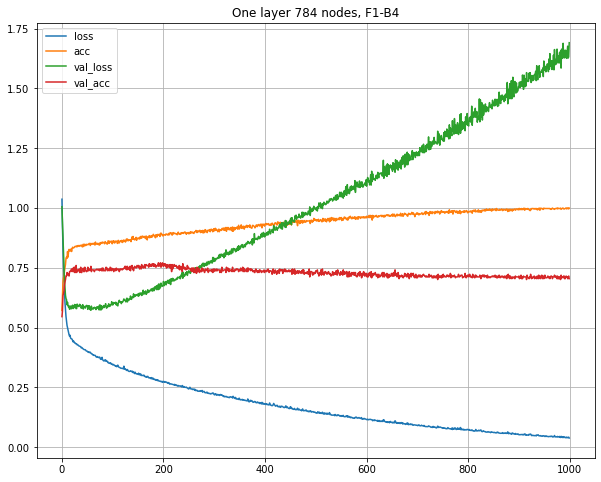

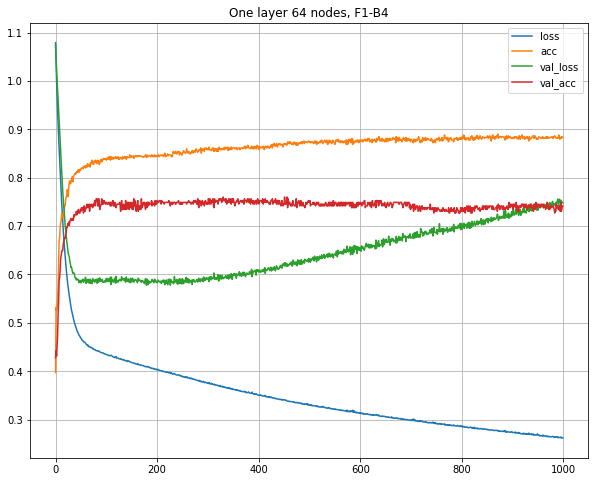

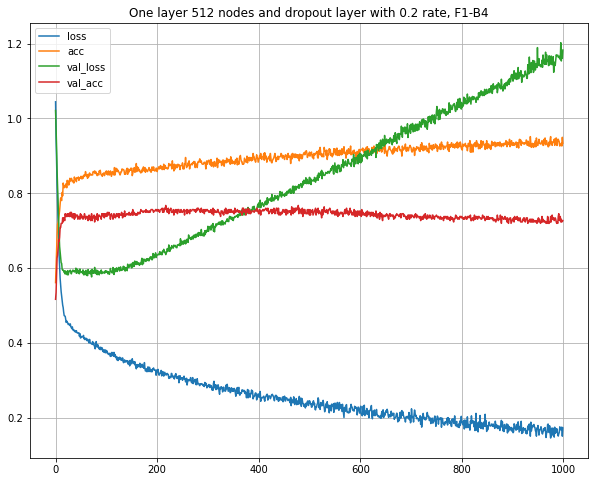

In [37]:
# Visualize the training results
plt.figure(figsize=(10,8))
plt.title('One layer 784 nodes, F1-B4')
plt.plot(history1.history['loss'],label='loss')
plt.plot(history1.history['accuracy'],label='acc')
plt.plot(history1.history['val_loss'],label='val_loss')
plt.plot(history1.history['val_accuracy'],label='val_acc')
plt.grid()
plt.legend()
plt.show()

# Visualize the training results
plt.figure(figsize=(10,8))
plt.title('One layer 64 nodes, F1-B4')
plt.plot(history2.history['loss'],label='loss')
plt.plot(history2.history['accuracy'],label='acc')
plt.plot(history2.history['val_loss'],label='val_loss')
plt.plot(history2.history['val_accuracy'],label='val_acc')
plt.grid()
plt.legend()
plt.show()

# Visualize the training results
plt.figure(figsize=(10,8))
plt.title('One layer 512 nodes and dropout layer with 0.2 rate, F1-B4')
plt.plot(history3.history['loss'],label='loss')
plt.plot(history3.history['accuracy'],label='acc')
plt.plot(history3.history['val_loss'],label='val_loss')
plt.plot(history3.history['val_accuracy'],label='val_acc')
plt.grid()
plt.legend()
plt.show()

In [38]:
# Validation model
print('--------model 1, One layer 784 nodes-----------')
score = model1.evaluate(x_valid, y_valid, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])
print('-----------------------------------------------')

# Validation model
print('--------model 2, One layer 64 nodes-----------')
score = model2.evaluate(x_valid, y_valid, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])
print('-----------------------------------------------')
# Validation model
print('--------model 3, One layer 512 nodes and dropout(0.2)-----------')
score = model3.evaluate(x_valid, y_valid, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])
print('-----------------------------------------------')

--------model 1, One layer 784 nodes-----------
Validation loss: 1.6914219856262207
Validation accuracy: 0.7047970294952393
-----------------------------------------------
--------model 2, One layer 64 nodes-----------
Validation loss: 0.7480114698410034
Validation accuracy: 0.7416974306106567
-----------------------------------------------
--------model 3, One layer 512 nodes and dropout(0.2)-----------
Validation loss: 1.182894229888916
Validation accuracy: 0.7269372940063477
-----------------------------------------------


## Problem 3
Add multiple layers to the network and observe the results.

In [49]:
# Features to use
features = ["F1","F2"]

# Extract features
x_train_raw = train[features]
x_valid_raw = valid[features]

# Normalize to zero mean
x_mean = np.mean(x_train_raw)
x_std = np.std(x_train_raw)
x_train = x_train_raw - x_mean
x_valid = x_valid_raw - x_mean

# Fix labels. The "to_categorical" call maps integer labels {n}
# to a vector of length N (number of labels) with a one in position n
y_train = keras.utils.to_categorical(trainlabels, len(phonemes))
y_valid = keras.utils.to_categorical(validlabels, len(phonemes))

# Create a model with a single hidden layer
model1 = keras.Sequential([
    keras.layers.Dense(28*28, activation=tf.nn.relu, input_dim=x_train.shape[1]),
    keras.layers.Dense(32, activation=tf.nn.relu, input_dim=28*28),
    keras.layers.Dense(512, activation=tf.nn.relu, input_dim=32),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation=tf.nn.relu, input_dim=512),
    keras.layers.Dense(len(phonemes), activation=tf.nn.softmax)
])
print('--------------Model 1---------------')
model1.summary()

# Train the model
model1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history1 = model1.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                    epochs=1000, batch_size=32, verbose=True)

# Create a model with a single hidden layer
model2 = keras.Sequential([
    keras.layers.Dense(64, activation=tf.nn.relu, input_dim=x_train.shape[1]),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(32, activation=tf.nn.relu, input_dim=64),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(16, activation=tf.nn.relu, input_dim=32),
    keras.layers.Dense(len(phonemes), activation=tf.nn.softmax)
])

print('--------------Model 2---------------')
model2.summary()

# Train the model
model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history2 = model2.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                    epochs=1000, batch_size=32, verbose=True)

# Create a model with a single hidden layer
model3 = keras.Sequential([
    keras.layers.Dense(256, activation=tf.nn.relu, input_dim=x_train.shape[1]),
    keras.layers.Dense(512, activation=tf.nn.relu, input_dim=256),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(512, activation=tf.nn.relu, input_dim=512),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation=tf.nn.relu, input_dim=512),
    keras.layers.Dense(len(phonemes), activation=tf.nn.softmax)
])

print('--------------Model 3---------------')
model3.summary()

# Train the model
model3.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history3 = model3.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                    epochs=1000, batch_size=32, verbose=True)

# Create a model with a single hidden layer
model4 = keras.Sequential([
    keras.layers.Dense(64, activation=tf.nn.relu, input_dim=x_train.shape[1]),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(len(phonemes), activation=tf.nn.softmax),
])

print('--------------Model 4---------------')
model4.summary()

# Train the model
model4.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history4 = model4.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                    epochs=1000, batch_size=32, verbose=True)

--------------Model 1---------------
Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_150 (Dense)            (None, 784)               2352      
_________________________________________________________________
dense_151 (Dense)            (None, 32)                25120     
_________________________________________________________________
dense_152 (Dense)            (None, 512)               16896     
_________________________________________________________________
dropout_52 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_153 (Dense)            (None, 64)                32832     
_________________________________________________________________
dense_154 (Dense)            (None, 3)                 195       
Total params: 77,395
Trainable params: 77,395
Non-trainable params: 0
____________

18/18 [==============================] - 0s 2ms/step - loss: 0.4674 - accuracy: 0.8129 - val_loss: 0.5975 - val_accuracy: 0.7601
Epoch 51/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4540 - accuracy: 0.8237 - val_loss: 0.6361 - val_accuracy: 0.7491
Epoch 52/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4606 - accuracy: 0.8165 - val_loss: 0.5953 - val_accuracy: 0.7565
Epoch 53/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4501 - accuracy: 0.8273 - val_loss: 0.6224 - val_accuracy: 0.7417
Epoch 54/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4593 - accuracy: 0.8058 - val_loss: 0.6490 - val_accuracy: 0.7269
Epoch 55/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4687 - accuracy: 0.7950 - val_loss: 0.6117 - val_accuracy: 0.7712
Epoch 56/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4666 - accuracy: 0.8094 - val_loss: 0.6013 - val_accuracy: 0.7528
Epoch 57/1000

18/18 [==============================] - 0s 2ms/step - loss: 0.4426 - accuracy: 0.8201 - val_loss: 0.6235 - val_accuracy: 0.7417
Epoch 108/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4376 - accuracy: 0.8165 - val_loss: 0.6490 - val_accuracy: 0.7380
Epoch 109/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4352 - accuracy: 0.8255 - val_loss: 0.6325 - val_accuracy: 0.7491
Epoch 110/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4371 - accuracy: 0.8219 - val_loss: 0.6254 - val_accuracy: 0.7638
Epoch 111/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4352 - accuracy: 0.8219 - val_loss: 0.6178 - val_accuracy: 0.7565
Epoch 112/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4350 - accuracy: 0.8058 - val_loss: 0.6605 - val_accuracy: 0.7380
Epoch 113/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4392 - accuracy: 0.8309 - val_loss: 0.6356 - val_accuracy: 0.7565
Epoch 1

Epoch 164/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4173 - accuracy: 0.8255 - val_loss: 0.6409 - val_accuracy: 0.7823
Epoch 165/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4288 - accuracy: 0.8219 - val_loss: 0.6411 - val_accuracy: 0.7823
Epoch 166/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4171 - accuracy: 0.8309 - val_loss: 0.7196 - val_accuracy: 0.7528
Epoch 167/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4401 - accuracy: 0.8255 - val_loss: 0.6301 - val_accuracy: 0.7675
Epoch 168/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4236 - accuracy: 0.8309 - val_loss: 0.6578 - val_accuracy: 0.7528
Epoch 169/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4224 - accuracy: 0.8327 - val_loss: 0.6371 - val_accuracy: 0.7712
Epoch 170/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4224 - accuracy: 0.8327 - val_loss: 0.6543 - val_accuracy:

Epoch 221/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4246 - accuracy: 0.8291 - val_loss: 0.7179 - val_accuracy: 0.7712
Epoch 222/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4173 - accuracy: 0.8291 - val_loss: 0.6942 - val_accuracy: 0.7786
Epoch 223/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4120 - accuracy: 0.8165 - val_loss: 0.7326 - val_accuracy: 0.7712
Epoch 224/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4045 - accuracy: 0.8417 - val_loss: 0.7190 - val_accuracy: 0.7786
Epoch 225/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4011 - accuracy: 0.8345 - val_loss: 0.7112 - val_accuracy: 0.7712
Epoch 226/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4021 - accuracy: 0.8273 - val_loss: 0.7067 - val_accuracy: 0.7749
Epoch 227/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4029 - accuracy: 0.8363 - val_loss: 0.7097 - val_accuracy:

Epoch 278/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.3873 - accuracy: 0.8381 - val_loss: 0.8000 - val_accuracy: 0.7786
Epoch 279/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.3863 - accuracy: 0.8309 - val_loss: 0.7963 - val_accuracy: 0.7675
Epoch 280/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.3896 - accuracy: 0.8381 - val_loss: 0.8474 - val_accuracy: 0.7712
Epoch 281/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.3840 - accuracy: 0.8435 - val_loss: 0.8020 - val_accuracy: 0.7638
Epoch 282/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.3845 - accuracy: 0.8345 - val_loss: 0.8375 - val_accuracy: 0.7565
Epoch 283/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.3991 - accuracy: 0.8381 - val_loss: 0.7846 - val_accuracy: 0.7786
Epoch 284/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3925 - accuracy: 0.8399 - val_loss: 0.8865 - val_accuracy:

Epoch 335/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.3617 - accuracy: 0.8453 - val_loss: 0.9438 - val_accuracy: 0.7786
Epoch 336/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.3635 - accuracy: 0.8525 - val_loss: 0.9763 - val_accuracy: 0.7675
Epoch 337/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.3623 - accuracy: 0.8561 - val_loss: 0.9966 - val_accuracy: 0.7712
Epoch 338/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.3746 - accuracy: 0.8417 - val_loss: 0.9114 - val_accuracy: 0.7675
Epoch 339/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.3744 - accuracy: 0.8525 - val_loss: 0.9779 - val_accuracy: 0.7712
Epoch 340/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3577 - accuracy: 0.8489 - val_loss: 0.9577 - val_accuracy: 0.7749
Epoch 341/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.3534 - accuracy: 0.8615 - val_loss: 1.0116 - val_accuracy:

Epoch 392/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4066 - accuracy: 0.8345 - val_loss: 1.1213 - val_accuracy: 0.7528
Epoch 393/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.3657 - accuracy: 0.8543 - val_loss: 1.1469 - val_accuracy: 0.7454
Epoch 394/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.3381 - accuracy: 0.8579 - val_loss: 1.0717 - val_accuracy: 0.7528
Epoch 395/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.3381 - accuracy: 0.8543 - val_loss: 1.1313 - val_accuracy: 0.7380
Epoch 396/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.3374 - accuracy: 0.8687 - val_loss: 1.1404 - val_accuracy: 0.7601
Epoch 397/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3412 - accuracy: 0.8615 - val_loss: 1.1676 - val_accuracy: 0.7491
Epoch 398/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.3359 - accuracy: 0.8579 - val_loss: 1.1511 - val_accuracy:

Epoch 449/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.3262 - accuracy: 0.8705 - val_loss: 1.2764 - val_accuracy: 0.7343
Epoch 450/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.3205 - accuracy: 0.8741 - val_loss: 1.3053 - val_accuracy: 0.7380
Epoch 451/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.3142 - accuracy: 0.8741 - val_loss: 1.2886 - val_accuracy: 0.7343
Epoch 452/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.3172 - accuracy: 0.8741 - val_loss: 1.2769 - val_accuracy: 0.7343
Epoch 453/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.3126 - accuracy: 0.8723 - val_loss: 1.2833 - val_accuracy: 0.7565
Epoch 454/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3186 - accuracy: 0.8597 - val_loss: 1.2608 - val_accuracy: 0.7380
Epoch 455/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3213 - accuracy: 0.8687 - val_loss: 1.2933 - val_accuracy:

Epoch 506/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.2889 - accuracy: 0.8849 - val_loss: 1.4597 - val_accuracy: 0.7380
Epoch 507/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3054 - accuracy: 0.8849 - val_loss: 1.4394 - val_accuracy: 0.7269
Epoch 508/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.2863 - accuracy: 0.8759 - val_loss: 1.4609 - val_accuracy: 0.7269
Epoch 509/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.2943 - accuracy: 0.8687 - val_loss: 1.4622 - val_accuracy: 0.7269
Epoch 510/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.3074 - accuracy: 0.8633 - val_loss: 1.4506 - val_accuracy: 0.6790
Epoch 511/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3171 - accuracy: 0.8561 - val_loss: 1.4538 - val_accuracy: 0.7343
Epoch 512/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.3013 - accuracy: 0.8669 - val_loss: 1.5300 - val_accuracy:

Epoch 563/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.2897 - accuracy: 0.8741 - val_loss: 1.5658 - val_accuracy: 0.7232
Epoch 564/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.2895 - accuracy: 0.8813 - val_loss: 1.6123 - val_accuracy: 0.7122
Epoch 565/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2808 - accuracy: 0.8813 - val_loss: 1.6166 - val_accuracy: 0.7048
Epoch 566/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.2818 - accuracy: 0.8777 - val_loss: 1.6182 - val_accuracy: 0.7232
Epoch 567/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2954 - accuracy: 0.8741 - val_loss: 1.5951 - val_accuracy: 0.7159
Epoch 568/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2808 - accuracy: 0.8741 - val_loss: 1.6143 - val_accuracy: 0.7048
Epoch 569/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.2851 - accuracy: 0.8813 - val_loss: 1.6683 - val_accuracy:

Epoch 620/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2826 - accuracy: 0.8687 - val_loss: 1.7642 - val_accuracy: 0.7048
Epoch 621/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3007 - accuracy: 0.8777 - val_loss: 1.7939 - val_accuracy: 0.7048
Epoch 622/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2635 - accuracy: 0.8903 - val_loss: 1.7680 - val_accuracy: 0.7196
Epoch 623/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.2554 - accuracy: 0.8867 - val_loss: 1.8427 - val_accuracy: 0.7196
Epoch 624/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2674 - accuracy: 0.8885 - val_loss: 1.8067 - val_accuracy: 0.7196
Epoch 625/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.2699 - accuracy: 0.8795 - val_loss: 1.8017 - val_accuracy: 0.7085
Epoch 626/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.2710 - accuracy: 0.8795 - val_loss: 1.7188 - val_accuracy:

Epoch 677/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.2747 - accuracy: 0.8867 - val_loss: 1.8672 - val_accuracy: 0.7196
Epoch 678/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.2646 - accuracy: 0.8885 - val_loss: 1.8818 - val_accuracy: 0.7085
Epoch 679/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.2666 - accuracy: 0.8849 - val_loss: 1.9659 - val_accuracy: 0.7196
Epoch 680/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.2669 - accuracy: 0.8795 - val_loss: 1.9166 - val_accuracy: 0.7343
Epoch 681/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.2611 - accuracy: 0.8777 - val_loss: 1.9341 - val_accuracy: 0.7159
Epoch 682/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.2562 - accuracy: 0.8867 - val_loss: 2.0245 - val_accuracy: 0.7122
Epoch 683/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2540 - accuracy: 0.8921 - val_loss: 1.8333 - val_accuracy:

Epoch 734/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.2423 - accuracy: 0.8921 - val_loss: 2.1030 - val_accuracy: 0.7196
Epoch 735/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.2442 - accuracy: 0.9029 - val_loss: 2.0759 - val_accuracy: 0.7380
Epoch 736/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2767 - accuracy: 0.8651 - val_loss: 2.1600 - val_accuracy: 0.7343
Epoch 737/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.2756 - accuracy: 0.8957 - val_loss: 2.0884 - val_accuracy: 0.7269
Epoch 738/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.2579 - accuracy: 0.8849 - val_loss: 2.1569 - val_accuracy: 0.7196
Epoch 739/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2517 - accuracy: 0.8903 - val_loss: 2.0939 - val_accuracy: 0.7122
Epoch 740/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.2560 - accuracy: 0.8795 - val_loss: 2.0645 - val_accuracy:

Epoch 791/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.2301 - accuracy: 0.9101 - val_loss: 2.3237 - val_accuracy: 0.7232
Epoch 792/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2386 - accuracy: 0.9011 - val_loss: 2.2379 - val_accuracy: 0.6974
Epoch 793/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.2324 - accuracy: 0.8939 - val_loss: 2.1974 - val_accuracy: 0.7232
Epoch 794/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2277 - accuracy: 0.8993 - val_loss: 2.2494 - val_accuracy: 0.7011
Epoch 795/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2457 - accuracy: 0.8993 - val_loss: 2.2448 - val_accuracy: 0.7122
Epoch 796/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.2340 - accuracy: 0.8957 - val_loss: 2.2289 - val_accuracy: 0.7085
Epoch 797/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.2378 - accuracy: 0.8939 - val_loss: 2.3614 - val_accuracy:

Epoch 848/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.2360 - accuracy: 0.9065 - val_loss: 2.4639 - val_accuracy: 0.6974
Epoch 849/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.2552 - accuracy: 0.8831 - val_loss: 2.3421 - val_accuracy: 0.7085
Epoch 850/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.2393 - accuracy: 0.9029 - val_loss: 2.3003 - val_accuracy: 0.7048
Epoch 851/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.2894 - accuracy: 0.8795 - val_loss: 2.2438 - val_accuracy: 0.7232
Epoch 852/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.2896 - accuracy: 0.8705 - val_loss: 2.2138 - val_accuracy: 0.7122
Epoch 853/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.2720 - accuracy: 0.8939 - val_loss: 2.2206 - val_accuracy: 0.7122
Epoch 854/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.2489 - accuracy: 0.8921 - val_loss: 2.3012 - val_accuracy:

Epoch 905/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.1990 - accuracy: 0.9083 - val_loss: 2.6295 - val_accuracy: 0.7122
Epoch 906/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2175 - accuracy: 0.9083 - val_loss: 2.5983 - val_accuracy: 0.7122
Epoch 907/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.1994 - accuracy: 0.9119 - val_loss: 2.7903 - val_accuracy: 0.7011
Epoch 908/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.2323 - accuracy: 0.8903 - val_loss: 2.6218 - val_accuracy: 0.7048
Epoch 909/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.3631 - accuracy: 0.8867 - val_loss: 2.2844 - val_accuracy: 0.7011
Epoch 910/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.3711 - accuracy: 0.8453 - val_loss: 2.5156 - val_accuracy: 0.7085
Epoch 911/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.2828 - accuracy: 0.8849 - val_loss: 2.5062 - val_accuracy:

Epoch 962/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2270 - accuracy: 0.8939 - val_loss: 2.6731 - val_accuracy: 0.7122
Epoch 963/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.2088 - accuracy: 0.9011 - val_loss: 2.7094 - val_accuracy: 0.7011
Epoch 964/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2083 - accuracy: 0.9029 - val_loss: 2.5845 - val_accuracy: 0.7085
Epoch 965/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1997 - accuracy: 0.9245 - val_loss: 2.6707 - val_accuracy: 0.7085
Epoch 966/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.2069 - accuracy: 0.9101 - val_loss: 2.7103 - val_accuracy: 0.7122
Epoch 967/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.2012 - accuracy: 0.9137 - val_loss: 2.7692 - val_accuracy: 0.7196
Epoch 968/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.1963 - accuracy: 0.9155 - val_loss: 2.7447 - val_accuracy:

Epoch 11/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.5790 - accuracy: 0.7788 - val_loss: 0.6018 - val_accuracy: 0.7380
Epoch 12/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.5846 - accuracy: 0.7590 - val_loss: 0.5882 - val_accuracy: 0.7565
Epoch 13/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.5611 - accuracy: 0.7842 - val_loss: 0.5956 - val_accuracy: 0.7491
Epoch 14/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.5281 - accuracy: 0.7896 - val_loss: 0.5877 - val_accuracy: 0.7565
Epoch 15/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.5427 - accuracy: 0.7842 - val_loss: 0.6048 - val_accuracy: 0.7417
Epoch 16/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.5330 - accuracy: 0.7752 - val_loss: 0.5889 - val_accuracy: 0.7454
Epoch 17/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.5263 - accuracy: 0.7842 - val_loss: 0.6007 - val_accuracy: 0.7491

18/18 [==============================] - 0s 1ms/step - loss: 0.5008 - accuracy: 0.7968 - val_loss: 0.6035 - val_accuracy: 0.7417
Epoch 69/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4885 - accuracy: 0.8040 - val_loss: 0.6053 - val_accuracy: 0.7417
Epoch 70/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4777 - accuracy: 0.8094 - val_loss: 0.5982 - val_accuracy: 0.7491
Epoch 71/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4718 - accuracy: 0.8058 - val_loss: 0.6021 - val_accuracy: 0.7417
Epoch 72/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4762 - accuracy: 0.7986 - val_loss: 0.6069 - val_accuracy: 0.7417
Epoch 73/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4845 - accuracy: 0.8058 - val_loss: 0.6056 - val_accuracy: 0.7454
Epoch 74/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4804 - accuracy: 0.8183 - val_loss: 0.6145 - val_accuracy: 0.7380
Epoch 75/1000

18/18 [==============================] - 0s 1ms/step - loss: 0.4677 - accuracy: 0.8094 - val_loss: 0.6093 - val_accuracy: 0.7454
Epoch 126/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4624 - accuracy: 0.8255 - val_loss: 0.6067 - val_accuracy: 0.7454
Epoch 127/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4709 - accuracy: 0.8165 - val_loss: 0.6139 - val_accuracy: 0.7454
Epoch 128/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4489 - accuracy: 0.8147 - val_loss: 0.6092 - val_accuracy: 0.7454
Epoch 129/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4731 - accuracy: 0.8129 - val_loss: 0.6052 - val_accuracy: 0.7491
Epoch 130/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4674 - accuracy: 0.8004 - val_loss: 0.6091 - val_accuracy: 0.7491
Epoch 131/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4539 - accuracy: 0.8255 - val_loss: 0.6106 - val_accuracy: 0.7528
Epoch 1

Epoch 182/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4621 - accuracy: 0.8129 - val_loss: 0.6038 - val_accuracy: 0.7454
Epoch 183/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4499 - accuracy: 0.8219 - val_loss: 0.6071 - val_accuracy: 0.7454
Epoch 184/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4548 - accuracy: 0.8201 - val_loss: 0.6134 - val_accuracy: 0.7491
Epoch 185/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4483 - accuracy: 0.8273 - val_loss: 0.6085 - val_accuracy: 0.7454
Epoch 186/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4441 - accuracy: 0.8201 - val_loss: 0.6086 - val_accuracy: 0.7454
Epoch 187/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4626 - accuracy: 0.8129 - val_loss: 0.5995 - val_accuracy: 0.7565
Epoch 188/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4585 - accuracy: 0.8237 - val_loss: 0.6104 - val_accuracy:

Epoch 239/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4607 - accuracy: 0.8094 - val_loss: 0.6104 - val_accuracy: 0.7491
Epoch 240/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4588 - accuracy: 0.8219 - val_loss: 0.6157 - val_accuracy: 0.7417
Epoch 241/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4634 - accuracy: 0.8219 - val_loss: 0.6010 - val_accuracy: 0.7491
Epoch 242/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4425 - accuracy: 0.8183 - val_loss: 0.6097 - val_accuracy: 0.7454
Epoch 243/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4554 - accuracy: 0.8183 - val_loss: 0.6097 - val_accuracy: 0.7454
Epoch 244/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4474 - accuracy: 0.8237 - val_loss: 0.6206 - val_accuracy: 0.7417
Epoch 245/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4632 - accuracy: 0.8291 - val_loss: 0.6084 - val_accuracy:

Epoch 296/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4492 - accuracy: 0.8183 - val_loss: 0.6134 - val_accuracy: 0.7491
Epoch 297/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4685 - accuracy: 0.8219 - val_loss: 0.6062 - val_accuracy: 0.7491
Epoch 298/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4543 - accuracy: 0.8165 - val_loss: 0.6086 - val_accuracy: 0.7417
Epoch 299/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4518 - accuracy: 0.8255 - val_loss: 0.6058 - val_accuracy: 0.7491
Epoch 300/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4446 - accuracy: 0.8219 - val_loss: 0.6088 - val_accuracy: 0.7528
Epoch 301/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4576 - accuracy: 0.8201 - val_loss: 0.6107 - val_accuracy: 0.7417
Epoch 302/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4488 - accuracy: 0.8129 - val_loss: 0.6080 - val_accuracy:

Epoch 353/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4466 - accuracy: 0.8237 - val_loss: 0.6150 - val_accuracy: 0.7491
Epoch 354/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4325 - accuracy: 0.8165 - val_loss: 0.6136 - val_accuracy: 0.7491
Epoch 355/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4526 - accuracy: 0.8183 - val_loss: 0.6130 - val_accuracy: 0.7491
Epoch 356/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4533 - accuracy: 0.8129 - val_loss: 0.6069 - val_accuracy: 0.7491
Epoch 357/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4522 - accuracy: 0.8165 - val_loss: 0.6130 - val_accuracy: 0.7528
Epoch 358/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4484 - accuracy: 0.8201 - val_loss: 0.6113 - val_accuracy: 0.7454
Epoch 359/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4572 - accuracy: 0.8165 - val_loss: 0.6060 - val_accuracy:

Epoch 410/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4429 - accuracy: 0.8219 - val_loss: 0.6103 - val_accuracy: 0.7528
Epoch 411/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4544 - accuracy: 0.8291 - val_loss: 0.6137 - val_accuracy: 0.7491
Epoch 412/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4451 - accuracy: 0.8237 - val_loss: 0.6188 - val_accuracy: 0.7380
Epoch 413/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4389 - accuracy: 0.8291 - val_loss: 0.6123 - val_accuracy: 0.7454
Epoch 414/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4485 - accuracy: 0.8273 - val_loss: 0.6167 - val_accuracy: 0.7454
Epoch 415/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4549 - accuracy: 0.8165 - val_loss: 0.6206 - val_accuracy: 0.7417
Epoch 416/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4588 - accuracy: 0.8129 - val_loss: 0.6202 - val_accuracy:

Epoch 467/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4530 - accuracy: 0.8219 - val_loss: 0.6277 - val_accuracy: 0.7491
Epoch 468/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4396 - accuracy: 0.8363 - val_loss: 0.6204 - val_accuracy: 0.7491
Epoch 469/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4518 - accuracy: 0.8219 - val_loss: 0.6216 - val_accuracy: 0.7417
Epoch 470/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4408 - accuracy: 0.8381 - val_loss: 0.6224 - val_accuracy: 0.7454
Epoch 471/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4394 - accuracy: 0.8165 - val_loss: 0.6215 - val_accuracy: 0.7528
Epoch 472/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4449 - accuracy: 0.8237 - val_loss: 0.6187 - val_accuracy: 0.7491
Epoch 473/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4551 - accuracy: 0.8363 - val_loss: 0.6212 - val_accuracy:

Epoch 524/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4346 - accuracy: 0.8255 - val_loss: 0.6159 - val_accuracy: 0.7565
Epoch 525/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4416 - accuracy: 0.8129 - val_loss: 0.6238 - val_accuracy: 0.7491
Epoch 526/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4389 - accuracy: 0.8327 - val_loss: 0.6153 - val_accuracy: 0.7491
Epoch 527/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4429 - accuracy: 0.8273 - val_loss: 0.6223 - val_accuracy: 0.7491
Epoch 528/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4497 - accuracy: 0.8219 - val_loss: 0.6218 - val_accuracy: 0.7491
Epoch 529/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4572 - accuracy: 0.8183 - val_loss: 0.6193 - val_accuracy: 0.7491
Epoch 530/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4470 - accuracy: 0.8291 - val_loss: 0.6253 - val_accuracy:

Epoch 581/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4486 - accuracy: 0.8076 - val_loss: 0.6129 - val_accuracy: 0.7565
Epoch 582/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4495 - accuracy: 0.8291 - val_loss: 0.6209 - val_accuracy: 0.7528
Epoch 583/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4443 - accuracy: 0.8129 - val_loss: 0.6129 - val_accuracy: 0.7528
Epoch 584/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4347 - accuracy: 0.8381 - val_loss: 0.6138 - val_accuracy: 0.7528
Epoch 585/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4257 - accuracy: 0.8291 - val_loss: 0.6246 - val_accuracy: 0.7491
Epoch 586/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4350 - accuracy: 0.8345 - val_loss: 0.6236 - val_accuracy: 0.7491
Epoch 587/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4381 - accuracy: 0.8255 - val_loss: 0.6183 - val_accuracy:

Epoch 638/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4286 - accuracy: 0.8345 - val_loss: 0.6287 - val_accuracy: 0.7454
Epoch 639/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4269 - accuracy: 0.8309 - val_loss: 0.6195 - val_accuracy: 0.7675
Epoch 640/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4355 - accuracy: 0.8273 - val_loss: 0.6344 - val_accuracy: 0.7528
Epoch 641/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4375 - accuracy: 0.8309 - val_loss: 0.6207 - val_accuracy: 0.7528
Epoch 642/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4481 - accuracy: 0.8309 - val_loss: 0.6177 - val_accuracy: 0.7491
Epoch 643/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4359 - accuracy: 0.8327 - val_loss: 0.6301 - val_accuracy: 0.7454
Epoch 644/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4513 - accuracy: 0.8255 - val_loss: 0.6229 - val_accuracy:

Epoch 695/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4228 - accuracy: 0.8273 - val_loss: 0.6238 - val_accuracy: 0.7454
Epoch 696/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4343 - accuracy: 0.8273 - val_loss: 0.6155 - val_accuracy: 0.7454
Epoch 697/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4318 - accuracy: 0.8219 - val_loss: 0.6230 - val_accuracy: 0.7491
Epoch 698/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4382 - accuracy: 0.8201 - val_loss: 0.6291 - val_accuracy: 0.7454
Epoch 699/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4300 - accuracy: 0.8327 - val_loss: 0.6214 - val_accuracy: 0.7491
Epoch 700/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4451 - accuracy: 0.8363 - val_loss: 0.6221 - val_accuracy: 0.7454
Epoch 701/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4357 - accuracy: 0.8147 - val_loss: 0.6248 - val_accuracy:

Epoch 752/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4219 - accuracy: 0.8291 - val_loss: 0.6200 - val_accuracy: 0.7528
Epoch 753/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4215 - accuracy: 0.8309 - val_loss: 0.6395 - val_accuracy: 0.7454
Epoch 754/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4337 - accuracy: 0.8309 - val_loss: 0.6364 - val_accuracy: 0.7491
Epoch 755/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4377 - accuracy: 0.8309 - val_loss: 0.6350 - val_accuracy: 0.7454
Epoch 756/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4354 - accuracy: 0.8309 - val_loss: 0.6279 - val_accuracy: 0.7454
Epoch 757/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4239 - accuracy: 0.8345 - val_loss: 0.6165 - val_accuracy: 0.7565
Epoch 758/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4360 - accuracy: 0.8453 - val_loss: 0.6238 - val_accuracy:

Epoch 809/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4351 - accuracy: 0.8327 - val_loss: 0.6269 - val_accuracy: 0.7528
Epoch 810/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4370 - accuracy: 0.8255 - val_loss: 0.6287 - val_accuracy: 0.7491
Epoch 811/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4283 - accuracy: 0.8417 - val_loss: 0.6213 - val_accuracy: 0.7528
Epoch 812/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4346 - accuracy: 0.8219 - val_loss: 0.6264 - val_accuracy: 0.7528
Epoch 813/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4232 - accuracy: 0.8237 - val_loss: 0.6323 - val_accuracy: 0.7454
Epoch 814/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4197 - accuracy: 0.8363 - val_loss: 0.6272 - val_accuracy: 0.7491
Epoch 815/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4411 - accuracy: 0.8273 - val_loss: 0.6321 - val_accuracy:

Epoch 866/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4205 - accuracy: 0.8363 - val_loss: 0.6206 - val_accuracy: 0.7528
Epoch 867/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4183 - accuracy: 0.8255 - val_loss: 0.6240 - val_accuracy: 0.7528
Epoch 868/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4223 - accuracy: 0.8273 - val_loss: 0.6317 - val_accuracy: 0.7491
Epoch 869/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4277 - accuracy: 0.8327 - val_loss: 0.6319 - val_accuracy: 0.7491
Epoch 870/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4360 - accuracy: 0.8183 - val_loss: 0.6225 - val_accuracy: 0.7528
Epoch 871/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4235 - accuracy: 0.8363 - val_loss: 0.6315 - val_accuracy: 0.7528
Epoch 872/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4198 - accuracy: 0.8417 - val_loss: 0.6379 - val_accuracy:

Epoch 923/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4096 - accuracy: 0.8399 - val_loss: 0.6380 - val_accuracy: 0.7528
Epoch 924/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4289 - accuracy: 0.8327 - val_loss: 0.6462 - val_accuracy: 0.7528
Epoch 925/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4159 - accuracy: 0.8327 - val_loss: 0.6461 - val_accuracy: 0.7528
Epoch 926/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4169 - accuracy: 0.8291 - val_loss: 0.6429 - val_accuracy: 0.7565
Epoch 927/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4190 - accuracy: 0.8327 - val_loss: 0.6474 - val_accuracy: 0.7565
Epoch 928/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4298 - accuracy: 0.8345 - val_loss: 0.6480 - val_accuracy: 0.7565
Epoch 929/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4247 - accuracy: 0.8345 - val_loss: 0.6454 - val_accuracy:

Epoch 980/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4187 - accuracy: 0.8255 - val_loss: 0.6369 - val_accuracy: 0.7565
Epoch 981/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4126 - accuracy: 0.8435 - val_loss: 0.6444 - val_accuracy: 0.7528
Epoch 982/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4097 - accuracy: 0.8525 - val_loss: 0.6627 - val_accuracy: 0.7565
Epoch 983/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4249 - accuracy: 0.8309 - val_loss: 0.6482 - val_accuracy: 0.7565
Epoch 984/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4193 - accuracy: 0.8255 - val_loss: 0.6430 - val_accuracy: 0.7528
Epoch 985/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4328 - accuracy: 0.8255 - val_loss: 0.6326 - val_accuracy: 0.7454
Epoch 986/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4329 - accuracy: 0.8183 - val_loss: 0.6266 - val_accuracy:

Epoch 28/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4584 - accuracy: 0.8112 - val_loss: 0.6363 - val_accuracy: 0.7343
Epoch 29/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.4576 - accuracy: 0.8255 - val_loss: 0.6198 - val_accuracy: 0.7343
Epoch 30/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4523 - accuracy: 0.8165 - val_loss: 0.6338 - val_accuracy: 0.7343
Epoch 31/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4594 - accuracy: 0.8112 - val_loss: 0.6342 - val_accuracy: 0.7417
Epoch 32/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4577 - accuracy: 0.8237 - val_loss: 0.6086 - val_accuracy: 0.7380
Epoch 33/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4635 - accuracy: 0.8022 - val_loss: 0.6170 - val_accuracy: 0.7417
Epoch 34/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4581 - accuracy: 0.8255 - val_loss: 0.6157 - val_accuracy: 0.7601

18/18 [==============================] - 0s 2ms/step - loss: 0.4407 - accuracy: 0.8327 - val_loss: 0.6864 - val_accuracy: 0.7454
Epoch 86/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4348 - accuracy: 0.8273 - val_loss: 0.6334 - val_accuracy: 0.7638
Epoch 87/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4350 - accuracy: 0.8237 - val_loss: 0.6315 - val_accuracy: 0.7491
Epoch 88/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4244 - accuracy: 0.8381 - val_loss: 0.6881 - val_accuracy: 0.7491
Epoch 89/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4355 - accuracy: 0.8165 - val_loss: 0.6450 - val_accuracy: 0.7565
Epoch 90/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4344 - accuracy: 0.8273 - val_loss: 0.6835 - val_accuracy: 0.7417
Epoch 91/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4462 - accuracy: 0.8255 - val_loss: 0.6574 - val_accuracy: 0.7306
Epoch 92/1000

18/18 [==============================] - 0s 2ms/step - loss: 0.4091 - accuracy: 0.8417 - val_loss: 0.8120 - val_accuracy: 0.7565
Epoch 143/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4308 - accuracy: 0.8201 - val_loss: 0.7003 - val_accuracy: 0.7749
Epoch 144/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4231 - accuracy: 0.8255 - val_loss: 0.7047 - val_accuracy: 0.7786
Epoch 145/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4116 - accuracy: 0.8255 - val_loss: 0.7445 - val_accuracy: 0.7675
Epoch 146/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.3997 - accuracy: 0.8453 - val_loss: 0.7503 - val_accuracy: 0.7712
Epoch 147/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.3929 - accuracy: 0.8435 - val_loss: 0.8063 - val_accuracy: 0.7491
Epoch 148/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4096 - accuracy: 0.8273 - val_loss: 0.8081 - val_accuracy: 0.7712
Epoch 1

Epoch 199/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.3873 - accuracy: 0.8309 - val_loss: 0.8942 - val_accuracy: 0.7565
Epoch 200/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.3819 - accuracy: 0.8435 - val_loss: 0.8795 - val_accuracy: 0.7675
Epoch 201/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.3872 - accuracy: 0.8381 - val_loss: 0.9170 - val_accuracy: 0.7417
Epoch 202/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.3867 - accuracy: 0.8543 - val_loss: 0.9279 - val_accuracy: 0.7601
Epoch 203/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.3902 - accuracy: 0.8273 - val_loss: 0.9340 - val_accuracy: 0.7565
Epoch 204/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.3722 - accuracy: 0.8435 - val_loss: 0.9030 - val_accuracy: 0.7491
Epoch 205/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.3684 - accuracy: 0.8471 - val_loss: 0.9200 - val_accuracy:

Epoch 256/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.3688 - accuracy: 0.8525 - val_loss: 1.0766 - val_accuracy: 0.7380
Epoch 257/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.3597 - accuracy: 0.8561 - val_loss: 1.1026 - val_accuracy: 0.7380
Epoch 258/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.3540 - accuracy: 0.8543 - val_loss: 1.0518 - val_accuracy: 0.7417
Epoch 259/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.3435 - accuracy: 0.8633 - val_loss: 1.0962 - val_accuracy: 0.7380
Epoch 260/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.3632 - accuracy: 0.8471 - val_loss: 1.0393 - val_accuracy: 0.7343
Epoch 261/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.3541 - accuracy: 0.8435 - val_loss: 1.1066 - val_accuracy: 0.7454
Epoch 262/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.3534 - accuracy: 0.8453 - val_loss: 1.1005 - val_accuracy:

Epoch 313/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.3258 - accuracy: 0.8471 - val_loss: 1.3786 - val_accuracy: 0.7380
Epoch 314/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.3346 - accuracy: 0.8543 - val_loss: 1.3299 - val_accuracy: 0.7269
Epoch 315/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.3158 - accuracy: 0.8669 - val_loss: 1.3633 - val_accuracy: 0.7232
Epoch 316/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.3171 - accuracy: 0.8669 - val_loss: 1.3397 - val_accuracy: 0.7159
Epoch 317/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.3553 - accuracy: 0.8525 - val_loss: 1.2869 - val_accuracy: 0.7380
Epoch 318/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.3505 - accuracy: 0.8435 - val_loss: 1.2634 - val_accuracy: 0.7343
Epoch 319/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.3505 - accuracy: 0.8489 - val_loss: 1.2717 - val_accuracy:

Epoch 370/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.3107 - accuracy: 0.8723 - val_loss: 1.4376 - val_accuracy: 0.7159
Epoch 371/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.3046 - accuracy: 0.8741 - val_loss: 1.4653 - val_accuracy: 0.7343
Epoch 372/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.3114 - accuracy: 0.8741 - val_loss: 1.4468 - val_accuracy: 0.7380
Epoch 373/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.3129 - accuracy: 0.8633 - val_loss: 1.4015 - val_accuracy: 0.7159
Epoch 374/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.2986 - accuracy: 0.8651 - val_loss: 1.4703 - val_accuracy: 0.7417
Epoch 375/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.3092 - accuracy: 0.8597 - val_loss: 1.3930 - val_accuracy: 0.7306
Epoch 376/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.3163 - accuracy: 0.8597 - val_loss: 1.4314 - val_accuracy:

Epoch 427/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.2846 - accuracy: 0.8831 - val_loss: 1.6675 - val_accuracy: 0.7232
Epoch 428/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.2899 - accuracy: 0.8795 - val_loss: 1.7672 - val_accuracy: 0.7196
Epoch 429/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.2935 - accuracy: 0.8705 - val_loss: 1.6365 - val_accuracy: 0.7048
Epoch 430/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.2773 - accuracy: 0.8885 - val_loss: 1.6680 - val_accuracy: 0.7159
Epoch 431/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.2759 - accuracy: 0.8777 - val_loss: 1.7053 - val_accuracy: 0.7196
Epoch 432/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.2708 - accuracy: 0.8723 - val_loss: 1.7630 - val_accuracy: 0.7122
Epoch 433/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.2843 - accuracy: 0.8759 - val_loss: 1.6874 - val_accuracy:

Epoch 484/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.3393 - accuracy: 0.8759 - val_loss: 1.6940 - val_accuracy: 0.6827
Epoch 485/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.3146 - accuracy: 0.8705 - val_loss: 1.7115 - val_accuracy: 0.7269
Epoch 486/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.2980 - accuracy: 0.8687 - val_loss: 1.7997 - val_accuracy: 0.7159
Epoch 487/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.2782 - accuracy: 0.8687 - val_loss: 1.8859 - val_accuracy: 0.7122
Epoch 488/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.2697 - accuracy: 0.8759 - val_loss: 1.9173 - val_accuracy: 0.7159
Epoch 489/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.2537 - accuracy: 0.8885 - val_loss: 1.9020 - val_accuracy: 0.7159
Epoch 490/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.2611 - accuracy: 0.8759 - val_loss: 1.9520 - val_accuracy:

Epoch 541/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.2673 - accuracy: 0.8777 - val_loss: 2.2177 - val_accuracy: 0.7122
Epoch 542/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.2818 - accuracy: 0.8831 - val_loss: 1.9995 - val_accuracy: 0.7159
Epoch 543/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.2690 - accuracy: 0.8867 - val_loss: 2.0254 - val_accuracy: 0.7159
Epoch 544/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.2469 - accuracy: 0.8921 - val_loss: 2.0186 - val_accuracy: 0.7232
Epoch 545/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.2787 - accuracy: 0.8777 - val_loss: 2.0131 - val_accuracy: 0.7048
Epoch 546/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.2589 - accuracy: 0.8831 - val_loss: 2.0414 - val_accuracy: 0.7048
Epoch 547/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.2554 - accuracy: 0.8903 - val_loss: 2.0387 - val_accuracy:

Epoch 598/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.2185 - accuracy: 0.8939 - val_loss: 2.3712 - val_accuracy: 0.7048
Epoch 599/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.2608 - accuracy: 0.8957 - val_loss: 2.3625 - val_accuracy: 0.6790
Epoch 600/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.2396 - accuracy: 0.8849 - val_loss: 2.3744 - val_accuracy: 0.7196
Epoch 601/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.2420 - accuracy: 0.8957 - val_loss: 2.4195 - val_accuracy: 0.7011
Epoch 602/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.2356 - accuracy: 0.8939 - val_loss: 2.4042 - val_accuracy: 0.6974
Epoch 603/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.2163 - accuracy: 0.9029 - val_loss: 2.3787 - val_accuracy: 0.7122
Epoch 604/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.2476 - accuracy: 0.8975 - val_loss: 2.4160 - val_accuracy:

Epoch 655/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.2822 - accuracy: 0.8687 - val_loss: 2.6519 - val_accuracy: 0.6974
Epoch 656/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.3144 - accuracy: 0.8687 - val_loss: 2.4844 - val_accuracy: 0.6863
Epoch 657/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.2547 - accuracy: 0.8831 - val_loss: 2.3114 - val_accuracy: 0.7122
Epoch 658/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.2301 - accuracy: 0.8957 - val_loss: 2.5816 - val_accuracy: 0.7011
Epoch 659/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.1861 - accuracy: 0.9137 - val_loss: 2.5518 - val_accuracy: 0.7048
Epoch 660/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.2032 - accuracy: 0.9191 - val_loss: 2.6065 - val_accuracy: 0.6937
Epoch 661/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.1998 - accuracy: 0.9173 - val_loss: 2.5542 - val_accuracy:

Epoch 712/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.2140 - accuracy: 0.9065 - val_loss: 2.9820 - val_accuracy: 0.6863
Epoch 713/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.2230 - accuracy: 0.9047 - val_loss: 2.8954 - val_accuracy: 0.7011
Epoch 714/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.2068 - accuracy: 0.9011 - val_loss: 2.8671 - val_accuracy: 0.6974
Epoch 715/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.2021 - accuracy: 0.9137 - val_loss: 2.7683 - val_accuracy: 0.6863
Epoch 716/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.3486 - accuracy: 0.8939 - val_loss: 2.5444 - val_accuracy: 0.7085
Epoch 717/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.2808 - accuracy: 0.8741 - val_loss: 2.3292 - val_accuracy: 0.6863
Epoch 718/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.2398 - accuracy: 0.8957 - val_loss: 2.4735 - val_accuracy:

Epoch 769/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.2143 - accuracy: 0.8993 - val_loss: 2.5536 - val_accuracy: 0.7085
Epoch 770/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.2157 - accuracy: 0.9011 - val_loss: 2.4975 - val_accuracy: 0.6974
Epoch 771/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.2147 - accuracy: 0.9011 - val_loss: 2.5113 - val_accuracy: 0.7048
Epoch 772/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.1945 - accuracy: 0.9155 - val_loss: 2.5911 - val_accuracy: 0.7011
Epoch 773/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.2229 - accuracy: 0.8957 - val_loss: 2.5763 - val_accuracy: 0.7159
Epoch 774/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.2429 - accuracy: 0.8957 - val_loss: 2.3515 - val_accuracy: 0.6900
Epoch 775/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.2252 - accuracy: 0.9029 - val_loss: 2.5077 - val_accuracy:

Epoch 826/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.2369 - accuracy: 0.8939 - val_loss: 2.8503 - val_accuracy: 0.6753
Epoch 827/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.2103 - accuracy: 0.9065 - val_loss: 2.7787 - val_accuracy: 0.6679
Epoch 828/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.1776 - accuracy: 0.9101 - val_loss: 2.9025 - val_accuracy: 0.6937
Epoch 829/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.1670 - accuracy: 0.9245 - val_loss: 3.0181 - val_accuracy: 0.7011
Epoch 830/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.1735 - accuracy: 0.9137 - val_loss: 2.9135 - val_accuracy: 0.6900
Epoch 831/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.1965 - accuracy: 0.9173 - val_loss: 2.7635 - val_accuracy: 0.7011
Epoch 832/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.1999 - accuracy: 0.9029 - val_loss: 2.7927 - val_accuracy:

Epoch 883/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.1458 - accuracy: 0.9335 - val_loss: 3.3182 - val_accuracy: 0.7011
Epoch 884/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.1811 - accuracy: 0.9137 - val_loss: 3.2356 - val_accuracy: 0.6790
Epoch 885/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.1913 - accuracy: 0.9299 - val_loss: 2.8958 - val_accuracy: 0.6716
Epoch 886/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.2009 - accuracy: 0.9065 - val_loss: 3.2134 - val_accuracy: 0.6863
Epoch 887/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.2020 - accuracy: 0.9137 - val_loss: 3.0720 - val_accuracy: 0.6753
Epoch 888/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.1631 - accuracy: 0.9299 - val_loss: 3.2345 - val_accuracy: 0.6827
Epoch 889/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.1740 - accuracy: 0.9335 - val_loss: 3.1798 - val_accuracy:

Epoch 940/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.1479 - accuracy: 0.9263 - val_loss: 3.1378 - val_accuracy: 0.6974
Epoch 941/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.1375 - accuracy: 0.9353 - val_loss: 3.2147 - val_accuracy: 0.6974
Epoch 942/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.1434 - accuracy: 0.9317 - val_loss: 3.1213 - val_accuracy: 0.6863
Epoch 943/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.1490 - accuracy: 0.9299 - val_loss: 3.3074 - val_accuracy: 0.6790
Epoch 944/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.1438 - accuracy: 0.9371 - val_loss: 3.1111 - val_accuracy: 0.6790
Epoch 945/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.1582 - accuracy: 0.9263 - val_loss: 3.2351 - val_accuracy: 0.6790
Epoch 946/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.1751 - accuracy: 0.9281 - val_loss: 3.1443 - val_accuracy:

Epoch 997/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.1462 - accuracy: 0.9424 - val_loss: 3.5636 - val_accuracy: 0.6900
Epoch 998/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.1404 - accuracy: 0.9371 - val_loss: 3.4714 - val_accuracy: 0.7085
Epoch 999/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.1284 - accuracy: 0.9371 - val_loss: 3.6276 - val_accuracy: 0.7048
Epoch 1000/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.1593 - accuracy: 0.9227 - val_loss: 3.4531 - val_accuracy: 0.7011
--------------Model 4---------------
Model: "sequential_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_164 (Dense)            (None, 64)                192       
_________________________________________________________________
dropout_57 (Dropout)         (None, 64)                0         
_________________________________

Epoch 47/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.5000 - accuracy: 0.7968 - val_loss: 0.5999 - val_accuracy: 0.7454
Epoch 48/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4786 - accuracy: 0.8112 - val_loss: 0.6003 - val_accuracy: 0.7454
Epoch 49/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.5086 - accuracy: 0.7986 - val_loss: 0.6002 - val_accuracy: 0.7417
Epoch 50/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.5057 - accuracy: 0.8058 - val_loss: 0.6035 - val_accuracy: 0.7417
Epoch 51/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4811 - accuracy: 0.8112 - val_loss: 0.5986 - val_accuracy: 0.7417
Epoch 52/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4930 - accuracy: 0.8112 - val_loss: 0.6054 - val_accuracy: 0.7343
Epoch 53/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.5022 - accuracy: 0.8058 - val_loss: 0.5982 - val_accuracy: 0.7417

18/18 [==============================] - 0s 1ms/step - loss: 0.4907 - accuracy: 0.8058 - val_loss: 0.6026 - val_accuracy: 0.7343
Epoch 105/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4810 - accuracy: 0.7986 - val_loss: 0.6049 - val_accuracy: 0.7417
Epoch 106/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4928 - accuracy: 0.8237 - val_loss: 0.5961 - val_accuracy: 0.7454
Epoch 107/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4744 - accuracy: 0.8165 - val_loss: 0.6036 - val_accuracy: 0.7380
Epoch 108/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4650 - accuracy: 0.8165 - val_loss: 0.5960 - val_accuracy: 0.7454
Epoch 109/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4828 - accuracy: 0.8112 - val_loss: 0.6021 - val_accuracy: 0.7343
Epoch 110/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4617 - accuracy: 0.8147 - val_loss: 0.6058 - val_accuracy: 0.7417
Epoch 1

Epoch 161/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4750 - accuracy: 0.8165 - val_loss: 0.6015 - val_accuracy: 0.7454
Epoch 162/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4693 - accuracy: 0.8112 - val_loss: 0.6058 - val_accuracy: 0.7343
Epoch 163/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4777 - accuracy: 0.8094 - val_loss: 0.6052 - val_accuracy: 0.7454
Epoch 164/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4713 - accuracy: 0.8129 - val_loss: 0.5988 - val_accuracy: 0.7454
Epoch 165/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4640 - accuracy: 0.8129 - val_loss: 0.6010 - val_accuracy: 0.7454
Epoch 166/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4557 - accuracy: 0.8076 - val_loss: 0.6085 - val_accuracy: 0.7454
Epoch 167/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4779 - accuracy: 0.8165 - val_loss: 0.6040 - val_accuracy:

Epoch 218/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4538 - accuracy: 0.8219 - val_loss: 0.5967 - val_accuracy: 0.7454
Epoch 219/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4636 - accuracy: 0.8165 - val_loss: 0.5908 - val_accuracy: 0.7454
Epoch 220/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4714 - accuracy: 0.7986 - val_loss: 0.6115 - val_accuracy: 0.7380
Epoch 221/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4669 - accuracy: 0.8219 - val_loss: 0.6020 - val_accuracy: 0.7417
Epoch 222/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4560 - accuracy: 0.8165 - val_loss: 0.5956 - val_accuracy: 0.7491
Epoch 223/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4659 - accuracy: 0.8058 - val_loss: 0.6013 - val_accuracy: 0.7417
Epoch 224/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4524 - accuracy: 0.8129 - val_loss: 0.6060 - val_accuracy:

Epoch 275/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4570 - accuracy: 0.8237 - val_loss: 0.6090 - val_accuracy: 0.7454
Epoch 276/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4676 - accuracy: 0.8165 - val_loss: 0.5978 - val_accuracy: 0.7454
Epoch 277/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4632 - accuracy: 0.8112 - val_loss: 0.6034 - val_accuracy: 0.7454
Epoch 278/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4632 - accuracy: 0.8058 - val_loss: 0.6028 - val_accuracy: 0.7454
Epoch 279/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4503 - accuracy: 0.8058 - val_loss: 0.5975 - val_accuracy: 0.7454
Epoch 280/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4494 - accuracy: 0.8112 - val_loss: 0.6024 - val_accuracy: 0.7454
Epoch 281/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4482 - accuracy: 0.8183 - val_loss: 0.6013 - val_accuracy:

Epoch 332/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4541 - accuracy: 0.8040 - val_loss: 0.5945 - val_accuracy: 0.7491
Epoch 333/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4617 - accuracy: 0.8094 - val_loss: 0.6002 - val_accuracy: 0.7454
Epoch 334/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4646 - accuracy: 0.8076 - val_loss: 0.5938 - val_accuracy: 0.7491
Epoch 335/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4581 - accuracy: 0.8219 - val_loss: 0.6009 - val_accuracy: 0.7454
Epoch 336/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4623 - accuracy: 0.8112 - val_loss: 0.5959 - val_accuracy: 0.7491
Epoch 337/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4625 - accuracy: 0.8094 - val_loss: 0.6063 - val_accuracy: 0.7454
Epoch 338/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4575 - accuracy: 0.8165 - val_loss: 0.5989 - val_accuracy:

Epoch 389/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4560 - accuracy: 0.8129 - val_loss: 0.6005 - val_accuracy: 0.7491
Epoch 390/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4638 - accuracy: 0.8112 - val_loss: 0.6030 - val_accuracy: 0.7417
Epoch 391/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4483 - accuracy: 0.8255 - val_loss: 0.6021 - val_accuracy: 0.7454
Epoch 392/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4576 - accuracy: 0.8147 - val_loss: 0.6005 - val_accuracy: 0.7454
Epoch 393/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4466 - accuracy: 0.8201 - val_loss: 0.6102 - val_accuracy: 0.7491
Epoch 394/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4555 - accuracy: 0.8237 - val_loss: 0.6000 - val_accuracy: 0.7491
Epoch 395/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4578 - accuracy: 0.8112 - val_loss: 0.5978 - val_accuracy:

Epoch 446/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4557 - accuracy: 0.8112 - val_loss: 0.5977 - val_accuracy: 0.7417
Epoch 447/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4625 - accuracy: 0.8165 - val_loss: 0.6000 - val_accuracy: 0.7454
Epoch 448/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4510 - accuracy: 0.8112 - val_loss: 0.5954 - val_accuracy: 0.7528
Epoch 449/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4414 - accuracy: 0.8237 - val_loss: 0.6048 - val_accuracy: 0.7491
Epoch 450/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4545 - accuracy: 0.8201 - val_loss: 0.6008 - val_accuracy: 0.7528
Epoch 451/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4567 - accuracy: 0.8219 - val_loss: 0.6026 - val_accuracy: 0.7491
Epoch 452/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4566 - accuracy: 0.8201 - val_loss: 0.6001 - val_accuracy:

Epoch 503/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4570 - accuracy: 0.8183 - val_loss: 0.6024 - val_accuracy: 0.7528
Epoch 504/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4497 - accuracy: 0.8309 - val_loss: 0.6056 - val_accuracy: 0.7565
Epoch 505/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4470 - accuracy: 0.8129 - val_loss: 0.6065 - val_accuracy: 0.7454
Epoch 506/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4543 - accuracy: 0.8112 - val_loss: 0.6074 - val_accuracy: 0.7491
Epoch 507/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4539 - accuracy: 0.8201 - val_loss: 0.6137 - val_accuracy: 0.7491
Epoch 508/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4620 - accuracy: 0.8219 - val_loss: 0.6131 - val_accuracy: 0.7380
Epoch 509/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4623 - accuracy: 0.8165 - val_loss: 0.6027 - val_accuracy:

Epoch 560/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4434 - accuracy: 0.8201 - val_loss: 0.6085 - val_accuracy: 0.7454
Epoch 561/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4458 - accuracy: 0.8291 - val_loss: 0.6062 - val_accuracy: 0.7528
Epoch 562/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4242 - accuracy: 0.8165 - val_loss: 0.6139 - val_accuracy: 0.7491
Epoch 563/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4449 - accuracy: 0.8201 - val_loss: 0.6183 - val_accuracy: 0.7454
Epoch 564/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4395 - accuracy: 0.8309 - val_loss: 0.6070 - val_accuracy: 0.7417
Epoch 565/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4460 - accuracy: 0.8381 - val_loss: 0.5990 - val_accuracy: 0.7528
Epoch 566/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4532 - accuracy: 0.8147 - val_loss: 0.6054 - val_accuracy:

Epoch 617/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4308 - accuracy: 0.8219 - val_loss: 0.6131 - val_accuracy: 0.7491
Epoch 618/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4263 - accuracy: 0.8237 - val_loss: 0.6165 - val_accuracy: 0.7491
Epoch 619/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4437 - accuracy: 0.8165 - val_loss: 0.6185 - val_accuracy: 0.7528
Epoch 620/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4570 - accuracy: 0.8147 - val_loss: 0.6111 - val_accuracy: 0.7601
Epoch 621/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4370 - accuracy: 0.8147 - val_loss: 0.6119 - val_accuracy: 0.7491
Epoch 622/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4254 - accuracy: 0.8183 - val_loss: 0.6138 - val_accuracy: 0.7417
Epoch 623/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4430 - accuracy: 0.8291 - val_loss: 0.6195 - val_accuracy:

Epoch 674/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4436 - accuracy: 0.8201 - val_loss: 0.6216 - val_accuracy: 0.7454
Epoch 675/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4445 - accuracy: 0.8309 - val_loss: 0.6222 - val_accuracy: 0.7491
Epoch 676/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4314 - accuracy: 0.8237 - val_loss: 0.6216 - val_accuracy: 0.7528
Epoch 677/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4420 - accuracy: 0.8381 - val_loss: 0.6293 - val_accuracy: 0.7528
Epoch 678/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4431 - accuracy: 0.8219 - val_loss: 0.6243 - val_accuracy: 0.7638
Epoch 679/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4275 - accuracy: 0.8363 - val_loss: 0.6251 - val_accuracy: 0.7528
Epoch 680/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4536 - accuracy: 0.8219 - val_loss: 0.6304 - val_accuracy:

Epoch 731/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4282 - accuracy: 0.8255 - val_loss: 0.6183 - val_accuracy: 0.7528
Epoch 732/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4376 - accuracy: 0.8345 - val_loss: 0.6186 - val_accuracy: 0.7491
Epoch 733/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4439 - accuracy: 0.8201 - val_loss: 0.6207 - val_accuracy: 0.7454
Epoch 734/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4348 - accuracy: 0.8201 - val_loss: 0.6136 - val_accuracy: 0.7491
Epoch 735/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4534 - accuracy: 0.8183 - val_loss: 0.6201 - val_accuracy: 0.7454
Epoch 736/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4485 - accuracy: 0.8165 - val_loss: 0.6306 - val_accuracy: 0.7343
Epoch 737/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4578 - accuracy: 0.8291 - val_loss: 0.6182 - val_accuracy:

Epoch 788/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4421 - accuracy: 0.8345 - val_loss: 0.6212 - val_accuracy: 0.7528
Epoch 789/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4449 - accuracy: 0.8165 - val_loss: 0.6256 - val_accuracy: 0.7491
Epoch 790/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4419 - accuracy: 0.8255 - val_loss: 0.6203 - val_accuracy: 0.7417
Epoch 791/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4374 - accuracy: 0.8273 - val_loss: 0.6194 - val_accuracy: 0.7565
Epoch 792/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4279 - accuracy: 0.8183 - val_loss: 0.6257 - val_accuracy: 0.7491
Epoch 793/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4452 - accuracy: 0.8147 - val_loss: 0.6252 - val_accuracy: 0.7417
Epoch 794/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4440 - accuracy: 0.8237 - val_loss: 0.6133 - val_accuracy:

Epoch 845/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4164 - accuracy: 0.8309 - val_loss: 0.6309 - val_accuracy: 0.7528
Epoch 846/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4342 - accuracy: 0.8147 - val_loss: 0.6374 - val_accuracy: 0.7491
Epoch 847/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4315 - accuracy: 0.8255 - val_loss: 0.6391 - val_accuracy: 0.7454
Epoch 848/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4476 - accuracy: 0.8165 - val_loss: 0.6382 - val_accuracy: 0.7454
Epoch 849/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4353 - accuracy: 0.8255 - val_loss: 0.6318 - val_accuracy: 0.7454
Epoch 850/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4434 - accuracy: 0.8273 - val_loss: 0.6322 - val_accuracy: 0.7417
Epoch 851/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4511 - accuracy: 0.8237 - val_loss: 0.6334 - val_accuracy:

Epoch 902/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4450 - accuracy: 0.8255 - val_loss: 0.6388 - val_accuracy: 0.7454
Epoch 903/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4555 - accuracy: 0.8112 - val_loss: 0.6395 - val_accuracy: 0.7380
Epoch 904/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4254 - accuracy: 0.8345 - val_loss: 0.6345 - val_accuracy: 0.7491
Epoch 905/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4395 - accuracy: 0.8327 - val_loss: 0.6422 - val_accuracy: 0.7565
Epoch 906/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4487 - accuracy: 0.8345 - val_loss: 0.6338 - val_accuracy: 0.7417
Epoch 907/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4370 - accuracy: 0.8363 - val_loss: 0.6424 - val_accuracy: 0.7491
Epoch 908/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4324 - accuracy: 0.8255 - val_loss: 0.6444 - val_accuracy:

Epoch 959/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4420 - accuracy: 0.8237 - val_loss: 0.6505 - val_accuracy: 0.7638
Epoch 960/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4231 - accuracy: 0.8327 - val_loss: 0.6506 - val_accuracy: 0.7380
Epoch 961/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4228 - accuracy: 0.8273 - val_loss: 0.6470 - val_accuracy: 0.7491
Epoch 962/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4329 - accuracy: 0.8273 - val_loss: 0.6499 - val_accuracy: 0.7417
Epoch 963/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4317 - accuracy: 0.8255 - val_loss: 0.6505 - val_accuracy: 0.7454
Epoch 964/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4206 - accuracy: 0.8381 - val_loss: 0.6548 - val_accuracy: 0.7417
Epoch 965/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4223 - accuracy: 0.8309 - val_loss: 0.6533 - val_accuracy:

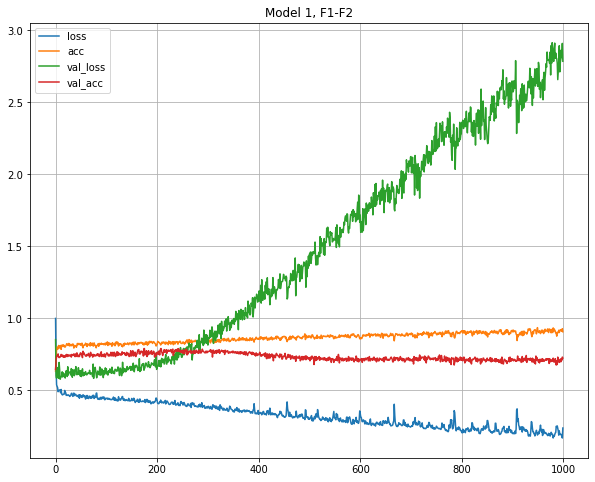

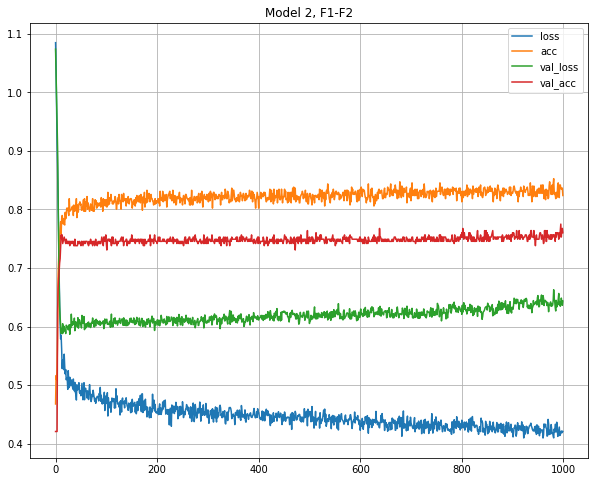

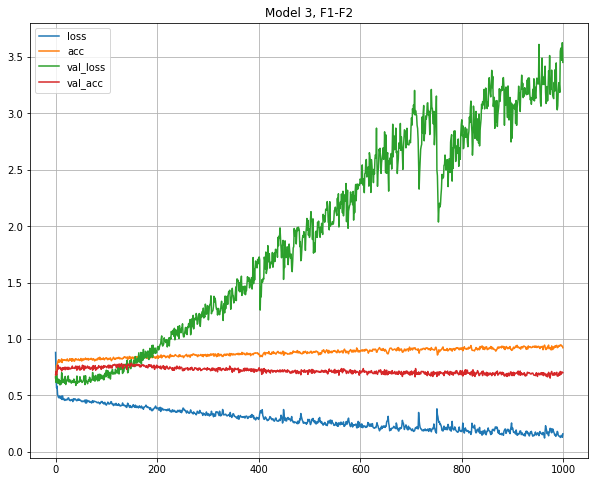

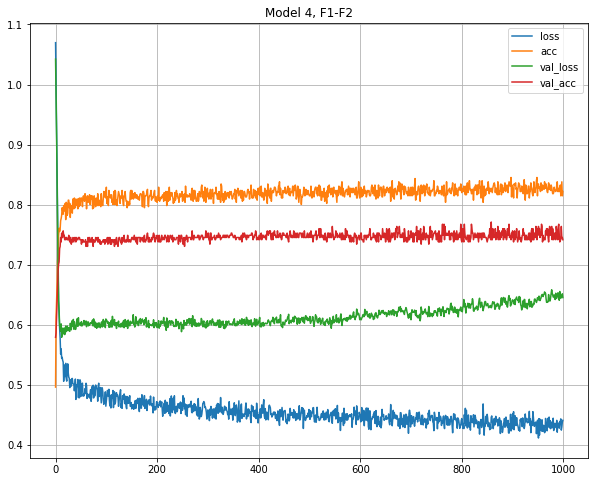

In [50]:
# Visualize the training results
plt.figure(figsize=(10,8))
plt.title('Model 1, F1-F2')
plt.plot(history1.history['loss'],label='loss')
plt.plot(history1.history['accuracy'],label='acc')
plt.plot(history1.history['val_loss'],label='val_loss')
plt.plot(history1.history['val_accuracy'],label='val_acc')
plt.grid()
plt.legend()
plt.show()

# Visualize the training results
plt.figure(figsize=(10,8))
plt.title('Model 2, F1-F2')
plt.plot(history2.history['loss'],label='loss')
plt.plot(history2.history['accuracy'],label='acc')
plt.plot(history2.history['val_loss'],label='val_loss')
plt.plot(history2.history['val_accuracy'],label='val_acc')
plt.grid()
plt.legend()
plt.show()

# Visualize the training results
plt.figure(figsize=(10,8))
plt.title('Model 3, F1-F2')
plt.plot(history3.history['loss'],label='loss')
plt.plot(history3.history['accuracy'],label='acc')
plt.plot(history3.history['val_loss'],label='val_loss')
plt.plot(history3.history['val_accuracy'],label='val_acc')
plt.grid()
plt.legend()
plt.show()

# Visualize the training results
plt.figure(figsize=(10,8))
plt.title('Model 4, F1-F2')
plt.plot(history4.history['loss'],label='loss')
plt.plot(history4.history['accuracy'],label='acc')
plt.plot(history4.history['val_loss'],label='val_loss')
plt.plot(history4.history['val_accuracy'],label='val_acc')
plt.grid()
plt.legend()
plt.show()

In [51]:
# Validation model
print('--------model 1,F1-F2-----------')
score = model1.evaluate(x_valid, y_valid, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])
print('-----------------------------------------------')

# Validation model
print('--------model 2, F1-F2-----------')
score = model2.evaluate(x_valid, y_valid, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])
print('-----------------------------------------------')
# Validation model
print('--------model 3, F1-F2-----------')
score = model3.evaluate(x_valid, y_valid, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])
print('-----------------------------------------------')
# Validation model
print('--------model 4, F1-F2-----------')
score = model4.evaluate(x_valid, y_valid, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])
print('-----------------------------------------------')

--------model 1,F1-F2-----------
Validation loss: 2.7858386039733887
Validation accuracy: 0.723247230052948
-----------------------------------------------
--------model 2, F1-F2-----------
Validation loss: 0.6434600949287415
Validation accuracy: 0.7601476311683655
-----------------------------------------------
--------model 3, F1-F2-----------
Validation loss: 3.4530701637268066
Validation accuracy: 0.7011070251464844
-----------------------------------------------
--------model 4, F1-F2-----------
Validation loss: 3.4530701637268066
Validation accuracy: 0.7011070251464844
-----------------------------------------------


In [52]:
# Features to use
features = ["F1","F2","F3","F4"]

# Extract features
x_train_raw = train[features]
x_valid_raw = valid[features]

# Normalize to zero mean
x_mean = np.mean(x_train_raw)
x_std = np.std(x_train_raw)
x_train = x_train_raw - x_mean
x_valid = x_valid_raw - x_mean

# Fix labels. The "to_categorical" call maps integer labels {n}
# to a vector of length N (number of labels) with a one in position n
y_train = keras.utils.to_categorical(trainlabels, len(phonemes))
y_valid = keras.utils.to_categorical(validlabels, len(phonemes))

# Create a model with a single hidden layer
model1 = keras.Sequential([
    keras.layers.Dense(28*28, activation=tf.nn.relu, input_dim=x_train.shape[1]),
    keras.layers.Dense(32, activation=tf.nn.relu, input_dim=28*28),
    keras.layers.Dense(512, activation=tf.nn.relu, input_dim=32),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation=tf.nn.relu, input_dim=512),
    keras.layers.Dense(len(phonemes), activation=tf.nn.softmax)
])
print('--------------Model 1---------------')
model1.summary()

# Train the model
model1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history1 = model1.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                    epochs=1000, batch_size=32, verbose=True)

# Create a model with a single hidden layer
model2 = keras.Sequential([
    keras.layers.Dense(64, activation=tf.nn.relu, input_dim=x_train.shape[1]),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(32, activation=tf.nn.relu, input_dim=64),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(16, activation=tf.nn.relu, input_dim=32),
    keras.layers.Dense(len(phonemes), activation=tf.nn.softmax)
])

print('--------------Model 2---------------')
model2.summary()

# Train the model
model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history2 = model2.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                    epochs=1000, batch_size=32, verbose=True)

# Create a model with a single hidden layer
model3 = keras.Sequential([
    keras.layers.Dense(256, activation=tf.nn.relu, input_dim=x_train.shape[1]),
    keras.layers.Dense(512, activation=tf.nn.relu, input_dim=256),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(512, activation=tf.nn.relu, input_dim=512),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation=tf.nn.relu, input_dim=512),
    keras.layers.Dense(len(phonemes), activation=tf.nn.softmax)
])

print('--------------Model 3---------------')
model3.summary()

# Train the model
model3.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history3 = model3.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                    epochs=1000, batch_size=32, verbose=True)

# Create a model with a single hidden layer
model4 = keras.Sequential([
    keras.layers.Dense(64, activation=tf.nn.relu, input_dim=x_train.shape[1]),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(len(phonemes), activation=tf.nn.softmax),
])

print('--------------Model 4---------------')
model4.summary()

# Train the model
model4.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history4 = model4.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                    epochs=1000, batch_size=32, verbose=True)

--------------Model 1---------------
Model: "sequential_46"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_167 (Dense)            (None, 784)               3920      
_________________________________________________________________
dense_168 (Dense)            (None, 32)                25120     
_________________________________________________________________
dense_169 (Dense)            (None, 512)               16896     
_________________________________________________________________
dropout_59 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_170 (Dense)            (None, 64)                32832     
_________________________________________________________________
dense_171 (Dense)            (None, 3)                 195       
Total params: 78,963
Trainable params: 78,963
Non-trainable params: 0
____________

18/18 [==============================] - 0s 2ms/step - loss: 0.3374 - accuracy: 0.8669 - val_loss: 0.7596 - val_accuracy: 0.7417
Epoch 51/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.3558 - accuracy: 0.8579 - val_loss: 0.7627 - val_accuracy: 0.7601
Epoch 52/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.3497 - accuracy: 0.8651 - val_loss: 0.7232 - val_accuracy: 0.7601
Epoch 53/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.3275 - accuracy: 0.8669 - val_loss: 0.7606 - val_accuracy: 0.7454
Epoch 54/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.3307 - accuracy: 0.8561 - val_loss: 0.8649 - val_accuracy: 0.7343
Epoch 55/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.3681 - accuracy: 0.8579 - val_loss: 0.7893 - val_accuracy: 0.7380
Epoch 56/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.3240 - accuracy: 0.8795 - val_loss: 0.7707 - val_accuracy: 0.7749
Epoch 57/1000

18/18 [==============================] - 0s 2ms/step - loss: 0.2541 - accuracy: 0.9119 - val_loss: 0.9745 - val_accuracy: 0.7454
Epoch 108/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.2684 - accuracy: 0.9065 - val_loss: 1.0002 - val_accuracy: 0.7491
Epoch 109/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.2531 - accuracy: 0.8939 - val_loss: 1.0623 - val_accuracy: 0.7306
Epoch 110/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.2584 - accuracy: 0.8921 - val_loss: 1.0333 - val_accuracy: 0.7343
Epoch 111/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.2340 - accuracy: 0.9137 - val_loss: 1.0912 - val_accuracy: 0.7454
Epoch 112/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.2377 - accuracy: 0.9065 - val_loss: 1.0864 - val_accuracy: 0.7528
Epoch 113/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.2257 - accuracy: 0.9173 - val_loss: 1.1031 - val_accuracy: 0.7528
Epoch 1

Epoch 164/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.1785 - accuracy: 0.9460 - val_loss: 1.4895 - val_accuracy: 0.7380
Epoch 165/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.1656 - accuracy: 0.9496 - val_loss: 1.4724 - val_accuracy: 0.7454
Epoch 166/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.1679 - accuracy: 0.9388 - val_loss: 1.5599 - val_accuracy: 0.7417
Epoch 167/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.1909 - accuracy: 0.9299 - val_loss: 1.5993 - val_accuracy: 0.7491
Epoch 168/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.2007 - accuracy: 0.9227 - val_loss: 1.5591 - val_accuracy: 0.7269
Epoch 169/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.1806 - accuracy: 0.9353 - val_loss: 1.5708 - val_accuracy: 0.7306
Epoch 170/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.1546 - accuracy: 0.9460 - val_loss: 1.6449 - val_accuracy:

Epoch 221/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.1809 - accuracy: 0.9281 - val_loss: 2.2047 - val_accuracy: 0.7417
Epoch 222/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.1547 - accuracy: 0.9406 - val_loss: 2.1988 - val_accuracy: 0.7159
Epoch 223/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.1186 - accuracy: 0.9604 - val_loss: 2.2578 - val_accuracy: 0.7417
Epoch 224/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.1178 - accuracy: 0.9550 - val_loss: 2.3809 - val_accuracy: 0.7454
Epoch 225/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.1061 - accuracy: 0.9550 - val_loss: 2.3701 - val_accuracy: 0.7380
Epoch 226/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0970 - accuracy: 0.9604 - val_loss: 2.4081 - val_accuracy: 0.7380
Epoch 227/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0954 - accuracy: 0.9568 - val_loss: 2.4590 - val_accuracy:

Epoch 278/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0742 - accuracy: 0.9676 - val_loss: 3.0106 - val_accuracy: 0.7196
Epoch 279/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.0766 - accuracy: 0.9694 - val_loss: 3.2190 - val_accuracy: 0.7269
Epoch 280/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0841 - accuracy: 0.9622 - val_loss: 3.0981 - val_accuracy: 0.7122
Epoch 281/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0762 - accuracy: 0.9658 - val_loss: 3.1829 - val_accuracy: 0.7232
Epoch 282/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0694 - accuracy: 0.9640 - val_loss: 3.2241 - val_accuracy: 0.7159
Epoch 283/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0558 - accuracy: 0.9748 - val_loss: 3.3844 - val_accuracy: 0.7232
Epoch 284/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0516 - accuracy: 0.9820 - val_loss: 3.2348 - val_accuracy:

Epoch 335/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.1032 - accuracy: 0.9586 - val_loss: 3.4665 - val_accuracy: 0.7196
Epoch 336/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.1375 - accuracy: 0.9406 - val_loss: 3.3655 - val_accuracy: 0.7085
Epoch 337/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.0732 - accuracy: 0.9766 - val_loss: 3.3495 - val_accuracy: 0.7122
Epoch 338/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0510 - accuracy: 0.9820 - val_loss: 3.5394 - val_accuracy: 0.7048
Epoch 339/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0428 - accuracy: 0.9838 - val_loss: 3.5591 - val_accuracy: 0.7159
Epoch 340/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0458 - accuracy: 0.9910 - val_loss: 3.6430 - val_accuracy: 0.7159
Epoch 341/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.0540 - accuracy: 0.9766 - val_loss: 3.8281 - val_accuracy:

Epoch 392/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0723 - accuracy: 0.9730 - val_loss: 3.8819 - val_accuracy: 0.7159
Epoch 393/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.2553 - accuracy: 0.9209 - val_loss: 3.6367 - val_accuracy: 0.6863
Epoch 394/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.2419 - accuracy: 0.9191 - val_loss: 2.9240 - val_accuracy: 0.7306
Epoch 395/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.1593 - accuracy: 0.9442 - val_loss: 3.0885 - val_accuracy: 0.7269
Epoch 396/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0871 - accuracy: 0.9676 - val_loss: 3.5075 - val_accuracy: 0.7122
Epoch 397/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0739 - accuracy: 0.9748 - val_loss: 3.3994 - val_accuracy: 0.7122
Epoch 398/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0803 - accuracy: 0.9730 - val_loss: 3.7690 - val_accuracy:

Epoch 449/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0372 - accuracy: 0.9928 - val_loss: 4.5693 - val_accuracy: 0.7122
Epoch 450/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0238 - accuracy: 0.9910 - val_loss: 4.4717 - val_accuracy: 0.7159
Epoch 451/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0636 - accuracy: 0.9766 - val_loss: 4.3839 - val_accuracy: 0.7232
Epoch 452/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0495 - accuracy: 0.9838 - val_loss: 4.6065 - val_accuracy: 0.7159
Epoch 453/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0652 - accuracy: 0.9802 - val_loss: 4.5946 - val_accuracy: 0.7085
Epoch 454/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0579 - accuracy: 0.9820 - val_loss: 4.7239 - val_accuracy: 0.7122
Epoch 455/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.1249 - accuracy: 0.9622 - val_loss: 4.5905 - val_accuracy:

Epoch 506/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 5.5307 - val_accuracy: 0.7085
Epoch 507/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 5.4758 - val_accuracy: 0.7085
Epoch 508/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 5.5547 - val_accuracy: 0.7048
Epoch 509/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 5.4526 - val_accuracy: 0.7159
Epoch 510/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0049 - accuracy: 0.9982 - val_loss: 5.4649 - val_accuracy: 0.7159
Epoch 511/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 5.5032 - val_accuracy: 0.7196
Epoch 512/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.0202 - accuracy: 0.9946 - val_loss: 5.4805 - val_accuracy:

Epoch 563/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1149 - accuracy: 0.9676 - val_loss: 3.9707 - val_accuracy: 0.7122
Epoch 564/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1080 - accuracy: 0.9658 - val_loss: 4.0479 - val_accuracy: 0.7122
Epoch 565/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0649 - accuracy: 0.9730 - val_loss: 4.1733 - val_accuracy: 0.7085
Epoch 566/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.0659 - accuracy: 0.9730 - val_loss: 4.0688 - val_accuracy: 0.7232
Epoch 567/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0232 - accuracy: 0.9964 - val_loss: 3.6869 - val_accuracy: 0.7011
Epoch 568/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0241 - accuracy: 0.9946 - val_loss: 3.9344 - val_accuracy: 0.7048
Epoch 569/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.0247 - accuracy: 0.9946 - val_loss: 4.1200 - val_accuracy:

18/18 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 5.4158 - val_accuracy: 0.7048
Epoch 620/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 5.5019 - val_accuracy: 0.7085
Epoch 621/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 5.5267 - val_accuracy: 0.7085
Epoch 622/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 5.6869 - val_accuracy: 0.7048
Epoch 623/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.0048 - accuracy: 0.9982 - val_loss: 5.3423 - val_accuracy: 0.7085
Epoch 624/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0524 - accuracy: 0.9856 - val_loss: 5.4484 - val_accuracy: 0.7048
Epoch 625/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0683 - accuracy: 0.9784 - val_loss: 5.3176 - val_accuracy: 0.7269
Epoch 6

Epoch 676/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 4.6056 - val_accuracy: 0.7011
Epoch 677/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 4.5790 - val_accuracy: 0.7011
Epoch 678/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 4.6178 - val_accuracy: 0.7011
Epoch 679/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 4.6869 - val_accuracy: 0.7048
Epoch 680/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 4.6750 - val_accuracy: 0.7085
Epoch 681/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 4.6814 - val_accuracy: 0.7048
Epoch 682/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 4.7186 - val_accuracy:

Epoch 733/1000
18/18 [==============================] - 0s 2ms/step - loss: 8.0665e-04 - accuracy: 1.0000 - val_loss: 4.9692 - val_accuracy: 0.7011
Epoch 734/1000
18/18 [==============================] - 0s 1ms/step - loss: 8.2703e-04 - accuracy: 1.0000 - val_loss: 4.9759 - val_accuracy: 0.6974
Epoch 735/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 4.9372 - val_accuracy: 0.7011
Epoch 736/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.0055 - accuracy: 0.9982 - val_loss: 5.0414 - val_accuracy: 0.6974
Epoch 737/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0331 - accuracy: 0.9964 - val_loss: 4.7423 - val_accuracy: 0.6937
Epoch 738/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0249 - accuracy: 0.9964 - val_loss: 4.7863 - val_accuracy: 0.7011
Epoch 739/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0094 - accuracy: 0.9982 - val_loss: 4.8928 - val_a

Epoch 789/1000
18/18 [==============================] - 0s 2ms/step - loss: 4.0128e-04 - accuracy: 1.0000 - val_loss: 5.6813 - val_accuracy: 0.7048
Epoch 790/1000
18/18 [==============================] - 0s 1ms/step - loss: 4.0724e-04 - accuracy: 1.0000 - val_loss: 5.7064 - val_accuracy: 0.7048
Epoch 791/1000
18/18 [==============================] - 0s 2ms/step - loss: 3.9591e-04 - accuracy: 1.0000 - val_loss: 5.7392 - val_accuracy: 0.7048
Epoch 792/1000
18/18 [==============================] - 0s 2ms/step - loss: 7.3835e-04 - accuracy: 1.0000 - val_loss: 5.7297 - val_accuracy: 0.7048
Epoch 793/1000
18/18 [==============================] - 0s 1ms/step - loss: 3.4748e-04 - accuracy: 1.0000 - val_loss: 5.7424 - val_accuracy: 0.7122
Epoch 794/1000
18/18 [==============================] - 0s 2ms/step - loss: 3.1841e-04 - accuracy: 1.0000 - val_loss: 5.7849 - val_accuracy: 0.7085
Epoch 795/1000
18/18 [==============================] - 0s 2ms/step - loss: 2.3495e-04 - accuracy: 1.0000 - val_

18/18 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 4.2155 - val_accuracy: 0.7159
Epoch 846/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 4.2853 - val_accuracy: 0.7196
Epoch 847/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 4.2945 - val_accuracy: 0.7196
Epoch 848/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 4.3436 - val_accuracy: 0.7159
Epoch 849/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 4.3508 - val_accuracy: 0.7159
Epoch 850/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 4.3814 - val_accuracy: 0.7196
Epoch 851/1000
18/18 [==============================] - 0s 2ms/step - loss: 9.2339e-04 - accuracy: 1.0000 - val_loss: 4.4630 - val_accuracy: 0.7196
Epo

Epoch 902/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0313 - accuracy: 0.9928 - val_loss: 4.9665 - val_accuracy: 0.7085
Epoch 903/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0240 - accuracy: 0.9928 - val_loss: 4.6202 - val_accuracy: 0.7048
Epoch 904/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.0415 - accuracy: 0.9874 - val_loss: 4.8259 - val_accuracy: 0.7085
Epoch 905/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0893 - accuracy: 0.9784 - val_loss: 4.3411 - val_accuracy: 0.7085
Epoch 906/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.0618 - accuracy: 0.9712 - val_loss: 4.2946 - val_accuracy: 0.7011
Epoch 907/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.2433 - accuracy: 0.9388 - val_loss: 4.0656 - val_accuracy: 0.7085
Epoch 908/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.1995 - accuracy: 0.9424 - val_loss: 3.0836 - val_accuracy:

18/18 [==============================] - 0s 1ms/step - loss: 6.4245e-04 - accuracy: 1.0000 - val_loss: 5.2628 - val_accuracy: 0.6937
Epoch 959/1000
18/18 [==============================] - 0s 2ms/step - loss: 5.1936e-04 - accuracy: 1.0000 - val_loss: 5.2312 - val_accuracy: 0.6900
Epoch 960/1000
18/18 [==============================] - 0s 2ms/step - loss: 4.6169e-04 - accuracy: 1.0000 - val_loss: 5.2450 - val_accuracy: 0.6900
Epoch 961/1000
18/18 [==============================] - 0s 1ms/step - loss: 3.6151e-04 - accuracy: 1.0000 - val_loss: 5.2626 - val_accuracy: 0.6900
Epoch 962/1000
18/18 [==============================] - 0s 2ms/step - loss: 2.6651e-04 - accuracy: 1.0000 - val_loss: 5.2835 - val_accuracy: 0.6900
Epoch 963/1000
18/18 [==============================] - 0s 2ms/step - loss: 3.8822e-04 - accuracy: 1.0000 - val_loss: 5.3203 - val_accuracy: 0.6900
Epoch 964/1000
18/18 [==============================] - 0s 2ms/step - loss: 2.1408e-04 - accuracy: 1.0000 - val_loss: 5.3662 - 

18/18 [==============================] - 0s 1ms/step - loss: 0.8116 - accuracy: 0.7050 - val_loss: 0.7991 - val_accuracy: 0.6568
Epoch 7/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.7186 - accuracy: 0.6996 - val_loss: 0.7222 - val_accuracy: 0.6642
Epoch 8/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.6670 - accuracy: 0.6996 - val_loss: 0.6881 - val_accuracy: 0.6753
Epoch 9/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.6273 - accuracy: 0.7068 - val_loss: 0.6462 - val_accuracy: 0.6900
Epoch 10/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.6167 - accuracy: 0.7248 - val_loss: 0.6217 - val_accuracy: 0.7011
Epoch 11/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.5898 - accuracy: 0.7302 - val_loss: 0.6066 - val_accuracy: 0.7122
Epoch 12/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.5795 - accuracy: 0.7428 - val_loss: 0.5988 - val_accuracy: 0.7122
Epoch 13/1000
18

18/18 [==============================] - 0s 1ms/step - loss: 0.4418 - accuracy: 0.8273 - val_loss: 0.5930 - val_accuracy: 0.7528
Epoch 64/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4406 - accuracy: 0.8183 - val_loss: 0.6176 - val_accuracy: 0.7417
Epoch 65/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4424 - accuracy: 0.8255 - val_loss: 0.5917 - val_accuracy: 0.7528
Epoch 66/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4310 - accuracy: 0.8309 - val_loss: 0.6181 - val_accuracy: 0.7417
Epoch 67/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4468 - accuracy: 0.8309 - val_loss: 0.6057 - val_accuracy: 0.7454
Epoch 68/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4557 - accuracy: 0.8219 - val_loss: 0.6166 - val_accuracy: 0.7491
Epoch 69/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4297 - accuracy: 0.8381 - val_loss: 0.5996 - val_accuracy: 0.7454
Epoch 70/1000

18/18 [==============================] - 0s 1ms/step - loss: 0.3946 - accuracy: 0.8471 - val_loss: 0.6514 - val_accuracy: 0.7528
Epoch 121/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4034 - accuracy: 0.8381 - val_loss: 0.6233 - val_accuracy: 0.7565
Epoch 122/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4108 - accuracy: 0.8363 - val_loss: 0.6235 - val_accuracy: 0.7528
Epoch 123/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4016 - accuracy: 0.8399 - val_loss: 0.6126 - val_accuracy: 0.7565
Epoch 124/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4020 - accuracy: 0.8471 - val_loss: 0.6353 - val_accuracy: 0.7491
Epoch 125/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4095 - accuracy: 0.8255 - val_loss: 0.6141 - val_accuracy: 0.7601
Epoch 126/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4035 - accuracy: 0.8525 - val_loss: 0.6211 - val_accuracy: 0.7565
Epoch 1

Epoch 177/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3854 - accuracy: 0.8453 - val_loss: 0.6440 - val_accuracy: 0.7565
Epoch 178/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3671 - accuracy: 0.8597 - val_loss: 0.6519 - val_accuracy: 0.7565
Epoch 179/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3592 - accuracy: 0.8615 - val_loss: 0.6361 - val_accuracy: 0.7675
Epoch 180/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4137 - accuracy: 0.8381 - val_loss: 0.6537 - val_accuracy: 0.7565
Epoch 181/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3771 - accuracy: 0.8561 - val_loss: 0.6579 - val_accuracy: 0.7528
Epoch 182/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3900 - accuracy: 0.8525 - val_loss: 0.6355 - val_accuracy: 0.7565
Epoch 183/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4009 - accuracy: 0.8381 - val_loss: 0.6596 - val_accuracy:

Epoch 234/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3693 - accuracy: 0.8579 - val_loss: 0.6641 - val_accuracy: 0.7638
Epoch 235/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3716 - accuracy: 0.8615 - val_loss: 0.6631 - val_accuracy: 0.7675
Epoch 236/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3783 - accuracy: 0.8471 - val_loss: 0.6521 - val_accuracy: 0.7638
Epoch 237/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3676 - accuracy: 0.8525 - val_loss: 0.6641 - val_accuracy: 0.7565
Epoch 238/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3801 - accuracy: 0.8507 - val_loss: 0.6636 - val_accuracy: 0.7601
Epoch 239/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3765 - accuracy: 0.8561 - val_loss: 0.6673 - val_accuracy: 0.7601
Epoch 240/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3725 - accuracy: 0.8651 - val_loss: 0.6669 - val_accuracy:

Epoch 291/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3711 - accuracy: 0.8489 - val_loss: 0.6857 - val_accuracy: 0.7565
Epoch 292/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3723 - accuracy: 0.8507 - val_loss: 0.7130 - val_accuracy: 0.7454
Epoch 293/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3532 - accuracy: 0.8687 - val_loss: 0.7059 - val_accuracy: 0.7528
Epoch 294/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3661 - accuracy: 0.8651 - val_loss: 0.7054 - val_accuracy: 0.7565
Epoch 295/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3740 - accuracy: 0.8543 - val_loss: 0.7257 - val_accuracy: 0.7454
Epoch 296/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3761 - accuracy: 0.8507 - val_loss: 0.7103 - val_accuracy: 0.7528
Epoch 297/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3377 - accuracy: 0.8669 - val_loss: 0.6985 - val_accuracy:

Epoch 348/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3618 - accuracy: 0.8453 - val_loss: 0.7399 - val_accuracy: 0.7528
Epoch 349/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3376 - accuracy: 0.8669 - val_loss: 0.7285 - val_accuracy: 0.7528
Epoch 350/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3396 - accuracy: 0.8705 - val_loss: 0.7379 - val_accuracy: 0.7491
Epoch 351/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3470 - accuracy: 0.8723 - val_loss: 0.7466 - val_accuracy: 0.7528
Epoch 352/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3435 - accuracy: 0.8651 - val_loss: 0.7580 - val_accuracy: 0.7528
Epoch 353/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3369 - accuracy: 0.8723 - val_loss: 0.7480 - val_accuracy: 0.7565
Epoch 354/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3210 - accuracy: 0.8759 - val_loss: 0.7379 - val_accuracy:

Epoch 405/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3306 - accuracy: 0.8723 - val_loss: 0.7874 - val_accuracy: 0.7638
Epoch 406/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3240 - accuracy: 0.8705 - val_loss: 0.7883 - val_accuracy: 0.7675
Epoch 407/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3489 - accuracy: 0.8597 - val_loss: 0.7839 - val_accuracy: 0.7601
Epoch 408/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3329 - accuracy: 0.8723 - val_loss: 0.7901 - val_accuracy: 0.7565
Epoch 409/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3461 - accuracy: 0.8525 - val_loss: 0.7710 - val_accuracy: 0.7638
Epoch 410/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3272 - accuracy: 0.8705 - val_loss: 0.7860 - val_accuracy: 0.7528
Epoch 411/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3284 - accuracy: 0.8795 - val_loss: 0.7670 - val_accuracy:

Epoch 462/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3404 - accuracy: 0.8669 - val_loss: 0.8077 - val_accuracy: 0.7601
Epoch 463/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3079 - accuracy: 0.8813 - val_loss: 0.7984 - val_accuracy: 0.7601
Epoch 464/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3109 - accuracy: 0.8741 - val_loss: 0.7891 - val_accuracy: 0.7528
Epoch 465/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2999 - accuracy: 0.8759 - val_loss: 0.8102 - val_accuracy: 0.7491
Epoch 466/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3424 - accuracy: 0.8723 - val_loss: 0.8221 - val_accuracy: 0.7565
Epoch 467/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3262 - accuracy: 0.8777 - val_loss: 0.7997 - val_accuracy: 0.7565
Epoch 468/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3329 - accuracy: 0.8543 - val_loss: 0.7960 - val_accuracy:

Epoch 519/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3005 - accuracy: 0.8867 - val_loss: 0.8466 - val_accuracy: 0.7491
Epoch 520/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3234 - accuracy: 0.8813 - val_loss: 0.8526 - val_accuracy: 0.7528
Epoch 521/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3301 - accuracy: 0.8705 - val_loss: 0.8199 - val_accuracy: 0.7528
Epoch 522/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3226 - accuracy: 0.8705 - val_loss: 0.8222 - val_accuracy: 0.7528
Epoch 523/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3143 - accuracy: 0.8705 - val_loss: 0.8256 - val_accuracy: 0.7491
Epoch 524/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3004 - accuracy: 0.8939 - val_loss: 0.8441 - val_accuracy: 0.7454
Epoch 525/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3055 - accuracy: 0.8885 - val_loss: 0.8297 - val_accuracy:

Epoch 576/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2993 - accuracy: 0.8759 - val_loss: 0.8793 - val_accuracy: 0.7491
Epoch 577/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2915 - accuracy: 0.8795 - val_loss: 0.9038 - val_accuracy: 0.7565
Epoch 578/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2984 - accuracy: 0.8885 - val_loss: 0.8840 - val_accuracy: 0.7528
Epoch 579/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3099 - accuracy: 0.8813 - val_loss: 0.8889 - val_accuracy: 0.7528
Epoch 580/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3019 - accuracy: 0.8849 - val_loss: 0.8947 - val_accuracy: 0.7565
Epoch 581/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3026 - accuracy: 0.8921 - val_loss: 0.8906 - val_accuracy: 0.7528
Epoch 582/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2939 - accuracy: 0.8831 - val_loss: 0.8833 - val_accuracy:

Epoch 633/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2955 - accuracy: 0.8777 - val_loss: 0.9305 - val_accuracy: 0.7417
Epoch 634/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2886 - accuracy: 0.8831 - val_loss: 0.9242 - val_accuracy: 0.7417
Epoch 635/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2840 - accuracy: 0.8849 - val_loss: 0.9161 - val_accuracy: 0.7454
Epoch 636/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3086 - accuracy: 0.8885 - val_loss: 0.9474 - val_accuracy: 0.7491
Epoch 637/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2757 - accuracy: 0.8975 - val_loss: 0.9361 - val_accuracy: 0.7491
Epoch 638/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2827 - accuracy: 0.8975 - val_loss: 0.9476 - val_accuracy: 0.7454
Epoch 639/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2834 - accuracy: 0.8939 - val_loss: 0.9233 - val_accuracy:

Epoch 690/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2923 - accuracy: 0.8939 - val_loss: 0.9764 - val_accuracy: 0.7528
Epoch 691/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2927 - accuracy: 0.8867 - val_loss: 0.9540 - val_accuracy: 0.7454
Epoch 692/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2766 - accuracy: 0.8867 - val_loss: 0.9612 - val_accuracy: 0.7454
Epoch 693/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2910 - accuracy: 0.8885 - val_loss: 0.9731 - val_accuracy: 0.7417
Epoch 694/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2781 - accuracy: 0.8939 - val_loss: 0.9691 - val_accuracy: 0.7454
Epoch 695/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2859 - accuracy: 0.8759 - val_loss: 0.9761 - val_accuracy: 0.7491
Epoch 696/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2646 - accuracy: 0.8903 - val_loss: 0.9875 - val_accuracy:

Epoch 747/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2753 - accuracy: 0.8867 - val_loss: 1.0022 - val_accuracy: 0.7417
Epoch 748/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2657 - accuracy: 0.9011 - val_loss: 1.0148 - val_accuracy: 0.7491
Epoch 749/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2853 - accuracy: 0.8813 - val_loss: 1.0051 - val_accuracy: 0.7491
Epoch 750/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2694 - accuracy: 0.8831 - val_loss: 1.0001 - val_accuracy: 0.7417
Epoch 751/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2862 - accuracy: 0.8795 - val_loss: 0.9770 - val_accuracy: 0.7454
Epoch 752/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2716 - accuracy: 0.8939 - val_loss: 1.0088 - val_accuracy: 0.7380
Epoch 753/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2782 - accuracy: 0.8885 - val_loss: 1.0103 - val_accuracy:

Epoch 804/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2660 - accuracy: 0.8957 - val_loss: 1.0357 - val_accuracy: 0.7491
Epoch 805/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2535 - accuracy: 0.8975 - val_loss: 1.0328 - val_accuracy: 0.7380
Epoch 806/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2887 - accuracy: 0.8741 - val_loss: 1.0428 - val_accuracy: 0.7380
Epoch 807/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2755 - accuracy: 0.8921 - val_loss: 1.0265 - val_accuracy: 0.7454
Epoch 808/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2616 - accuracy: 0.8975 - val_loss: 1.0355 - val_accuracy: 0.7454
Epoch 809/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2574 - accuracy: 0.8939 - val_loss: 1.0455 - val_accuracy: 0.7454
Epoch 810/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2554 - accuracy: 0.9011 - val_loss: 1.0339 - val_accuracy:

Epoch 861/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2740 - accuracy: 0.9047 - val_loss: 1.0596 - val_accuracy: 0.7454
Epoch 862/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2388 - accuracy: 0.9083 - val_loss: 1.0883 - val_accuracy: 0.7565
Epoch 863/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2667 - accuracy: 0.8831 - val_loss: 1.0638 - val_accuracy: 0.7417
Epoch 864/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2688 - accuracy: 0.8903 - val_loss: 1.0411 - val_accuracy: 0.7454
Epoch 865/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2479 - accuracy: 0.9047 - val_loss: 1.0354 - val_accuracy: 0.7417
Epoch 866/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2543 - accuracy: 0.9119 - val_loss: 1.0433 - val_accuracy: 0.7343
Epoch 867/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2816 - accuracy: 0.8939 - val_loss: 1.0332 - val_accuracy:

Epoch 918/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2429 - accuracy: 0.9029 - val_loss: 1.1049 - val_accuracy: 0.7491
Epoch 919/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2273 - accuracy: 0.9065 - val_loss: 1.1158 - val_accuracy: 0.7601
Epoch 920/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2507 - accuracy: 0.9047 - val_loss: 1.1172 - val_accuracy: 0.7528
Epoch 921/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2619 - accuracy: 0.8975 - val_loss: 1.1302 - val_accuracy: 0.7454
Epoch 922/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2612 - accuracy: 0.8849 - val_loss: 1.1074 - val_accuracy: 0.7417
Epoch 923/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2280 - accuracy: 0.9083 - val_loss: 1.1158 - val_accuracy: 0.7528
Epoch 924/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2451 - accuracy: 0.9101 - val_loss: 1.1314 - val_accuracy:

Epoch 975/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2395 - accuracy: 0.9029 - val_loss: 1.1733 - val_accuracy: 0.7417
Epoch 976/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2495 - accuracy: 0.9029 - val_loss: 1.1641 - val_accuracy: 0.7343
Epoch 977/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2364 - accuracy: 0.9011 - val_loss: 1.1915 - val_accuracy: 0.7417
Epoch 978/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2592 - accuracy: 0.9029 - val_loss: 1.1711 - val_accuracy: 0.7380
Epoch 979/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2432 - accuracy: 0.8975 - val_loss: 1.1625 - val_accuracy: 0.7454
Epoch 980/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2538 - accuracy: 0.9083 - val_loss: 1.1843 - val_accuracy: 0.7306
Epoch 981/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2433 - accuracy: 0.8867 - val_loss: 1.1794 - val_accuracy:

18/18 [==============================] - 0s 2ms/step - loss: 0.3606 - accuracy: 0.8597 - val_loss: 0.7448 - val_accuracy: 0.7269
Epoch 23/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4211 - accuracy: 0.8201 - val_loss: 0.6453 - val_accuracy: 0.7491
Epoch 24/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.3730 - accuracy: 0.8489 - val_loss: 0.7021 - val_accuracy: 0.7417
Epoch 25/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.3989 - accuracy: 0.8435 - val_loss: 0.6839 - val_accuracy: 0.7565
Epoch 26/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.3640 - accuracy: 0.8687 - val_loss: 0.6714 - val_accuracy: 0.7638
Epoch 27/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.3334 - accuracy: 0.8777 - val_loss: 0.6566 - val_accuracy: 0.7712
Epoch 28/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.3620 - accuracy: 0.8525 - val_loss: 0.6670 - val_accuracy: 0.7491
Epoch 29/1000

18/18 [==============================] - 0s 2ms/step - loss: 0.2202 - accuracy: 0.9155 - val_loss: 1.2191 - val_accuracy: 0.7417
Epoch 80/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.2246 - accuracy: 0.9101 - val_loss: 1.1789 - val_accuracy: 0.7380
Epoch 81/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.2128 - accuracy: 0.9227 - val_loss: 1.2725 - val_accuracy: 0.7528
Epoch 82/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.2029 - accuracy: 0.9191 - val_loss: 1.2396 - val_accuracy: 0.7417
Epoch 83/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.1976 - accuracy: 0.9281 - val_loss: 1.2420 - val_accuracy: 0.7491
Epoch 84/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.2130 - accuracy: 0.9065 - val_loss: 1.3613 - val_accuracy: 0.7528
Epoch 85/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.1829 - accuracy: 0.9173 - val_loss: 1.3961 - val_accuracy: 0.7417
Epoch 86/1000

18/18 [==============================] - 0s 2ms/step - loss: 0.1661 - accuracy: 0.9442 - val_loss: 2.0974 - val_accuracy: 0.7343
Epoch 137/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.1553 - accuracy: 0.9263 - val_loss: 2.1287 - val_accuracy: 0.7417
Epoch 138/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.1456 - accuracy: 0.9353 - val_loss: 1.9878 - val_accuracy: 0.7380
Epoch 139/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.1455 - accuracy: 0.9460 - val_loss: 2.1108 - val_accuracy: 0.7380
Epoch 140/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.1978 - accuracy: 0.9137 - val_loss: 2.0843 - val_accuracy: 0.7085
Epoch 141/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.1640 - accuracy: 0.9299 - val_loss: 1.9018 - val_accuracy: 0.7417
Epoch 142/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.1206 - accuracy: 0.9478 - val_loss: 1.9638 - val_accuracy: 0.7417
Epoch 1

Epoch 193/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0546 - accuracy: 0.9676 - val_loss: 3.3085 - val_accuracy: 0.7232
Epoch 194/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0654 - accuracy: 0.9712 - val_loss: 3.5356 - val_accuracy: 0.7380
Epoch 195/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0709 - accuracy: 0.9694 - val_loss: 3.2800 - val_accuracy: 0.7491
Epoch 196/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0559 - accuracy: 0.9766 - val_loss: 3.4184 - val_accuracy: 0.7232
Epoch 197/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0631 - accuracy: 0.9784 - val_loss: 3.4782 - val_accuracy: 0.7269
Epoch 198/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0409 - accuracy: 0.9874 - val_loss: 3.4011 - val_accuracy: 0.7380
Epoch 199/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0599 - accuracy: 0.9658 - val_loss: 3.4398 - val_accuracy:

Epoch 250/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0343 - accuracy: 0.9874 - val_loss: 3.2485 - val_accuracy: 0.7122
Epoch 251/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0386 - accuracy: 0.9910 - val_loss: 3.2923 - val_accuracy: 0.7232
Epoch 252/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0385 - accuracy: 0.9856 - val_loss: 3.3062 - val_accuracy: 0.7306
Epoch 253/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0289 - accuracy: 0.9892 - val_loss: 3.3083 - val_accuracy: 0.7454
Epoch 254/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0300 - accuracy: 0.9892 - val_loss: 3.4268 - val_accuracy: 0.7269
Epoch 255/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0339 - accuracy: 0.9856 - val_loss: 3.6570 - val_accuracy: 0.7122
Epoch 256/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0259 - accuracy: 0.9928 - val_loss: 3.5053 - val_accuracy:

Epoch 307/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0228 - accuracy: 0.9928 - val_loss: 4.2122 - val_accuracy: 0.7196
Epoch 308/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0305 - accuracy: 0.9874 - val_loss: 4.0808 - val_accuracy: 0.7380
Epoch 309/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0986 - accuracy: 0.9658 - val_loss: 4.0050 - val_accuracy: 0.7085
Epoch 310/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0816 - accuracy: 0.9766 - val_loss: 3.4804 - val_accuracy: 0.7232
Epoch 311/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0474 - accuracy: 0.9874 - val_loss: 3.6086 - val_accuracy: 0.7380
Epoch 312/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0388 - accuracy: 0.9838 - val_loss: 3.6578 - val_accuracy: 0.7380
Epoch 313/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0568 - accuracy: 0.9802 - val_loss: 3.6684 - val_accuracy:

Epoch 364/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0196 - accuracy: 0.9928 - val_loss: 4.1380 - val_accuracy: 0.7196
Epoch 365/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0164 - accuracy: 0.9982 - val_loss: 4.2588 - val_accuracy: 0.7343
Epoch 366/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0264 - accuracy: 0.9892 - val_loss: 4.0198 - val_accuracy: 0.7306
Epoch 367/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0255 - accuracy: 0.9892 - val_loss: 4.4522 - val_accuracy: 0.7306
Epoch 368/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0560 - accuracy: 0.9874 - val_loss: 3.9690 - val_accuracy: 0.7232
Epoch 369/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0281 - accuracy: 0.9892 - val_loss: 3.8445 - val_accuracy: 0.7232
Epoch 370/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0124 - accuracy: 0.9946 - val_loss: 4.0015 - val_accuracy:

Epoch 421/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0149 - accuracy: 0.9946 - val_loss: 3.4705 - val_accuracy: 0.7343
Epoch 422/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0146 - accuracy: 0.9946 - val_loss: 3.6735 - val_accuracy: 0.7269
Epoch 423/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0183 - accuracy: 0.9910 - val_loss: 3.7241 - val_accuracy: 0.7306
Epoch 424/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0084 - accuracy: 0.9982 - val_loss: 3.7377 - val_accuracy: 0.7269
Epoch 425/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 3.7513 - val_accuracy: 0.7343
Epoch 426/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0064 - accuracy: 1.0000 - val_loss: 3.6840 - val_accuracy: 0.7417
Epoch 427/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0140 - accuracy: 0.9964 - val_loss: 3.7959 - val_accuracy:

Epoch 478/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 4.1553 - val_accuracy: 0.7343
Epoch 479/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 4.1976 - val_accuracy: 0.7306
Epoch 480/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0069 - accuracy: 0.9964 - val_loss: 4.4053 - val_accuracy: 0.7343
Epoch 481/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0760 - accuracy: 0.9838 - val_loss: 4.0851 - val_accuracy: 0.7306
Epoch 482/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0250 - accuracy: 0.9874 - val_loss: 4.0811 - val_accuracy: 0.7122
Epoch 483/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0721 - accuracy: 0.9712 - val_loss: 3.7749 - val_accuracy: 0.7343
Epoch 484/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0992 - accuracy: 0.9712 - val_loss: 3.5636 - val_accuracy:

Epoch 535/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0113 - accuracy: 0.9982 - val_loss: 4.5683 - val_accuracy: 0.7196
Epoch 536/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0077 - accuracy: 0.9982 - val_loss: 4.3391 - val_accuracy: 0.7269
Epoch 537/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0043 - accuracy: 0.9982 - val_loss: 4.4103 - val_accuracy: 0.7306
Epoch 538/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0092 - accuracy: 0.9946 - val_loss: 4.4554 - val_accuracy: 0.7232
Epoch 539/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0279 - accuracy: 0.9910 - val_loss: 4.5904 - val_accuracy: 0.7196
Epoch 540/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0097 - accuracy: 0.9982 - val_loss: 4.6427 - val_accuracy: 0.7343
Epoch 541/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0039 - accuracy: 0.9982 - val_loss: 4.6625 - val_accuracy:

Epoch 592/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0623 - accuracy: 0.9838 - val_loss: 3.1331 - val_accuracy: 0.7159
Epoch 593/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0376 - accuracy: 0.9910 - val_loss: 3.2169 - val_accuracy: 0.7122
Epoch 594/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0165 - accuracy: 0.9964 - val_loss: 3.2411 - val_accuracy: 0.7196
Epoch 595/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0119 - accuracy: 0.9964 - val_loss: 3.4017 - val_accuracy: 0.7122
Epoch 596/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0144 - accuracy: 0.9928 - val_loss: 3.2587 - val_accuracy: 0.7232
Epoch 597/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 3.5462 - val_accuracy: 0.7196
Epoch 598/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0068 - accuracy: 0.9982 - val_loss: 3.5259 - val_accuracy:

Epoch 649/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 4.1598 - val_accuracy: 0.7417
Epoch 650/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0122 - accuracy: 0.9964 - val_loss: 4.2939 - val_accuracy: 0.7306
Epoch 651/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0693 - accuracy: 0.9820 - val_loss: 4.3079 - val_accuracy: 0.7232
Epoch 652/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.1135 - accuracy: 0.9784 - val_loss: 3.4456 - val_accuracy: 0.7343
Epoch 653/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0747 - accuracy: 0.9784 - val_loss: 3.2937 - val_accuracy: 0.7269
Epoch 654/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0340 - accuracy: 0.9946 - val_loss: 2.9533 - val_accuracy: 0.7528
Epoch 655/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0409 - accuracy: 0.9874 - val_loss: 3.2951 - val_accuracy:

Epoch 706/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0256 - accuracy: 0.9928 - val_loss: 4.6480 - val_accuracy: 0.7232
Epoch 707/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0339 - accuracy: 0.9928 - val_loss: 4.3429 - val_accuracy: 0.7343
Epoch 708/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0183 - accuracy: 0.9964 - val_loss: 4.3845 - val_accuracy: 0.7343
Epoch 709/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0042 - accuracy: 0.9982 - val_loss: 4.5232 - val_accuracy: 0.7306
Epoch 710/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0132 - accuracy: 0.9982 - val_loss: 4.2168 - val_accuracy: 0.7343
Epoch 711/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 4.3765 - val_accuracy: 0.7343
Epoch 712/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0121 - accuracy: 0.9964 - val_loss: 4.5623 - val_accuracy:

Epoch 763/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0173 - accuracy: 0.9964 - val_loss: 3.8079 - val_accuracy: 0.7306
Epoch 764/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0303 - accuracy: 0.9910 - val_loss: 3.8789 - val_accuracy: 0.7122
Epoch 765/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0131 - accuracy: 0.9982 - val_loss: 3.8216 - val_accuracy: 0.7196
Epoch 766/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0163 - accuracy: 0.9928 - val_loss: 4.0208 - val_accuracy: 0.7306
Epoch 767/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0155 - accuracy: 0.9946 - val_loss: 3.9052 - val_accuracy: 0.7417
Epoch 768/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0088 - accuracy: 0.9982 - val_loss: 3.8847 - val_accuracy: 0.7380
Epoch 769/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0064 - accuracy: 0.9982 - val_loss: 4.1006 - val_accuracy:

Epoch 820/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0109 - accuracy: 0.9964 - val_loss: 4.2064 - val_accuracy: 0.7343
Epoch 821/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0098 - accuracy: 0.9964 - val_loss: 4.1424 - val_accuracy: 0.7306
Epoch 822/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0112 - accuracy: 0.9964 - val_loss: 4.3084 - val_accuracy: 0.7343
Epoch 823/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 4.4271 - val_accuracy: 0.7196
Epoch 824/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0205 - accuracy: 0.9964 - val_loss: 4.1862 - val_accuracy: 0.7269
Epoch 825/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0056 - accuracy: 0.9982 - val_loss: 4.4021 - val_accuracy: 0.7306
Epoch 826/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 4.3461 - val_accuracy:

18/18 [==============================] - 0s 2ms/step - loss: 0.0808 - accuracy: 0.9838 - val_loss: 3.9002 - val_accuracy: 0.7159
Epoch 877/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0531 - accuracy: 0.9838 - val_loss: 3.5993 - val_accuracy: 0.7085
Epoch 878/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0310 - accuracy: 0.9946 - val_loss: 3.6757 - val_accuracy: 0.7085
Epoch 879/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0298 - accuracy: 0.9928 - val_loss: 3.4197 - val_accuracy: 0.7232
Epoch 880/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0079 - accuracy: 1.0000 - val_loss: 3.6833 - val_accuracy: 0.7122
Epoch 881/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0063 - accuracy: 0.9982 - val_loss: 3.7499 - val_accuracy: 0.7159
Epoch 882/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0063 - accuracy: 0.9964 - val_loss: 4.1137 - val_accuracy: 0.7159
Epoch 8

Epoch 933/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0092 - accuracy: 0.9982 - val_loss: 3.9953 - val_accuracy: 0.7122
Epoch 934/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0101 - accuracy: 0.9964 - val_loss: 4.2568 - val_accuracy: 0.7048
Epoch 935/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0118 - accuracy: 0.9982 - val_loss: 4.0515 - val_accuracy: 0.7122
Epoch 936/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0122 - accuracy: 0.9928 - val_loss: 4.4669 - val_accuracy: 0.7048
Epoch 937/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0963 - accuracy: 0.9838 - val_loss: 3.9821 - val_accuracy: 0.7085
Epoch 938/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.1113 - accuracy: 0.9766 - val_loss: 3.2721 - val_accuracy: 0.7048
Epoch 939/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0799 - accuracy: 0.9730 - val_loss: 3.4383 - val_accuracy:

18/18 [==============================] - 0s 2ms/step - loss: 0.0123 - accuracy: 0.9982 - val_loss: 4.9363 - val_accuracy: 0.7122
Epoch 990/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0036 - accuracy: 0.9982 - val_loss: 5.1380 - val_accuracy: 0.7085
Epoch 991/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0096 - accuracy: 0.9946 - val_loss: 5.0668 - val_accuracy: 0.7196
Epoch 992/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0056 - accuracy: 0.9982 - val_loss: 5.1159 - val_accuracy: 0.7196
Epoch 993/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0153 - accuracy: 0.9946 - val_loss: 4.7075 - val_accuracy: 0.7159
Epoch 994/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0129 - accuracy: 0.9982 - val_loss: 4.7731 - val_accuracy: 0.7159
Epoch 995/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0083 - accuracy: 0.9982 - val_loss: 4.6509 - val_accuracy: 0.7196
Epoch 9

18/18 [==============================] - 0s 1ms/step - loss: 0.4980 - accuracy: 0.8040 - val_loss: 0.5966 - val_accuracy: 0.7491
Epoch 40/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4897 - accuracy: 0.8201 - val_loss: 0.5797 - val_accuracy: 0.7491
Epoch 41/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4617 - accuracy: 0.8076 - val_loss: 0.5851 - val_accuracy: 0.7417
Epoch 42/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4569 - accuracy: 0.8165 - val_loss: 0.5874 - val_accuracy: 0.7417
Epoch 43/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4834 - accuracy: 0.8147 - val_loss: 0.5935 - val_accuracy: 0.7417
Epoch 44/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4641 - accuracy: 0.8040 - val_loss: 0.5870 - val_accuracy: 0.7454
Epoch 45/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4663 - accuracy: 0.8094 - val_loss: 0.5853 - val_accuracy: 0.7454
Epoch 46/1000

18/18 [==============================] - 0s 1ms/step - loss: 0.4399 - accuracy: 0.8381 - val_loss: 0.6155 - val_accuracy: 0.7454
Epoch 97/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4422 - accuracy: 0.8183 - val_loss: 0.6002 - val_accuracy: 0.7454
Epoch 98/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4266 - accuracy: 0.8381 - val_loss: 0.6066 - val_accuracy: 0.7417
Epoch 99/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4421 - accuracy: 0.8381 - val_loss: 0.5989 - val_accuracy: 0.7417
Epoch 100/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4329 - accuracy: 0.8309 - val_loss: 0.5958 - val_accuracy: 0.7454
Epoch 101/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4363 - accuracy: 0.8219 - val_loss: 0.5955 - val_accuracy: 0.7454
Epoch 102/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4682 - accuracy: 0.8237 - val_loss: 0.5961 - val_accuracy: 0.7454
Epoch 103/

18/18 [==============================] - 0s 1ms/step - loss: 0.4053 - accuracy: 0.8399 - val_loss: 0.6054 - val_accuracy: 0.7528
Epoch 154/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4237 - accuracy: 0.8363 - val_loss: 0.6029 - val_accuracy: 0.7565
Epoch 155/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4343 - accuracy: 0.8309 - val_loss: 0.6061 - val_accuracy: 0.7601
Epoch 156/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4128 - accuracy: 0.8363 - val_loss: 0.6084 - val_accuracy: 0.7565
Epoch 157/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4293 - accuracy: 0.8165 - val_loss: 0.5977 - val_accuracy: 0.7528
Epoch 158/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4365 - accuracy: 0.8273 - val_loss: 0.6030 - val_accuracy: 0.7491
Epoch 159/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4193 - accuracy: 0.8345 - val_loss: 0.6096 - val_accuracy: 0.7417
Epoch 1

Epoch 210/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4174 - accuracy: 0.8363 - val_loss: 0.6282 - val_accuracy: 0.7491
Epoch 211/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4087 - accuracy: 0.8345 - val_loss: 0.6226 - val_accuracy: 0.7454
Epoch 212/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4106 - accuracy: 0.8435 - val_loss: 0.6227 - val_accuracy: 0.7380
Epoch 213/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4038 - accuracy: 0.8381 - val_loss: 0.6329 - val_accuracy: 0.7380
Epoch 214/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4233 - accuracy: 0.8291 - val_loss: 0.6226 - val_accuracy: 0.7380
Epoch 215/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4068 - accuracy: 0.8345 - val_loss: 0.6285 - val_accuracy: 0.7380
Epoch 216/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4020 - accuracy: 0.8327 - val_loss: 0.6328 - val_accuracy:

Epoch 267/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3936 - accuracy: 0.8399 - val_loss: 0.6371 - val_accuracy: 0.7528
Epoch 268/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3947 - accuracy: 0.8381 - val_loss: 0.6264 - val_accuracy: 0.7675
Epoch 269/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3941 - accuracy: 0.8435 - val_loss: 0.6233 - val_accuracy: 0.7528
Epoch 270/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3744 - accuracy: 0.8489 - val_loss: 0.6307 - val_accuracy: 0.7454
Epoch 271/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3941 - accuracy: 0.8471 - val_loss: 0.6525 - val_accuracy: 0.7491
Epoch 272/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3897 - accuracy: 0.8363 - val_loss: 0.6461 - val_accuracy: 0.7380
Epoch 273/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3948 - accuracy: 0.8525 - val_loss: 0.6482 - val_accuracy:

Epoch 324/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3870 - accuracy: 0.8417 - val_loss: 0.6501 - val_accuracy: 0.7380
Epoch 325/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3727 - accuracy: 0.8579 - val_loss: 0.6592 - val_accuracy: 0.7565
Epoch 326/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3612 - accuracy: 0.8579 - val_loss: 0.6663 - val_accuracy: 0.7380
Epoch 327/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4025 - accuracy: 0.8435 - val_loss: 0.6529 - val_accuracy: 0.7454
Epoch 328/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3694 - accuracy: 0.8399 - val_loss: 0.6567 - val_accuracy: 0.7565
Epoch 329/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3824 - accuracy: 0.8417 - val_loss: 0.6602 - val_accuracy: 0.7454
Epoch 330/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3890 - accuracy: 0.8507 - val_loss: 0.6527 - val_accuracy:

Epoch 381/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3729 - accuracy: 0.8597 - val_loss: 0.6663 - val_accuracy: 0.7528
Epoch 382/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3834 - accuracy: 0.8399 - val_loss: 0.6734 - val_accuracy: 0.7601
Epoch 383/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3605 - accuracy: 0.8561 - val_loss: 0.6674 - val_accuracy: 0.7528
Epoch 384/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3650 - accuracy: 0.8615 - val_loss: 0.6733 - val_accuracy: 0.7528
Epoch 385/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3497 - accuracy: 0.8561 - val_loss: 0.6616 - val_accuracy: 0.7491
Epoch 386/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3703 - accuracy: 0.8471 - val_loss: 0.6683 - val_accuracy: 0.7528
Epoch 387/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3715 - accuracy: 0.8507 - val_loss: 0.6613 - val_accuracy:

Epoch 438/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3489 - accuracy: 0.8651 - val_loss: 0.6903 - val_accuracy: 0.7528
Epoch 439/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3456 - accuracy: 0.8597 - val_loss: 0.6900 - val_accuracy: 0.7565
Epoch 440/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3544 - accuracy: 0.8525 - val_loss: 0.6849 - val_accuracy: 0.7528
Epoch 441/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3549 - accuracy: 0.8507 - val_loss: 0.6964 - val_accuracy: 0.7491
Epoch 442/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3613 - accuracy: 0.8543 - val_loss: 0.6831 - val_accuracy: 0.7491
Epoch 443/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3698 - accuracy: 0.8525 - val_loss: 0.6922 - val_accuracy: 0.7565
Epoch 444/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3508 - accuracy: 0.8525 - val_loss: 0.6913 - val_accuracy:

Epoch 495/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3555 - accuracy: 0.8453 - val_loss: 0.6925 - val_accuracy: 0.7491
Epoch 496/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3323 - accuracy: 0.8687 - val_loss: 0.6960 - val_accuracy: 0.7491
Epoch 497/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3613 - accuracy: 0.8687 - val_loss: 0.7025 - val_accuracy: 0.7491
Epoch 498/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3357 - accuracy: 0.8813 - val_loss: 0.7031 - val_accuracy: 0.7491
Epoch 499/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3419 - accuracy: 0.8435 - val_loss: 0.6897 - val_accuracy: 0.7601
Epoch 500/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3539 - accuracy: 0.8633 - val_loss: 0.6971 - val_accuracy: 0.7528
Epoch 501/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3469 - accuracy: 0.8597 - val_loss: 0.6935 - val_accuracy:

Epoch 552/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3207 - accuracy: 0.8741 - val_loss: 0.7336 - val_accuracy: 0.7675
Epoch 553/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3352 - accuracy: 0.8723 - val_loss: 0.7294 - val_accuracy: 0.7638
Epoch 554/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3358 - accuracy: 0.8687 - val_loss: 0.7342 - val_accuracy: 0.7675
Epoch 555/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3416 - accuracy: 0.8633 - val_loss: 0.7358 - val_accuracy: 0.7638
Epoch 556/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3290 - accuracy: 0.8669 - val_loss: 0.7261 - val_accuracy: 0.7675
Epoch 557/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3583 - accuracy: 0.8597 - val_loss: 0.7281 - val_accuracy: 0.7601
Epoch 558/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3348 - accuracy: 0.8507 - val_loss: 0.7247 - val_accuracy:

Epoch 609/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3474 - accuracy: 0.8669 - val_loss: 0.7254 - val_accuracy: 0.7675
Epoch 610/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3341 - accuracy: 0.8741 - val_loss: 0.7499 - val_accuracy: 0.7638
Epoch 611/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3110 - accuracy: 0.8885 - val_loss: 0.7437 - val_accuracy: 0.7565
Epoch 612/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3354 - accuracy: 0.8669 - val_loss: 0.7426 - val_accuracy: 0.7601
Epoch 613/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3386 - accuracy: 0.8831 - val_loss: 0.7471 - val_accuracy: 0.7638
Epoch 614/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3278 - accuracy: 0.8669 - val_loss: 0.7404 - val_accuracy: 0.7565
Epoch 615/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3168 - accuracy: 0.8831 - val_loss: 0.7419 - val_accuracy:

Epoch 666/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3405 - accuracy: 0.8669 - val_loss: 0.7564 - val_accuracy: 0.7638
Epoch 667/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3302 - accuracy: 0.8705 - val_loss: 0.7674 - val_accuracy: 0.7601
Epoch 668/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3343 - accuracy: 0.8633 - val_loss: 0.7598 - val_accuracy: 0.7601
Epoch 669/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3357 - accuracy: 0.8831 - val_loss: 0.7725 - val_accuracy: 0.7638
Epoch 670/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3132 - accuracy: 0.8867 - val_loss: 0.7599 - val_accuracy: 0.7601
Epoch 671/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3197 - accuracy: 0.8687 - val_loss: 0.7496 - val_accuracy: 0.7638
Epoch 672/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3244 - accuracy: 0.8813 - val_loss: 0.7595 - val_accuracy:

Epoch 723/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3402 - accuracy: 0.8705 - val_loss: 0.7983 - val_accuracy: 0.7638
Epoch 724/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3203 - accuracy: 0.8741 - val_loss: 0.7842 - val_accuracy: 0.7601
Epoch 725/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3224 - accuracy: 0.8759 - val_loss: 0.7919 - val_accuracy: 0.7565
Epoch 726/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3101 - accuracy: 0.8867 - val_loss: 0.7940 - val_accuracy: 0.7565
Epoch 727/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3235 - accuracy: 0.8813 - val_loss: 0.7798 - val_accuracy: 0.7565
Epoch 728/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3184 - accuracy: 0.8741 - val_loss: 0.7792 - val_accuracy: 0.7601
Epoch 729/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2954 - accuracy: 0.8867 - val_loss: 0.7837 - val_accuracy:

Epoch 780/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3142 - accuracy: 0.8705 - val_loss: 0.8143 - val_accuracy: 0.7601
Epoch 781/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.3042 - accuracy: 0.8741 - val_loss: 0.8139 - val_accuracy: 0.7601
Epoch 782/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3019 - accuracy: 0.8795 - val_loss: 0.8153 - val_accuracy: 0.7565
Epoch 783/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3079 - accuracy: 0.8921 - val_loss: 0.8166 - val_accuracy: 0.7601
Epoch 784/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3202 - accuracy: 0.8687 - val_loss: 0.8068 - val_accuracy: 0.7638
Epoch 785/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3140 - accuracy: 0.8831 - val_loss: 0.8128 - val_accuracy: 0.7601
Epoch 786/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3146 - accuracy: 0.8849 - val_loss: 0.8068 - val_accuracy:

Epoch 837/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3036 - accuracy: 0.8723 - val_loss: 0.8375 - val_accuracy: 0.7601
Epoch 838/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3080 - accuracy: 0.8885 - val_loss: 0.8158 - val_accuracy: 0.7675
Epoch 839/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3131 - accuracy: 0.8831 - val_loss: 0.8275 - val_accuracy: 0.7601
Epoch 840/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3251 - accuracy: 0.8723 - val_loss: 0.8284 - val_accuracy: 0.7601
Epoch 841/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3192 - accuracy: 0.8741 - val_loss: 0.8239 - val_accuracy: 0.7601
Epoch 842/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3036 - accuracy: 0.8867 - val_loss: 0.8442 - val_accuracy: 0.7601
Epoch 843/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3078 - accuracy: 0.8885 - val_loss: 0.8312 - val_accuracy:

Epoch 894/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2987 - accuracy: 0.8975 - val_loss: 0.8676 - val_accuracy: 0.7454
Epoch 895/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2926 - accuracy: 0.8885 - val_loss: 0.8349 - val_accuracy: 0.7638
Epoch 896/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2897 - accuracy: 0.8885 - val_loss: 0.8471 - val_accuracy: 0.7565
Epoch 897/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3175 - accuracy: 0.8741 - val_loss: 0.8391 - val_accuracy: 0.7638
Epoch 898/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2954 - accuracy: 0.8885 - val_loss: 0.8451 - val_accuracy: 0.7675
Epoch 899/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3179 - accuracy: 0.8759 - val_loss: 0.8433 - val_accuracy: 0.7675
Epoch 900/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3148 - accuracy: 0.8795 - val_loss: 0.8562 - val_accuracy:

Epoch 951/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3122 - accuracy: 0.8705 - val_loss: 0.8538 - val_accuracy: 0.7601
Epoch 952/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2884 - accuracy: 0.8849 - val_loss: 0.8463 - val_accuracy: 0.7675
Epoch 953/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2982 - accuracy: 0.8831 - val_loss: 0.8722 - val_accuracy: 0.7565
Epoch 954/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2805 - accuracy: 0.8831 - val_loss: 0.8843 - val_accuracy: 0.7565
Epoch 955/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2957 - accuracy: 0.8885 - val_loss: 0.8765 - val_accuracy: 0.7565
Epoch 956/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2782 - accuracy: 0.8921 - val_loss: 0.8841 - val_accuracy: 0.7528
Epoch 957/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3190 - accuracy: 0.8813 - val_loss: 0.8690 - val_accuracy:

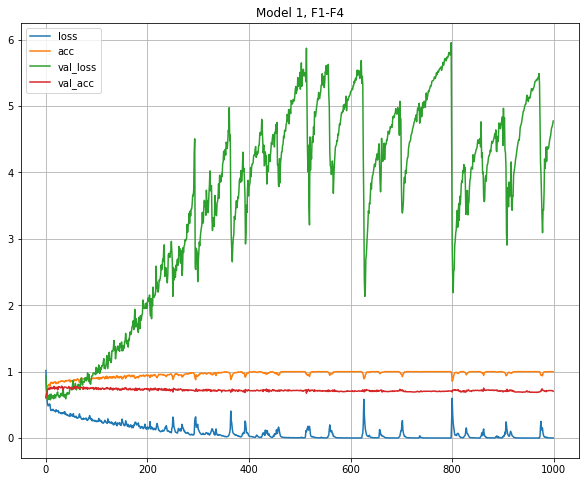

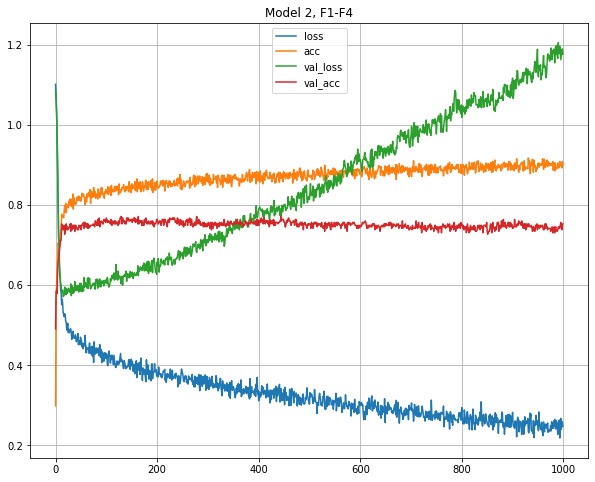

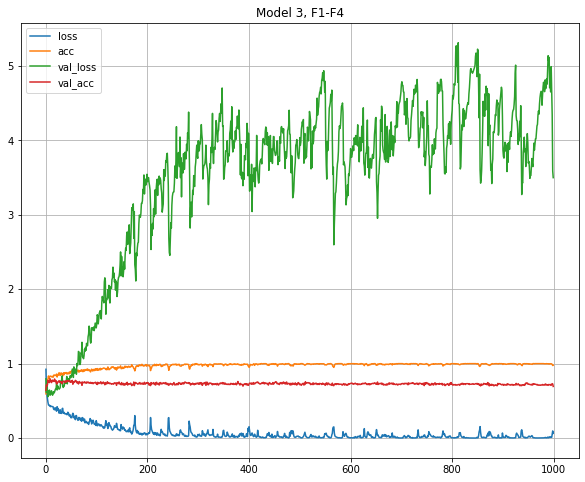

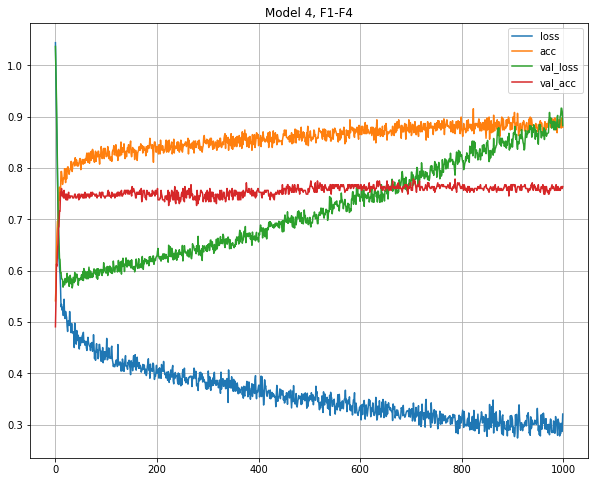

In [54]:
# Visualize the training results
plt.figure(figsize=(10,8))
plt.title('Model 1, F1-F4')
plt.plot(history1.history['loss'],label='loss')
plt.plot(history1.history['accuracy'],label='acc')
plt.plot(history1.history['val_loss'],label='val_loss')
plt.plot(history1.history['val_accuracy'],label='val_acc')
plt.grid()
plt.legend()
plt.show()

# Visualize the training results
plt.figure(figsize=(10,8))
plt.title('Model 2, F1-F4')
plt.plot(history2.history['loss'],label='loss')
plt.plot(history2.history['accuracy'],label='acc')
plt.plot(history2.history['val_loss'],label='val_loss')
plt.plot(history2.history['val_accuracy'],label='val_acc')
plt.grid()
plt.legend()
plt.show()

# Visualize the training results
plt.figure(figsize=(10,8))
plt.title('Model 3, F1-F4')
plt.plot(history3.history['loss'],label='loss')
plt.plot(history3.history['accuracy'],label='acc')
plt.plot(history3.history['val_loss'],label='val_loss')
plt.plot(history3.history['val_accuracy'],label='val_acc')
plt.grid()
plt.legend()
plt.show()

# Visualize the training results
plt.figure(figsize=(10,8))
plt.title('Model 4, F1-F4')
plt.plot(history4.history['loss'],label='loss')
plt.plot(history4.history['accuracy'],label='acc')
plt.plot(history4.history['val_loss'],label='val_loss')
plt.plot(history4.history['val_accuracy'],label='val_acc')
plt.grid()
plt.legend()
plt.show()

In [55]:
# Validation model
print('--------model 1,F1-F4-----------')
score = model1.evaluate(x_valid, y_valid, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])
print('-----------------------------------------------')

# Validation model
print('--------model 2, F1-F4-----------')
score = model2.evaluate(x_valid, y_valid, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])
print('-----------------------------------------------')
# Validation model
print('--------model 3, F1-F4-----------')
score = model3.evaluate(x_valid, y_valid, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])
print('-----------------------------------------------')
# Validation model
print('--------model 4, F1-F4-----------')
score = model4.evaluate(x_valid, y_valid, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])
print('-----------------------------------------------')

--------model 1,F1-F4-----------
Validation loss: 4.775447845458984
Validation accuracy: 0.7047970294952393
-----------------------------------------------
--------model 2, F1-F4-----------
Validation loss: 1.1754786968231201
Validation accuracy: 0.7527675032615662
-----------------------------------------------
--------model 3, F1-F4-----------
Validation loss: 3.4993844032287598
Validation accuracy: 0.6937269568443298
-----------------------------------------------
--------model 4, F1-F4-----------
Validation loss: 3.4993844032287598
Validation accuracy: 0.6937269568443298
-----------------------------------------------


In [56]:
# Features to use
features = ["F1","F2","F3","F4","B1","B2","B3","B4"]

# Extract features
x_train_raw = train[features]
x_valid_raw = valid[features]

# Normalize to zero mean
x_mean = np.mean(x_train_raw)
x_std = np.std(x_train_raw)
x_train = x_train_raw - x_mean
x_valid = x_valid_raw - x_mean

# Fix labels. The "to_categorical" call maps integer labels {n}
# to a vector of length N (number of labels) with a one in position n
y_train = keras.utils.to_categorical(trainlabels, len(phonemes))
y_valid = keras.utils.to_categorical(validlabels, len(phonemes))

# Create a model with a single hidden layer
model1 = keras.Sequential([
    keras.layers.Dense(28*28, activation=tf.nn.relu, input_dim=x_train.shape[1]),
    keras.layers.Dense(32, activation=tf.nn.relu, input_dim=28*28),
    keras.layers.Dense(512, activation=tf.nn.relu, input_dim=32),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation=tf.nn.relu, input_dim=512),
    keras.layers.Dense(len(phonemes), activation=tf.nn.softmax)
])
print('--------------Model 1---------------')
model1.summary()

# Train the model
model1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history1 = model1.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                    epochs=1000, batch_size=32, verbose=True)

# Create a model with a single hidden layer
model2 = keras.Sequential([
    keras.layers.Dense(64, activation=tf.nn.relu, input_dim=x_train.shape[1]),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(32, activation=tf.nn.relu, input_dim=64),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(16, activation=tf.nn.relu, input_dim=32),
    keras.layers.Dense(len(phonemes), activation=tf.nn.softmax)
])

print('--------------Model 2---------------')
model2.summary()

# Train the model
model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history2 = model2.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                    epochs=1000, batch_size=32, verbose=True)

# Create a model with a single hidden layer
model3 = keras.Sequential([
    keras.layers.Dense(256, activation=tf.nn.relu, input_dim=x_train.shape[1]),
    keras.layers.Dense(512, activation=tf.nn.relu, input_dim=256),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(512, activation=tf.nn.relu, input_dim=512),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation=tf.nn.relu, input_dim=512),
    keras.layers.Dense(len(phonemes), activation=tf.nn.softmax)
])

print('--------------Model 3---------------')
model3.summary()

# Train the model
model3.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history3 = model3.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                    epochs=1000, batch_size=32, verbose=True)

# Create a model with a single hidden layer
model4 = keras.Sequential([
    keras.layers.Dense(64, activation=tf.nn.relu, input_dim=x_train.shape[1]),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(len(phonemes), activation=tf.nn.softmax),
])

print('--------------Model 4---------------')
model4.summary()

# Train the model
model4.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history4 = model4.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                    epochs=1000, batch_size=32, verbose=True)

--------------Model 1---------------
Model: "sequential_50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_184 (Dense)            (None, 784)               7056      
_________________________________________________________________
dense_185 (Dense)            (None, 32)                25120     
_________________________________________________________________
dense_186 (Dense)            (None, 512)               16896     
_________________________________________________________________
dropout_66 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_187 (Dense)            (None, 64)                32832     
_________________________________________________________________
dense_188 (Dense)            (None, 3)                 195       
Total params: 82,099
Trainable params: 82,099
Non-trainable params: 0
____________

18/18 [==============================] - 0s 2ms/step - loss: 0.2451 - accuracy: 0.9101 - val_loss: 0.7751 - val_accuracy: 0.7565
Epoch 51/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2299 - accuracy: 0.9047 - val_loss: 0.7592 - val_accuracy: 0.7565
Epoch 52/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2266 - accuracy: 0.9191 - val_loss: 0.8177 - val_accuracy: 0.7565
Epoch 53/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.2232 - accuracy: 0.9191 - val_loss: 0.8677 - val_accuracy: 0.7454
Epoch 54/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2697 - accuracy: 0.8813 - val_loss: 0.7944 - val_accuracy: 0.7343
Epoch 55/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.2425 - accuracy: 0.9011 - val_loss: 0.8121 - val_accuracy: 0.7343
Epoch 56/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.2205 - accuracy: 0.9101 - val_loss: 0.7706 - val_accuracy: 0.7638
Epoch 57/1000

18/18 [==============================] - 0s 2ms/step - loss: 0.0495 - accuracy: 0.9820 - val_loss: 1.6441 - val_accuracy: 0.7196
Epoch 108/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0605 - accuracy: 0.9838 - val_loss: 1.7392 - val_accuracy: 0.7085
Epoch 109/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0631 - accuracy: 0.9820 - val_loss: 1.6773 - val_accuracy: 0.7159
Epoch 110/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0567 - accuracy: 0.9838 - val_loss: 1.7286 - val_accuracy: 0.7269
Epoch 111/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.0622 - accuracy: 0.9766 - val_loss: 1.7577 - val_accuracy: 0.7085
Epoch 112/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0486 - accuracy: 0.9838 - val_loss: 1.8530 - val_accuracy: 0.7159
Epoch 113/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0289 - accuracy: 0.9964 - val_loss: 1.7937 - val_accuracy: 0.7122
Epoch 1

Epoch 164/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 2.4879 - val_accuracy: 0.7269
Epoch 165/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.0038 - accuracy: 0.9982 - val_loss: 2.5615 - val_accuracy: 0.7269
Epoch 166/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0035 - accuracy: 0.9982 - val_loss: 2.5598 - val_accuracy: 0.7269
Epoch 167/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 2.5574 - val_accuracy: 0.7232
Epoch 168/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0031 - accuracy: 0.9982 - val_loss: 2.5921 - val_accuracy: 0.7232
Epoch 169/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 2.7452 - val_accuracy: 0.7232
Epoch 170/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0060 - accuracy: 0.9964 - val_loss: 2.6379 - val_accuracy:

Epoch 221/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 2.9747 - val_accuracy: 0.7269
Epoch 222/1000
18/18 [==============================] - 0s 2ms/step - loss: 7.9898e-04 - accuracy: 1.0000 - val_loss: 2.9921 - val_accuracy: 0.7306
Epoch 223/1000
18/18 [==============================] - 0s 2ms/step - loss: 8.1318e-04 - accuracy: 1.0000 - val_loss: 2.9772 - val_accuracy: 0.7269
Epoch 224/1000
18/18 [==============================] - 0s 1ms/step - loss: 8.9920e-04 - accuracy: 1.0000 - val_loss: 2.9813 - val_accuracy: 0.7269
Epoch 225/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 2.9971 - val_accuracy: 0.7343
Epoch 226/1000
18/18 [==============================] - 0s 1ms/step - loss: 7.0111e-04 - accuracy: 1.0000 - val_loss: 2.9978 - val_accuracy: 0.7306
Epoch 227/1000
18/18 [==============================] - 0s 2ms/step - loss: 8.2548e-04 - accuracy: 1.0000 - val_loss: 3.

18/18 [==============================] - 0s 1ms/step - loss: 9.8715e-04 - accuracy: 1.0000 - val_loss: 2.7650 - val_accuracy: 0.7306
Epoch 278/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 2.7574 - val_accuracy: 0.7269
Epoch 279/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 2.8216 - val_accuracy: 0.7196
Epoch 280/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 2.8288 - val_accuracy: 0.7159
Epoch 281/1000
18/18 [==============================] - 0s 1ms/step - loss: 9.5247e-04 - accuracy: 1.0000 - val_loss: 2.8137 - val_accuracy: 0.7196
Epoch 282/1000
18/18 [==============================] - 0s 1ms/step - loss: 9.6838e-04 - accuracy: 1.0000 - val_loss: 2.8141 - val_accuracy: 0.7232
Epoch 283/1000
18/18 [==============================] - 0s 2ms/step - loss: 7.6922e-04 - accuracy: 1.0000 - val_loss: 2.8631 - val_accuracy

18/18 [==============================] - 0s 2ms/step - loss: 0.0038 - accuracy: 0.9982 - val_loss: 3.1952 - val_accuracy: 0.7306
Epoch 333/1000
18/18 [==============================] - 0s 2ms/step - loss: 8.1879e-04 - accuracy: 1.0000 - val_loss: 3.4163 - val_accuracy: 0.7159
Epoch 334/1000
18/18 [==============================] - 0s 2ms/step - loss: 8.2693e-04 - accuracy: 1.0000 - val_loss: 3.4035 - val_accuracy: 0.7417
Epoch 335/1000
18/18 [==============================] - 0s 2ms/step - loss: 4.6290e-04 - accuracy: 1.0000 - val_loss: 3.4628 - val_accuracy: 0.7343
Epoch 336/1000
18/18 [==============================] - 0s 2ms/step - loss: 4.0544e-04 - accuracy: 1.0000 - val_loss: 3.4427 - val_accuracy: 0.7343
Epoch 337/1000
18/18 [==============================] - 0s 2ms/step - loss: 5.3080e-04 - accuracy: 1.0000 - val_loss: 3.4455 - val_accuracy: 0.7269
Epoch 338/1000
18/18 [==============================] - 0s 1ms/step - loss: 4.0124e-04 - accuracy: 1.0000 - val_loss: 3.4482 - val_

Epoch 388/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0375 - accuracy: 0.9874 - val_loss: 2.0509 - val_accuracy: 0.7048
Epoch 389/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.0392 - accuracy: 0.9820 - val_loss: 2.1395 - val_accuracy: 0.7306
Epoch 390/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0934 - accuracy: 0.9676 - val_loss: 1.8960 - val_accuracy: 0.7343
Epoch 391/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.1512 - accuracy: 0.9478 - val_loss: 1.6381 - val_accuracy: 0.7048
Epoch 392/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0767 - accuracy: 0.9748 - val_loss: 1.7271 - val_accuracy: 0.7269
Epoch 393/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0539 - accuracy: 0.9838 - val_loss: 1.7579 - val_accuracy: 0.7343
Epoch 394/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0306 - accuracy: 0.9946 - val_loss: 1.8723 - val_accuracy:

18/18 [==============================] - 0s 2ms/step - loss: 3.8134e-04 - accuracy: 1.0000 - val_loss: 2.9369 - val_accuracy: 0.7269
Epoch 445/1000
18/18 [==============================] - 0s 2ms/step - loss: 4.4966e-04 - accuracy: 1.0000 - val_loss: 2.9477 - val_accuracy: 0.7269
Epoch 446/1000
18/18 [==============================] - 0s 2ms/step - loss: 3.7392e-04 - accuracy: 1.0000 - val_loss: 2.9630 - val_accuracy: 0.7269
Epoch 447/1000
18/18 [==============================] - 0s 2ms/step - loss: 3.1201e-04 - accuracy: 1.0000 - val_loss: 2.9779 - val_accuracy: 0.7343
Epoch 448/1000
18/18 [==============================] - 0s 2ms/step - loss: 3.1945e-04 - accuracy: 1.0000 - val_loss: 2.9879 - val_accuracy: 0.7306
Epoch 449/1000
18/18 [==============================] - 0s 2ms/step - loss: 6.6590e-04 - accuracy: 1.0000 - val_loss: 2.9722 - val_accuracy: 0.7306
Epoch 450/1000
18/18 [==============================] - 0s 2ms/step - loss: 3.6012e-04 - accuracy: 1.0000 - val_loss: 2.9799 - 

18/18 [==============================] - 0s 1ms/step - loss: 7.9994e-04 - accuracy: 1.0000 - val_loss: 2.6033 - val_accuracy: 0.7232
Epoch 501/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 2.6211 - val_accuracy: 0.7196
Epoch 502/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 2.6096 - val_accuracy: 0.7122
Epoch 503/1000
18/18 [==============================] - 0s 2ms/step - loss: 8.0097e-04 - accuracy: 1.0000 - val_loss: 2.6521 - val_accuracy: 0.7159
Epoch 504/1000
18/18 [==============================] - 0s 2ms/step - loss: 8.7386e-04 - accuracy: 1.0000 - val_loss: 2.6852 - val_accuracy: 0.7196
Epoch 505/1000
18/18 [==============================] - 0s 1ms/step - loss: 6.5770e-04 - accuracy: 1.0000 - val_loss: 2.7097 - val_accuracy: 0.7196
Epoch 506/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 2.6809 - val_accuracy

Epoch 556/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 2.1666 - val_accuracy: 0.7269
Epoch 557/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 2.2047 - val_accuracy: 0.7232
Epoch 558/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 2.2649 - val_accuracy: 0.7232
Epoch 559/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 2.3185 - val_accuracy: 0.7232
Epoch 560/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 2.3710 - val_accuracy: 0.7232
Epoch 561/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 2.4263 - val_accuracy: 0.7196
Epoch 562/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 2.4434 - val_accuracy:

18/18 [==============================] - 0s 1ms/step - loss: 2.1904e-04 - accuracy: 1.0000 - val_loss: 3.3298 - val_accuracy: 0.7269
Epoch 612/1000
18/18 [==============================] - 0s 2ms/step - loss: 1.5610e-04 - accuracy: 1.0000 - val_loss: 3.3419 - val_accuracy: 0.7269
Epoch 613/1000
18/18 [==============================] - 0s 1ms/step - loss: 1.2537e-04 - accuracy: 1.0000 - val_loss: 3.3512 - val_accuracy: 0.7269
Epoch 614/1000
18/18 [==============================] - 0s 1ms/step - loss: 2.1102e-04 - accuracy: 1.0000 - val_loss: 3.3531 - val_accuracy: 0.7306
Epoch 615/1000
18/18 [==============================] - 0s 2ms/step - loss: 2.0416e-04 - accuracy: 1.0000 - val_loss: 3.3645 - val_accuracy: 0.7232
Epoch 616/1000
18/18 [==============================] - 0s 2ms/step - loss: 1.1838e-04 - accuracy: 1.0000 - val_loss: 3.3797 - val_accuracy: 0.7196
Epoch 617/1000
18/18 [==============================] - 0s 1ms/step - loss: 1.6414e-04 - accuracy: 1.0000 - val_loss: 3.3874 - 

18/18 [==============================] - 0s 1ms/step - loss: 4.6175e-05 - accuracy: 1.0000 - val_loss: 3.7542 - val_accuracy: 0.7232
Epoch 667/1000
18/18 [==============================] - 0s 2ms/step - loss: 3.7994e-05 - accuracy: 1.0000 - val_loss: 3.7600 - val_accuracy: 0.7232
Epoch 668/1000
18/18 [==============================] - 0s 2ms/step - loss: 5.4616e-05 - accuracy: 1.0000 - val_loss: 3.7643 - val_accuracy: 0.7232
Epoch 669/1000
18/18 [==============================] - 0s 1ms/step - loss: 5.3042e-05 - accuracy: 1.0000 - val_loss: 3.7732 - val_accuracy: 0.7232
Epoch 670/1000
18/18 [==============================] - 0s 1ms/step - loss: 3.5279e-05 - accuracy: 1.0000 - val_loss: 3.7800 - val_accuracy: 0.7232
Epoch 671/1000
18/18 [==============================] - 0s 1ms/step - loss: 4.3692e-05 - accuracy: 1.0000 - val_loss: 3.7866 - val_accuracy: 0.7232
Epoch 672/1000
18/18 [==============================] - 0s 1ms/step - loss: 5.6694e-05 - accuracy: 1.0000 - val_loss: 3.7902 - 

18/18 [==============================] - 0s 2ms/step - loss: 5.6180e-05 - accuracy: 1.0000 - val_loss: 4.0419 - val_accuracy: 0.7269
Epoch 722/1000
18/18 [==============================] - 0s 2ms/step - loss: 3.3722e-05 - accuracy: 1.0000 - val_loss: 4.0317 - val_accuracy: 0.7269
Epoch 723/1000
18/18 [==============================] - 0s 2ms/step - loss: 3.2991e-05 - accuracy: 1.0000 - val_loss: 4.0467 - val_accuracy: 0.7269
Epoch 724/1000
18/18 [==============================] - 0s 2ms/step - loss: 1.8027e-05 - accuracy: 1.0000 - val_loss: 4.0650 - val_accuracy: 0.7269
Epoch 725/1000
18/18 [==============================] - 0s 1ms/step - loss: 2.4412e-05 - accuracy: 1.0000 - val_loss: 4.0766 - val_accuracy: 0.7232
Epoch 726/1000
18/18 [==============================] - 0s 1ms/step - loss: 2.6821e-05 - accuracy: 1.0000 - val_loss: 4.0915 - val_accuracy: 0.7196
Epoch 727/1000
18/18 [==============================] - 0s 2ms/step - loss: 3.3173e-05 - accuracy: 1.0000 - val_loss: 4.0890 - 

18/18 [==============================] - 0s 2ms/step - loss: 1.0135e-05 - accuracy: 1.0000 - val_loss: 4.3606 - val_accuracy: 0.7196
Epoch 777/1000
18/18 [==============================] - 0s 2ms/step - loss: 1.2559e-05 - accuracy: 1.0000 - val_loss: 4.3658 - val_accuracy: 0.7196
Epoch 778/1000
18/18 [==============================] - 0s 2ms/step - loss: 1.3791e-05 - accuracy: 1.0000 - val_loss: 4.3731 - val_accuracy: 0.7196
Epoch 779/1000
18/18 [==============================] - 0s 1ms/step - loss: 1.2478e-05 - accuracy: 1.0000 - val_loss: 4.3778 - val_accuracy: 0.7196
Epoch 780/1000
18/18 [==============================] - 0s 2ms/step - loss: 2.1609e-05 - accuracy: 1.0000 - val_loss: 4.3757 - val_accuracy: 0.7232
Epoch 781/1000
18/18 [==============================] - 0s 1ms/step - loss: 1.0478e-05 - accuracy: 1.0000 - val_loss: 4.3743 - val_accuracy: 0.7232
Epoch 782/1000
18/18 [==============================] - 0s 2ms/step - loss: 1.8954e-05 - accuracy: 1.0000 - val_loss: 4.3854 - 

18/18 [==============================] - 0s 1ms/step - loss: 6.5256e-06 - accuracy: 1.0000 - val_loss: 4.6289 - val_accuracy: 0.7196
Epoch 832/1000
18/18 [==============================] - 0s 2ms/step - loss: 6.1329e-06 - accuracy: 1.0000 - val_loss: 4.6346 - val_accuracy: 0.7196
Epoch 833/1000
18/18 [==============================] - 0s 1ms/step - loss: 6.9443e-06 - accuracy: 1.0000 - val_loss: 4.6370 - val_accuracy: 0.7196
Epoch 834/1000
18/18 [==============================] - 0s 2ms/step - loss: 6.6978e-06 - accuracy: 1.0000 - val_loss: 4.6411 - val_accuracy: 0.7196
Epoch 835/1000
18/18 [==============================] - 0s 1ms/step - loss: 1.0239e-05 - accuracy: 1.0000 - val_loss: 4.6370 - val_accuracy: 0.7232
Epoch 836/1000
18/18 [==============================] - 0s 1ms/step - loss: 5.7696e-06 - accuracy: 1.0000 - val_loss: 4.6442 - val_accuracy: 0.7196
Epoch 837/1000
18/18 [==============================] - 0s 1ms/step - loss: 6.1162e-06 - accuracy: 1.0000 - val_loss: 4.6496 - 

Epoch 887/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0085 - accuracy: 0.9982 - val_loss: 2.2422 - val_accuracy: 0.7159
Epoch 888/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.0083 - accuracy: 0.9982 - val_loss: 2.3316 - val_accuracy: 0.7196
Epoch 889/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 2.3705 - val_accuracy: 0.7085
Epoch 890/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 2.4610 - val_accuracy: 0.7122
Epoch 891/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0052 - accuracy: 0.9982 - val_loss: 2.5222 - val_accuracy: 0.7159
Epoch 892/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.0069 - accuracy: 0.9964 - val_loss: 2.5181 - val_accuracy: 0.7085
Epoch 893/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0167 - accuracy: 0.9928 - val_loss: 2.5334 - val_accuracy:

Epoch 943/1000
18/18 [==============================] - 0s 2ms/step - loss: 2.7999e-04 - accuracy: 1.0000 - val_loss: 3.2593 - val_accuracy: 0.7159
Epoch 944/1000
18/18 [==============================] - 0s 2ms/step - loss: 1.6348e-04 - accuracy: 1.0000 - val_loss: 3.2741 - val_accuracy: 0.7122
Epoch 945/1000
18/18 [==============================] - 0s 2ms/step - loss: 2.5981e-04 - accuracy: 1.0000 - val_loss: 3.2826 - val_accuracy: 0.7159
Epoch 946/1000
18/18 [==============================] - 0s 2ms/step - loss: 1.4490e-04 - accuracy: 1.0000 - val_loss: 3.2923 - val_accuracy: 0.7159
Epoch 947/1000
18/18 [==============================] - 0s 2ms/step - loss: 2.5500e-04 - accuracy: 1.0000 - val_loss: 3.2953 - val_accuracy: 0.7196
Epoch 948/1000
18/18 [==============================] - 0s 2ms/step - loss: 1.8488e-04 - accuracy: 1.0000 - val_loss: 3.3058 - val_accuracy: 0.7159
Epoch 949/1000
18/18 [==============================] - 0s 2ms/step - loss: 2.5414e-04 - accuracy: 1.0000 - val_

18/18 [==============================] - 0s 2ms/step - loss: 1.0252e-04 - accuracy: 1.0000 - val_loss: 3.6532 - val_accuracy: 0.7159
Epoch 999/1000
18/18 [==============================] - 0s 1ms/step - loss: 8.8444e-05 - accuracy: 1.0000 - val_loss: 3.6559 - val_accuracy: 0.7232
Epoch 1000/1000
18/18 [==============================] - 0s 2ms/step - loss: 7.0233e-05 - accuracy: 1.0000 - val_loss: 3.6609 - val_accuracy: 0.7232
--------------Model 2---------------
Model: "sequential_51"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_189 (Dense)            (None, 64)                576       
_________________________________________________________________
dropout_67 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_190 (Dense)            (None, 32)                2080      
________________________________________________

18/18 [==============================] - 0s 1ms/step - loss: 0.4193 - accuracy: 0.8435 - val_loss: 0.5973 - val_accuracy: 0.7417
Epoch 48/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4483 - accuracy: 0.8219 - val_loss: 0.6108 - val_accuracy: 0.7417
Epoch 49/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4447 - accuracy: 0.8201 - val_loss: 0.5942 - val_accuracy: 0.7417
Epoch 50/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4450 - accuracy: 0.8291 - val_loss: 0.6012 - val_accuracy: 0.7343
Epoch 51/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4595 - accuracy: 0.8291 - val_loss: 0.5949 - val_accuracy: 0.7417
Epoch 52/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4217 - accuracy: 0.8435 - val_loss: 0.6009 - val_accuracy: 0.7491
Epoch 53/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4530 - accuracy: 0.8237 - val_loss: 0.5908 - val_accuracy: 0.7454
Epoch 54/1000

18/18 [==============================] - 0s 1ms/step - loss: 0.3969 - accuracy: 0.8363 - val_loss: 0.6040 - val_accuracy: 0.7343
Epoch 105/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3822 - accuracy: 0.8489 - val_loss: 0.6085 - val_accuracy: 0.7380
Epoch 106/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3758 - accuracy: 0.8489 - val_loss: 0.6017 - val_accuracy: 0.7417
Epoch 107/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3760 - accuracy: 0.8489 - val_loss: 0.6047 - val_accuracy: 0.7454
Epoch 108/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3570 - accuracy: 0.8633 - val_loss: 0.6040 - val_accuracy: 0.7380
Epoch 109/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3704 - accuracy: 0.8525 - val_loss: 0.6106 - val_accuracy: 0.7306
Epoch 110/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3844 - accuracy: 0.8525 - val_loss: 0.6037 - val_accuracy: 0.7454
Epoch 1

Epoch 161/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3409 - accuracy: 0.8687 - val_loss: 0.6314 - val_accuracy: 0.7343
Epoch 162/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3562 - accuracy: 0.8651 - val_loss: 0.6407 - val_accuracy: 0.7380
Epoch 163/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3390 - accuracy: 0.8849 - val_loss: 0.6189 - val_accuracy: 0.7528
Epoch 164/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3386 - accuracy: 0.8759 - val_loss: 0.6341 - val_accuracy: 0.7528
Epoch 165/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3351 - accuracy: 0.8633 - val_loss: 0.6367 - val_accuracy: 0.7491
Epoch 166/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3514 - accuracy: 0.8615 - val_loss: 0.6327 - val_accuracy: 0.7454
Epoch 167/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3338 - accuracy: 0.8741 - val_loss: 0.6246 - val_accuracy:

Epoch 218/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3003 - accuracy: 0.8849 - val_loss: 0.6766 - val_accuracy: 0.7343
Epoch 219/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3065 - accuracy: 0.8867 - val_loss: 0.6724 - val_accuracy: 0.7380
Epoch 220/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3271 - accuracy: 0.8741 - val_loss: 0.6617 - val_accuracy: 0.7269
Epoch 221/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3406 - accuracy: 0.8669 - val_loss: 0.6578 - val_accuracy: 0.7380
Epoch 222/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3104 - accuracy: 0.8903 - val_loss: 0.6596 - val_accuracy: 0.7343
Epoch 223/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3245 - accuracy: 0.8741 - val_loss: 0.6515 - val_accuracy: 0.7491
Epoch 224/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3095 - accuracy: 0.8831 - val_loss: 0.6661 - val_accuracy:

Epoch 275/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2954 - accuracy: 0.8885 - val_loss: 0.7091 - val_accuracy: 0.7269
Epoch 276/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2807 - accuracy: 0.8957 - val_loss: 0.7207 - val_accuracy: 0.7380
Epoch 277/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2584 - accuracy: 0.9029 - val_loss: 0.7161 - val_accuracy: 0.7380
Epoch 278/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2820 - accuracy: 0.8921 - val_loss: 0.7265 - val_accuracy: 0.7380
Epoch 279/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2805 - accuracy: 0.8921 - val_loss: 0.7314 - val_accuracy: 0.7417
Epoch 280/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2778 - accuracy: 0.8903 - val_loss: 0.7343 - val_accuracy: 0.7343
Epoch 281/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2931 - accuracy: 0.8867 - val_loss: 0.7263 - val_accuracy:

Epoch 332/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2677 - accuracy: 0.8867 - val_loss: 0.7853 - val_accuracy: 0.7306
Epoch 333/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2489 - accuracy: 0.9155 - val_loss: 0.7676 - val_accuracy: 0.7306
Epoch 334/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2319 - accuracy: 0.9119 - val_loss: 0.8009 - val_accuracy: 0.7269
Epoch 335/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2693 - accuracy: 0.8903 - val_loss: 0.7952 - val_accuracy: 0.7269
Epoch 336/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2594 - accuracy: 0.8957 - val_loss: 0.7898 - val_accuracy: 0.7306
Epoch 337/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2651 - accuracy: 0.8831 - val_loss: 0.7722 - val_accuracy: 0.7232
Epoch 338/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2811 - accuracy: 0.8777 - val_loss: 0.7767 - val_accuracy:

Epoch 389/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2461 - accuracy: 0.8957 - val_loss: 0.8525 - val_accuracy: 0.7232
Epoch 390/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2739 - accuracy: 0.8921 - val_loss: 0.8156 - val_accuracy: 0.7232
Epoch 391/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2535 - accuracy: 0.9119 - val_loss: 0.8454 - val_accuracy: 0.7232
Epoch 392/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2456 - accuracy: 0.8957 - val_loss: 0.8509 - val_accuracy: 0.7196
Epoch 393/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2453 - accuracy: 0.9119 - val_loss: 0.8513 - val_accuracy: 0.7196
Epoch 394/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2615 - accuracy: 0.8957 - val_loss: 0.8783 - val_accuracy: 0.7196
Epoch 395/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2466 - accuracy: 0.9119 - val_loss: 0.8703 - val_accuracy:

Epoch 446/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2072 - accuracy: 0.9227 - val_loss: 0.9502 - val_accuracy: 0.7122
Epoch 447/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2259 - accuracy: 0.9227 - val_loss: 0.9461 - val_accuracy: 0.7122
Epoch 448/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2059 - accuracy: 0.9227 - val_loss: 0.9528 - val_accuracy: 0.7232
Epoch 449/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1886 - accuracy: 0.9317 - val_loss: 0.9710 - val_accuracy: 0.7122
Epoch 450/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2253 - accuracy: 0.9155 - val_loss: 0.9734 - val_accuracy: 0.7196
Epoch 451/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2243 - accuracy: 0.9209 - val_loss: 0.9637 - val_accuracy: 0.7159
Epoch 452/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2081 - accuracy: 0.9227 - val_loss: 0.9381 - val_accuracy:

Epoch 503/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2019 - accuracy: 0.9155 - val_loss: 1.0366 - val_accuracy: 0.7048
Epoch 504/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1960 - accuracy: 0.9227 - val_loss: 1.0331 - val_accuracy: 0.7048
Epoch 505/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2017 - accuracy: 0.9299 - val_loss: 1.0238 - val_accuracy: 0.7085
Epoch 506/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2077 - accuracy: 0.9155 - val_loss: 1.0370 - val_accuracy: 0.7085
Epoch 507/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2098 - accuracy: 0.9191 - val_loss: 1.0043 - val_accuracy: 0.7048
Epoch 508/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2094 - accuracy: 0.9209 - val_loss: 0.9927 - val_accuracy: 0.7085
Epoch 509/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2157 - accuracy: 0.9173 - val_loss: 1.0134 - val_accuracy:

Epoch 560/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2045 - accuracy: 0.9245 - val_loss: 1.0997 - val_accuracy: 0.7048
Epoch 561/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1688 - accuracy: 0.9371 - val_loss: 1.0976 - val_accuracy: 0.6974
Epoch 562/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1863 - accuracy: 0.9299 - val_loss: 1.1036 - val_accuracy: 0.6900
Epoch 563/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1773 - accuracy: 0.9424 - val_loss: 1.1017 - val_accuracy: 0.6974
Epoch 564/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1783 - accuracy: 0.9281 - val_loss: 1.1024 - val_accuracy: 0.6900
Epoch 565/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1898 - accuracy: 0.9227 - val_loss: 1.0979 - val_accuracy: 0.6937
Epoch 566/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1855 - accuracy: 0.9245 - val_loss: 1.1155 - val_accuracy:

Epoch 617/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1648 - accuracy: 0.9263 - val_loss: 1.1591 - val_accuracy: 0.7048
Epoch 618/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1501 - accuracy: 0.9460 - val_loss: 1.1694 - val_accuracy: 0.7122
Epoch 619/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1822 - accuracy: 0.9299 - val_loss: 1.1534 - val_accuracy: 0.6937
Epoch 620/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1572 - accuracy: 0.9388 - val_loss: 1.1856 - val_accuracy: 0.6974
Epoch 621/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1712 - accuracy: 0.9245 - val_loss: 1.1689 - val_accuracy: 0.7011
Epoch 622/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1792 - accuracy: 0.9388 - val_loss: 1.2193 - val_accuracy: 0.6937
Epoch 623/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1476 - accuracy: 0.9460 - val_loss: 1.1830 - val_accuracy:

Epoch 674/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1417 - accuracy: 0.9353 - val_loss: 1.3373 - val_accuracy: 0.7048
Epoch 675/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1625 - accuracy: 0.9406 - val_loss: 1.3387 - val_accuracy: 0.6937
Epoch 676/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1460 - accuracy: 0.9514 - val_loss: 1.2987 - val_accuracy: 0.7122
Epoch 677/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1705 - accuracy: 0.9460 - val_loss: 1.3176 - val_accuracy: 0.7048
Epoch 678/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1414 - accuracy: 0.9424 - val_loss: 1.3256 - val_accuracy: 0.6974
Epoch 679/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1540 - accuracy: 0.9353 - val_loss: 1.3097 - val_accuracy: 0.7085
Epoch 680/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1559 - accuracy: 0.9353 - val_loss: 1.3343 - val_accuracy:

Epoch 731/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1695 - accuracy: 0.9388 - val_loss: 1.3972 - val_accuracy: 0.7011
Epoch 732/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1358 - accuracy: 0.9496 - val_loss: 1.4416 - val_accuracy: 0.7011
Epoch 733/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1437 - accuracy: 0.9496 - val_loss: 1.3921 - val_accuracy: 0.7011
Epoch 734/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1514 - accuracy: 0.9442 - val_loss: 1.4275 - val_accuracy: 0.6937
Epoch 735/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1544 - accuracy: 0.9353 - val_loss: 1.3380 - val_accuracy: 0.6974
Epoch 736/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1630 - accuracy: 0.9371 - val_loss: 1.3682 - val_accuracy: 0.6937
Epoch 737/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1499 - accuracy: 0.9460 - val_loss: 1.3746 - val_accuracy:

Epoch 788/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1328 - accuracy: 0.9496 - val_loss: 1.4551 - val_accuracy: 0.7048
Epoch 789/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1464 - accuracy: 0.9496 - val_loss: 1.4420 - val_accuracy: 0.7085
Epoch 790/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1252 - accuracy: 0.9514 - val_loss: 1.4442 - val_accuracy: 0.7048
Epoch 791/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1240 - accuracy: 0.9532 - val_loss: 1.4453 - val_accuracy: 0.7048
Epoch 792/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1509 - accuracy: 0.9388 - val_loss: 1.4691 - val_accuracy: 0.7011
Epoch 793/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1407 - accuracy: 0.9424 - val_loss: 1.4393 - val_accuracy: 0.6974
Epoch 794/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1227 - accuracy: 0.9568 - val_loss: 1.4499 - val_accuracy:

Epoch 845/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1470 - accuracy: 0.9478 - val_loss: 1.5382 - val_accuracy: 0.7048
Epoch 846/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1267 - accuracy: 0.9532 - val_loss: 1.5204 - val_accuracy: 0.7011
Epoch 847/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1083 - accuracy: 0.9658 - val_loss: 1.5038 - val_accuracy: 0.7048
Epoch 848/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1241 - accuracy: 0.9550 - val_loss: 1.5452 - val_accuracy: 0.7085
Epoch 849/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1108 - accuracy: 0.9586 - val_loss: 1.5706 - val_accuracy: 0.7048
Epoch 850/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1250 - accuracy: 0.9532 - val_loss: 1.5532 - val_accuracy: 0.7011
Epoch 851/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1290 - accuracy: 0.9622 - val_loss: 1.5425 - val_accuracy:

Epoch 902/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1054 - accuracy: 0.9550 - val_loss: 1.6092 - val_accuracy: 0.7011
Epoch 903/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1268 - accuracy: 0.9496 - val_loss: 1.5697 - val_accuracy: 0.6974
Epoch 904/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1296 - accuracy: 0.9550 - val_loss: 1.5989 - val_accuracy: 0.7011
Epoch 905/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1315 - accuracy: 0.9478 - val_loss: 1.6198 - val_accuracy: 0.7048
Epoch 906/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1061 - accuracy: 0.9622 - val_loss: 1.6052 - val_accuracy: 0.7122
Epoch 907/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1149 - accuracy: 0.9550 - val_loss: 1.6425 - val_accuracy: 0.7085
Epoch 908/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1357 - accuracy: 0.9460 - val_loss: 1.5904 - val_accuracy:

Epoch 959/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.0910 - accuracy: 0.9658 - val_loss: 1.7699 - val_accuracy: 0.6974
Epoch 960/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.0907 - accuracy: 0.9640 - val_loss: 1.8291 - val_accuracy: 0.7011
Epoch 961/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1303 - accuracy: 0.9550 - val_loss: 1.7391 - val_accuracy: 0.7011
Epoch 962/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.0973 - accuracy: 0.9568 - val_loss: 1.7435 - val_accuracy: 0.7085
Epoch 963/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1400 - accuracy: 0.9496 - val_loss: 1.7452 - val_accuracy: 0.6974
Epoch 964/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1033 - accuracy: 0.9622 - val_loss: 1.7558 - val_accuracy: 0.7011
Epoch 965/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1193 - accuracy: 0.9658 - val_loss: 1.7403 - val_accuracy:

Epoch 7/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4445 - accuracy: 0.8112 - val_loss: 0.6722 - val_accuracy: 0.7196
Epoch 8/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4298 - accuracy: 0.8363 - val_loss: 0.6456 - val_accuracy: 0.7343
Epoch 9/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4291 - accuracy: 0.8237 - val_loss: 0.7681 - val_accuracy: 0.7232
Epoch 10/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4390 - accuracy: 0.8255 - val_loss: 0.6661 - val_accuracy: 0.7343
Epoch 11/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4239 - accuracy: 0.8327 - val_loss: 0.6158 - val_accuracy: 0.7417
Epoch 12/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4196 - accuracy: 0.8237 - val_loss: 0.6096 - val_accuracy: 0.7454
Epoch 13/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4311 - accuracy: 0.8399 - val_loss: 0.5861 - val_accuracy: 0.7601
Ep

18/18 [==============================] - 0s 2ms/step - loss: 0.1671 - accuracy: 0.9155 - val_loss: 1.1588 - val_accuracy: 0.7565
Epoch 65/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.1172 - accuracy: 0.9550 - val_loss: 1.2590 - val_accuracy: 0.7343
Epoch 66/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.1020 - accuracy: 0.9694 - val_loss: 1.3192 - val_accuracy: 0.7306
Epoch 67/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.1089 - accuracy: 0.9604 - val_loss: 1.3121 - val_accuracy: 0.7491
Epoch 68/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.1151 - accuracy: 0.9550 - val_loss: 1.3567 - val_accuracy: 0.7343
Epoch 69/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.1525 - accuracy: 0.9424 - val_loss: 1.2453 - val_accuracy: 0.7638
Epoch 70/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.1105 - accuracy: 0.9604 - val_loss: 1.2544 - val_accuracy: 0.7343
Epoch 71/1000

18/18 [==============================] - 0s 2ms/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 2.4434 - val_accuracy: 0.7085
Epoch 122/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0085 - accuracy: 0.9964 - val_loss: 2.4497 - val_accuracy: 0.7159
Epoch 123/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 2.5174 - val_accuracy: 0.7159
Epoch 124/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0061 - accuracy: 0.9982 - val_loss: 2.5927 - val_accuracy: 0.7232
Epoch 125/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0225 - accuracy: 0.9946 - val_loss: 2.3938 - val_accuracy: 0.7196
Epoch 126/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0458 - accuracy: 0.9892 - val_loss: 2.4157 - val_accuracy: 0.7196
Epoch 127/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0624 - accuracy: 0.9766 - val_loss: 2.4893 - val_accuracy: 0.7048
Epoch 1

Epoch 178/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0059 - accuracy: 0.9982 - val_loss: 2.6975 - val_accuracy: 0.7306
Epoch 179/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0117 - accuracy: 0.9964 - val_loss: 2.7009 - val_accuracy: 0.7232
Epoch 180/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0232 - accuracy: 0.9874 - val_loss: 2.7357 - val_accuracy: 0.7380
Epoch 181/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0117 - accuracy: 0.9946 - val_loss: 2.7928 - val_accuracy: 0.7306
Epoch 182/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0111 - accuracy: 0.9946 - val_loss: 2.9230 - val_accuracy: 0.7269
Epoch 183/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0757 - accuracy: 0.9874 - val_loss: 2.5111 - val_accuracy: 0.7122
Epoch 184/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0740 - accuracy: 0.9820 - val_loss: 3.0075 - val_accuracy:

Epoch 235/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0278 - accuracy: 0.9892 - val_loss: 3.0337 - val_accuracy: 0.7269
Epoch 236/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0596 - accuracy: 0.9874 - val_loss: 3.2006 - val_accuracy: 0.7159
Epoch 237/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.1154 - accuracy: 0.9766 - val_loss: 2.6527 - val_accuracy: 0.6790
Epoch 238/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0464 - accuracy: 0.9802 - val_loss: 2.5406 - val_accuracy: 0.7232
Epoch 239/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0734 - accuracy: 0.9820 - val_loss: 2.7938 - val_accuracy: 0.7085
Epoch 240/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0595 - accuracy: 0.9802 - val_loss: 2.3119 - val_accuracy: 0.7085
Epoch 241/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0647 - accuracy: 0.9892 - val_loss: 2.1814 - val_accuracy:

18/18 [==============================] - 0s 3ms/step - loss: 9.8282e-04 - accuracy: 1.0000 - val_loss: 3.2407 - val_accuracy: 0.7159
Epoch 292/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 3.1967 - val_accuracy: 0.7269
Epoch 293/1000
18/18 [==============================] - 0s 3ms/step - loss: 9.5844e-04 - accuracy: 1.0000 - val_loss: 3.3422 - val_accuracy: 0.7196
Epoch 294/1000
18/18 [==============================] - 0s 2ms/step - loss: 5.6807e-04 - accuracy: 1.0000 - val_loss: 3.3430 - val_accuracy: 0.7159
Epoch 295/1000
18/18 [==============================] - 0s 2ms/step - loss: 3.6997e-04 - accuracy: 1.0000 - val_loss: 3.3562 - val_accuracy: 0.7196
Epoch 296/1000
18/18 [==============================] - 0s 2ms/step - loss: 7.1828e-04 - accuracy: 1.0000 - val_loss: 3.3893 - val_accuracy: 0.7196
Epoch 297/1000
18/18 [==============================] - 0s 2ms/step - loss: 6.7449e-04 - accuracy: 1.0000 - val_loss: 3.3913 - val_

18/18 [==============================] - 0s 2ms/step - loss: 1.5412e-04 - accuracy: 1.0000 - val_loss: 3.5568 - val_accuracy: 0.7159
Epoch 348/1000
18/18 [==============================] - 0s 2ms/step - loss: 3.5725e-04 - accuracy: 1.0000 - val_loss: 3.5837 - val_accuracy: 0.7159
Epoch 349/1000
18/18 [==============================] - 0s 2ms/step - loss: 2.6213e-04 - accuracy: 1.0000 - val_loss: 3.5595 - val_accuracy: 0.7159
Epoch 350/1000
18/18 [==============================] - 0s 2ms/step - loss: 1.6892e-04 - accuracy: 1.0000 - val_loss: 3.5651 - val_accuracy: 0.7159
Epoch 351/1000
18/18 [==============================] - 0s 2ms/step - loss: 1.3055e-04 - accuracy: 1.0000 - val_loss: 3.5767 - val_accuracy: 0.7159
Epoch 352/1000
18/18 [==============================] - 0s 2ms/step - loss: 3.4802e-04 - accuracy: 1.0000 - val_loss: 3.5868 - val_accuracy: 0.7159
Epoch 353/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0552 - accuracy: 0.9892 - val_loss: 3.9232 - val_

18/18 [==============================] - 0s 2ms/step - loss: 0.0111 - accuracy: 0.9964 - val_loss: 2.3504 - val_accuracy: 0.7048
Epoch 404/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 2.6374 - val_accuracy: 0.7085
Epoch 405/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 2.7371 - val_accuracy: 0.6974
Epoch 406/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0036 - accuracy: 0.9982 - val_loss: 2.9226 - val_accuracy: 0.7085
Epoch 407/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0035 - accuracy: 0.9982 - val_loss: 2.8662 - val_accuracy: 0.7196
Epoch 408/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 3.1334 - val_accuracy: 0.7048
Epoch 409/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0113 - accuracy: 0.9964 - val_loss: 3.0402 - val_accuracy: 0.6974
Epoch 4

18/18 [==============================] - 0s 2ms/step - loss: 7.9418e-04 - accuracy: 1.0000 - val_loss: 3.7514 - val_accuracy: 0.7232
Epoch 460/1000
18/18 [==============================] - 0s 2ms/step - loss: 5.3868e-04 - accuracy: 1.0000 - val_loss: 3.7721 - val_accuracy: 0.7232
Epoch 461/1000
18/18 [==============================] - 0s 2ms/step - loss: 2.4666e-04 - accuracy: 1.0000 - val_loss: 3.7657 - val_accuracy: 0.7159
Epoch 462/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 0.9982 - val_loss: 3.8827 - val_accuracy: 0.7269
Epoch 463/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 4.1189 - val_accuracy: 0.7196
Epoch 464/1000
18/18 [==============================] - 0s 2ms/step - loss: 2.4262e-04 - accuracy: 1.0000 - val_loss: 3.9760 - val_accuracy: 0.7196
Epoch 465/1000
18/18 [==============================] - 0s 2ms/step - loss: 9.5994e-04 - accuracy: 1.0000 - val_loss: 3.9559 - val_accu

18/18 [==============================] - 0s 2ms/step - loss: 0.0111 - accuracy: 0.9982 - val_loss: 3.2354 - val_accuracy: 0.6974
Epoch 516/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0061 - accuracy: 0.9964 - val_loss: 3.2966 - val_accuracy: 0.6974
Epoch 517/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0048 - accuracy: 0.9982 - val_loss: 3.4216 - val_accuracy: 0.6974
Epoch 518/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0041 - accuracy: 0.9982 - val_loss: 3.2106 - val_accuracy: 0.6974
Epoch 519/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 3.5167 - val_accuracy: 0.7085
Epoch 520/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0119 - accuracy: 0.9964 - val_loss: 3.3771 - val_accuracy: 0.7011
Epoch 521/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 3.3539 - val_accuracy: 0.6974
Epoch 5

18/18 [==============================] - 0s 3ms/step - loss: 1.1960e-04 - accuracy: 1.0000 - val_loss: 3.8739 - val_accuracy: 0.7085
Epoch 572/1000
18/18 [==============================] - 0s 2ms/step - loss: 7.2797e-05 - accuracy: 1.0000 - val_loss: 3.9029 - val_accuracy: 0.7085
Epoch 573/1000
18/18 [==============================] - 0s 2ms/step - loss: 2.0459e-04 - accuracy: 1.0000 - val_loss: 3.8916 - val_accuracy: 0.7085
Epoch 574/1000
18/18 [==============================] - 0s 2ms/step - loss: 2.2757e-04 - accuracy: 1.0000 - val_loss: 3.9008 - val_accuracy: 0.7085
Epoch 575/1000
18/18 [==============================] - 0s 2ms/step - loss: 1.0724e-04 - accuracy: 1.0000 - val_loss: 3.9134 - val_accuracy: 0.7085
Epoch 576/1000
18/18 [==============================] - 0s 2ms/step - loss: 9.3517e-05 - accuracy: 1.0000 - val_loss: 3.9524 - val_accuracy: 0.7122
Epoch 577/1000
18/18 [==============================] - 0s 2ms/step - loss: 1.1478e-04 - accuracy: 1.0000 - val_loss: 4.0164 - 

18/18 [==============================] - 0s 2ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 2.8232 - val_accuracy: 0.7122
Epoch 628/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 2.8701 - val_accuracy: 0.7122
Epoch 629/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0055 - accuracy: 0.9964 - val_loss: 2.8255 - val_accuracy: 0.7085
Epoch 630/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 3.0724 - val_accuracy: 0.7232
Epoch 631/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0062 - accuracy: 0.9964 - val_loss: 3.0841 - val_accuracy: 0.7122
Epoch 632/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 3.1971 - val_accuracy: 0.7048
Epoch 633/1000
18/18 [==============================] - 0s 3ms/step - loss: 4.7169e-04 - accuracy: 1.0000 - val_loss: 3.1348 - val_accuracy: 0.7122
Epo

Epoch 683/1000
18/18 [==============================] - 0s 2ms/step - loss: 5.2509e-05 - accuracy: 1.0000 - val_loss: 3.8454 - val_accuracy: 0.6974
Epoch 684/1000
18/18 [==============================] - 0s 2ms/step - loss: 8.8542e-05 - accuracy: 1.0000 - val_loss: 3.8550 - val_accuracy: 0.6974
Epoch 685/1000
18/18 [==============================] - 0s 2ms/step - loss: 3.6755e-05 - accuracy: 1.0000 - val_loss: 3.8631 - val_accuracy: 0.6937
Epoch 686/1000
18/18 [==============================] - 0s 2ms/step - loss: 3.1612e-04 - accuracy: 1.0000 - val_loss: 3.9766 - val_accuracy: 0.6937
Epoch 687/1000
18/18 [==============================] - 0s 2ms/step - loss: 5.1647e-05 - accuracy: 1.0000 - val_loss: 4.0122 - val_accuracy: 0.7011
Epoch 688/1000
18/18 [==============================] - 0s 3ms/step - loss: 5.4117e-04 - accuracy: 1.0000 - val_loss: 3.8961 - val_accuracy: 0.6827
Epoch 689/1000
18/18 [==============================] - 0s 2ms/step - loss: 9.8863e-05 - accuracy: 1.0000 - val_

18/18 [==============================] - 0s 2ms/step - loss: 5.9821e-05 - accuracy: 1.0000 - val_loss: 3.8244 - val_accuracy: 0.7196
Epoch 740/1000
18/18 [==============================] - 0s 2ms/step - loss: 1.1068e-04 - accuracy: 1.0000 - val_loss: 3.8606 - val_accuracy: 0.7196
Epoch 741/1000
18/18 [==============================] - 0s 2ms/step - loss: 2.8190e-04 - accuracy: 1.0000 - val_loss: 3.8697 - val_accuracy: 0.7159
Epoch 742/1000
18/18 [==============================] - 0s 2ms/step - loss: 6.5634e-05 - accuracy: 1.0000 - val_loss: 3.8440 - val_accuracy: 0.7159
Epoch 743/1000
18/18 [==============================] - 0s 2ms/step - loss: 5.1261e-05 - accuracy: 1.0000 - val_loss: 3.8611 - val_accuracy: 0.7159
Epoch 744/1000
18/18 [==============================] - 0s 2ms/step - loss: 5.8589e-05 - accuracy: 1.0000 - val_loss: 3.8963 - val_accuracy: 0.7159
Epoch 745/1000
18/18 [==============================] - 0s 2ms/step - loss: 3.0563e-04 - accuracy: 1.0000 - val_loss: 3.8242 - 

18/18 [==============================] - 0s 2ms/step - loss: 0.0269 - accuracy: 0.9910 - val_loss: 3.5709 - val_accuracy: 0.6827
Epoch 796/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0636 - accuracy: 0.9838 - val_loss: 3.2388 - val_accuracy: 0.7159
Epoch 797/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0364 - accuracy: 0.9892 - val_loss: 2.5094 - val_accuracy: 0.7196
Epoch 798/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0157 - accuracy: 0.9928 - val_loss: 2.6366 - val_accuracy: 0.6974
Epoch 799/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0081 - accuracy: 0.9982 - val_loss: 2.7638 - val_accuracy: 0.7122
Epoch 800/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 3.1772 - val_accuracy: 0.7122
Epoch 801/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 3.3056 - val_accuracy: 0.7048
Epoch 8

18/18 [==============================] - 0s 2ms/step - loss: 0.0248 - accuracy: 0.9928 - val_loss: 2.6084 - val_accuracy: 0.6827
Epoch 852/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.0110 - accuracy: 0.9982 - val_loss: 2.7462 - val_accuracy: 0.7048
Epoch 853/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0161 - accuracy: 0.9982 - val_loss: 2.8690 - val_accuracy: 0.7159
Epoch 854/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0052 - accuracy: 0.9982 - val_loss: 2.7825 - val_accuracy: 0.7048
Epoch 855/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0191 - accuracy: 0.9946 - val_loss: 2.7763 - val_accuracy: 0.7085
Epoch 856/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0054 - accuracy: 0.9982 - val_loss: 2.7433 - val_accuracy: 0.7048
Epoch 857/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 2.7792 - val_accuracy: 0.7048
Epoch 8

Epoch 907/1000
18/18 [==============================] - 0s 2ms/step - loss: 3.2408e-05 - accuracy: 1.0000 - val_loss: 4.4081 - val_accuracy: 0.7085
Epoch 908/1000
18/18 [==============================] - 0s 2ms/step - loss: 1.1222e-05 - accuracy: 1.0000 - val_loss: 4.4069 - val_accuracy: 0.7085
Epoch 909/1000
18/18 [==============================] - 0s 2ms/step - loss: 9.4564e-06 - accuracy: 1.0000 - val_loss: 4.4151 - val_accuracy: 0.7085
Epoch 910/1000
18/18 [==============================] - 0s 2ms/step - loss: 2.7363e-05 - accuracy: 1.0000 - val_loss: 4.4383 - val_accuracy: 0.7085
Epoch 911/1000
18/18 [==============================] - 0s 2ms/step - loss: 2.7301e-05 - accuracy: 1.0000 - val_loss: 4.4692 - val_accuracy: 0.7085
Epoch 912/1000
18/18 [==============================] - 0s 2ms/step - loss: 2.8466e-05 - accuracy: 1.0000 - val_loss: 4.4860 - val_accuracy: 0.7085
Epoch 913/1000
18/18 [==============================] - 0s 2ms/step - loss: 2.6124e-05 - accuracy: 1.0000 - val_

Epoch 963/1000
18/18 [==============================] - 0s 2ms/step - loss: 3.1525e-04 - accuracy: 1.0000 - val_loss: 4.6902 - val_accuracy: 0.7048
Epoch 964/1000
18/18 [==============================] - 0s 2ms/step - loss: 3.8174e-04 - accuracy: 1.0000 - val_loss: 4.7405 - val_accuracy: 0.7085
Epoch 965/1000
18/18 [==============================] - 0s 2ms/step - loss: 3.3058e-05 - accuracy: 1.0000 - val_loss: 4.5163 - val_accuracy: 0.7011
Epoch 966/1000
18/18 [==============================] - 0s 2ms/step - loss: 5.3066e-05 - accuracy: 1.0000 - val_loss: 4.5171 - val_accuracy: 0.7048
Epoch 967/1000
18/18 [==============================] - 0s 2ms/step - loss: 3.4052e-04 - accuracy: 1.0000 - val_loss: 4.8099 - val_accuracy: 0.7048
Epoch 968/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.6353e-05 - accuracy: 1.0000 - val_loss: 4.9808 - val_accuracy: 0.7011
Epoch 969/1000
18/18 [==============================] - 0s 2ms/step - loss: 1.2374e-04 - accuracy: 1.0000 - val_

18/18 [==============================] - 0s 1ms/step - loss: 0.5781 - accuracy: 0.7554 - val_loss: 0.6173 - val_accuracy: 0.7122
Epoch 13/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.5579 - accuracy: 0.7662 - val_loss: 0.5983 - val_accuracy: 0.7306
Epoch 14/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.5534 - accuracy: 0.7752 - val_loss: 0.5966 - val_accuracy: 0.7343
Epoch 15/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.5477 - accuracy: 0.7572 - val_loss: 0.6004 - val_accuracy: 0.7306
Epoch 16/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.5461 - accuracy: 0.7770 - val_loss: 0.5774 - val_accuracy: 0.7491
Epoch 17/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.5490 - accuracy: 0.7824 - val_loss: 0.5866 - val_accuracy: 0.7565
Epoch 18/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.5236 - accuracy: 0.7914 - val_loss: 0.5837 - val_accuracy: 0.7417
Epoch 19/1000

18/18 [==============================] - 0s 1ms/step - loss: 0.4033 - accuracy: 0.8381 - val_loss: 0.6030 - val_accuracy: 0.7417
Epoch 70/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3995 - accuracy: 0.8525 - val_loss: 0.5989 - val_accuracy: 0.7491
Epoch 71/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4127 - accuracy: 0.8525 - val_loss: 0.6088 - val_accuracy: 0.7454
Epoch 72/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4267 - accuracy: 0.8309 - val_loss: 0.6025 - val_accuracy: 0.7454
Epoch 73/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4108 - accuracy: 0.8291 - val_loss: 0.5948 - val_accuracy: 0.7454
Epoch 74/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4137 - accuracy: 0.8525 - val_loss: 0.6075 - val_accuracy: 0.7417
Epoch 75/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.4031 - accuracy: 0.8381 - val_loss: 0.6052 - val_accuracy: 0.7454
Epoch 76/1000

18/18 [==============================] - 0s 1ms/step - loss: 0.3848 - accuracy: 0.8417 - val_loss: 0.6118 - val_accuracy: 0.7343
Epoch 127/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3797 - accuracy: 0.8525 - val_loss: 0.5975 - val_accuracy: 0.7491
Epoch 128/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3599 - accuracy: 0.8651 - val_loss: 0.6273 - val_accuracy: 0.7380
Epoch 129/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3836 - accuracy: 0.8543 - val_loss: 0.6157 - val_accuracy: 0.7343
Epoch 130/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3530 - accuracy: 0.8705 - val_loss: 0.6118 - val_accuracy: 0.7380
Epoch 131/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3799 - accuracy: 0.8633 - val_loss: 0.6089 - val_accuracy: 0.7343
Epoch 132/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3526 - accuracy: 0.8579 - val_loss: 0.6132 - val_accuracy: 0.7380
Epoch 1

Epoch 183/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3561 - accuracy: 0.8633 - val_loss: 0.6207 - val_accuracy: 0.7417
Epoch 184/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3652 - accuracy: 0.8561 - val_loss: 0.6296 - val_accuracy: 0.7417
Epoch 185/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3287 - accuracy: 0.8741 - val_loss: 0.6182 - val_accuracy: 0.7491
Epoch 186/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3562 - accuracy: 0.8597 - val_loss: 0.6157 - val_accuracy: 0.7380
Epoch 187/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3437 - accuracy: 0.8651 - val_loss: 0.6231 - val_accuracy: 0.7491
Epoch 188/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3352 - accuracy: 0.8813 - val_loss: 0.6189 - val_accuracy: 0.7565
Epoch 189/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3479 - accuracy: 0.8651 - val_loss: 0.6130 - val_accuracy:

Epoch 240/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3288 - accuracy: 0.8687 - val_loss: 0.6530 - val_accuracy: 0.7454
Epoch 241/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3446 - accuracy: 0.8633 - val_loss: 0.6587 - val_accuracy: 0.7417
Epoch 242/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3133 - accuracy: 0.8903 - val_loss: 0.6540 - val_accuracy: 0.7491
Epoch 243/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3154 - accuracy: 0.8723 - val_loss: 0.6585 - val_accuracy: 0.7454
Epoch 244/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3113 - accuracy: 0.8885 - val_loss: 0.6701 - val_accuracy: 0.7491
Epoch 245/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3152 - accuracy: 0.8597 - val_loss: 0.6477 - val_accuracy: 0.7417
Epoch 246/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3294 - accuracy: 0.8687 - val_loss: 0.6504 - val_accuracy:

Epoch 297/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3070 - accuracy: 0.8849 - val_loss: 0.6958 - val_accuracy: 0.7491
Epoch 298/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3017 - accuracy: 0.8885 - val_loss: 0.7065 - val_accuracy: 0.7454
Epoch 299/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2992 - accuracy: 0.8813 - val_loss: 0.6980 - val_accuracy: 0.7417
Epoch 300/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2947 - accuracy: 0.8813 - val_loss: 0.6998 - val_accuracy: 0.7417
Epoch 301/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2630 - accuracy: 0.8975 - val_loss: 0.6984 - val_accuracy: 0.7454
Epoch 302/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2994 - accuracy: 0.8849 - val_loss: 0.7001 - val_accuracy: 0.7417
Epoch 303/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.3001 - accuracy: 0.8759 - val_loss: 0.7156 - val_accuracy:

Epoch 354/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2625 - accuracy: 0.8849 - val_loss: 0.7471 - val_accuracy: 0.7491
Epoch 355/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2551 - accuracy: 0.9011 - val_loss: 0.7552 - val_accuracy: 0.7454
Epoch 356/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2644 - accuracy: 0.8975 - val_loss: 0.7539 - val_accuracy: 0.7454
Epoch 357/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2955 - accuracy: 0.8813 - val_loss: 0.7429 - val_accuracy: 0.7417
Epoch 358/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2632 - accuracy: 0.8993 - val_loss: 0.7364 - val_accuracy: 0.7565
Epoch 359/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2823 - accuracy: 0.8903 - val_loss: 0.7562 - val_accuracy: 0.7343
Epoch 360/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2745 - accuracy: 0.8831 - val_loss: 0.7481 - val_accuracy:

Epoch 411/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2294 - accuracy: 0.9119 - val_loss: 0.8193 - val_accuracy: 0.7417
Epoch 412/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2418 - accuracy: 0.9137 - val_loss: 0.8227 - val_accuracy: 0.7491
Epoch 413/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2622 - accuracy: 0.9029 - val_loss: 0.8265 - val_accuracy: 0.7491
Epoch 414/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2396 - accuracy: 0.9155 - val_loss: 0.8420 - val_accuracy: 0.7232
Epoch 415/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2527 - accuracy: 0.8777 - val_loss: 0.8283 - val_accuracy: 0.7380
Epoch 416/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2391 - accuracy: 0.9119 - val_loss: 0.8286 - val_accuracy: 0.7417
Epoch 417/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2349 - accuracy: 0.8975 - val_loss: 0.8224 - val_accuracy:

Epoch 468/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2375 - accuracy: 0.9119 - val_loss: 0.8755 - val_accuracy: 0.7417
Epoch 469/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2406 - accuracy: 0.9119 - val_loss: 0.8832 - val_accuracy: 0.7343
Epoch 470/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2163 - accuracy: 0.9173 - val_loss: 0.9058 - val_accuracy: 0.7417
Epoch 471/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2256 - accuracy: 0.9173 - val_loss: 0.9066 - val_accuracy: 0.7380
Epoch 472/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2533 - accuracy: 0.9083 - val_loss: 0.9116 - val_accuracy: 0.7269
Epoch 473/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2254 - accuracy: 0.9047 - val_loss: 0.9032 - val_accuracy: 0.7306
Epoch 474/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2325 - accuracy: 0.9065 - val_loss: 0.9158 - val_accuracy:

Epoch 525/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2432 - accuracy: 0.9065 - val_loss: 0.9713 - val_accuracy: 0.7159
Epoch 526/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2419 - accuracy: 0.9101 - val_loss: 0.9703 - val_accuracy: 0.7196
Epoch 527/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2230 - accuracy: 0.9119 - val_loss: 0.9659 - val_accuracy: 0.7196
Epoch 528/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2370 - accuracy: 0.9191 - val_loss: 0.9588 - val_accuracy: 0.7085
Epoch 529/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2050 - accuracy: 0.9317 - val_loss: 0.9608 - val_accuracy: 0.7159
Epoch 530/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2272 - accuracy: 0.9029 - val_loss: 0.9771 - val_accuracy: 0.7269
Epoch 531/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2271 - accuracy: 0.9191 - val_loss: 0.9896 - val_accuracy:

Epoch 582/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2126 - accuracy: 0.9173 - val_loss: 1.0481 - val_accuracy: 0.7232
Epoch 583/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1940 - accuracy: 0.9227 - val_loss: 1.0598 - val_accuracy: 0.7269
Epoch 584/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2210 - accuracy: 0.9119 - val_loss: 1.0490 - val_accuracy: 0.7232
Epoch 585/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2121 - accuracy: 0.9263 - val_loss: 1.0594 - val_accuracy: 0.7269
Epoch 586/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2085 - accuracy: 0.9209 - val_loss: 1.0725 - val_accuracy: 0.7269
Epoch 587/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1973 - accuracy: 0.9317 - val_loss: 1.0773 - val_accuracy: 0.7196
Epoch 588/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2229 - accuracy: 0.9029 - val_loss: 1.0712 - val_accuracy:

Epoch 639/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2104 - accuracy: 0.9227 - val_loss: 1.1037 - val_accuracy: 0.7269
Epoch 640/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2254 - accuracy: 0.9155 - val_loss: 1.0870 - val_accuracy: 0.7343
Epoch 641/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1859 - accuracy: 0.9317 - val_loss: 1.0689 - val_accuracy: 0.7306
Epoch 642/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2090 - accuracy: 0.9245 - val_loss: 1.0880 - val_accuracy: 0.7343
Epoch 643/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1942 - accuracy: 0.9281 - val_loss: 1.0973 - val_accuracy: 0.7380
Epoch 644/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2027 - accuracy: 0.9281 - val_loss: 1.1077 - val_accuracy: 0.7306
Epoch 645/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1927 - accuracy: 0.9281 - val_loss: 1.1088 - val_accuracy:

Epoch 696/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2160 - accuracy: 0.9083 - val_loss: 1.2216 - val_accuracy: 0.7232
Epoch 697/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1822 - accuracy: 0.9299 - val_loss: 1.2180 - val_accuracy: 0.7232
Epoch 698/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1881 - accuracy: 0.9317 - val_loss: 1.1970 - val_accuracy: 0.7159
Epoch 699/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1999 - accuracy: 0.9191 - val_loss: 1.2038 - val_accuracy: 0.7122
Epoch 700/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1737 - accuracy: 0.9299 - val_loss: 1.2204 - val_accuracy: 0.7196
Epoch 701/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1688 - accuracy: 0.9424 - val_loss: 1.2031 - val_accuracy: 0.7232
Epoch 702/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2054 - accuracy: 0.9317 - val_loss: 1.2034 - val_accuracy:

Epoch 753/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1908 - accuracy: 0.9191 - val_loss: 1.2895 - val_accuracy: 0.7196
Epoch 754/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1907 - accuracy: 0.9245 - val_loss: 1.3129 - val_accuracy: 0.7343
Epoch 755/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1789 - accuracy: 0.9263 - val_loss: 1.3163 - val_accuracy: 0.7085
Epoch 756/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2012 - accuracy: 0.9263 - val_loss: 1.2791 - val_accuracy: 0.7269
Epoch 757/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.2015 - accuracy: 0.9299 - val_loss: 1.2543 - val_accuracy: 0.7269
Epoch 758/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1806 - accuracy: 0.9263 - val_loss: 1.2615 - val_accuracy: 0.7048
Epoch 759/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1959 - accuracy: 0.9173 - val_loss: 1.2430 - val_accuracy:

Epoch 810/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1348 - accuracy: 0.9478 - val_loss: 1.3478 - val_accuracy: 0.7196
Epoch 811/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1654 - accuracy: 0.9281 - val_loss: 1.3959 - val_accuracy: 0.7196
Epoch 812/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1793 - accuracy: 0.9317 - val_loss: 1.3943 - val_accuracy: 0.7269
Epoch 813/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1804 - accuracy: 0.9263 - val_loss: 1.3694 - val_accuracy: 0.7232
Epoch 814/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1833 - accuracy: 0.9299 - val_loss: 1.3593 - val_accuracy: 0.7159
Epoch 815/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1531 - accuracy: 0.9406 - val_loss: 1.3569 - val_accuracy: 0.7085
Epoch 816/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1579 - accuracy: 0.9442 - val_loss: 1.3746 - val_accuracy:

Epoch 867/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1403 - accuracy: 0.9442 - val_loss: 1.4713 - val_accuracy: 0.7085
Epoch 868/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1490 - accuracy: 0.9496 - val_loss: 1.4599 - val_accuracy: 0.7159
Epoch 869/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1477 - accuracy: 0.9424 - val_loss: 1.4663 - val_accuracy: 0.7011
Epoch 870/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1413 - accuracy: 0.9406 - val_loss: 1.4441 - val_accuracy: 0.7159
Epoch 871/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1896 - accuracy: 0.9335 - val_loss: 1.4292 - val_accuracy: 0.7196
Epoch 872/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1473 - accuracy: 0.9514 - val_loss: 1.4380 - val_accuracy: 0.7159
Epoch 873/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1361 - accuracy: 0.9371 - val_loss: 1.4530 - val_accuracy:

Epoch 924/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1493 - accuracy: 0.9442 - val_loss: 1.4584 - val_accuracy: 0.7196
Epoch 925/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1557 - accuracy: 0.9317 - val_loss: 1.4490 - val_accuracy: 0.7232
Epoch 926/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1583 - accuracy: 0.9478 - val_loss: 1.4353 - val_accuracy: 0.7343
Epoch 927/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1701 - accuracy: 0.9335 - val_loss: 1.4435 - val_accuracy: 0.7196
Epoch 928/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1481 - accuracy: 0.9442 - val_loss: 1.4564 - val_accuracy: 0.7269
Epoch 929/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1574 - accuracy: 0.9460 - val_loss: 1.4689 - val_accuracy: 0.7380
Epoch 930/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1574 - accuracy: 0.9424 - val_loss: 1.4943 - val_accuracy:

Epoch 981/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1584 - accuracy: 0.9281 - val_loss: 1.6250 - val_accuracy: 0.7269
Epoch 982/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1419 - accuracy: 0.9424 - val_loss: 1.5938 - val_accuracy: 0.7343
Epoch 983/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1348 - accuracy: 0.9335 - val_loss: 1.6001 - val_accuracy: 0.7196
Epoch 984/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1353 - accuracy: 0.9496 - val_loss: 1.6154 - val_accuracy: 0.7159
Epoch 985/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1343 - accuracy: 0.9568 - val_loss: 1.6257 - val_accuracy: 0.7159
Epoch 986/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1398 - accuracy: 0.9550 - val_loss: 1.6081 - val_accuracy: 0.7196
Epoch 987/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.1406 - accuracy: 0.9424 - val_loss: 1.6160 - val_accuracy:

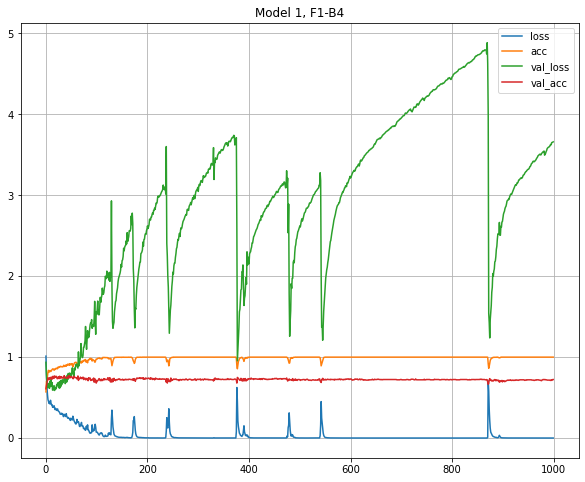

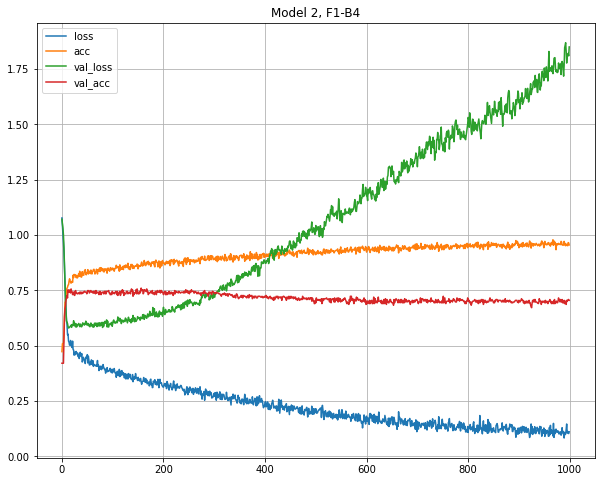

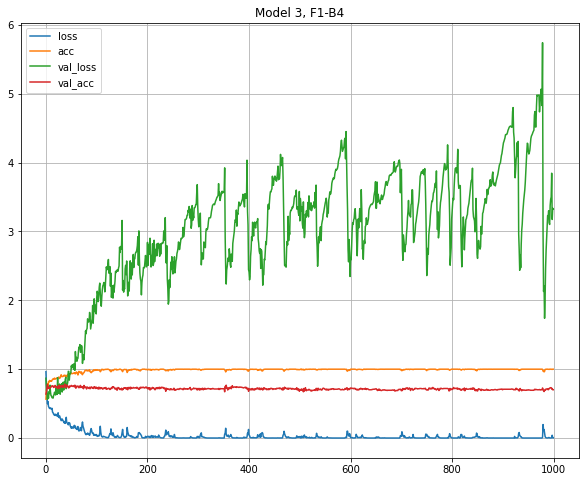

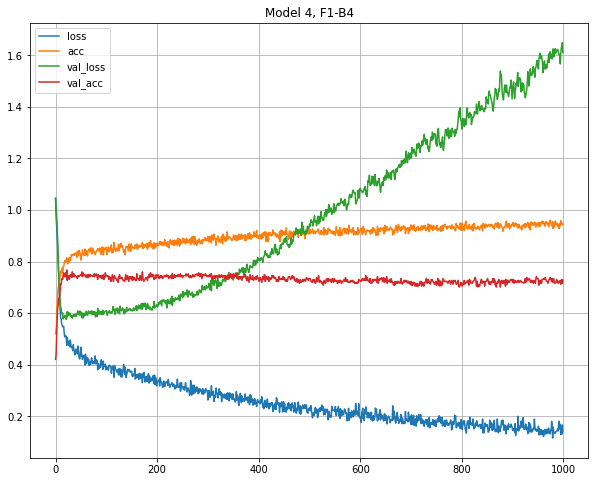

In [57]:
# Visualize the training results
plt.figure(figsize=(10,8))
plt.title('Model 1, F1-B4')
plt.plot(history1.history['loss'],label='loss')
plt.plot(history1.history['accuracy'],label='acc')
plt.plot(history1.history['val_loss'],label='val_loss')
plt.plot(history1.history['val_accuracy'],label='val_acc')
plt.grid()
plt.legend()
plt.show()

# Visualize the training results
plt.figure(figsize=(10,8))
plt.title('Model 2, F1-B4')
plt.plot(history2.history['loss'],label='loss')
plt.plot(history2.history['accuracy'],label='acc')
plt.plot(history2.history['val_loss'],label='val_loss')
plt.plot(history2.history['val_accuracy'],label='val_acc')
plt.grid()
plt.legend()
plt.show()

# Visualize the training results
plt.figure(figsize=(10,8))
plt.title('Model 3, F1-B4')
plt.plot(history3.history['loss'],label='loss')
plt.plot(history3.history['accuracy'],label='acc')
plt.plot(history3.history['val_loss'],label='val_loss')
plt.plot(history3.history['val_accuracy'],label='val_acc')
plt.grid()
plt.legend()
plt.show()

# Visualize the training results
plt.figure(figsize=(10,8))
plt.title('Model 4, F1-B4')
plt.plot(history4.history['loss'],label='loss')
plt.plot(history4.history['accuracy'],label='acc')
plt.plot(history4.history['val_loss'],label='val_loss')
plt.plot(history4.history['val_accuracy'],label='val_acc')
plt.grid()
plt.legend()
plt.show()

In [58]:
# Validation model
print('--------model 1,F1-B4-----------')
score = model1.evaluate(x_valid, y_valid, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])
print('-----------------------------------------------')

# Validation model
print('--------model 2, F1-B4-----------')
score = model2.evaluate(x_valid, y_valid, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])
print('-----------------------------------------------')
# Validation model
print('--------model 3, F1-B4-----------')
score = model3.evaluate(x_valid, y_valid, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])
print('-----------------------------------------------')
# Validation model
print('--------model 4, F1-B4-----------')
score = model4.evaluate(x_valid, y_valid, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])
print('-----------------------------------------------')

--------model 1,F1-B4-----------
Validation loss: 3.660902500152588
Validation accuracy: 0.723247230052948
-----------------------------------------------
--------model 2, F1-B4-----------
Validation loss: 1.849603533744812
Validation accuracy: 0.7047970294952393
-----------------------------------------------
--------model 3, F1-B4-----------
Validation loss: 3.324709177017212
Validation accuracy: 0.7011070251464844
-----------------------------------------------
--------model 4, F1-B4-----------
Validation loss: 3.324709177017212
Validation accuracy: 0.7011070251464844
-----------------------------------------------


## Problem 4
Use the data to predict the gender of the speaker. Try including the format bandwidths as features as well ("B1"-"B4").

In [59]:
genders = ["M","F"]
train = rawtrain[rawtrain["Gender"].isin(genders)]
valid = rawvalid[rawvalid["Gender"].isin(genders)]
trainlabels = [genders.index(ph) for ph in train["Gender"]]
validlabels = [genders.index(ph) for ph in valid["Gender"]]

In [60]:
# Features to use
features = ["F1","F2","F3","F4","B1","B2","B3","B4"]

# Extract features
x_train_raw = train[features]
x_valid_raw = valid[features]

# Normalize to zero mean
x_mean = np.mean(x_train_raw)
x_std = np.std(x_train_raw)
x_train = x_train_raw - x_mean
x_valid = x_valid_raw - x_mean

# Fix labels. The "to_categorical" call maps integer labels {n}
# to a vector of length N (number of labels) with a one in position n
y_train = keras.utils.to_categorical(trainlabels, len(genders))
y_valid = keras.utils.to_categorical(validlabels, len(genders))

# Create a model with a single hidden layer
model1 = keras.Sequential([
    keras.layers.Dense(28*28, activation=tf.nn.relu, input_dim=x_train.shape[1]),
    keras.layers.Dense(32, activation=tf.nn.relu, input_dim=28*28),
    keras.layers.Dense(512, activation=tf.nn.relu, input_dim=32),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation=tf.nn.relu, input_dim=512),
    keras.layers.Dense(len(genders), activation=tf.nn.softmax)
])
print('--------------Model 1---------------')
model1.summary()

# Train the model
model1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history1 = model1.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                    epochs=1000, batch_size=32, verbose=True)

# Create a model with a single hidden layer
model2 = keras.Sequential([
    keras.layers.Dense(64, activation=tf.nn.relu, input_dim=x_train.shape[1]),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(32, activation=tf.nn.relu, input_dim=64),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(16, activation=tf.nn.relu, input_dim=32),
    keras.layers.Dense(len(genders), activation=tf.nn.softmax)
])

print('--------------Model 2---------------')
model2.summary()

# Train the model
model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history2 = model2.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                    epochs=1000, batch_size=32, verbose=True)

# Create a model with a single hidden layer
model3 = keras.Sequential([
    keras.layers.Dense(256, activation=tf.nn.relu, input_dim=x_train.shape[1]),
    keras.layers.Dense(512, activation=tf.nn.relu, input_dim=256),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(512, activation=tf.nn.relu, input_dim=512),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation=tf.nn.relu, input_dim=512),
    keras.layers.Dense(len(genders), activation=tf.nn.softmax)
])

print('--------------Model 3---------------')
model3.summary()

# Train the model
model3.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history3 = model3.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                    epochs=1000, batch_size=32, verbose=True)

# Create a model with a single hidden layer
model4 = keras.Sequential([
    keras.layers.Dense(64, activation=tf.nn.relu, input_dim=x_train.shape[1]),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(len(genders), activation=tf.nn.softmax),
])

print('--------------Model 4---------------')
model4.summary()

# Train the model
model4.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history4 = model4.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                    epochs=1000, batch_size=32, verbose=True)

--------------Model 1---------------
Model: "sequential_54"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_201 (Dense)            (None, 784)               7056      
_________________________________________________________________
dense_202 (Dense)            (None, 32)                25120     
_________________________________________________________________
dense_203 (Dense)            (None, 512)               16896     
_________________________________________________________________
dropout_73 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_204 (Dense)            (None, 64)                32832     
_________________________________________________________________
dense_205 (Dense)            (None, 2)                 130       
Total params: 82,034
Trainable params: 82,034
Non-trainable params: 0
____________

Epoch 49/1000
394/394 [==============================] - 0s 986us/step - loss: 0.2915 - accuracy: 0.8697 - val_loss: 0.9038 - val_accuracy: 0.7706
Epoch 50/1000
394/394 [==============================] - 0s 986us/step - loss: 0.2850 - accuracy: 0.8736 - val_loss: 0.9061 - val_accuracy: 0.7761
Epoch 51/1000
394/394 [==============================] - 0s 988us/step - loss: 0.2836 - accuracy: 0.8763 - val_loss: 0.9216 - val_accuracy: 0.7675
Epoch 52/1000
394/394 [==============================] - 0s 1ms/step - loss: 0.2816 - accuracy: 0.8740 - val_loss: 0.9780 - val_accuracy: 0.7661
Epoch 53/1000
394/394 [==============================] - 0s 993us/step - loss: 0.2787 - accuracy: 0.8794 - val_loss: 1.0636 - val_accuracy: 0.7489
Epoch 54/1000
394/394 [==============================] - 0s 988us/step - loss: 0.2734 - accuracy: 0.8784 - val_loss: 0.9923 - val_accuracy: 0.7617
Epoch 55/1000
394/394 [==============================] - 0s 981us/step - loss: 0.2730 - accuracy: 0.8799 - val_loss: 1.0

Epoch 105/1000
394/394 [==============================] - 0s 986us/step - loss: 0.1650 - accuracy: 0.9294 - val_loss: 2.7787 - val_accuracy: 0.7624
Epoch 106/1000
394/394 [==============================] - 0s 1ms/step - loss: 0.1612 - accuracy: 0.9338 - val_loss: 2.7349 - val_accuracy: 0.7474
Epoch 107/1000
394/394 [==============================] - 0s 988us/step - loss: 0.1545 - accuracy: 0.9372 - val_loss: 2.7211 - val_accuracy: 0.7450
Epoch 108/1000
394/394 [==============================] - 0s 986us/step - loss: 0.1496 - accuracy: 0.9386 - val_loss: 2.9540 - val_accuracy: 0.7348
Epoch 109/1000
394/394 [==============================] - 0s 983us/step - loss: 0.1667 - accuracy: 0.9295 - val_loss: 2.6431 - val_accuracy: 0.7435
Epoch 110/1000
394/394 [==============================] - 0s 983us/step - loss: 0.1600 - accuracy: 0.9333 - val_loss: 2.9103 - val_accuracy: 0.7513
Epoch 111/1000
394/394 [==============================] - 0s 986us/step - loss: 0.1573 - accuracy: 0.9343 - val_lo

394/394 [==============================] - 0s 991us/step - loss: 0.1034 - accuracy: 0.9561 - val_loss: 3.9377 - val_accuracy: 0.7416
Epoch 161/1000
394/394 [==============================] - 0s 986us/step - loss: 0.0981 - accuracy: 0.9605 - val_loss: 3.7749 - val_accuracy: 0.7463
Epoch 162/1000
394/394 [==============================] - 0s 991us/step - loss: 0.1062 - accuracy: 0.9582 - val_loss: 3.7524 - val_accuracy: 0.7422
Epoch 163/1000
394/394 [==============================] - 0s 992us/step - loss: 0.0955 - accuracy: 0.9620 - val_loss: 3.5847 - val_accuracy: 0.7449
Epoch 164/1000
394/394 [==============================] - 0s 991us/step - loss: 0.0973 - accuracy: 0.9631 - val_loss: 3.9330 - val_accuracy: 0.7373
Epoch 165/1000
394/394 [==============================] - 0s 986us/step - loss: 0.1074 - accuracy: 0.9557 - val_loss: 3.4814 - val_accuracy: 0.7471
Epoch 166/1000
394/394 [==============================] - 0s 986us/step - loss: 0.0874 - accuracy: 0.9657 - val_loss: 3.7183 - 

394/394 [==============================] - 0s 983us/step - loss: 0.0521 - accuracy: 0.9805 - val_loss: 4.2138 - val_accuracy: 0.7425
Epoch 216/1000
394/394 [==============================] - 0s 984us/step - loss: 0.0708 - accuracy: 0.9740 - val_loss: 4.0612 - val_accuracy: 0.7365
Epoch 217/1000
394/394 [==============================] - 0s 990us/step - loss: 0.0693 - accuracy: 0.9740 - val_loss: 3.9128 - val_accuracy: 0.7335
Epoch 218/1000
394/394 [==============================] - 0s 988us/step - loss: 0.0647 - accuracy: 0.9769 - val_loss: 4.1797 - val_accuracy: 0.7245
Epoch 219/1000
394/394 [==============================] - 0s 988us/step - loss: 0.0716 - accuracy: 0.9737 - val_loss: 4.2501 - val_accuracy: 0.7464
Epoch 220/1000
394/394 [==============================] - 0s 985us/step - loss: 0.0720 - accuracy: 0.9743 - val_loss: 3.9488 - val_accuracy: 0.7391
Epoch 221/1000
394/394 [==============================] - 0s 991us/step - loss: 0.0903 - accuracy: 0.9670 - val_loss: 3.4281 - 

394/394 [==============================] - 0s 986us/step - loss: 0.0428 - accuracy: 0.9856 - val_loss: 4.6969 - val_accuracy: 0.7387
Epoch 271/1000
394/394 [==============================] - 0s 983us/step - loss: 0.0658 - accuracy: 0.9759 - val_loss: 3.4427 - val_accuracy: 0.7266
Epoch 272/1000
394/394 [==============================] - 0s 988us/step - loss: 0.0719 - accuracy: 0.9739 - val_loss: 3.6123 - val_accuracy: 0.7373
Epoch 273/1000
394/394 [==============================] - 0s 983us/step - loss: 0.0477 - accuracy: 0.9832 - val_loss: 4.0256 - val_accuracy: 0.7398
Epoch 274/1000
394/394 [==============================] - 0s 986us/step - loss: 0.0439 - accuracy: 0.9848 - val_loss: 4.1352 - val_accuracy: 0.7412
Epoch 275/1000
394/394 [==============================] - 0s 981us/step - loss: 0.0445 - accuracy: 0.9838 - val_loss: 4.2184 - val_accuracy: 0.7331
Epoch 276/1000
394/394 [==============================] - 0s 983us/step - loss: 0.0352 - accuracy: 0.9878 - val_loss: 4.6643 - 

394/394 [==============================] - 0s 988us/step - loss: 0.0622 - accuracy: 0.9812 - val_loss: 4.6595 - val_accuracy: 0.7367
Epoch 326/1000
394/394 [==============================] - 0s 986us/step - loss: 0.0346 - accuracy: 0.9882 - val_loss: 5.0505 - val_accuracy: 0.7401
Epoch 327/1000
394/394 [==============================] - 0s 983us/step - loss: 0.0429 - accuracy: 0.9854 - val_loss: 5.1451 - val_accuracy: 0.7331
Epoch 328/1000
394/394 [==============================] - 0s 986us/step - loss: 0.0538 - accuracy: 0.9811 - val_loss: 4.2826 - val_accuracy: 0.7323
Epoch 329/1000
394/394 [==============================] - 0s 990us/step - loss: 0.0344 - accuracy: 0.9873 - val_loss: 5.5923 - val_accuracy: 0.7409
Epoch 330/1000
394/394 [==============================] - 0s 998us/step - loss: 0.0269 - accuracy: 0.9914 - val_loss: 5.7838 - val_accuracy: 0.7320
Epoch 331/1000
394/394 [==============================] - 0s 983us/step - loss: 0.0594 - accuracy: 0.9800 - val_loss: 4.9084 - 

Epoch 381/1000
394/394 [==============================] - 0s 1ms/step - loss: 0.0480 - accuracy: 0.9835 - val_loss: 5.3517 - val_accuracy: 0.7383
Epoch 382/1000
394/394 [==============================] - 0s 983us/step - loss: 0.0301 - accuracy: 0.9903 - val_loss: 5.8888 - val_accuracy: 0.7309
Epoch 383/1000
394/394 [==============================] - 0s 989us/step - loss: 0.0199 - accuracy: 0.9944 - val_loss: 6.5949 - val_accuracy: 0.7311
Epoch 384/1000
394/394 [==============================] - 0s 990us/step - loss: 0.0480 - accuracy: 0.9859 - val_loss: 5.7013 - val_accuracy: 0.7380
Epoch 385/1000
394/394 [==============================] - 0s 996us/step - loss: 0.0484 - accuracy: 0.9832 - val_loss: 5.1953 - val_accuracy: 0.7411
Epoch 386/1000
394/394 [==============================] - 0s 988us/step - loss: 0.0339 - accuracy: 0.9894 - val_loss: 6.1195 - val_accuracy: 0.7324
Epoch 387/1000
394/394 [==============================] - 0s 988us/step - loss: 0.0533 - accuracy: 0.9833 - val_lo

394/394 [==============================] - 0s 999us/step - loss: 0.0217 - accuracy: 0.9931 - val_loss: 7.2005 - val_accuracy: 0.7370
Epoch 437/1000
394/394 [==============================] - 0s 986us/step - loss: 0.0219 - accuracy: 0.9924 - val_loss: 7.5355 - val_accuracy: 0.7418
Epoch 438/1000
394/394 [==============================] - 0s 985us/step - loss: 0.0367 - accuracy: 0.9889 - val_loss: 6.3618 - val_accuracy: 0.7349
Epoch 439/1000
394/394 [==============================] - 0s 992us/step - loss: 0.0382 - accuracy: 0.9884 - val_loss: 7.0127 - val_accuracy: 0.7460
Epoch 440/1000
394/394 [==============================] - 0s 990us/step - loss: 0.0207 - accuracy: 0.9951 - val_loss: 6.8014 - val_accuracy: 0.7485
Epoch 441/1000
394/394 [==============================] - 0s 988us/step - loss: 0.0396 - accuracy: 0.9877 - val_loss: 6.0703 - val_accuracy: 0.7401
Epoch 442/1000
394/394 [==============================] - 0s 983us/step - loss: 0.0303 - accuracy: 0.9909 - val_loss: 6.8744 - 

394/394 [==============================] - 0s 988us/step - loss: 0.0326 - accuracy: 0.9900 - val_loss: 6.9066 - val_accuracy: 0.7290
Epoch 492/1000
394/394 [==============================] - 0s 983us/step - loss: 0.0187 - accuracy: 0.9940 - val_loss: 7.5251 - val_accuracy: 0.7435
Epoch 493/1000
394/394 [==============================] - 0s 988us/step - loss: 0.0265 - accuracy: 0.9932 - val_loss: 7.3809 - val_accuracy: 0.7477
Epoch 494/1000
394/394 [==============================] - 0s 988us/step - loss: 0.0572 - accuracy: 0.9840 - val_loss: 5.9856 - val_accuracy: 0.7390
Epoch 495/1000
394/394 [==============================] - 0s 993us/step - loss: 0.0320 - accuracy: 0.9898 - val_loss: 6.2397 - val_accuracy: 0.7519
Epoch 496/1000
394/394 [==============================] - 0s 991us/step - loss: 0.0210 - accuracy: 0.9941 - val_loss: 6.9411 - val_accuracy: 0.7418
Epoch 497/1000
394/394 [==============================] - 0s 996us/step - loss: 0.0150 - accuracy: 0.9953 - val_loss: 7.9582 - 

394/394 [==============================] - 0s 981us/step - loss: 0.0259 - accuracy: 0.9921 - val_loss: 6.7802 - val_accuracy: 0.7400
Epoch 547/1000
394/394 [==============================] - 0s 991us/step - loss: 0.0132 - accuracy: 0.9957 - val_loss: 8.0217 - val_accuracy: 0.7379
Epoch 548/1000
394/394 [==============================] - 0s 983us/step - loss: 0.0106 - accuracy: 0.9971 - val_loss: 8.1245 - val_accuracy: 0.7400
Epoch 549/1000
394/394 [==============================] - 0s 983us/step - loss: 0.0102 - accuracy: 0.9977 - val_loss: 8.7370 - val_accuracy: 0.7416
Epoch 550/1000
394/394 [==============================] - 0s 986us/step - loss: 0.0299 - accuracy: 0.9906 - val_loss: 7.4922 - val_accuracy: 0.7296
Epoch 551/1000
394/394 [==============================] - 0s 981us/step - loss: 0.0467 - accuracy: 0.9852 - val_loss: 6.4412 - val_accuracy: 0.7429
Epoch 552/1000
394/394 [==============================] - 0s 986us/step - loss: 0.0215 - accuracy: 0.9933 - val_loss: 7.2391 - 

394/394 [==============================] - 0s 994us/step - loss: 0.0191 - accuracy: 0.9936 - val_loss: 9.7493 - val_accuracy: 0.7461
Epoch 602/1000
394/394 [==============================] - 0s 983us/step - loss: 0.0234 - accuracy: 0.9920 - val_loss: 8.9891 - val_accuracy: 0.7367
Epoch 603/1000
394/394 [==============================] - 0s 990us/step - loss: 0.0296 - accuracy: 0.9909 - val_loss: 8.4530 - val_accuracy: 0.7358
Epoch 604/1000
394/394 [==============================] - 0s 978us/step - loss: 0.0168 - accuracy: 0.9950 - val_loss: 8.6863 - val_accuracy: 0.7383
Epoch 605/1000
394/394 [==============================] - 0s 986us/step - loss: 0.0162 - accuracy: 0.9963 - val_loss: 9.1270 - val_accuracy: 0.7411
Epoch 606/1000
394/394 [==============================] - 0s 988us/step - loss: 0.0389 - accuracy: 0.9890 - val_loss: 7.6822 - val_accuracy: 0.7349
Epoch 607/1000
394/394 [==============================] - 0s 996us/step - loss: 0.0314 - accuracy: 0.9898 - val_loss: 8.1941 - 

394/394 [==============================] - 0s 984us/step - loss: 0.0243 - accuracy: 0.9925 - val_loss: 9.0586 - val_accuracy: 0.7307
Epoch 657/1000
394/394 [==============================] - 0s 991us/step - loss: 0.0374 - accuracy: 0.9886 - val_loss: 7.8924 - val_accuracy: 0.7380
Epoch 658/1000
394/394 [==============================] - 0s 981us/step - loss: 0.0176 - accuracy: 0.9943 - val_loss: 8.4663 - val_accuracy: 0.7471
Epoch 659/1000
394/394 [==============================] - 0s 993us/step - loss: 0.0169 - accuracy: 0.9959 - val_loss: 8.6928 - val_accuracy: 0.7412
Epoch 660/1000
394/394 [==============================] - 0s 988us/step - loss: 0.0103 - accuracy: 0.9972 - val_loss: 9.3012 - val_accuracy: 0.7422
Epoch 661/1000
394/394 [==============================] - 0s 988us/step - loss: 0.0118 - accuracy: 0.9962 - val_loss: 9.9898 - val_accuracy: 0.7456
Epoch 662/1000
394/394 [==============================] - 0s 991us/step - loss: 0.0268 - accuracy: 0.9929 - val_loss: 8.9001 - 

394/394 [==============================] - 0s 993us/step - loss: 0.0188 - accuracy: 0.9946 - val_loss: 9.3586 - val_accuracy: 0.7356
Epoch 712/1000
394/394 [==============================] - 0s 991us/step - loss: 0.0213 - accuracy: 0.9940 - val_loss: 9.4244 - val_accuracy: 0.7397
Epoch 713/1000
394/394 [==============================] - 0s 998us/step - loss: 0.0144 - accuracy: 0.9955 - val_loss: 9.8615 - val_accuracy: 0.7407
Epoch 714/1000
394/394 [==============================] - 0s 993us/step - loss: 0.0076 - accuracy: 0.9977 - val_loss: 10.4184 - val_accuracy: 0.7433
Epoch 715/1000
394/394 [==============================] - 0s 1ms/step - loss: 0.0192 - accuracy: 0.9944 - val_loss: 9.3348 - val_accuracy: 0.7352
Epoch 716/1000
394/394 [==============================] - 0s 992us/step - loss: 0.0315 - accuracy: 0.9917 - val_loss: 8.5497 - val_accuracy: 0.7394
Epoch 717/1000
394/394 [==============================] - 0s 986us/step - loss: 0.0252 - accuracy: 0.9936 - val_loss: 8.6322 - v

394/394 [==============================] - 0s 997us/step - loss: 0.0191 - accuracy: 0.9944 - val_loss: 8.8731 - val_accuracy: 0.7418
Epoch 767/1000
394/394 [==============================] - 0s 981us/step - loss: 0.0219 - accuracy: 0.9942 - val_loss: 8.3490 - val_accuracy: 0.7369
Epoch 768/1000
394/394 [==============================] - 0s 991us/step - loss: 0.0273 - accuracy: 0.9913 - val_loss: 8.1733 - val_accuracy: 0.7387
Epoch 769/1000
394/394 [==============================] - 0s 985us/step - loss: 0.0157 - accuracy: 0.9955 - val_loss: 9.2647 - val_accuracy: 0.7321
Epoch 770/1000
394/394 [==============================] - 0s 996us/step - loss: 0.0310 - accuracy: 0.9929 - val_loss: 7.1103 - val_accuracy: 0.7278
Epoch 771/1000
394/394 [==============================] - 0s 992us/step - loss: 0.0078 - accuracy: 0.9983 - val_loss: 8.9302 - val_accuracy: 0.7414
Epoch 772/1000
394/394 [==============================] - 0s 986us/step - loss: 0.0059 - accuracy: 0.9987 - val_loss: 9.6713 - 

394/394 [==============================] - 0s 1000us/step - loss: 0.0254 - accuracy: 0.9936 - val_loss: 8.9163 - val_accuracy: 0.7397
Epoch 822/1000
394/394 [==============================] - 0s 1ms/step - loss: 0.0240 - accuracy: 0.9934 - val_loss: 9.0689 - val_accuracy: 0.7316
Epoch 823/1000
394/394 [==============================] - 0s 1ms/step - loss: 0.0096 - accuracy: 0.9967 - val_loss: 10.6644 - val_accuracy: 0.7433
Epoch 824/1000
394/394 [==============================] - 0s 1ms/step - loss: 0.0201 - accuracy: 0.9948 - val_loss: 8.8208 - val_accuracy: 0.7365
Epoch 825/1000
394/394 [==============================] - 0s 993us/step - loss: 0.0170 - accuracy: 0.9943 - val_loss: 9.8174 - val_accuracy: 0.7369
Epoch 826/1000
394/394 [==============================] - 0s 1ms/step - loss: 0.0250 - accuracy: 0.9929 - val_loss: 8.8833 - val_accuracy: 0.7377
Epoch 827/1000
394/394 [==============================] - 0s 998us/step - loss: 0.0063 - accuracy: 0.9984 - val_loss: 10.7482 - val_a

394/394 [==============================] - 0s 1ms/step - loss: 0.0135 - accuracy: 0.9967 - val_loss: 10.7074 - val_accuracy: 0.7401
Epoch 877/1000
394/394 [==============================] - 0s 1ms/step - loss: 0.0206 - accuracy: 0.9954 - val_loss: 10.1742 - val_accuracy: 0.7376
Epoch 878/1000
394/394 [==============================] - 0s 1ms/step - loss: 0.0142 - accuracy: 0.9955 - val_loss: 10.2910 - val_accuracy: 0.7415
Epoch 879/1000
394/394 [==============================] - 0s 1ms/step - loss: 0.0345 - accuracy: 0.9908 - val_loss: 9.6594 - val_accuracy: 0.7328
Epoch 880/1000
394/394 [==============================] - 0s 1ms/step - loss: 0.0232 - accuracy: 0.9949 - val_loss: 9.8050 - val_accuracy: 0.7477
Epoch 881/1000
394/394 [==============================] - 0s 978us/step - loss: 0.0105 - accuracy: 0.9977 - val_loss: 10.3063 - val_accuracy: 0.7394
Epoch 882/1000
394/394 [==============================] - 0s 978us/step - loss: 0.0139 - accuracy: 0.9970 - val_loss: 10.6160 - val_a

394/394 [==============================] - 0s 993us/step - loss: 0.0161 - accuracy: 0.9956 - val_loss: 10.7640 - val_accuracy: 0.7425
Epoch 932/1000
394/394 [==============================] - 0s 993us/step - loss: 0.0163 - accuracy: 0.9952 - val_loss: 10.6192 - val_accuracy: 0.7365
Epoch 933/1000
394/394 [==============================] - 0s 1ms/step - loss: 0.0223 - accuracy: 0.9942 - val_loss: 9.6696 - val_accuracy: 0.7363
Epoch 934/1000
394/394 [==============================] - 0s 981us/step - loss: 0.0180 - accuracy: 0.9951 - val_loss: 8.8396 - val_accuracy: 0.7363
Epoch 935/1000
394/394 [==============================] - 0s 983us/step - loss: 0.0201 - accuracy: 0.9949 - val_loss: 9.5350 - val_accuracy: 0.7414
Epoch 936/1000
394/394 [==============================] - 0s 1ms/step - loss: 0.0056 - accuracy: 0.9984 - val_loss: 10.5715 - val_accuracy: 0.7383
Epoch 937/1000
394/394 [==============================] - 0s 993us/step - loss: 0.0077 - accuracy: 0.9982 - val_loss: 11.3025 - 

394/394 [==============================] - 0s 982us/step - loss: 0.0212 - accuracy: 0.9932 - val_loss: 10.0867 - val_accuracy: 0.7422
Epoch 987/1000
394/394 [==============================] - 0s 988us/step - loss: 0.0254 - accuracy: 0.9921 - val_loss: 10.0975 - val_accuracy: 0.7435
Epoch 988/1000
394/394 [==============================] - 0s 991us/step - loss: 0.0064 - accuracy: 0.9986 - val_loss: 11.2385 - val_accuracy: 0.7418
Epoch 989/1000
394/394 [==============================] - 0s 983us/step - loss: 0.0186 - accuracy: 0.9945 - val_loss: 10.7065 - val_accuracy: 0.7472
Epoch 990/1000
394/394 [==============================] - 0s 985us/step - loss: 0.0173 - accuracy: 0.9941 - val_loss: 10.4513 - val_accuracy: 0.7418
Epoch 991/1000
394/394 [==============================] - 0s 996us/step - loss: 0.0061 - accuracy: 0.9985 - val_loss: 11.2417 - val_accuracy: 0.7464
Epoch 992/1000
394/394 [==============================] - 0s 986us/step - loss: 0.0084 - accuracy: 0.9979 - val_loss: 11.

Epoch 34/1000
394/394 [==============================] - 0s 578us/step - loss: 0.3934 - accuracy: 0.8235 - val_loss: 0.4539 - val_accuracy: 0.7992
Epoch 35/1000
394/394 [==============================] - 0s 583us/step - loss: 0.3954 - accuracy: 0.8224 - val_loss: 0.4526 - val_accuracy: 0.7993
Epoch 36/1000
394/394 [==============================] - 0s 581us/step - loss: 0.3925 - accuracy: 0.8262 - val_loss: 0.4545 - val_accuracy: 0.8021
Epoch 37/1000
394/394 [==============================] - 0s 578us/step - loss: 0.3916 - accuracy: 0.8257 - val_loss: 0.4465 - val_accuracy: 0.7995
Epoch 38/1000
394/394 [==============================] - 0s 578us/step - loss: 0.3898 - accuracy: 0.8272 - val_loss: 0.4582 - val_accuracy: 0.7943
Epoch 39/1000
394/394 [==============================] - 0s 583us/step - loss: 0.3905 - accuracy: 0.8249 - val_loss: 0.4546 - val_accuracy: 0.7957
Epoch 40/1000
394/394 [==============================] - 0s 581us/step - loss: 0.3899 - accuracy: 0.8280 - val_loss: 0

Epoch 90/1000
394/394 [==============================] - 0s 581us/step - loss: 0.3755 - accuracy: 0.8326 - val_loss: 0.4623 - val_accuracy: 0.7985
Epoch 91/1000
394/394 [==============================] - 0s 583us/step - loss: 0.3768 - accuracy: 0.8314 - val_loss: 0.4625 - val_accuracy: 0.7995
Epoch 92/1000
394/394 [==============================] - 0s 586us/step - loss: 0.3739 - accuracy: 0.8347 - val_loss: 0.4655 - val_accuracy: 0.7916
Epoch 93/1000
394/394 [==============================] - 0s 581us/step - loss: 0.3757 - accuracy: 0.8322 - val_loss: 0.4726 - val_accuracy: 0.7821
Epoch 94/1000
394/394 [==============================] - 0s 578us/step - loss: 0.3764 - accuracy: 0.8331 - val_loss: 0.4642 - val_accuracy: 0.7943
Epoch 95/1000
394/394 [==============================] - 0s 583us/step - loss: 0.3741 - accuracy: 0.8349 - val_loss: 0.4544 - val_accuracy: 0.7978
Epoch 96/1000
394/394 [==============================] - 0s 583us/step - loss: 0.3748 - accuracy: 0.8350 - val_loss: 0

394/394 [==============================] - 0s 587us/step - loss: 0.3647 - accuracy: 0.8378 - val_loss: 0.4699 - val_accuracy: 0.7974
Epoch 146/1000
394/394 [==============================] - 0s 578us/step - loss: 0.3682 - accuracy: 0.8371 - val_loss: 0.4691 - val_accuracy: 0.7985
Epoch 147/1000
394/394 [==============================] - 0s 578us/step - loss: 0.3696 - accuracy: 0.8373 - val_loss: 0.4735 - val_accuracy: 0.7960
Epoch 148/1000
394/394 [==============================] - 0s 583us/step - loss: 0.3687 - accuracy: 0.8344 - val_loss: 0.4722 - val_accuracy: 0.7929
Epoch 149/1000
394/394 [==============================] - 0s 581us/step - loss: 0.3629 - accuracy: 0.8385 - val_loss: 0.4819 - val_accuracy: 0.7848
Epoch 150/1000
394/394 [==============================] - 0s 581us/step - loss: 0.3646 - accuracy: 0.8396 - val_loss: 0.4693 - val_accuracy: 0.7968
Epoch 151/1000
394/394 [==============================] - 0s 587us/step - loss: 0.3667 - accuracy: 0.8370 - val_loss: 0.4824 - 

394/394 [==============================] - 0s 581us/step - loss: 0.3615 - accuracy: 0.8405 - val_loss: 0.4736 - val_accuracy: 0.7876
Epoch 201/1000
394/394 [==============================] - 0s 581us/step - loss: 0.3617 - accuracy: 0.8393 - val_loss: 0.4690 - val_accuracy: 0.7971
Epoch 202/1000
394/394 [==============================] - 0s 581us/step - loss: 0.3595 - accuracy: 0.8420 - val_loss: 0.4748 - val_accuracy: 0.7925
Epoch 203/1000
394/394 [==============================] - 0s 583us/step - loss: 0.3604 - accuracy: 0.8381 - val_loss: 0.4824 - val_accuracy: 0.7913
Epoch 204/1000
394/394 [==============================] - 0s 578us/step - loss: 0.3618 - accuracy: 0.8378 - val_loss: 0.4674 - val_accuracy: 0.7992
Epoch 205/1000
394/394 [==============================] - 0s 578us/step - loss: 0.3608 - accuracy: 0.8394 - val_loss: 0.4813 - val_accuracy: 0.7901
Epoch 206/1000
394/394 [==============================] - 0s 578us/step - loss: 0.3611 - accuracy: 0.8396 - val_loss: 0.4740 - 

394/394 [==============================] - 0s 581us/step - loss: 0.3592 - accuracy: 0.8413 - val_loss: 0.4913 - val_accuracy: 0.7905
Epoch 256/1000
394/394 [==============================] - 0s 578us/step - loss: 0.3558 - accuracy: 0.8414 - val_loss: 0.4803 - val_accuracy: 0.7953
Epoch 257/1000
394/394 [==============================] - 0s 578us/step - loss: 0.3556 - accuracy: 0.8427 - val_loss: 0.4786 - val_accuracy: 0.7950
Epoch 258/1000
394/394 [==============================] - 0s 578us/step - loss: 0.3547 - accuracy: 0.8416 - val_loss: 0.4781 - val_accuracy: 0.7971
Epoch 259/1000
394/394 [==============================] - 0s 576us/step - loss: 0.3602 - accuracy: 0.8408 - val_loss: 0.4822 - val_accuracy: 0.7864
Epoch 260/1000
394/394 [==============================] - 0s 573us/step - loss: 0.3587 - accuracy: 0.8407 - val_loss: 0.4765 - val_accuracy: 0.7964
Epoch 261/1000
394/394 [==============================] - 0s 583us/step - loss: 0.3548 - accuracy: 0.8428 - val_loss: 0.5024 - 

394/394 [==============================] - 0s 578us/step - loss: 0.3554 - accuracy: 0.8437 - val_loss: 0.4997 - val_accuracy: 0.7878
Epoch 311/1000
394/394 [==============================] - 0s 581us/step - loss: 0.3538 - accuracy: 0.8458 - val_loss: 0.4887 - val_accuracy: 0.7894
Epoch 312/1000
394/394 [==============================] - 0s 578us/step - loss: 0.3494 - accuracy: 0.8452 - val_loss: 0.4908 - val_accuracy: 0.7863
Epoch 313/1000
394/394 [==============================] - 0s 576us/step - loss: 0.3515 - accuracy: 0.8431 - val_loss: 0.4910 - val_accuracy: 0.7885
Epoch 314/1000
394/394 [==============================] - 0s 576us/step - loss: 0.3537 - accuracy: 0.8410 - val_loss: 0.4930 - val_accuracy: 0.7831
Epoch 315/1000
394/394 [==============================] - 0s 573us/step - loss: 0.3502 - accuracy: 0.8458 - val_loss: 0.4941 - val_accuracy: 0.7965
Epoch 316/1000
394/394 [==============================] - 0s 576us/step - loss: 0.3541 - accuracy: 0.8407 - val_loss: 0.4949 - 

394/394 [==============================] - 0s 588us/step - loss: 0.3517 - accuracy: 0.8424 - val_loss: 0.4920 - val_accuracy: 0.7860
Epoch 366/1000
394/394 [==============================] - 0s 581us/step - loss: 0.3521 - accuracy: 0.8441 - val_loss: 0.4847 - val_accuracy: 0.7902
Epoch 367/1000
394/394 [==============================] - 0s 578us/step - loss: 0.3522 - accuracy: 0.8454 - val_loss: 0.5088 - val_accuracy: 0.7787
Epoch 368/1000
394/394 [==============================] - 0s 586us/step - loss: 0.3495 - accuracy: 0.8447 - val_loss: 0.4899 - val_accuracy: 0.7953
Epoch 369/1000
394/394 [==============================] - 0s 578us/step - loss: 0.3532 - accuracy: 0.8436 - val_loss: 0.4911 - val_accuracy: 0.7880
Epoch 370/1000
394/394 [==============================] - 0s 583us/step - loss: 0.3531 - accuracy: 0.8454 - val_loss: 0.4956 - val_accuracy: 0.7835
Epoch 371/1000
394/394 [==============================] - 0s 578us/step - loss: 0.3498 - accuracy: 0.8467 - val_loss: 0.4946 - 

394/394 [==============================] - 0s 579us/step - loss: 0.3482 - accuracy: 0.8468 - val_loss: 0.4932 - val_accuracy: 0.7870
Epoch 421/1000
394/394 [==============================] - 0s 578us/step - loss: 0.3508 - accuracy: 0.8449 - val_loss: 0.5025 - val_accuracy: 0.7860
Epoch 422/1000
394/394 [==============================] - 0s 578us/step - loss: 0.3467 - accuracy: 0.8452 - val_loss: 0.5120 - val_accuracy: 0.7827
Epoch 423/1000
394/394 [==============================] - 0s 576us/step - loss: 0.3485 - accuracy: 0.8466 - val_loss: 0.4960 - val_accuracy: 0.7867
Epoch 424/1000
394/394 [==============================] - 0s 588us/step - loss: 0.3498 - accuracy: 0.8467 - val_loss: 0.5042 - val_accuracy: 0.7804
Epoch 425/1000
394/394 [==============================] - 0s 580us/step - loss: 0.3512 - accuracy: 0.8459 - val_loss: 0.4859 - val_accuracy: 0.7927
Epoch 426/1000
394/394 [==============================] - 0s 583us/step - loss: 0.3465 - accuracy: 0.8470 - val_loss: 0.5019 - 

394/394 [==============================] - 0s 590us/step - loss: 0.3464 - accuracy: 0.8477 - val_loss: 0.5055 - val_accuracy: 0.7817
Epoch 476/1000
394/394 [==============================] - 0s 581us/step - loss: 0.3472 - accuracy: 0.8454 - val_loss: 0.5053 - val_accuracy: 0.7824
Epoch 477/1000
394/394 [==============================] - 0s 584us/step - loss: 0.3471 - accuracy: 0.8484 - val_loss: 0.4989 - val_accuracy: 0.7849
Epoch 478/1000
394/394 [==============================] - 0s 591us/step - loss: 0.3465 - accuracy: 0.8481 - val_loss: 0.4942 - val_accuracy: 0.7881
Epoch 479/1000
394/394 [==============================] - 0s 578us/step - loss: 0.3455 - accuracy: 0.8475 - val_loss: 0.5133 - val_accuracy: 0.7790
Epoch 480/1000
394/394 [==============================] - 0s 581us/step - loss: 0.3492 - accuracy: 0.8477 - val_loss: 0.5027 - val_accuracy: 0.7846
Epoch 481/1000
394/394 [==============================] - 0s 578us/step - loss: 0.3507 - accuracy: 0.8458 - val_loss: 0.5093 - 

394/394 [==============================] - 0s 588us/step - loss: 0.3482 - accuracy: 0.8457 - val_loss: 0.5029 - val_accuracy: 0.7873
Epoch 531/1000
394/394 [==============================] - 0s 585us/step - loss: 0.3434 - accuracy: 0.8502 - val_loss: 0.5030 - val_accuracy: 0.7843
Epoch 532/1000
394/394 [==============================] - 0s 583us/step - loss: 0.3491 - accuracy: 0.8461 - val_loss: 0.5059 - val_accuracy: 0.7790
Epoch 533/1000
394/394 [==============================] - 0s 589us/step - loss: 0.3446 - accuracy: 0.8480 - val_loss: 0.5131 - val_accuracy: 0.7807
Epoch 534/1000
394/394 [==============================] - 0s 593us/step - loss: 0.3464 - accuracy: 0.8465 - val_loss: 0.5035 - val_accuracy: 0.7822
Epoch 535/1000
394/394 [==============================] - 0s 582us/step - loss: 0.3485 - accuracy: 0.8430 - val_loss: 0.5053 - val_accuracy: 0.7897
Epoch 536/1000
394/394 [==============================] - 0s 588us/step - loss: 0.3467 - accuracy: 0.8474 - val_loss: 0.5139 - 

394/394 [==============================] - 0s 611us/step - loss: 0.3486 - accuracy: 0.8470 - val_loss: 0.5013 - val_accuracy: 0.7862
Epoch 586/1000
394/394 [==============================] - 0s 592us/step - loss: 0.3461 - accuracy: 0.8447 - val_loss: 0.5088 - val_accuracy: 0.7817
Epoch 587/1000
394/394 [==============================] - 0s 593us/step - loss: 0.3478 - accuracy: 0.8470 - val_loss: 0.5050 - val_accuracy: 0.7881
Epoch 588/1000
394/394 [==============================] - 0s 600us/step - loss: 0.3435 - accuracy: 0.8494 - val_loss: 0.5150 - val_accuracy: 0.7782
Epoch 589/1000
394/394 [==============================] - 0s 590us/step - loss: 0.3444 - accuracy: 0.8496 - val_loss: 0.5019 - val_accuracy: 0.7873
Epoch 590/1000
394/394 [==============================] - 0s 586us/step - loss: 0.3450 - accuracy: 0.8455 - val_loss: 0.5061 - val_accuracy: 0.7825
Epoch 591/1000
394/394 [==============================] - 0s 581us/step - loss: 0.3446 - accuracy: 0.8488 - val_loss: 0.5059 - 

394/394 [==============================] - 0s 581us/step - loss: 0.3462 - accuracy: 0.8466 - val_loss: 0.4998 - val_accuracy: 0.7843
Epoch 641/1000
394/394 [==============================] - 0s 581us/step - loss: 0.3474 - accuracy: 0.8442 - val_loss: 0.5079 - val_accuracy: 0.7857
Epoch 642/1000
394/394 [==============================] - 0s 578us/step - loss: 0.3454 - accuracy: 0.8440 - val_loss: 0.5090 - val_accuracy: 0.7842
Epoch 643/1000
394/394 [==============================] - 0s 580us/step - loss: 0.3414 - accuracy: 0.8497 - val_loss: 0.5180 - val_accuracy: 0.7775
Epoch 644/1000
394/394 [==============================] - 0s 581us/step - loss: 0.3445 - accuracy: 0.8472 - val_loss: 0.5140 - val_accuracy: 0.7824
Epoch 645/1000
394/394 [==============================] - 0s 575us/step - loss: 0.3458 - accuracy: 0.8471 - val_loss: 0.5071 - val_accuracy: 0.7856
Epoch 646/1000
394/394 [==============================] - 0s 573us/step - loss: 0.3447 - accuracy: 0.8450 - val_loss: 0.4924 - 

394/394 [==============================] - 0s 580us/step - loss: 0.3475 - accuracy: 0.8454 - val_loss: 0.5178 - val_accuracy: 0.7824
Epoch 696/1000
394/394 [==============================] - 0s 582us/step - loss: 0.3436 - accuracy: 0.8467 - val_loss: 0.5236 - val_accuracy: 0.7748
Epoch 697/1000
394/394 [==============================] - 0s 583us/step - loss: 0.3447 - accuracy: 0.8495 - val_loss: 0.5203 - val_accuracy: 0.7796
Epoch 698/1000
394/394 [==============================] - 0s 576us/step - loss: 0.3426 - accuracy: 0.8479 - val_loss: 0.5186 - val_accuracy: 0.7855
Epoch 699/1000
394/394 [==============================] - 0s 578us/step - loss: 0.3483 - accuracy: 0.8441 - val_loss: 0.5206 - val_accuracy: 0.7818
Epoch 700/1000
394/394 [==============================] - 0s 590us/step - loss: 0.3469 - accuracy: 0.8485 - val_loss: 0.5072 - val_accuracy: 0.7869
Epoch 701/1000
394/394 [==============================] - 0s 578us/step - loss: 0.3414 - accuracy: 0.8479 - val_loss: 0.5167 - 

394/394 [==============================] - 0s 578us/step - loss: 0.3390 - accuracy: 0.8497 - val_loss: 0.5187 - val_accuracy: 0.7863
Epoch 751/1000
394/394 [==============================] - 0s 581us/step - loss: 0.3413 - accuracy: 0.8474 - val_loss: 0.5289 - val_accuracy: 0.7789
Epoch 752/1000
394/394 [==============================] - 0s 578us/step - loss: 0.3419 - accuracy: 0.8494 - val_loss: 0.5241 - val_accuracy: 0.7751
Epoch 753/1000
394/394 [==============================] - 0s 578us/step - loss: 0.3406 - accuracy: 0.8474 - val_loss: 0.5205 - val_accuracy: 0.7820
Epoch 754/1000
394/394 [==============================] - 0s 581us/step - loss: 0.3431 - accuracy: 0.8468 - val_loss: 0.5182 - val_accuracy: 0.7827
Epoch 755/1000
394/394 [==============================] - 0s 581us/step - loss: 0.3431 - accuracy: 0.8489 - val_loss: 0.5201 - val_accuracy: 0.7807
Epoch 756/1000
394/394 [==============================] - 0s 581us/step - loss: 0.3500 - accuracy: 0.8454 - val_loss: 0.5172 - 

394/394 [==============================] - 0s 581us/step - loss: 0.3390 - accuracy: 0.8505 - val_loss: 0.5174 - val_accuracy: 0.7779
Epoch 806/1000
394/394 [==============================] - 0s 578us/step - loss: 0.3437 - accuracy: 0.8488 - val_loss: 0.5162 - val_accuracy: 0.7848
Epoch 807/1000
394/394 [==============================] - 0s 578us/step - loss: 0.3408 - accuracy: 0.8482 - val_loss: 0.5109 - val_accuracy: 0.7866
Epoch 808/1000
394/394 [==============================] - 0s 576us/step - loss: 0.3415 - accuracy: 0.8484 - val_loss: 0.5182 - val_accuracy: 0.7789
Epoch 809/1000
394/394 [==============================] - 0s 580us/step - loss: 0.3400 - accuracy: 0.8482 - val_loss: 0.5188 - val_accuracy: 0.7852
Epoch 810/1000
394/394 [==============================] - 0s 586us/step - loss: 0.3410 - accuracy: 0.8480 - val_loss: 0.5102 - val_accuracy: 0.7835
Epoch 811/1000
394/394 [==============================] - 0s 581us/step - loss: 0.3413 - accuracy: 0.8515 - val_loss: 0.5138 - 

394/394 [==============================] - 0s 581us/step - loss: 0.3401 - accuracy: 0.8519 - val_loss: 0.5204 - val_accuracy: 0.7842
Epoch 861/1000
394/394 [==============================] - 0s 583us/step - loss: 0.3383 - accuracy: 0.8490 - val_loss: 0.5213 - val_accuracy: 0.7804
Epoch 862/1000
394/394 [==============================] - 0s 583us/step - loss: 0.3418 - accuracy: 0.8514 - val_loss: 0.5188 - val_accuracy: 0.7796
Epoch 863/1000
394/394 [==============================] - 0s 583us/step - loss: 0.3382 - accuracy: 0.8515 - val_loss: 0.5178 - val_accuracy: 0.7843
Epoch 864/1000
394/394 [==============================] - 0s 581us/step - loss: 0.3415 - accuracy: 0.8466 - val_loss: 0.5153 - val_accuracy: 0.7838
Epoch 865/1000
394/394 [==============================] - 0s 583us/step - loss: 0.3416 - accuracy: 0.8507 - val_loss: 0.5104 - val_accuracy: 0.7825
Epoch 866/1000
394/394 [==============================] - 0s 586us/step - loss: 0.3394 - accuracy: 0.8479 - val_loss: 0.5163 - 

394/394 [==============================] - 0s 575us/step - loss: 0.3388 - accuracy: 0.8475 - val_loss: 0.5242 - val_accuracy: 0.7839
Epoch 916/1000
394/394 [==============================] - 0s 578us/step - loss: 0.3407 - accuracy: 0.8487 - val_loss: 0.5208 - val_accuracy: 0.7843
Epoch 917/1000
394/394 [==============================] - 0s 581us/step - loss: 0.3376 - accuracy: 0.8511 - val_loss: 0.5138 - val_accuracy: 0.7895
Epoch 918/1000
394/394 [==============================] - 0s 593us/step - loss: 0.3392 - accuracy: 0.8489 - val_loss: 0.5267 - val_accuracy: 0.7808
Epoch 919/1000
394/394 [==============================] - 0s 573us/step - loss: 0.3400 - accuracy: 0.8520 - val_loss: 0.5108 - val_accuracy: 0.7870
Epoch 920/1000
394/394 [==============================] - 0s 580us/step - loss: 0.3380 - accuracy: 0.8535 - val_loss: 0.5158 - val_accuracy: 0.7845
Epoch 921/1000
394/394 [==============================] - 0s 573us/step - loss: 0.3379 - accuracy: 0.8521 - val_loss: 0.5083 - 

394/394 [==============================] - 0s 593us/step - loss: 0.3395 - accuracy: 0.8501 - val_loss: 0.5201 - val_accuracy: 0.7850
Epoch 971/1000
394/394 [==============================] - 0s 586us/step - loss: 0.3387 - accuracy: 0.8531 - val_loss: 0.5204 - val_accuracy: 0.7813
Epoch 972/1000
394/394 [==============================] - 0s 583us/step - loss: 0.3385 - accuracy: 0.8471 - val_loss: 0.5120 - val_accuracy: 0.7918
Epoch 973/1000
394/394 [==============================] - 0s 582us/step - loss: 0.3463 - accuracy: 0.8459 - val_loss: 0.5123 - val_accuracy: 0.7848
Epoch 974/1000
394/394 [==============================] - 0s 581us/step - loss: 0.3386 - accuracy: 0.8503 - val_loss: 0.5169 - val_accuracy: 0.7871
Epoch 975/1000
394/394 [==============================] - 0s 578us/step - loss: 0.3383 - accuracy: 0.8513 - val_loss: 0.5220 - val_accuracy: 0.7874
Epoch 976/1000
394/394 [==============================] - 0s 586us/step - loss: 0.3386 - accuracy: 0.8479 - val_loss: 0.5258 - 

Epoch 17/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.3690 - accuracy: 0.8346 - val_loss: 0.5127 - val_accuracy: 0.7731
Epoch 18/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.3667 - accuracy: 0.8352 - val_loss: 0.5082 - val_accuracy: 0.7873
Epoch 19/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.3652 - accuracy: 0.8373 - val_loss: 0.5249 - val_accuracy: 0.7835
Epoch 20/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.3617 - accuracy: 0.8374 - val_loss: 0.4886 - val_accuracy: 0.7881
Epoch 21/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.3594 - accuracy: 0.8382 - val_loss: 0.4964 - val_accuracy: 0.7752
Epoch 22/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.3579 - accuracy: 0.8369 - val_loss: 0.5377 - val_accuracy: 0.7986
Epoch 23/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.3538 - accuracy: 0.8412 - val_loss: 0.5296 - val_ac

394/394 [==============================] - 1s 2ms/step - loss: 0.1930 - accuracy: 0.9152 - val_loss: 1.7709 - val_accuracy: 0.7565
Epoch 74/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.1801 - accuracy: 0.9236 - val_loss: 1.7263 - val_accuracy: 0.7561
Epoch 75/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.1822 - accuracy: 0.9227 - val_loss: 2.0802 - val_accuracy: 0.7526
Epoch 76/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.1714 - accuracy: 0.9266 - val_loss: 2.1751 - val_accuracy: 0.7499
Epoch 77/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.1791 - accuracy: 0.9262 - val_loss: 2.0151 - val_accuracy: 0.7510
Epoch 78/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.1729 - accuracy: 0.9276 - val_loss: 1.9657 - val_accuracy: 0.7517
Epoch 79/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.1711 - accuracy: 0.9272 - val_loss: 2.0712 - val_accuracy: 0.7495

394/394 [==============================] - 1s 2ms/step - loss: 0.0952 - accuracy: 0.9619 - val_loss: 3.1865 - val_accuracy: 0.7429
Epoch 130/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.0902 - accuracy: 0.9647 - val_loss: 3.3860 - val_accuracy: 0.7450
Epoch 131/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.0942 - accuracy: 0.9642 - val_loss: 3.0169 - val_accuracy: 0.7475
Epoch 132/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.0919 - accuracy: 0.9622 - val_loss: 3.4420 - val_accuracy: 0.7393
Epoch 133/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.0930 - accuracy: 0.9615 - val_loss: 3.6349 - val_accuracy: 0.7436
Epoch 134/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.0975 - accuracy: 0.9612 - val_loss: 3.4399 - val_accuracy: 0.7439
Epoch 135/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.0914 - accuracy: 0.9640 - val_loss: 3.3310 - val_accuracy: 

394/394 [==============================] - 1s 2ms/step - loss: 0.0698 - accuracy: 0.9728 - val_loss: 3.9045 - val_accuracy: 0.7439
Epoch 186/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.0583 - accuracy: 0.9782 - val_loss: 4.4492 - val_accuracy: 0.7442
Epoch 187/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.0688 - accuracy: 0.9746 - val_loss: 3.9022 - val_accuracy: 0.7358
Epoch 188/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.0548 - accuracy: 0.9805 - val_loss: 4.4272 - val_accuracy: 0.7428
Epoch 189/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.0631 - accuracy: 0.9778 - val_loss: 4.0539 - val_accuracy: 0.7443
Epoch 190/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.0574 - accuracy: 0.9801 - val_loss: 4.1500 - val_accuracy: 0.7470
Epoch 191/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.0692 - accuracy: 0.9767 - val_loss: 3.6640 - val_accuracy: 

394/394 [==============================] - 1s 2ms/step - loss: 0.0437 - accuracy: 0.9839 - val_loss: 4.8031 - val_accuracy: 0.7416
Epoch 242/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.0436 - accuracy: 0.9840 - val_loss: 5.2240 - val_accuracy: 0.7472
Epoch 243/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.0550 - accuracy: 0.9800 - val_loss: 4.4317 - val_accuracy: 0.7454
Epoch 244/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.0420 - accuracy: 0.9836 - val_loss: 4.8839 - val_accuracy: 0.7464
Epoch 245/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.0490 - accuracy: 0.9819 - val_loss: 4.5863 - val_accuracy: 0.7486
Epoch 246/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.0419 - accuracy: 0.9840 - val_loss: 5.4405 - val_accuracy: 0.7477
Epoch 247/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.0611 - accuracy: 0.9779 - val_loss: 4.5296 - val_accuracy: 

394/394 [==============================] - 1s 2ms/step - loss: 0.0383 - accuracy: 0.9869 - val_loss: 5.2481 - val_accuracy: 0.7436
Epoch 298/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.0447 - accuracy: 0.9851 - val_loss: 5.1246 - val_accuracy: 0.7367
Epoch 299/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.0328 - accuracy: 0.9883 - val_loss: 5.7526 - val_accuracy: 0.7478
Epoch 300/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.0413 - accuracy: 0.9859 - val_loss: 5.7184 - val_accuracy: 0.7451
Epoch 301/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.0372 - accuracy: 0.9861 - val_loss: 5.9185 - val_accuracy: 0.7423
Epoch 302/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.0354 - accuracy: 0.9882 - val_loss: 6.3930 - val_accuracy: 0.7535
Epoch 303/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.0368 - accuracy: 0.9871 - val_loss: 5.6841 - val_accuracy: 

394/394 [==============================] - 1s 2ms/step - loss: 0.0382 - accuracy: 0.9863 - val_loss: 6.5144 - val_accuracy: 0.7447
Epoch 354/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.0364 - accuracy: 0.9871 - val_loss: 5.9470 - val_accuracy: 0.7457
Epoch 355/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.0446 - accuracy: 0.9856 - val_loss: 5.4798 - val_accuracy: 0.7446
Epoch 356/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.0380 - accuracy: 0.9863 - val_loss: 5.2497 - val_accuracy: 0.7412
Epoch 357/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.0358 - accuracy: 0.9878 - val_loss: 5.4101 - val_accuracy: 0.7383
Epoch 358/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.0338 - accuracy: 0.9882 - val_loss: 5.8747 - val_accuracy: 0.7430
Epoch 359/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.0269 - accuracy: 0.9907 - val_loss: 6.2229 - val_accuracy: 

394/394 [==============================] - 1s 2ms/step - loss: 0.0285 - accuracy: 0.9900 - val_loss: 6.9251 - val_accuracy: 0.7544
Epoch 410/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.0341 - accuracy: 0.9899 - val_loss: 6.5489 - val_accuracy: 0.7412
Epoch 411/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.0243 - accuracy: 0.9905 - val_loss: 7.4583 - val_accuracy: 0.7484
Epoch 412/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.0307 - accuracy: 0.9904 - val_loss: 6.6833 - val_accuracy: 0.7472
Epoch 413/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.0282 - accuracy: 0.9904 - val_loss: 6.3743 - val_accuracy: 0.7416
Epoch 414/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.0290 - accuracy: 0.9900 - val_loss: 6.9528 - val_accuracy: 0.7569
Epoch 415/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.0356 - accuracy: 0.9889 - val_loss: 6.4586 - val_accuracy: 

394/394 [==============================] - 1s 2ms/step - loss: 0.0252 - accuracy: 0.9902 - val_loss: 7.6663 - val_accuracy: 0.7499
Epoch 466/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.0295 - accuracy: 0.9897 - val_loss: 7.7603 - val_accuracy: 0.7482
Epoch 467/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.0253 - accuracy: 0.9919 - val_loss: 7.7024 - val_accuracy: 0.7474
Epoch 468/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.0249 - accuracy: 0.9914 - val_loss: 8.1372 - val_accuracy: 0.7451
Epoch 469/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.0228 - accuracy: 0.9923 - val_loss: 7.6761 - val_accuracy: 0.7495
Epoch 470/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.0307 - accuracy: 0.9887 - val_loss: 8.2392 - val_accuracy: 0.7453
Epoch 471/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.0229 - accuracy: 0.9921 - val_loss: 8.4240 - val_accuracy: 

Epoch 521/1000
394/394 [==============================] - 1s 3ms/step - loss: 0.0236 - accuracy: 0.9928 - val_loss: 7.5289 - val_accuracy: 0.7495
Epoch 522/1000
394/394 [==============================] - 1s 3ms/step - loss: 0.0201 - accuracy: 0.9929 - val_loss: 8.5026 - val_accuracy: 0.7519
Epoch 523/1000
394/394 [==============================] - 1s 3ms/step - loss: 0.0255 - accuracy: 0.9912 - val_loss: 7.8151 - val_accuracy: 0.7464
Epoch 524/1000
394/394 [==============================] - 1s 3ms/step - loss: 0.0245 - accuracy: 0.9917 - val_loss: 7.3768 - val_accuracy: 0.7499
Epoch 525/1000
394/394 [==============================] - 1s 3ms/step - loss: 0.0239 - accuracy: 0.9929 - val_loss: 7.5101 - val_accuracy: 0.7545
Epoch 526/1000
394/394 [==============================] - 1s 3ms/step - loss: 0.0233 - accuracy: 0.9925 - val_loss: 7.3119 - val_accuracy: 0.7454
Epoch 527/1000
394/394 [==============================] - 1s 3ms/step - loss: 0.0227 - accuracy: 0.9921 - val_loss: 7.7814 -

394/394 [==============================] - 1s 3ms/step - loss: 0.0243 - accuracy: 0.9917 - val_loss: 6.6031 - val_accuracy: 0.7461
Epoch 578/1000
394/394 [==============================] - 1s 3ms/step - loss: 0.0162 - accuracy: 0.9943 - val_loss: 7.5293 - val_accuracy: 0.7461
Epoch 579/1000
394/394 [==============================] - 1s 3ms/step - loss: 0.0182 - accuracy: 0.9940 - val_loss: 7.4372 - val_accuracy: 0.7451
Epoch 580/1000
394/394 [==============================] - 1s 3ms/step - loss: 0.0217 - accuracy: 0.9934 - val_loss: 7.0198 - val_accuracy: 0.7481
Epoch 581/1000
394/394 [==============================] - 1s 3ms/step - loss: 0.0212 - accuracy: 0.9932 - val_loss: 7.0465 - val_accuracy: 0.7478
Epoch 582/1000
394/394 [==============================] - 1s 3ms/step - loss: 0.0190 - accuracy: 0.9936 - val_loss: 7.1015 - val_accuracy: 0.7436
Epoch 583/1000
394/394 [==============================] - 1s 4ms/step - loss: 0.0268 - accuracy: 0.9921 - val_loss: 6.9035 - val_accuracy: 

Epoch 633/1000
394/394 [==============================] - 1s 3ms/step - loss: 0.0245 - accuracy: 0.9917 - val_loss: 7.3725 - val_accuracy: 0.7493
Epoch 634/1000
394/394 [==============================] - 1s 3ms/step - loss: 0.0194 - accuracy: 0.9933 - val_loss: 8.9108 - val_accuracy: 0.7465
Epoch 635/1000
394/394 [==============================] - 1s 3ms/step - loss: 0.0206 - accuracy: 0.9934 - val_loss: 9.0632 - val_accuracy: 0.7442
Epoch 636/1000
394/394 [==============================] - 1s 3ms/step - loss: 0.0344 - accuracy: 0.9901 - val_loss: 9.6948 - val_accuracy: 0.7496
Epoch 637/1000
394/394 [==============================] - 1s 3ms/step - loss: 0.0175 - accuracy: 0.9942 - val_loss: 8.7982 - val_accuracy: 0.7471
Epoch 638/1000
394/394 [==============================] - ETA: 0s - loss: 0.0176 - accuracy: 0.99 - 1s 3ms/step - loss: 0.0176 - accuracy: 0.9936 - val_loss: 9.8943 - val_accuracy: 0.7460
Epoch 639/1000
394/394 [==============================] - 1s 3ms/step - loss: 0.02

394/394 [==============================] - 1s 3ms/step - loss: 0.0192 - accuracy: 0.9938 - val_loss: 9.6517 - val_accuracy: 0.7544
Epoch 689/1000
394/394 [==============================] - 1s 3ms/step - loss: 0.0241 - accuracy: 0.9919 - val_loss: 8.8639 - val_accuracy: 0.7433
Epoch 690/1000
394/394 [==============================] - 1s 3ms/step - loss: 0.0197 - accuracy: 0.9939 - val_loss: 8.5287 - val_accuracy: 0.7359
Epoch 691/1000
394/394 [==============================] - 1s 3ms/step - loss: 0.0186 - accuracy: 0.9936 - val_loss: 9.3755 - val_accuracy: 0.7418
Epoch 692/1000
394/394 [==============================] - 1s 3ms/step - loss: 0.0189 - accuracy: 0.9947 - val_loss: 9.3733 - val_accuracy: 0.7432
Epoch 693/1000
394/394 [==============================] - 1s 3ms/step - loss: 0.0189 - accuracy: 0.9944 - val_loss: 9.6129 - val_accuracy: 0.7488
Epoch 694/1000
394/394 [==============================] - 1s 3ms/step - loss: 0.0244 - accuracy: 0.9917 - val_loss: 8.3621 - val_accuracy: 

394/394 [==============================] - 1s 3ms/step - loss: 0.0187 - accuracy: 0.9935 - val_loss: 9.6468 - val_accuracy: 0.7481
Epoch 745/1000
394/394 [==============================] - 1s 3ms/step - loss: 0.0183 - accuracy: 0.9946 - val_loss: 10.7906 - val_accuracy: 0.7531
Epoch 746/1000
394/394 [==============================] - 1s 3ms/step - loss: 0.0274 - accuracy: 0.9921 - val_loss: 10.3671 - val_accuracy: 0.7474
Epoch 747/1000
394/394 [==============================] - 1s 4ms/step - loss: 0.0195 - accuracy: 0.9931 - val_loss: 9.7329 - val_accuracy: 0.7464
Epoch 748/1000
394/394 [==============================] - 1s 3ms/step - loss: 0.0170 - accuracy: 0.9949 - val_loss: 11.0827 - val_accuracy: 0.7440
Epoch 749/1000
394/394 [==============================] - 1s 3ms/step - loss: 0.0190 - accuracy: 0.9940 - val_loss: 9.7675 - val_accuracy: 0.7492
Epoch 750/1000
394/394 [==============================] - 1s 3ms/step - loss: 0.0175 - accuracy: 0.9941 - val_loss: 11.0410 - val_accura

Epoch 800/1000
394/394 [==============================] - 1s 3ms/step - loss: 0.0214 - accuracy: 0.9940 - val_loss: 11.0312 - val_accuracy: 0.7440
Epoch 801/1000
394/394 [==============================] - 1s 3ms/step - loss: 0.0245 - accuracy: 0.9936 - val_loss: 9.9981 - val_accuracy: 0.7470
Epoch 802/1000
394/394 [==============================] - 1s 3ms/step - loss: 0.0145 - accuracy: 0.9953 - val_loss: 11.8490 - val_accuracy: 0.7419
Epoch 803/1000
394/394 [==============================] - 1s 3ms/step - loss: 0.0196 - accuracy: 0.9940 - val_loss: 10.9076 - val_accuracy: 0.7495
Epoch 804/1000
394/394 [==============================] - 1s 3ms/step - loss: 0.0179 - accuracy: 0.9941 - val_loss: 10.7306 - val_accuracy: 0.7502
Epoch 805/1000
394/394 [==============================] - 1s 3ms/step - loss: 0.0153 - accuracy: 0.9953 - val_loss: 11.4070 - val_accuracy: 0.7496
Epoch 806/1000
394/394 [==============================] - 1s 3ms/step - loss: 0.0191 - accuracy: 0.9936 - val_loss: 10.

394/394 [==============================] - 1s 2ms/step - loss: 0.0168 - accuracy: 0.9947 - val_loss: 10.5400 - val_accuracy: 0.7444
Epoch 856/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.0155 - accuracy: 0.9960 - val_loss: 9.6826 - val_accuracy: 0.7337
Epoch 857/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.0178 - accuracy: 0.9941 - val_loss: 10.7189 - val_accuracy: 0.7484
Epoch 858/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.0192 - accuracy: 0.9944 - val_loss: 8.2739 - val_accuracy: 0.7397
Epoch 859/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.0160 - accuracy: 0.9951 - val_loss: 10.3644 - val_accuracy: 0.7488
Epoch 860/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.0126 - accuracy: 0.9963 - val_loss: 10.5360 - val_accuracy: 0.7458
Epoch 861/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.0196 - accuracy: 0.9935 - val_loss: 8.9703 - val_accura

Epoch 911/1000
394/394 [==============================] - 1s 3ms/step - loss: 0.0160 - accuracy: 0.9946 - val_loss: 8.8232 - val_accuracy: 0.7447
Epoch 912/1000
394/394 [==============================] - 1s 3ms/step - loss: 0.0153 - accuracy: 0.9947 - val_loss: 10.0036 - val_accuracy: 0.7477
Epoch 913/1000
394/394 [==============================] - 1s 3ms/step - loss: 0.0169 - accuracy: 0.9952 - val_loss: 11.4318 - val_accuracy: 0.7491
Epoch 914/1000
394/394 [==============================] - 1s 3ms/step - loss: 0.0151 - accuracy: 0.9953 - val_loss: 11.3385 - val_accuracy: 0.7498
Epoch 915/1000
394/394 [==============================] - 1s 3ms/step - loss: 0.0187 - accuracy: 0.9935 - val_loss: 12.2985 - val_accuracy: 0.7514
Epoch 916/1000
394/394 [==============================] - 1s 3ms/step - loss: 0.0216 - accuracy: 0.9932 - val_loss: 12.6334 - val_accuracy: 0.7486
Epoch 917/1000
394/394 [==============================] - 1s 3ms/step - loss: 0.0164 - accuracy: 0.9946 - val_loss: 12.

Epoch 967/1000
394/394 [==============================] - 1s 3ms/step - loss: 0.0180 - accuracy: 0.9947 - val_loss: 9.8412 - val_accuracy: 0.7419
Epoch 968/1000
394/394 [==============================] - 1s 3ms/step - loss: 0.0150 - accuracy: 0.9960 - val_loss: 8.5209 - val_accuracy: 0.7433
Epoch 969/1000
394/394 [==============================] - 1s 3ms/step - loss: 0.0172 - accuracy: 0.9951 - val_loss: 9.7282 - val_accuracy: 0.7446
Epoch 970/1000
394/394 [==============================] - 1s 3ms/step - loss: 0.0193 - accuracy: 0.9934 - val_loss: 10.8663 - val_accuracy: 0.7421
Epoch 971/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.0140 - accuracy: 0.9954 - val_loss: 11.0027 - val_accuracy: 0.7374
Epoch 972/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.0127 - accuracy: 0.9961 - val_loss: 11.8327 - val_accuracy: 0.7369
Epoch 973/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.0130 - accuracy: 0.9961 - val_loss: 10.74

Epoch 16/1000
394/394 [==============================] - 0s 923us/step - loss: 0.4050 - accuracy: 0.8181 - val_loss: 0.4536 - val_accuracy: 0.7992
Epoch 17/1000
394/394 [==============================] - 0s 952us/step - loss: 0.4038 - accuracy: 0.8204 - val_loss: 0.4558 - val_accuracy: 0.7958
Epoch 18/1000
394/394 [==============================] - 0s 886us/step - loss: 0.4043 - accuracy: 0.8186 - val_loss: 0.4637 - val_accuracy: 0.7946
Epoch 19/1000
394/394 [==============================] - 0s 963us/step - loss: 0.4043 - accuracy: 0.8223 - val_loss: 0.4466 - val_accuracy: 0.8004
Epoch 20/1000
394/394 [==============================] - 0s 947us/step - loss: 0.4030 - accuracy: 0.8191 - val_loss: 0.4502 - val_accuracy: 0.7968
Epoch 21/1000
394/394 [==============================] - 0s 954us/step - loss: 0.4021 - accuracy: 0.8204 - val_loss: 0.4433 - val_accuracy: 0.7990
Epoch 22/1000
394/394 [==============================] - 0s 940us/step - loss: 0.4001 - accuracy: 0.8225 - val_loss: 0

394/394 [==============================] - 0s 917us/step - loss: 0.3875 - accuracy: 0.8273 - val_loss: 0.4534 - val_accuracy: 0.7951
Epoch 72/1000
394/394 [==============================] - 0s 902us/step - loss: 0.3879 - accuracy: 0.8292 - val_loss: 0.4536 - val_accuracy: 0.7947
Epoch 73/1000
394/394 [==============================] - 0s 896us/step - loss: 0.3868 - accuracy: 0.8260 - val_loss: 0.4567 - val_accuracy: 0.7941
Epoch 74/1000
394/394 [==============================] - 0s 881us/step - loss: 0.3841 - accuracy: 0.8300 - val_loss: 0.4540 - val_accuracy: 0.7954
Epoch 75/1000
394/394 [==============================] - 0s 909us/step - loss: 0.3861 - accuracy: 0.8261 - val_loss: 0.4524 - val_accuracy: 0.7967
Epoch 76/1000
394/394 [==============================] - 0s 907us/step - loss: 0.3837 - accuracy: 0.8309 - val_loss: 0.4448 - val_accuracy: 0.8004
Epoch 77/1000
394/394 [==============================] - 0s 904us/step - loss: 0.3855 - accuracy: 0.8297 - val_loss: 0.4678 - val_ac

394/394 [==============================] - 0s 909us/step - loss: 0.3783 - accuracy: 0.8288 - val_loss: 0.4659 - val_accuracy: 0.7901
Epoch 127/1000
394/394 [==============================] - 0s 937us/step - loss: 0.3788 - accuracy: 0.8328 - val_loss: 0.4631 - val_accuracy: 0.7927
Epoch 128/1000
394/394 [==============================] - 0s 939us/step - loss: 0.3803 - accuracy: 0.8314 - val_loss: 0.4601 - val_accuracy: 0.7976
Epoch 129/1000
394/394 [==============================] - 0s 925us/step - loss: 0.3803 - accuracy: 0.8285 - val_loss: 0.4576 - val_accuracy: 0.7951
Epoch 130/1000
394/394 [==============================] - 0s 917us/step - loss: 0.3791 - accuracy: 0.8287 - val_loss: 0.4579 - val_accuracy: 0.7922
Epoch 131/1000
394/394 [==============================] - 0s 889us/step - loss: 0.3761 - accuracy: 0.8311 - val_loss: 0.4584 - val_accuracy: 0.7962
Epoch 132/1000
394/394 [==============================] - 0s 919us/step - loss: 0.3751 - accuracy: 0.8345 - val_loss: 0.4694 - 

394/394 [==============================] - 0s 914us/step - loss: 0.3715 - accuracy: 0.8340 - val_loss: 0.4748 - val_accuracy: 0.7880
Epoch 182/1000
394/394 [==============================] - 0s 896us/step - loss: 0.3732 - accuracy: 0.8353 - val_loss: 0.4688 - val_accuracy: 0.7926
Epoch 183/1000
394/394 [==============================] - 0s 856us/step - loss: 0.3754 - accuracy: 0.8326 - val_loss: 0.4665 - val_accuracy: 0.7939
Epoch 184/1000
394/394 [==============================] - 0s 909us/step - loss: 0.3738 - accuracy: 0.8324 - val_loss: 0.4600 - val_accuracy: 0.7969
Epoch 185/1000
394/394 [==============================] - 0s 907us/step - loss: 0.3777 - accuracy: 0.8319 - val_loss: 0.4682 - val_accuracy: 0.7936
Epoch 186/1000
394/394 [==============================] - 0s 868us/step - loss: 0.3740 - accuracy: 0.8331 - val_loss: 0.4752 - val_accuracy: 0.7899
Epoch 187/1000
394/394 [==============================] - 0s 902us/step - loss: 0.3759 - accuracy: 0.8327 - val_loss: 0.4640 - 

394/394 [==============================] - 0s 1ms/step - loss: 0.3685 - accuracy: 0.8370 - val_loss: 0.4627 - val_accuracy: 0.7955
Epoch 237/1000
394/394 [==============================] - 0s 928us/step - loss: 0.3733 - accuracy: 0.8337 - val_loss: 0.4701 - val_accuracy: 0.7937
Epoch 238/1000
394/394 [==============================] - 0s 883us/step - loss: 0.3723 - accuracy: 0.8352 - val_loss: 0.4711 - val_accuracy: 0.7936
Epoch 239/1000
394/394 [==============================] - 0s 911us/step - loss: 0.3695 - accuracy: 0.8341 - val_loss: 0.4640 - val_accuracy: 0.7951
Epoch 240/1000
394/394 [==============================] - 0s 871us/step - loss: 0.3719 - accuracy: 0.8350 - val_loss: 0.4635 - val_accuracy: 0.7923
Epoch 241/1000
394/394 [==============================] - 0s 871us/step - loss: 0.3711 - accuracy: 0.8305 - val_loss: 0.4725 - val_accuracy: 0.7901
Epoch 242/1000
394/394 [==============================] - 0s 879us/step - loss: 0.3697 - accuracy: 0.8355 - val_loss: 0.4638 - va

394/394 [==============================] - 0s 903us/step - loss: 0.3653 - accuracy: 0.8388 - val_loss: 0.4737 - val_accuracy: 0.7954
Epoch 292/1000
394/394 [==============================] - 0s 869us/step - loss: 0.3654 - accuracy: 0.8383 - val_loss: 0.4742 - val_accuracy: 0.7862
Epoch 293/1000
394/394 [==============================] - 0s 894us/step - loss: 0.3672 - accuracy: 0.8358 - val_loss: 0.4658 - val_accuracy: 0.7941
Epoch 294/1000
394/394 [==============================] - 0s 886us/step - loss: 0.3658 - accuracy: 0.8346 - val_loss: 0.4724 - val_accuracy: 0.7916
Epoch 295/1000
394/394 [==============================] - 0s 894us/step - loss: 0.3714 - accuracy: 0.8340 - val_loss: 0.4675 - val_accuracy: 0.7943
Epoch 296/1000
394/394 [==============================] - 0s 937us/step - loss: 0.3721 - accuracy: 0.8339 - val_loss: 0.4681 - val_accuracy: 0.7939
Epoch 297/1000
394/394 [==============================] - 0s 894us/step - loss: 0.3669 - accuracy: 0.8364 - val_loss: 0.4681 - 

394/394 [==============================] - 0s 916us/step - loss: 0.3648 - accuracy: 0.8369 - val_loss: 0.4655 - val_accuracy: 0.7951
Epoch 347/1000
394/394 [==============================] - 0s 863us/step - loss: 0.3642 - accuracy: 0.8384 - val_loss: 0.4669 - val_accuracy: 0.7918
Epoch 348/1000
394/394 [==============================] - 0s 899us/step - loss: 0.3655 - accuracy: 0.8378 - val_loss: 0.4641 - val_accuracy: 0.7957
Epoch 349/1000
394/394 [==============================] - 0s 888us/step - loss: 0.3659 - accuracy: 0.8396 - val_loss: 0.4684 - val_accuracy: 0.7951
Epoch 350/1000
394/394 [==============================] - 0s 878us/step - loss: 0.3659 - accuracy: 0.8348 - val_loss: 0.4708 - val_accuracy: 0.7962
Epoch 351/1000
394/394 [==============================] - 0s 902us/step - loss: 0.3623 - accuracy: 0.8373 - val_loss: 0.4723 - val_accuracy: 0.7901
Epoch 352/1000
394/394 [==============================] - 0s 864us/step - loss: 0.3606 - accuracy: 0.8385 - val_loss: 0.4700 - 

394/394 [==============================] - 0s 981us/step - loss: 0.3621 - accuracy: 0.8389 - val_loss: 0.4758 - val_accuracy: 0.7902
Epoch 402/1000
394/394 [==============================] - 0s 917us/step - loss: 0.3624 - accuracy: 0.8381 - val_loss: 0.4725 - val_accuracy: 0.7946
Epoch 403/1000
394/394 [==============================] - 0s 925us/step - loss: 0.3641 - accuracy: 0.8357 - val_loss: 0.4738 - val_accuracy: 0.7925
Epoch 404/1000
394/394 [==============================] - 0s 874us/step - loss: 0.3628 - accuracy: 0.8403 - val_loss: 0.4809 - val_accuracy: 0.7908
Epoch 405/1000
394/394 [==============================] - 0s 854us/step - loss: 0.3630 - accuracy: 0.8399 - val_loss: 0.4773 - val_accuracy: 0.7899
Epoch 406/1000
394/394 [==============================] - 0s 888us/step - loss: 0.3582 - accuracy: 0.8406 - val_loss: 0.4741 - val_accuracy: 0.7899
Epoch 407/1000
394/394 [==============================] - 0s 868us/step - loss: 0.3616 - accuracy: 0.8378 - val_loss: 0.4797 - 

394/394 [==============================] - 0s 935us/step - loss: 0.3624 - accuracy: 0.8376 - val_loss: 0.4815 - val_accuracy: 0.7902
Epoch 457/1000
394/394 [==============================] - 0s 928us/step - loss: 0.3581 - accuracy: 0.8408 - val_loss: 0.4770 - val_accuracy: 0.7913
Epoch 458/1000
394/394 [==============================] - 0s 1ms/step - loss: 0.3611 - accuracy: 0.8385 - val_loss: 0.4761 - val_accuracy: 0.7962
Epoch 459/1000
394/394 [==============================] - 0s 979us/step - loss: 0.3587 - accuracy: 0.8424 - val_loss: 0.4778 - val_accuracy: 0.7888
Epoch 460/1000
394/394 [==============================] - 0s 968us/step - loss: 0.3633 - accuracy: 0.8380 - val_loss: 0.4684 - val_accuracy: 0.7960
Epoch 461/1000
394/394 [==============================] - 0s 926us/step - loss: 0.3604 - accuracy: 0.8398 - val_loss: 0.4714 - val_accuracy: 0.7922
Epoch 462/1000
394/394 [==============================] - 0s 868us/step - loss: 0.3602 - accuracy: 0.8415 - val_loss: 0.4756 - va

394/394 [==============================] - ETA: 0s - loss: 0.3563 - accuracy: 0.84 - 0s 884us/step - loss: 0.3561 - accuracy: 0.8420 - val_loss: 0.4764 - val_accuracy: 0.7929
Epoch 512/1000
394/394 [==============================] - 0s 905us/step - loss: 0.3596 - accuracy: 0.8393 - val_loss: 0.4793 - val_accuracy: 0.7908
Epoch 513/1000
394/394 [==============================] - 0s 884us/step - loss: 0.3571 - accuracy: 0.8402 - val_loss: 0.4762 - val_accuracy: 0.7929
Epoch 514/1000
394/394 [==============================] - 0s 885us/step - loss: 0.3609 - accuracy: 0.8373 - val_loss: 0.4733 - val_accuracy: 0.7950
Epoch 515/1000
394/394 [==============================] - 0s 868us/step - loss: 0.3556 - accuracy: 0.8451 - val_loss: 0.4752 - val_accuracy: 0.7944
Epoch 516/1000
394/394 [==============================] - 0s 871us/step - loss: 0.3589 - accuracy: 0.8397 - val_loss: 0.4714 - val_accuracy: 0.7926
Epoch 517/1000
394/394 [==============================] - 0s 875us/step - loss: 0.362

394/394 [==============================] - 0s 912us/step - loss: 0.3545 - accuracy: 0.8413 - val_loss: 0.4824 - val_accuracy: 0.7926
Epoch 567/1000
394/394 [==============================] - 0s 909us/step - loss: 0.3604 - accuracy: 0.8379 - val_loss: 0.4778 - val_accuracy: 0.7876
Epoch 568/1000
394/394 [==============================] - 0s 894us/step - loss: 0.3565 - accuracy: 0.8405 - val_loss: 0.4778 - val_accuracy: 0.7885
Epoch 569/1000
394/394 [==============================] - 0s 862us/step - loss: 0.3567 - accuracy: 0.8427 - val_loss: 0.4770 - val_accuracy: 0.7904
Epoch 570/1000
394/394 [==============================] - 0s 888us/step - loss: 0.3545 - accuracy: 0.8417 - val_loss: 0.4830 - val_accuracy: 0.7898
Epoch 571/1000
394/394 [==============================] - 0s 919us/step - loss: 0.3546 - accuracy: 0.8434 - val_loss: 0.4856 - val_accuracy: 0.7874
Epoch 572/1000
394/394 [==============================] - 0s 949us/step - loss: 0.3591 - accuracy: 0.8415 - val_loss: 0.4757 - 

394/394 [==============================] - 0s 904us/step - loss: 0.3568 - accuracy: 0.8396 - val_loss: 0.4721 - val_accuracy: 0.7930
Epoch 622/1000
394/394 [==============================] - 0s 896us/step - loss: 0.3564 - accuracy: 0.8413 - val_loss: 0.4705 - val_accuracy: 0.7920
Epoch 623/1000
394/394 [==============================] - 0s 964us/step - loss: 0.3555 - accuracy: 0.8427 - val_loss: 0.4746 - val_accuracy: 0.7911
Epoch 624/1000
394/394 [==============================] - 0s 886us/step - loss: 0.3575 - accuracy: 0.8422 - val_loss: 0.4726 - val_accuracy: 0.7911
Epoch 625/1000
394/394 [==============================] - 0s 889us/step - loss: 0.3548 - accuracy: 0.8427 - val_loss: 0.4758 - val_accuracy: 0.7927
Epoch 626/1000
394/394 [==============================] - 0s 942us/step - loss: 0.3562 - accuracy: 0.8416 - val_loss: 0.4774 - val_accuracy: 0.7909
Epoch 627/1000
394/394 [==============================] - 0s 970us/step - loss: 0.3585 - accuracy: 0.8414 - val_loss: 0.4781 - 

394/394 [==============================] - 0s 881us/step - loss: 0.3539 - accuracy: 0.8418 - val_loss: 0.4710 - val_accuracy: 0.7955
Epoch 677/1000
394/394 [==============================] - 0s 840us/step - loss: 0.3550 - accuracy: 0.8420 - val_loss: 0.4812 - val_accuracy: 0.7923
Epoch 678/1000
394/394 [==============================] - 0s 881us/step - loss: 0.3537 - accuracy: 0.8434 - val_loss: 0.4862 - val_accuracy: 0.7874
Epoch 679/1000
394/394 [==============================] - 0s 872us/step - loss: 0.3509 - accuracy: 0.8441 - val_loss: 0.4798 - val_accuracy: 0.7958
Epoch 680/1000
394/394 [==============================] - 0s 868us/step - loss: 0.3532 - accuracy: 0.8424 - val_loss: 0.4735 - val_accuracy: 0.7954
Epoch 681/1000
394/394 [==============================] - 0s 914us/step - loss: 0.3551 - accuracy: 0.8429 - val_loss: 0.4809 - val_accuracy: 0.7908
Epoch 682/1000
394/394 [==============================] - 0s 932us/step - loss: 0.3510 - accuracy: 0.8465 - val_loss: 0.4795 - 

394/394 [==============================] - 0s 876us/step - loss: 0.3557 - accuracy: 0.8420 - val_loss: 0.4724 - val_accuracy: 0.7936
Epoch 732/1000
394/394 [==============================] - 0s 866us/step - loss: 0.3541 - accuracy: 0.8439 - val_loss: 0.4795 - val_accuracy: 0.7916
Epoch 733/1000
394/394 [==============================] - 0s 925us/step - loss: 0.3518 - accuracy: 0.8420 - val_loss: 0.4792 - val_accuracy: 0.7944
Epoch 734/1000
394/394 [==============================] - 0s 902us/step - loss: 0.3509 - accuracy: 0.8449 - val_loss: 0.4799 - val_accuracy: 0.7915
Epoch 735/1000
394/394 [==============================] - 0s 896us/step - loss: 0.3583 - accuracy: 0.8407 - val_loss: 0.4770 - val_accuracy: 0.7943
Epoch 736/1000
394/394 [==============================] - 0s 922us/step - loss: 0.3571 - accuracy: 0.8426 - val_loss: 0.4738 - val_accuracy: 0.7934
Epoch 737/1000
394/394 [==============================] - 0s 891us/step - loss: 0.3535 - accuracy: 0.8408 - val_loss: 0.4806 - 

394/394 [==============================] - 0s 917us/step - loss: 0.3529 - accuracy: 0.8397 - val_loss: 0.4788 - val_accuracy: 0.7936
Epoch 787/1000
394/394 [==============================] - 0s 935us/step - loss: 0.3513 - accuracy: 0.8459 - val_loss: 0.4757 - val_accuracy: 0.7929
Epoch 788/1000
394/394 [==============================] - 0s 950us/step - loss: 0.3524 - accuracy: 0.8440 - val_loss: 0.4782 - val_accuracy: 0.7946
Epoch 789/1000
394/394 [==============================] - 0s 925us/step - loss: 0.3572 - accuracy: 0.8407 - val_loss: 0.4765 - val_accuracy: 0.7915
Epoch 790/1000
394/394 [==============================] - 0s 937us/step - loss: 0.3518 - accuracy: 0.8406 - val_loss: 0.4826 - val_accuracy: 0.7916
Epoch 791/1000
394/394 [==============================] - 0s 925us/step - loss: 0.3492 - accuracy: 0.8434 - val_loss: 0.4805 - val_accuracy: 0.7912
Epoch 792/1000
394/394 [==============================] - 0s 937us/step - loss: 0.3571 - accuracy: 0.8423 - val_loss: 0.4754 - 

394/394 [==============================] - 0s 912us/step - loss: 0.3509 - accuracy: 0.8461 - val_loss: 0.4811 - val_accuracy: 0.7930
Epoch 842/1000
394/394 [==============================] - 0s 876us/step - loss: 0.3508 - accuracy: 0.8447 - val_loss: 0.4761 - val_accuracy: 0.7906
Epoch 843/1000
394/394 [==============================] - 0s 846us/step - loss: 0.3521 - accuracy: 0.8423 - val_loss: 0.4797 - val_accuracy: 0.7912
Epoch 844/1000
394/394 [==============================] - 0s 825us/step - loss: 0.3503 - accuracy: 0.8454 - val_loss: 0.4814 - val_accuracy: 0.7916
Epoch 845/1000
394/394 [==============================] - 0s 835us/step - loss: 0.3538 - accuracy: 0.8439 - val_loss: 0.4814 - val_accuracy: 0.7912
Epoch 846/1000
394/394 [==============================] - 0s 917us/step - loss: 0.3550 - accuracy: 0.8415 - val_loss: 0.4776 - val_accuracy: 0.7943
Epoch 847/1000
394/394 [==============================] - 0s 871us/step - loss: 0.3510 - accuracy: 0.8430 - val_loss: 0.4800 - 

394/394 [==============================] - 0s 863us/step - loss: 0.3493 - accuracy: 0.8452 - val_loss: 0.4826 - val_accuracy: 0.7898
Epoch 897/1000
394/394 [==============================] - 0s 876us/step - loss: 0.3533 - accuracy: 0.8454 - val_loss: 0.4774 - val_accuracy: 0.7923
Epoch 898/1000
394/394 [==============================] - 0s 907us/step - loss: 0.3539 - accuracy: 0.8421 - val_loss: 0.4871 - val_accuracy: 0.7904
Epoch 899/1000
394/394 [==============================] - 0s 851us/step - loss: 0.3553 - accuracy: 0.8420 - val_loss: 0.4856 - val_accuracy: 0.7897
Epoch 900/1000
394/394 [==============================] - 0s 868us/step - loss: 0.3546 - accuracy: 0.8417 - val_loss: 0.4836 - val_accuracy: 0.7912
Epoch 901/1000
394/394 [==============================] - 0s 838us/step - loss: 0.3492 - accuracy: 0.8481 - val_loss: 0.4868 - val_accuracy: 0.7890
Epoch 902/1000
394/394 [==============================] - 0s 843us/step - loss: 0.3563 - accuracy: 0.8450 - val_loss: 0.4825 - 

394/394 [==============================] - 0s 917us/step - loss: 0.3497 - accuracy: 0.8445 - val_loss: 0.4848 - val_accuracy: 0.7923
Epoch 952/1000
394/394 [==============================] - 0s 927us/step - loss: 0.3542 - accuracy: 0.8438 - val_loss: 0.4823 - val_accuracy: 0.7943
Epoch 953/1000
394/394 [==============================] - 0s 935us/step - loss: 0.3478 - accuracy: 0.8440 - val_loss: 0.4865 - val_accuracy: 0.7916
Epoch 954/1000
394/394 [==============================] - 0s 902us/step - loss: 0.3520 - accuracy: 0.8451 - val_loss: 0.4868 - val_accuracy: 0.7902
Epoch 955/1000
394/394 [==============================] - 0s 935us/step - loss: 0.3533 - accuracy: 0.8421 - val_loss: 0.4825 - val_accuracy: 0.7918
Epoch 956/1000
394/394 [==============================] - 0s 899us/step - loss: 0.3485 - accuracy: 0.8470 - val_loss: 0.4853 - val_accuracy: 0.7915
Epoch 957/1000
394/394 [==============================] - 0s 914us/step - loss: 0.3517 - accuracy: 0.8434 - val_loss: 0.4875 - 

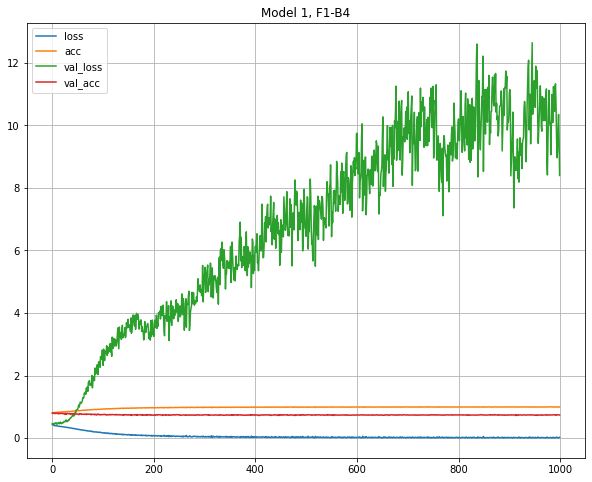

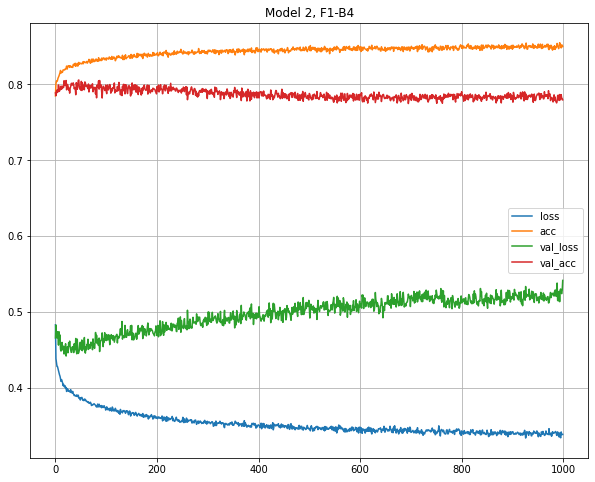

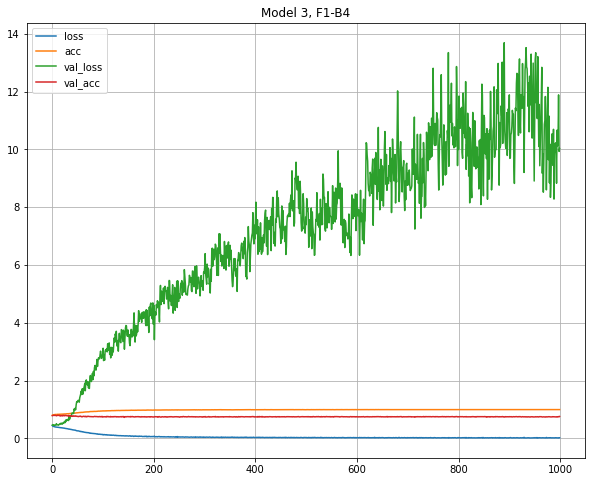

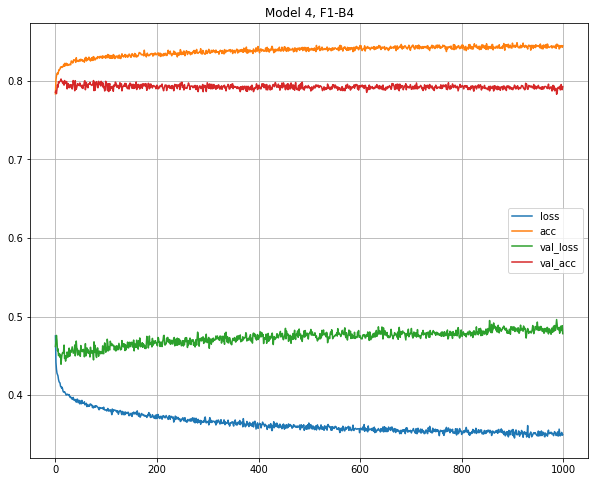

In [61]:
# Visualize the training results
plt.figure(figsize=(10,8))
plt.title('Model 1, F1-B4')
plt.plot(history1.history['loss'],label='loss')
plt.plot(history1.history['accuracy'],label='acc')
plt.plot(history1.history['val_loss'],label='val_loss')
plt.plot(history1.history['val_accuracy'],label='val_acc')
plt.grid()
plt.legend()
plt.show()

# Visualize the training results
plt.figure(figsize=(10,8))
plt.title('Model 2, F1-B4')
plt.plot(history2.history['loss'],label='loss')
plt.plot(history2.history['accuracy'],label='acc')
plt.plot(history2.history['val_loss'],label='val_loss')
plt.plot(history2.history['val_accuracy'],label='val_acc')
plt.grid()
plt.legend()
plt.show()

# Visualize the training results
plt.figure(figsize=(10,8))
plt.title('Model 3, F1-B4')
plt.plot(history3.history['loss'],label='loss')
plt.plot(history3.history['accuracy'],label='acc')
plt.plot(history3.history['val_loss'],label='val_loss')
plt.plot(history3.history['val_accuracy'],label='val_acc')
plt.grid()
plt.legend()
plt.show()

# Visualize the training results
plt.figure(figsize=(10,8))
plt.title('Model 4, F1-B4')
plt.plot(history4.history['loss'],label='loss')
plt.plot(history4.history['accuracy'],label='acc')
plt.plot(history4.history['val_loss'],label='val_loss')
plt.plot(history4.history['val_accuracy'],label='val_acc')
plt.grid()
plt.legend()
plt.show()

In [63]:
# Validation model
print('--------model 1,F1-B4-----------')
score = model1.evaluate(x_valid, y_valid, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])
print('-----------------------------------------------')

# Validation model
print('--------model 2, F1-B4-----------')
score = model2.evaluate(x_valid, y_valid, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])
print('-----------------------------------------------')
# Validation model
print('--------model 3, F1-B4-----------')
score = model3.evaluate(x_valid, y_valid, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])
print('-----------------------------------------------')
# Validation model
print('--------model 4, F1-B4-----------')
score = model4.evaluate(x_valid, y_valid, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])
print('-----------------------------------------------')

--------model 1,F1-B4-----------
Validation loss: 8.39913558959961
Validation accuracy: 0.7371516823768616
-----------------------------------------------
--------model 2, F1-B4-----------
Validation loss: 0.5417002439498901
Validation accuracy: 0.7797227501869202
-----------------------------------------------
--------model 3, F1-B4-----------
Validation loss: 10.028402328491211
Validation accuracy: 0.754656195640564
-----------------------------------------------
--------model 4, F1-B4-----------
Validation loss: 0.4782245457172394
Validation accuracy: 0.7926060557365417
-----------------------------------------------


Trying without the format bandwidths

In [64]:
# Features to use
features = ["F1","F2","F3","F4"]

# Extract features
x_train_raw = train[features]
x_valid_raw = valid[features]

# Normalize to zero mean
x_mean = np.mean(x_train_raw)
x_std = np.std(x_train_raw)
x_train = x_train_raw - x_mean
x_valid = x_valid_raw - x_mean

# Fix labels. The "to_categorical" call maps integer labels {n}
# to a vector of length N (number of labels) with a one in position n
y_train = keras.utils.to_categorical(trainlabels, len(genders))
y_valid = keras.utils.to_categorical(validlabels, len(genders))

# Create a model with a single hidden layer
model1 = keras.Sequential([
    keras.layers.Dense(28*28, activation=tf.nn.relu, input_dim=x_train.shape[1]),
    keras.layers.Dense(32, activation=tf.nn.relu, input_dim=28*28),
    keras.layers.Dense(512, activation=tf.nn.relu, input_dim=32),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation=tf.nn.relu, input_dim=512),
    keras.layers.Dense(len(genders), activation=tf.nn.softmax)
])
print('--------------Model 1---------------')
model1.summary()

# Train the model
model1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history1 = model1.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                    epochs=1000, batch_size=32, verbose=True)

# Create a model with a single hidden layer
model2 = keras.Sequential([
    keras.layers.Dense(64, activation=tf.nn.relu, input_dim=x_train.shape[1]),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(32, activation=tf.nn.relu, input_dim=64),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(16, activation=tf.nn.relu, input_dim=32),
    keras.layers.Dense(len(genders), activation=tf.nn.softmax)
])

print('--------------Model 2---------------')
model2.summary()

# Train the model
model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history2 = model2.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                    epochs=1000, batch_size=32, verbose=True)

# Create a model with a single hidden layer
model3 = keras.Sequential([
    keras.layers.Dense(256, activation=tf.nn.relu, input_dim=x_train.shape[1]),
    keras.layers.Dense(512, activation=tf.nn.relu, input_dim=256),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(512, activation=tf.nn.relu, input_dim=512),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation=tf.nn.relu, input_dim=512),
    keras.layers.Dense(len(genders), activation=tf.nn.softmax)
])

print('--------------Model 3---------------')
model3.summary()

# Train the model
model3.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history3 = model3.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                    epochs=1000, batch_size=32, verbose=True)

# Create a model with a single hidden layer
model4 = keras.Sequential([
    keras.layers.Dense(64, activation=tf.nn.relu, input_dim=x_train.shape[1]),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(len(genders), activation=tf.nn.softmax),
])

print('--------------Model 4---------------')
model4.summary()

# Train the model
model4.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history4 = model4.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                    epochs=1000, batch_size=32, verbose=True)

--------------Model 1---------------
Model: "sequential_58"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_218 (Dense)            (None, 784)               3920      
_________________________________________________________________
dense_219 (Dense)            (None, 32)                25120     
_________________________________________________________________
dense_220 (Dense)            (None, 512)               16896     
_________________________________________________________________
dropout_80 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_221 (Dense)            (None, 64)                32832     
_________________________________________________________________
dense_222 (Dense)            (None, 2)                 130       
Total params: 78,898
Trainable params: 78,898
Non-trainable params: 0
____________

Epoch 49/1000
394/394 [==============================] - 0s 953us/step - loss: 0.4042 - accuracy: 0.8176 - val_loss: 0.5342 - val_accuracy: 0.7694
Epoch 50/1000
394/394 [==============================] - 0s 950us/step - loss: 0.4032 - accuracy: 0.8180 - val_loss: 0.5254 - val_accuracy: 0.7632
Epoch 51/1000
394/394 [==============================] - 0s 955us/step - loss: 0.4040 - accuracy: 0.8203 - val_loss: 0.5186 - val_accuracy: 0.7692
Epoch 52/1000
394/394 [==============================] - 0s 953us/step - loss: 0.4018 - accuracy: 0.8187 - val_loss: 0.5006 - val_accuracy: 0.7748
Epoch 53/1000
394/394 [==============================] - 0s 953us/step - loss: 0.4024 - accuracy: 0.8207 - val_loss: 0.5430 - val_accuracy: 0.7745
Epoch 54/1000
394/394 [==============================] - 0s 953us/step - loss: 0.4014 - accuracy: 0.8191 - val_loss: 0.5197 - val_accuracy: 0.7708
Epoch 55/1000
394/394 [==============================] - 0s 955us/step - loss: 0.4009 - accuracy: 0.8203 - val_loss: 0

Epoch 105/1000
394/394 [==============================] - 0s 960us/step - loss: 0.3786 - accuracy: 0.8298 - val_loss: 0.6727 - val_accuracy: 0.7636
Epoch 106/1000
394/394 [==============================] - 0s 955us/step - loss: 0.3731 - accuracy: 0.8329 - val_loss: 0.6369 - val_accuracy: 0.7628
Epoch 107/1000
394/394 [==============================] - 0s 953us/step - loss: 0.3712 - accuracy: 0.8331 - val_loss: 0.6843 - val_accuracy: 0.7624
Epoch 108/1000
394/394 [==============================] - 0s 960us/step - loss: 0.3732 - accuracy: 0.8308 - val_loss: 0.6504 - val_accuracy: 0.7695
Epoch 109/1000
394/394 [==============================] - 0s 957us/step - loss: 0.3729 - accuracy: 0.8330 - val_loss: 0.7011 - val_accuracy: 0.7597
Epoch 110/1000
394/394 [==============================] - 0s 955us/step - loss: 0.3736 - accuracy: 0.8302 - val_loss: 0.6688 - val_accuracy: 0.7654
Epoch 111/1000
394/394 [==============================] - 0s 955us/step - loss: 0.3703 - accuracy: 0.8338 - val_

394/394 [==============================] - 0s 958us/step - loss: 0.3502 - accuracy: 0.8420 - val_loss: 0.8378 - val_accuracy: 0.7549
Epoch 161/1000
394/394 [==============================] - 0s 955us/step - loss: 0.3464 - accuracy: 0.8450 - val_loss: 0.8430 - val_accuracy: 0.7587
Epoch 162/1000
394/394 [==============================] - 0s 958us/step - loss: 0.3405 - accuracy: 0.8467 - val_loss: 0.9545 - val_accuracy: 0.7607
Epoch 163/1000
394/394 [==============================] - 0s 958us/step - loss: 0.3719 - accuracy: 0.8373 - val_loss: 0.7477 - val_accuracy: 0.7624
Epoch 164/1000
394/394 [==============================] - 0s 955us/step - loss: 0.3554 - accuracy: 0.8406 - val_loss: 0.8008 - val_accuracy: 0.7519
Epoch 165/1000
394/394 [==============================] - 0s 960us/step - loss: 0.3440 - accuracy: 0.8416 - val_loss: 0.8628 - val_accuracy: 0.7618
Epoch 166/1000
394/394 [==============================] - 0s 955us/step - loss: 0.3399 - accuracy: 0.8475 - val_loss: 0.8584 - 

394/394 [==============================] - 0s 955us/step - loss: 0.3185 - accuracy: 0.8558 - val_loss: 1.1858 - val_accuracy: 0.7538
Epoch 216/1000
394/394 [==============================] - 0s 950us/step - loss: 0.3148 - accuracy: 0.8619 - val_loss: 1.0893 - val_accuracy: 0.7654
Epoch 217/1000
394/394 [==============================] - 0s 953us/step - loss: 0.3197 - accuracy: 0.8560 - val_loss: 1.1055 - val_accuracy: 0.7545
Epoch 218/1000
394/394 [==============================] - 0s 947us/step - loss: 0.3146 - accuracy: 0.8582 - val_loss: 1.2673 - val_accuracy: 0.7436
Epoch 219/1000
394/394 [==============================] - 0s 947us/step - loss: 0.3126 - accuracy: 0.8609 - val_loss: 1.2429 - val_accuracy: 0.7491
Epoch 220/1000
394/394 [==============================] - 0s 953us/step - loss: 0.3173 - accuracy: 0.8596 - val_loss: 1.1921 - val_accuracy: 0.7444
Epoch 221/1000
394/394 [==============================] - 0s 958us/step - loss: 0.3200 - accuracy: 0.8584 - val_loss: 1.2810 - 

394/394 [==============================] - 0s 955us/step - loss: 0.2870 - accuracy: 0.8719 - val_loss: 1.3581 - val_accuracy: 0.7346
Epoch 271/1000
394/394 [==============================] - 0s 950us/step - loss: 0.2846 - accuracy: 0.8741 - val_loss: 1.4275 - val_accuracy: 0.7542
Epoch 272/1000
394/394 [==============================] - 0s 955us/step - loss: 0.2933 - accuracy: 0.8690 - val_loss: 1.5199 - val_accuracy: 0.7386
Epoch 273/1000
394/394 [==============================] - 0s 953us/step - loss: 0.2884 - accuracy: 0.8706 - val_loss: 1.4338 - val_accuracy: 0.7411
Epoch 274/1000
394/394 [==============================] - 0s 955us/step - loss: 0.2831 - accuracy: 0.8738 - val_loss: 1.4462 - val_accuracy: 0.7484
Epoch 275/1000
394/394 [==============================] - 0s 958us/step - loss: 0.2891 - accuracy: 0.8727 - val_loss: 1.5379 - val_accuracy: 0.7435
Epoch 276/1000
394/394 [==============================] - 0s 955us/step - loss: 0.2866 - accuracy: 0.8726 - val_loss: 1.4217 - 

394/394 [==============================] - 0s 953us/step - loss: 0.2677 - accuracy: 0.8794 - val_loss: 1.7015 - val_accuracy: 0.7479
Epoch 326/1000
394/394 [==============================] - 0s 947us/step - loss: 0.2651 - accuracy: 0.8805 - val_loss: 1.7431 - val_accuracy: 0.7423
Epoch 327/1000
394/394 [==============================] - 0s 958us/step - loss: 0.2721 - accuracy: 0.8786 - val_loss: 1.6999 - val_accuracy: 0.7401
Epoch 328/1000
394/394 [==============================] - 0s 950us/step - loss: 0.2744 - accuracy: 0.8803 - val_loss: 1.6160 - val_accuracy: 0.7387
Epoch 329/1000
394/394 [==============================] - 0s 947us/step - loss: 0.2638 - accuracy: 0.8818 - val_loss: 1.6960 - val_accuracy: 0.7489
Epoch 330/1000
394/394 [==============================] - 0s 955us/step - loss: 0.2562 - accuracy: 0.8825 - val_loss: 1.8532 - val_accuracy: 0.7383
Epoch 331/1000
394/394 [==============================] - 0s 950us/step - loss: 0.2582 - accuracy: 0.8838 - val_loss: 1.8522 - 

394/394 [==============================] - 0s 955us/step - loss: 0.2473 - accuracy: 0.8915 - val_loss: 2.1088 - val_accuracy: 0.7300
Epoch 381/1000
394/394 [==============================] - 0s 965us/step - loss: 0.2531 - accuracy: 0.8869 - val_loss: 2.1434 - val_accuracy: 0.7380
Epoch 382/1000
394/394 [==============================] - 0s 955us/step - loss: 0.2486 - accuracy: 0.8894 - val_loss: 1.9307 - val_accuracy: 0.7402
Epoch 383/1000
394/394 [==============================] - 0s 956us/step - loss: 0.2448 - accuracy: 0.8920 - val_loss: 2.1200 - val_accuracy: 0.7318
Epoch 384/1000
394/394 [==============================] - 0s 955us/step - loss: 0.2434 - accuracy: 0.8936 - val_loss: 2.0945 - val_accuracy: 0.7395
Epoch 385/1000
394/394 [==============================] - 0s 950us/step - loss: 0.2513 - accuracy: 0.8897 - val_loss: 1.9779 - val_accuracy: 0.7394
Epoch 386/1000
394/394 [==============================] - 0s 947us/step - loss: 0.2416 - accuracy: 0.8913 - val_loss: 2.2133 - 

394/394 [==============================] - 0s 960us/step - loss: 0.2233 - accuracy: 0.9023 - val_loss: 2.2607 - val_accuracy: 0.7330
Epoch 436/1000
394/394 [==============================] - 0s 955us/step - loss: 0.2266 - accuracy: 0.8986 - val_loss: 2.3127 - val_accuracy: 0.7339
Epoch 437/1000
394/394 [==============================] - 0s 965us/step - loss: 0.2278 - accuracy: 0.8992 - val_loss: 2.2671 - val_accuracy: 0.7275
Epoch 438/1000
394/394 [==============================] - 0s 953us/step - loss: 0.2420 - accuracy: 0.8951 - val_loss: 2.3458 - val_accuracy: 0.7362
Epoch 439/1000
394/394 [==============================] - 0s 953us/step - loss: 0.2287 - accuracy: 0.8986 - val_loss: 2.3134 - val_accuracy: 0.7294
Epoch 440/1000
394/394 [==============================] - 0s 955us/step - loss: 0.2289 - accuracy: 0.8968 - val_loss: 2.5459 - val_accuracy: 0.7259
Epoch 441/1000
394/394 [==============================] - 0s 955us/step - loss: 0.2288 - accuracy: 0.8999 - val_loss: 2.3710 - 

394/394 [==============================] - 0s 960us/step - loss: 0.2249 - accuracy: 0.9029 - val_loss: 2.2921 - val_accuracy: 0.7366
Epoch 491/1000
394/394 [==============================] - 0s 955us/step - loss: 0.2179 - accuracy: 0.9045 - val_loss: 2.4423 - val_accuracy: 0.7366
Epoch 492/1000
394/394 [==============================] - 0s 961us/step - loss: 0.2264 - accuracy: 0.9029 - val_loss: 2.4297 - val_accuracy: 0.7335
Epoch 493/1000
394/394 [==============================] - 0s 955us/step - loss: 0.2197 - accuracy: 0.9052 - val_loss: 2.4684 - val_accuracy: 0.7310
Epoch 494/1000
394/394 [==============================] - 0s 955us/step - loss: 0.2130 - accuracy: 0.9054 - val_loss: 2.5662 - val_accuracy: 0.7262
Epoch 495/1000
394/394 [==============================] - 0s 955us/step - loss: 0.2160 - accuracy: 0.9064 - val_loss: 2.6252 - val_accuracy: 0.7285
Epoch 496/1000
394/394 [==============================] - 0s 955us/step - loss: 0.2205 - accuracy: 0.9049 - val_loss: 2.3651 - 

394/394 [==============================] - 0s 953us/step - loss: 0.2074 - accuracy: 0.9107 - val_loss: 2.5343 - val_accuracy: 0.7224
Epoch 546/1000
394/394 [==============================] - 0s 955us/step - loss: 0.2063 - accuracy: 0.9104 - val_loss: 2.6227 - val_accuracy: 0.7311
Epoch 547/1000
394/394 [==============================] - 0s 958us/step - loss: 0.2109 - accuracy: 0.9109 - val_loss: 2.7339 - val_accuracy: 0.7301
Epoch 548/1000
394/394 [==============================] - 0s 955us/step - loss: 0.2158 - accuracy: 0.9064 - val_loss: 2.4525 - val_accuracy: 0.7304
Epoch 549/1000
394/394 [==============================] - 0s 955us/step - loss: 0.2053 - accuracy: 0.9107 - val_loss: 2.4857 - val_accuracy: 0.7342
Epoch 550/1000
394/394 [==============================] - 0s 955us/step - loss: 0.2068 - accuracy: 0.9110 - val_loss: 2.5613 - val_accuracy: 0.7224
Epoch 551/1000
394/394 [==============================] - 0s 958us/step - loss: 0.2037 - accuracy: 0.9110 - val_loss: 2.7282 - 

394/394 [==============================] - 0s 955us/step - loss: 0.2096 - accuracy: 0.9114 - val_loss: 2.6393 - val_accuracy: 0.7258
Epoch 601/1000
394/394 [==============================] - 0s 953us/step - loss: 0.2056 - accuracy: 0.9126 - val_loss: 2.7935 - val_accuracy: 0.7244
Epoch 602/1000
394/394 [==============================] - 0s 951us/step - loss: 0.2070 - accuracy: 0.9079 - val_loss: 2.9607 - val_accuracy: 0.7296
Epoch 603/1000
394/394 [==============================] - 0s 953us/step - loss: 0.1996 - accuracy: 0.9149 - val_loss: 2.7604 - val_accuracy: 0.7250
Epoch 604/1000
394/394 [==============================] - 0s 958us/step - loss: 0.2057 - accuracy: 0.9119 - val_loss: 2.7672 - val_accuracy: 0.7237
Epoch 605/1000
394/394 [==============================] - 0s 955us/step - loss: 0.2099 - accuracy: 0.9109 - val_loss: 2.7951 - val_accuracy: 0.7297
Epoch 606/1000
394/394 [==============================] - 0s 955us/step - loss: 0.1933 - accuracy: 0.9159 - val_loss: 2.8320 - 

394/394 [==============================] - 0s 981us/step - loss: 0.1980 - accuracy: 0.9120 - val_loss: 3.2770 - val_accuracy: 0.7209
Epoch 656/1000
394/394 [==============================] - 0s 973us/step - loss: 0.1875 - accuracy: 0.9186 - val_loss: 3.2379 - val_accuracy: 0.7255
Epoch 657/1000
394/394 [==============================] - 0s 955us/step - loss: 0.1875 - accuracy: 0.9215 - val_loss: 3.2457 - val_accuracy: 0.7266
Epoch 658/1000
394/394 [==============================] - 0s 950us/step - loss: 0.1804 - accuracy: 0.9205 - val_loss: 3.2389 - val_accuracy: 0.7209
Epoch 659/1000
394/394 [==============================] - 0s 955us/step - loss: 0.1887 - accuracy: 0.9197 - val_loss: 3.3953 - val_accuracy: 0.7227
Epoch 660/1000
394/394 [==============================] - 0s 956us/step - loss: 0.1993 - accuracy: 0.9159 - val_loss: 3.2853 - val_accuracy: 0.7248
Epoch 661/1000
394/394 [==============================] - 0s 963us/step - loss: 0.1981 - accuracy: 0.9145 - val_loss: 3.2094 - 

394/394 [==============================] - 0s 950us/step - loss: 0.2008 - accuracy: 0.9126 - val_loss: 3.0712 - val_accuracy: 0.7278
Epoch 711/1000
394/394 [==============================] - 0s 955us/step - loss: 0.1804 - accuracy: 0.9208 - val_loss: 2.7511 - val_accuracy: 0.7236
Epoch 712/1000
394/394 [==============================] - 0s 950us/step - loss: 0.1804 - accuracy: 0.9230 - val_loss: 3.2914 - val_accuracy: 0.7243
Epoch 713/1000
394/394 [==============================] - 0s 952us/step - loss: 0.1878 - accuracy: 0.9173 - val_loss: 3.1524 - val_accuracy: 0.7307
Epoch 714/1000
394/394 [==============================] - 0s 965us/step - loss: 0.1919 - accuracy: 0.9154 - val_loss: 3.3083 - val_accuracy: 0.7224
Epoch 715/1000
394/394 [==============================] - 0s 953us/step - loss: 0.1900 - accuracy: 0.9193 - val_loss: 3.0640 - val_accuracy: 0.7195
Epoch 716/1000
394/394 [==============================] - 0s 955us/step - loss: 0.1886 - accuracy: 0.9149 - val_loss: 3.1428 - 

394/394 [==============================] - 0s 955us/step - loss: 0.1783 - accuracy: 0.9228 - val_loss: 3.6876 - val_accuracy: 0.7203
Epoch 766/1000
394/394 [==============================] - 0s 955us/step - loss: 0.1704 - accuracy: 0.9251 - val_loss: 3.8024 - val_accuracy: 0.7201
Epoch 767/1000
394/394 [==============================] - 0s 957us/step - loss: 0.1962 - accuracy: 0.9196 - val_loss: 3.3991 - val_accuracy: 0.7173
Epoch 768/1000
394/394 [==============================] - 0s 955us/step - loss: 0.1755 - accuracy: 0.9250 - val_loss: 3.5256 - val_accuracy: 0.7261
Epoch 769/1000
394/394 [==============================] - 0s 960us/step - loss: 0.1643 - accuracy: 0.9292 - val_loss: 3.4302 - val_accuracy: 0.7259
Epoch 770/1000
394/394 [==============================] - 0s 958us/step - loss: 0.1736 - accuracy: 0.9233 - val_loss: 3.8345 - val_accuracy: 0.7171
Epoch 771/1000
394/394 [==============================] - 0s 958us/step - loss: 0.1790 - accuracy: 0.9250 - val_loss: 3.8526 - 

394/394 [==============================] - 0s 1ms/step - loss: 0.1666 - accuracy: 0.9272 - val_loss: 3.4741 - val_accuracy: 0.7240
Epoch 821/1000
394/394 [==============================] - 0s 996us/step - loss: 0.1841 - accuracy: 0.9214 - val_loss: 4.2938 - val_accuracy: 0.7192
Epoch 822/1000
394/394 [==============================] - 0s 988us/step - loss: 0.1764 - accuracy: 0.9257 - val_loss: 3.5749 - val_accuracy: 0.7157
Epoch 823/1000
394/394 [==============================] - 0s 991us/step - loss: 0.1873 - accuracy: 0.9222 - val_loss: 3.2405 - val_accuracy: 0.7159
Epoch 824/1000
394/394 [==============================] - 0s 983us/step - loss: 0.2306 - accuracy: 0.9176 - val_loss: 3.1510 - val_accuracy: 0.7219
Epoch 825/1000
394/394 [==============================] - 0s 1ms/step - loss: 0.1669 - accuracy: 0.9261 - val_loss: 3.2196 - val_accuracy: 0.7208
Epoch 826/1000
394/394 [==============================] - 0s 983us/step - loss: 0.1621 - accuracy: 0.9333 - val_loss: 3.3045 - val_

394/394 [==============================] - 0s 965us/step - loss: 0.1497 - accuracy: 0.9340 - val_loss: 4.0251 - val_accuracy: 0.7194
Epoch 876/1000
394/394 [==============================] - 0s 950us/step - loss: 0.1729 - accuracy: 0.9310 - val_loss: 3.7750 - val_accuracy: 0.7194
Epoch 877/1000
394/394 [==============================] - 0s 950us/step - loss: 0.1736 - accuracy: 0.9280 - val_loss: 4.2630 - val_accuracy: 0.7187
Epoch 878/1000
394/394 [==============================] - 0s 953us/step - loss: 0.1590 - accuracy: 0.9321 - val_loss: 4.1112 - val_accuracy: 0.7175
Epoch 879/1000
394/394 [==============================] - 0s 950us/step - loss: 0.1538 - accuracy: 0.9322 - val_loss: 3.9319 - val_accuracy: 0.7191
Epoch 880/1000
394/394 [==============================] - 0s 963us/step - loss: 0.1592 - accuracy: 0.9314 - val_loss: 3.5682 - val_accuracy: 0.7147
Epoch 881/1000
394/394 [==============================] - 0s 955us/step - loss: 0.1615 - accuracy: 0.9295 - val_loss: 4.0715 - 

394/394 [==============================] - 0s 953us/step - loss: 0.1799 - accuracy: 0.9255 - val_loss: 4.2240 - val_accuracy: 0.7166
Epoch 931/1000
394/394 [==============================] - 0s 953us/step - loss: 0.1505 - accuracy: 0.9341 - val_loss: 4.3901 - val_accuracy: 0.7191
Epoch 932/1000
394/394 [==============================] - 0s 958us/step - loss: 0.1592 - accuracy: 0.9321 - val_loss: 3.8659 - val_accuracy: 0.7210
Epoch 933/1000
394/394 [==============================] - 0s 953us/step - loss: 0.1534 - accuracy: 0.9343 - val_loss: 3.9617 - val_accuracy: 0.7133
Epoch 934/1000
394/394 [==============================] - 0s 950us/step - loss: 0.1599 - accuracy: 0.9316 - val_loss: 3.9944 - val_accuracy: 0.7206
Epoch 935/1000
394/394 [==============================] - 0s 965us/step - loss: 0.1602 - accuracy: 0.9301 - val_loss: 4.4448 - val_accuracy: 0.7180
Epoch 936/1000
394/394 [==============================] - 0s 953us/step - loss: 0.1629 - accuracy: 0.9325 - val_loss: 4.3488 - 

394/394 [==============================] - 0s 953us/step - loss: 0.1472 - accuracy: 0.9372 - val_loss: 3.7203 - val_accuracy: 0.7174
Epoch 986/1000
394/394 [==============================] - 0s 950us/step - loss: 0.1661 - accuracy: 0.9290 - val_loss: 3.5965 - val_accuracy: 0.7173
Epoch 987/1000
394/394 [==============================] - 0s 955us/step - loss: 0.1558 - accuracy: 0.9356 - val_loss: 3.5764 - val_accuracy: 0.7213
Epoch 988/1000
394/394 [==============================] - 0s 950us/step - loss: 0.1465 - accuracy: 0.9358 - val_loss: 3.6996 - val_accuracy: 0.7215
Epoch 989/1000
394/394 [==============================] - 0s 950us/step - loss: 0.1350 - accuracy: 0.9427 - val_loss: 3.6815 - val_accuracy: 0.7126
Epoch 990/1000
394/394 [==============================] - 0s 958us/step - loss: 0.1776 - accuracy: 0.9272 - val_loss: 3.9044 - val_accuracy: 0.7145
Epoch 991/1000
394/394 [==============================] - 0s 953us/step - loss: 0.1528 - accuracy: 0.9357 - val_loss: 4.1890 - 

Epoch 33/1000
394/394 [==============================] - 0s 599us/step - loss: 0.4264 - accuracy: 0.8087 - val_loss: 0.4903 - val_accuracy: 0.7682
Epoch 34/1000
394/394 [==============================] - 0s 601us/step - loss: 0.4249 - accuracy: 0.8105 - val_loss: 0.4913 - val_accuracy: 0.7729
Epoch 35/1000
394/394 [==============================] - 0s 573us/step - loss: 0.4256 - accuracy: 0.8114 - val_loss: 0.5023 - val_accuracy: 0.7615
Epoch 36/1000
394/394 [==============================] - 0s 570us/step - loss: 0.4264 - accuracy: 0.8103 - val_loss: 0.4871 - val_accuracy: 0.7734
Epoch 37/1000
394/394 [==============================] - 0s 565us/step - loss: 0.4246 - accuracy: 0.8118 - val_loss: 0.4882 - val_accuracy: 0.7775
Epoch 38/1000
394/394 [==============================] - 0s 568us/step - loss: 0.4248 - accuracy: 0.8080 - val_loss: 0.4816 - val_accuracy: 0.7743
Epoch 39/1000
394/394 [==============================] - 0s 568us/step - loss: 0.4244 - accuracy: 0.8100 - val_loss: 0

Epoch 89/1000
394/394 [==============================] - 0s 565us/step - loss: 0.4221 - accuracy: 0.8127 - val_loss: 0.4858 - val_accuracy: 0.7708
Epoch 90/1000
394/394 [==============================] - 0s 573us/step - loss: 0.4210 - accuracy: 0.8106 - val_loss: 0.4921 - val_accuracy: 0.7696
Epoch 91/1000
394/394 [==============================] - 0s 573us/step - loss: 0.4191 - accuracy: 0.8138 - val_loss: 0.4982 - val_accuracy: 0.7626
Epoch 92/1000
394/394 [==============================] - 0s 568us/step - loss: 0.4198 - accuracy: 0.8109 - val_loss: 0.4970 - val_accuracy: 0.7660
Epoch 93/1000
394/394 [==============================] - 0s 568us/step - loss: 0.4186 - accuracy: 0.8137 - val_loss: 0.4958 - val_accuracy: 0.7659
Epoch 94/1000
394/394 [==============================] - 0s 565us/step - loss: 0.4207 - accuracy: 0.8126 - val_loss: 0.4859 - val_accuracy: 0.7720
Epoch 95/1000
394/394 [==============================] - 0s 570us/step - loss: 0.4197 - accuracy: 0.8105 - val_loss: 0

394/394 [==============================] - 0s 570us/step - loss: 0.4178 - accuracy: 0.8123 - val_loss: 0.4895 - val_accuracy: 0.7724
Epoch 145/1000
394/394 [==============================] - 0s 565us/step - loss: 0.4168 - accuracy: 0.8136 - val_loss: 0.4990 - val_accuracy: 0.7682
Epoch 146/1000
394/394 [==============================] - 0s 573us/step - loss: 0.4185 - accuracy: 0.8144 - val_loss: 0.4916 - val_accuracy: 0.7715
Epoch 147/1000
394/394 [==============================] - 0s 568us/step - loss: 0.4187 - accuracy: 0.8149 - val_loss: 0.4933 - val_accuracy: 0.7713
Epoch 148/1000
394/394 [==============================] - 0s 570us/step - loss: 0.4169 - accuracy: 0.8125 - val_loss: 0.4937 - val_accuracy: 0.7694
Epoch 149/1000
394/394 [==============================] - 0s 568us/step - loss: 0.4171 - accuracy: 0.8134 - val_loss: 0.4981 - val_accuracy: 0.7666
Epoch 150/1000
394/394 [==============================] - 0s 568us/step - loss: 0.4151 - accuracy: 0.8138 - val_loss: 0.5018 - 

394/394 [==============================] - 0s 568us/step - loss: 0.4139 - accuracy: 0.8149 - val_loss: 0.4946 - val_accuracy: 0.7722
Epoch 200/1000
394/394 [==============================] - 0s 570us/step - loss: 0.4150 - accuracy: 0.8134 - val_loss: 0.4926 - val_accuracy: 0.7680
Epoch 201/1000
394/394 [==============================] - 0s 570us/step - loss: 0.4144 - accuracy: 0.8142 - val_loss: 0.4914 - val_accuracy: 0.7706
Epoch 202/1000
394/394 [==============================] - 0s 570us/step - loss: 0.4183 - accuracy: 0.8145 - val_loss: 0.4928 - val_accuracy: 0.7701
Epoch 203/1000
394/394 [==============================] - 0s 565us/step - loss: 0.4130 - accuracy: 0.8158 - val_loss: 0.4913 - val_accuracy: 0.7713
Epoch 204/1000
394/394 [==============================] - 0s 568us/step - loss: 0.4134 - accuracy: 0.8158 - val_loss: 0.4946 - val_accuracy: 0.7694
Epoch 205/1000
394/394 [==============================] - 0s 568us/step - loss: 0.4146 - accuracy: 0.8164 - val_loss: 0.4943 - 

394/394 [==============================] - 0s 573us/step - loss: 0.4125 - accuracy: 0.8146 - val_loss: 0.4953 - val_accuracy: 0.7726
Epoch 255/1000
394/394 [==============================] - 0s 568us/step - loss: 0.4149 - accuracy: 0.8146 - val_loss: 0.4962 - val_accuracy: 0.7633
Epoch 256/1000
394/394 [==============================] - 0s 573us/step - loss: 0.4108 - accuracy: 0.8180 - val_loss: 0.4934 - val_accuracy: 0.7675
Epoch 257/1000
394/394 [==============================] - 0s 568us/step - loss: 0.4121 - accuracy: 0.8168 - val_loss: 0.4941 - val_accuracy: 0.7692
Epoch 258/1000
394/394 [==============================] - 0s 568us/step - loss: 0.4115 - accuracy: 0.8173 - val_loss: 0.4980 - val_accuracy: 0.7649
Epoch 259/1000
394/394 [==============================] - 0s 570us/step - loss: 0.4134 - accuracy: 0.8165 - val_loss: 0.5045 - val_accuracy: 0.7649
Epoch 260/1000
394/394 [==============================] - 0s 568us/step - loss: 0.4131 - accuracy: 0.8165 - val_loss: 0.5003 - 

394/394 [==============================] - 0s 568us/step - loss: 0.4139 - accuracy: 0.8126 - val_loss: 0.4971 - val_accuracy: 0.7692
Epoch 310/1000
394/394 [==============================] - 0s 570us/step - loss: 0.4108 - accuracy: 0.8164 - val_loss: 0.5006 - val_accuracy: 0.7633
Epoch 311/1000
394/394 [==============================] - 0s 576us/step - loss: 0.4106 - accuracy: 0.8162 - val_loss: 0.5015 - val_accuracy: 0.7654
Epoch 312/1000
394/394 [==============================] - 0s 573us/step - loss: 0.4097 - accuracy: 0.8169 - val_loss: 0.4956 - val_accuracy: 0.7663
Epoch 313/1000
394/394 [==============================] - 0s 576us/step - loss: 0.4138 - accuracy: 0.8148 - val_loss: 0.5045 - val_accuracy: 0.7614
Epoch 314/1000
394/394 [==============================] - 0s 570us/step - loss: 0.4111 - accuracy: 0.8161 - val_loss: 0.4991 - val_accuracy: 0.7661
Epoch 315/1000
394/394 [==============================] - 0s 573us/step - loss: 0.4114 - accuracy: 0.8155 - val_loss: 0.5018 - 

394/394 [==============================] - 0s 573us/step - loss: 0.4097 - accuracy: 0.8165 - val_loss: 0.5001 - val_accuracy: 0.7646
Epoch 365/1000
394/394 [==============================] - 0s 570us/step - loss: 0.4081 - accuracy: 0.8185 - val_loss: 0.5033 - val_accuracy: 0.7642
Epoch 366/1000
394/394 [==============================] - 0s 570us/step - loss: 0.4085 - accuracy: 0.8161 - val_loss: 0.5029 - val_accuracy: 0.7645
Epoch 367/1000
394/394 [==============================] - 0s 565us/step - loss: 0.4088 - accuracy: 0.8203 - val_loss: 0.4967 - val_accuracy: 0.7688
Epoch 368/1000
394/394 [==============================] - 0s 568us/step - loss: 0.4110 - accuracy: 0.8164 - val_loss: 0.4996 - val_accuracy: 0.7649
Epoch 369/1000
394/394 [==============================] - 0s 573us/step - loss: 0.4102 - accuracy: 0.8176 - val_loss: 0.5037 - val_accuracy: 0.7638
Epoch 370/1000
394/394 [==============================] - 0s 570us/step - loss: 0.4109 - accuracy: 0.8189 - val_loss: 0.4980 - 

394/394 [==============================] - 0s 570us/step - loss: 0.4090 - accuracy: 0.8172 - val_loss: 0.4978 - val_accuracy: 0.7667
Epoch 420/1000
394/394 [==============================] - 0s 568us/step - loss: 0.4103 - accuracy: 0.8173 - val_loss: 0.4917 - val_accuracy: 0.7680
Epoch 421/1000
394/394 [==============================] - 0s 568us/step - loss: 0.4084 - accuracy: 0.8188 - val_loss: 0.5058 - val_accuracy: 0.7647
Epoch 422/1000
394/394 [==============================] - 0s 581us/step - loss: 0.4096 - accuracy: 0.8169 - val_loss: 0.5083 - val_accuracy: 0.7601
Epoch 423/1000
394/394 [==============================] - 0s 563us/step - loss: 0.4096 - accuracy: 0.8178 - val_loss: 0.4924 - val_accuracy: 0.7668
Epoch 424/1000
394/394 [==============================] - 0s 565us/step - loss: 0.4083 - accuracy: 0.8187 - val_loss: 0.4979 - val_accuracy: 0.7667
Epoch 425/1000
394/394 [==============================] - 0s 565us/step - loss: 0.4098 - accuracy: 0.8180 - val_loss: 0.5015 - 

394/394 [==============================] - 0s 568us/step - loss: 0.4077 - accuracy: 0.8173 - val_loss: 0.5062 - val_accuracy: 0.7635
Epoch 475/1000
394/394 [==============================] - 0s 576us/step - loss: 0.4086 - accuracy: 0.8220 - val_loss: 0.4986 - val_accuracy: 0.7635
Epoch 476/1000
394/394 [==============================] - 0s 641us/step - loss: 0.4098 - accuracy: 0.8189 - val_loss: 0.4913 - val_accuracy: 0.7696
Epoch 477/1000
394/394 [==============================] - 0s 579us/step - loss: 0.4091 - accuracy: 0.8175 - val_loss: 0.4908 - val_accuracy: 0.7699
Epoch 478/1000
394/394 [==============================] - 0s 581us/step - loss: 0.4096 - accuracy: 0.8152 - val_loss: 0.4988 - val_accuracy: 0.7649
Epoch 479/1000
394/394 [==============================] - 0s 580us/step - loss: 0.4083 - accuracy: 0.8189 - val_loss: 0.4938 - val_accuracy: 0.7696
Epoch 480/1000
394/394 [==============================] - 0s 617us/step - loss: 0.4094 - accuracy: 0.8168 - val_loss: 0.4969 - 

394/394 [==============================] - 0s 581us/step - loss: 0.4054 - accuracy: 0.8203 - val_loss: 0.5062 - val_accuracy: 0.7615
Epoch 530/1000
394/394 [==============================] - 0s 578us/step - loss: 0.4065 - accuracy: 0.8184 - val_loss: 0.5006 - val_accuracy: 0.7661
Epoch 531/1000
394/394 [==============================] - 0s 570us/step - loss: 0.4072 - accuracy: 0.8201 - val_loss: 0.5016 - val_accuracy: 0.7661
Epoch 532/1000
394/394 [==============================] - 0s 565us/step - loss: 0.4101 - accuracy: 0.8161 - val_loss: 0.4947 - val_accuracy: 0.7691
Epoch 533/1000
394/394 [==============================] - 0s 565us/step - loss: 0.4080 - accuracy: 0.8203 - val_loss: 0.4994 - val_accuracy: 0.7650
Epoch 534/1000
394/394 [==============================] - 0s 573us/step - loss: 0.4078 - accuracy: 0.8204 - val_loss: 0.4942 - val_accuracy: 0.7668
Epoch 535/1000
394/394 [==============================] - 0s 570us/step - loss: 0.4076 - accuracy: 0.8182 - val_loss: 0.4948 - 

394/394 [==============================] - 0s 565us/step - loss: 0.4077 - accuracy: 0.8214 - val_loss: 0.5001 - val_accuracy: 0.7674
Epoch 585/1000
394/394 [==============================] - 0s 570us/step - loss: 0.4067 - accuracy: 0.8188 - val_loss: 0.4961 - val_accuracy: 0.7699
Epoch 586/1000
394/394 [==============================] - 0s 568us/step - loss: 0.4086 - accuracy: 0.8183 - val_loss: 0.5013 - val_accuracy: 0.7622
Epoch 587/1000
394/394 [==============================] - 0s 568us/step - loss: 0.4054 - accuracy: 0.8195 - val_loss: 0.5037 - val_accuracy: 0.7667
Epoch 588/1000
394/394 [==============================] - 0s 568us/step - loss: 0.4069 - accuracy: 0.8196 - val_loss: 0.4953 - val_accuracy: 0.7699
Epoch 589/1000
394/394 [==============================] - 0s 565us/step - loss: 0.4057 - accuracy: 0.8222 - val_loss: 0.4983 - val_accuracy: 0.7652
Epoch 590/1000
394/394 [==============================] - 0s 573us/step - loss: 0.4069 - accuracy: 0.8177 - val_loss: 0.5138 - 

394/394 [==============================] - 0s 565us/step - loss: 0.4070 - accuracy: 0.8193 - val_loss: 0.5026 - val_accuracy: 0.7631
Epoch 640/1000
394/394 [==============================] - 0s 568us/step - loss: 0.4094 - accuracy: 0.8171 - val_loss: 0.5133 - val_accuracy: 0.7590
Epoch 641/1000
394/394 [==============================] - 0s 570us/step - loss: 0.4050 - accuracy: 0.8203 - val_loss: 0.5187 - val_accuracy: 0.7573
Epoch 642/1000
394/394 [==============================] - 0s 573us/step - loss: 0.4072 - accuracy: 0.8164 - val_loss: 0.5119 - val_accuracy: 0.7593
Epoch 643/1000
394/394 [==============================] - 0s 570us/step - loss: 0.4066 - accuracy: 0.8181 - val_loss: 0.5048 - val_accuracy: 0.7635
Epoch 644/1000
394/394 [==============================] - 0s 565us/step - loss: 0.4073 - accuracy: 0.8189 - val_loss: 0.5018 - val_accuracy: 0.7607
Epoch 645/1000
394/394 [==============================] - 0s 573us/step - loss: 0.4069 - accuracy: 0.8154 - val_loss: 0.5015 - 

394/394 [==============================] - 0s 573us/step - loss: 0.4061 - accuracy: 0.8223 - val_loss: 0.5069 - val_accuracy: 0.7635
Epoch 695/1000
394/394 [==============================] - 0s 568us/step - loss: 0.4050 - accuracy: 0.8211 - val_loss: 0.5072 - val_accuracy: 0.7650
Epoch 696/1000
394/394 [==============================] - 0s 568us/step - loss: 0.4062 - accuracy: 0.8202 - val_loss: 0.5014 - val_accuracy: 0.7656
Epoch 697/1000
394/394 [==============================] - 0s 573us/step - loss: 0.4032 - accuracy: 0.8203 - val_loss: 0.5016 - val_accuracy: 0.7631
Epoch 698/1000
394/394 [==============================] - 0s 570us/step - loss: 0.4072 - accuracy: 0.8197 - val_loss: 0.4943 - val_accuracy: 0.7689
Epoch 699/1000
394/394 [==============================] - 0s 570us/step - loss: 0.4071 - accuracy: 0.8200 - val_loss: 0.4949 - val_accuracy: 0.7681
Epoch 700/1000
394/394 [==============================] - 0s 570us/step - loss: 0.4064 - accuracy: 0.8215 - val_loss: 0.5099 - 

394/394 [==============================] - 0s 573us/step - loss: 0.4045 - accuracy: 0.8208 - val_loss: 0.5064 - val_accuracy: 0.7625
Epoch 750/1000
394/394 [==============================] - 0s 568us/step - loss: 0.4050 - accuracy: 0.8183 - val_loss: 0.5068 - val_accuracy: 0.7660
Epoch 751/1000
394/394 [==============================] - 0s 568us/step - loss: 0.4040 - accuracy: 0.8192 - val_loss: 0.5034 - val_accuracy: 0.7639
Epoch 752/1000
394/394 [==============================] - 0s 568us/step - loss: 0.4050 - accuracy: 0.8188 - val_loss: 0.5022 - val_accuracy: 0.7647
Epoch 753/1000
394/394 [==============================] - 0s 570us/step - loss: 0.4043 - accuracy: 0.8176 - val_loss: 0.5024 - val_accuracy: 0.7661
Epoch 754/1000
394/394 [==============================] - 0s 568us/step - loss: 0.4062 - accuracy: 0.8190 - val_loss: 0.4979 - val_accuracy: 0.7636
Epoch 755/1000
394/394 [==============================] - 0s 570us/step - loss: 0.4060 - accuracy: 0.8203 - val_loss: 0.5056 - 

394/394 [==============================] - 0s 568us/step - loss: 0.4068 - accuracy: 0.8186 - val_loss: 0.5050 - val_accuracy: 0.7633
Epoch 805/1000
394/394 [==============================] - 0s 570us/step - loss: 0.4067 - accuracy: 0.8173 - val_loss: 0.4979 - val_accuracy: 0.7684
Epoch 806/1000
394/394 [==============================] - 0s 570us/step - loss: 0.4050 - accuracy: 0.8235 - val_loss: 0.4949 - val_accuracy: 0.7678
Epoch 807/1000
394/394 [==============================] - 0s 570us/step - loss: 0.4044 - accuracy: 0.8228 - val_loss: 0.5028 - val_accuracy: 0.7668
Epoch 808/1000
394/394 [==============================] - 0s 570us/step - loss: 0.4052 - accuracy: 0.8198 - val_loss: 0.5070 - val_accuracy: 0.7642
Epoch 809/1000
394/394 [==============================] - 0s 568us/step - loss: 0.4056 - accuracy: 0.8181 - val_loss: 0.5037 - val_accuracy: 0.7671
Epoch 810/1000
394/394 [==============================] - 0s 573us/step - loss: 0.4048 - accuracy: 0.8206 - val_loss: 0.5081 - 

394/394 [==============================] - 0s 565us/step - loss: 0.4054 - accuracy: 0.8203 - val_loss: 0.5026 - val_accuracy: 0.7701
Epoch 860/1000
394/394 [==============================] - 0s 563us/step - loss: 0.4040 - accuracy: 0.8201 - val_loss: 0.5053 - val_accuracy: 0.7660
Epoch 861/1000
394/394 [==============================] - 0s 568us/step - loss: 0.4034 - accuracy: 0.8207 - val_loss: 0.5037 - val_accuracy: 0.7638
Epoch 862/1000
394/394 [==============================] - 0s 563us/step - loss: 0.4044 - accuracy: 0.8234 - val_loss: 0.5043 - val_accuracy: 0.7608
Epoch 863/1000
394/394 [==============================] - 0s 568us/step - loss: 0.4031 - accuracy: 0.8220 - val_loss: 0.5044 - val_accuracy: 0.7682
Epoch 864/1000
394/394 [==============================] - 0s 568us/step - loss: 0.4070 - accuracy: 0.8204 - val_loss: 0.4995 - val_accuracy: 0.7685
Epoch 865/1000
394/394 [==============================] - 0s 570us/step - loss: 0.4063 - accuracy: 0.8176 - val_loss: 0.5081 - 

394/394 [==============================] - 0s 570us/step - loss: 0.4058 - accuracy: 0.8176 - val_loss: 0.5066 - val_accuracy: 0.7625
Epoch 915/1000
394/394 [==============================] - 0s 570us/step - loss: 0.4041 - accuracy: 0.8200 - val_loss: 0.5011 - val_accuracy: 0.7647
Epoch 916/1000
394/394 [==============================] - 0s 568us/step - loss: 0.4012 - accuracy: 0.8246 - val_loss: 0.5001 - val_accuracy: 0.7678
Epoch 917/1000
394/394 [==============================] - 0s 570us/step - loss: 0.4025 - accuracy: 0.8228 - val_loss: 0.5062 - val_accuracy: 0.7625
Epoch 918/1000
394/394 [==============================] - 0s 568us/step - loss: 0.4019 - accuracy: 0.8226 - val_loss: 0.5067 - val_accuracy: 0.7645
Epoch 919/1000
394/394 [==============================] - 0s 568us/step - loss: 0.4035 - accuracy: 0.8224 - val_loss: 0.4994 - val_accuracy: 0.7692
Epoch 920/1000
394/394 [==============================] - 0s 570us/step - loss: 0.4026 - accuracy: 0.8199 - val_loss: 0.5080 - 

394/394 [==============================] - 0s 570us/step - loss: 0.4050 - accuracy: 0.8193 - val_loss: 0.5092 - val_accuracy: 0.7659
Epoch 970/1000
394/394 [==============================] - 0s 570us/step - loss: 0.4030 - accuracy: 0.8211 - val_loss: 0.5055 - val_accuracy: 0.7636
Epoch 971/1000
394/394 [==============================] - 0s 573us/step - loss: 0.4030 - accuracy: 0.8188 - val_loss: 0.5016 - val_accuracy: 0.7664
Epoch 972/1000
394/394 [==============================] - 0s 568us/step - loss: 0.4060 - accuracy: 0.8188 - val_loss: 0.5007 - val_accuracy: 0.7642
Epoch 973/1000
394/394 [==============================] - 0s 570us/step - loss: 0.4054 - accuracy: 0.8188 - val_loss: 0.5001 - val_accuracy: 0.7677
Epoch 974/1000
394/394 [==============================] - 0s 570us/step - loss: 0.4042 - accuracy: 0.8200 - val_loss: 0.5045 - val_accuracy: 0.7636
Epoch 975/1000
394/394 [==============================] - 0s 576us/step - loss: 0.4031 - accuracy: 0.8203 - val_loss: 0.5041 - 

Epoch 16/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.4232 - accuracy: 0.8110 - val_loss: 0.4824 - val_accuracy: 0.7734
Epoch 17/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.4216 - accuracy: 0.8119 - val_loss: 0.5107 - val_accuracy: 0.7694
Epoch 18/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.4208 - accuracy: 0.8129 - val_loss: 0.4975 - val_accuracy: 0.7733
Epoch 19/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.4204 - accuracy: 0.8108 - val_loss: 0.4959 - val_accuracy: 0.7646
Epoch 20/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.4192 - accuracy: 0.8121 - val_loss: 0.4917 - val_accuracy: 0.7719
Epoch 21/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.4179 - accuracy: 0.8118 - val_loss: 0.4764 - val_accuracy: 0.7733
Epoch 22/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.4189 - accuracy: 0.8131 - val_loss: 0.4874 - val_ac

394/394 [==============================] - 1s 2ms/step - loss: 0.3880 - accuracy: 0.8271 - val_loss: 0.5853 - val_accuracy: 0.7576
Epoch 73/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.3881 - accuracy: 0.8261 - val_loss: 0.5831 - val_accuracy: 0.7586
Epoch 74/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.3880 - accuracy: 0.8257 - val_loss: 0.5704 - val_accuracy: 0.7614
Epoch 75/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.3885 - accuracy: 0.8278 - val_loss: 0.5518 - val_accuracy: 0.7561
Epoch 76/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.3853 - accuracy: 0.8282 - val_loss: 0.5355 - val_accuracy: 0.7688
Epoch 77/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.3840 - accuracy: 0.8265 - val_loss: 0.5654 - val_accuracy: 0.7618
Epoch 78/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.3859 - accuracy: 0.8270 - val_loss: 0.5905 - val_accuracy: 0.7589

394/394 [==============================] - 1s 2ms/step - loss: 0.3503 - accuracy: 0.8464 - val_loss: 0.7987 - val_accuracy: 0.7531
Epoch 129/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.3517 - accuracy: 0.8435 - val_loss: 0.7164 - val_accuracy: 0.7527
Epoch 130/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.3513 - accuracy: 0.8449 - val_loss: 0.7687 - val_accuracy: 0.7545
Epoch 131/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.3526 - accuracy: 0.8439 - val_loss: 0.7340 - val_accuracy: 0.7549
Epoch 132/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.3503 - accuracy: 0.8416 - val_loss: 0.7422 - val_accuracy: 0.7519
Epoch 133/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.3505 - accuracy: 0.8448 - val_loss: 0.7998 - val_accuracy: 0.7568
Epoch 134/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.3462 - accuracy: 0.8458 - val_loss: 0.7538 - val_accuracy: 

394/394 [==============================] - 1s 2ms/step - loss: 0.3241 - accuracy: 0.8569 - val_loss: 0.9568 - val_accuracy: 0.7533
Epoch 185/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.3189 - accuracy: 0.8573 - val_loss: 0.9777 - val_accuracy: 0.7499
Epoch 186/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.3184 - accuracy: 0.8592 - val_loss: 0.9485 - val_accuracy: 0.7527
Epoch 187/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.3242 - accuracy: 0.8574 - val_loss: 0.9448 - val_accuracy: 0.7500
Epoch 188/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.3181 - accuracy: 0.8586 - val_loss: 1.0509 - val_accuracy: 0.7527
Epoch 189/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.3264 - accuracy: 0.8575 - val_loss: 0.9862 - val_accuracy: 0.7493
Epoch 190/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.3219 - accuracy: 0.8594 - val_loss: 0.9267 - val_accuracy: 

394/394 [==============================] - 1s 2ms/step - loss: 0.2943 - accuracy: 0.8702 - val_loss: 1.2675 - val_accuracy: 0.7486
Epoch 241/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.2982 - accuracy: 0.8665 - val_loss: 1.1248 - val_accuracy: 0.7425
Epoch 242/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.2959 - accuracy: 0.8709 - val_loss: 1.2519 - val_accuracy: 0.7421
Epoch 243/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.2968 - accuracy: 0.8699 - val_loss: 1.1886 - val_accuracy: 0.7380
Epoch 244/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.2985 - accuracy: 0.8703 - val_loss: 1.1758 - val_accuracy: 0.7450
Epoch 245/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.2966 - accuracy: 0.8699 - val_loss: 1.1932 - val_accuracy: 0.7446
Epoch 246/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.2965 - accuracy: 0.8725 - val_loss: 1.1750 - val_accuracy: 

394/394 [==============================] - 1s 2ms/step - loss: 0.2799 - accuracy: 0.8783 - val_loss: 1.3607 - val_accuracy: 0.7416
Epoch 297/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.2765 - accuracy: 0.8786 - val_loss: 1.3207 - val_accuracy: 0.7456
Epoch 298/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.2815 - accuracy: 0.8783 - val_loss: 1.2225 - val_accuracy: 0.7404
Epoch 299/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.2747 - accuracy: 0.8810 - val_loss: 1.4363 - val_accuracy: 0.7432
Epoch 300/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.2776 - accuracy: 0.8786 - val_loss: 1.3351 - val_accuracy: 0.7461
Epoch 301/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.2826 - accuracy: 0.8781 - val_loss: 1.2851 - val_accuracy: 0.7419
Epoch 302/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.2740 - accuracy: 0.8784 - val_loss: 1.3264 - val_accuracy: 

394/394 [==============================] - 1s 2ms/step - loss: 0.2667 - accuracy: 0.8840 - val_loss: 1.5965 - val_accuracy: 0.7411
Epoch 353/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.2615 - accuracy: 0.8839 - val_loss: 1.5209 - val_accuracy: 0.7432
Epoch 354/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.2611 - accuracy: 0.8866 - val_loss: 1.3853 - val_accuracy: 0.7465
Epoch 355/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.2634 - accuracy: 0.8854 - val_loss: 1.4310 - val_accuracy: 0.7444
Epoch 356/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.2681 - accuracy: 0.8852 - val_loss: 1.4251 - val_accuracy: 0.7450
Epoch 357/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.2646 - accuracy: 0.8860 - val_loss: 1.4622 - val_accuracy: 0.7475
Epoch 358/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.2616 - accuracy: 0.8861 - val_loss: 1.4508 - val_accuracy: 

394/394 [==============================] - 1s 2ms/step - loss: 0.2518 - accuracy: 0.8905 - val_loss: 1.6282 - val_accuracy: 0.7386
Epoch 409/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.2580 - accuracy: 0.8890 - val_loss: 1.5351 - val_accuracy: 0.7356
Epoch 410/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.2516 - accuracy: 0.8902 - val_loss: 1.6096 - val_accuracy: 0.7342
Epoch 411/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.2474 - accuracy: 0.8921 - val_loss: 1.6769 - val_accuracy: 0.7398
Epoch 412/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.2472 - accuracy: 0.8929 - val_loss: 1.6486 - val_accuracy: 0.7450
Epoch 413/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.2534 - accuracy: 0.8909 - val_loss: 1.5270 - val_accuracy: 0.7395
Epoch 414/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.2425 - accuracy: 0.8951 - val_loss: 1.6263 - val_accuracy: 

394/394 [==============================] - 1s 2ms/step - loss: 0.2385 - accuracy: 0.8975 - val_loss: 1.8364 - val_accuracy: 0.7395
Epoch 465/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.2368 - accuracy: 0.8976 - val_loss: 1.9541 - val_accuracy: 0.7356
Epoch 466/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.2316 - accuracy: 0.8991 - val_loss: 1.8102 - val_accuracy: 0.7381
Epoch 467/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.2372 - accuracy: 0.8980 - val_loss: 1.7721 - val_accuracy: 0.7380
Epoch 468/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.2439 - accuracy: 0.8940 - val_loss: 1.6731 - val_accuracy: 0.7344
Epoch 469/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.2315 - accuracy: 0.8977 - val_loss: 1.8954 - val_accuracy: 0.7358
Epoch 470/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.2364 - accuracy: 0.8979 - val_loss: 1.7204 - val_accuracy: 

394/394 [==============================] - 1s 2ms/step - loss: 0.2227 - accuracy: 0.9036 - val_loss: 1.9123 - val_accuracy: 0.7330
Epoch 521/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.2264 - accuracy: 0.9011 - val_loss: 1.7925 - val_accuracy: 0.7362
Epoch 522/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.2218 - accuracy: 0.9053 - val_loss: 1.8838 - val_accuracy: 0.7408
Epoch 523/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.2311 - accuracy: 0.8995 - val_loss: 1.7173 - val_accuracy: 0.7419
Epoch 524/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.2282 - accuracy: 0.9002 - val_loss: 1.8140 - val_accuracy: 0.7360
Epoch 525/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.2240 - accuracy: 0.9056 - val_loss: 1.7871 - val_accuracy: 0.7383
Epoch 526/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.2282 - accuracy: 0.9027 - val_loss: 1.7336 - val_accuracy: 

394/394 [==============================] - 1s 2ms/step - loss: 0.2110 - accuracy: 0.9095 - val_loss: 2.0340 - val_accuracy: 0.7348
Epoch 577/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.2151 - accuracy: 0.9081 - val_loss: 1.8067 - val_accuracy: 0.7376
Epoch 578/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.2232 - accuracy: 0.9019 - val_loss: 1.8237 - val_accuracy: 0.7345
Epoch 579/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.2198 - accuracy: 0.9038 - val_loss: 1.9227 - val_accuracy: 0.7356
Epoch 580/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.2197 - accuracy: 0.9053 - val_loss: 1.9100 - val_accuracy: 0.7374
Epoch 581/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.2179 - accuracy: 0.9052 - val_loss: 1.9170 - val_accuracy: 0.7309
Epoch 582/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.2224 - accuracy: 0.9061 - val_loss: 1.7667 - val_accuracy: 

394/394 [==============================] - 1s 2ms/step - loss: 0.2082 - accuracy: 0.9102 - val_loss: 1.9181 - val_accuracy: 0.7345
Epoch 633/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.2112 - accuracy: 0.9111 - val_loss: 1.8889 - val_accuracy: 0.7351
Epoch 634/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.2196 - accuracy: 0.9079 - val_loss: 1.9200 - val_accuracy: 0.7355
Epoch 635/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.2094 - accuracy: 0.9122 - val_loss: 2.0455 - val_accuracy: 0.7325
Epoch 636/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.2055 - accuracy: 0.9130 - val_loss: 1.8868 - val_accuracy: 0.7344
Epoch 637/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.2034 - accuracy: 0.9119 - val_loss: 1.9814 - val_accuracy: 0.7338
Epoch 638/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.2041 - accuracy: 0.9105 - val_loss: 2.1254 - val_accuracy: 

394/394 [==============================] - 1s 2ms/step - loss: 0.2134 - accuracy: 0.9087 - val_loss: 1.9073 - val_accuracy: 0.7324
Epoch 689/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.2045 - accuracy: 0.9108 - val_loss: 1.9153 - val_accuracy: 0.7362
Epoch 690/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.1999 - accuracy: 0.9160 - val_loss: 2.0124 - val_accuracy: 0.7349
Epoch 691/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.2012 - accuracy: 0.9146 - val_loss: 1.9996 - val_accuracy: 0.7268
Epoch 692/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.1996 - accuracy: 0.9149 - val_loss: 1.9912 - val_accuracy: 0.7311
Epoch 693/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.2066 - accuracy: 0.9099 - val_loss: 2.0819 - val_accuracy: 0.7360
Epoch 694/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.2050 - accuracy: 0.9108 - val_loss: 2.1110 - val_accuracy: 

394/394 [==============================] - 1s 2ms/step - loss: 0.1867 - accuracy: 0.9213 - val_loss: 2.0945 - val_accuracy: 0.7301
Epoch 745/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.2004 - accuracy: 0.9184 - val_loss: 2.1191 - val_accuracy: 0.7330
Epoch 746/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.1981 - accuracy: 0.9164 - val_loss: 2.0284 - val_accuracy: 0.7332
Epoch 747/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.1963 - accuracy: 0.9151 - val_loss: 2.0765 - val_accuracy: 0.7344
Epoch 748/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.2006 - accuracy: 0.9145 - val_loss: 2.0174 - val_accuracy: 0.7316
Epoch 749/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.1983 - accuracy: 0.9174 - val_loss: 2.1326 - val_accuracy: 0.7400
Epoch 750/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.2011 - accuracy: 0.9159 - val_loss: 2.0187 - val_accuracy: 

394/394 [==============================] - 1s 2ms/step - loss: 0.1870 - accuracy: 0.9207 - val_loss: 2.1508 - val_accuracy: 0.7300
Epoch 801/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.1895 - accuracy: 0.9188 - val_loss: 2.1458 - val_accuracy: 0.7348
Epoch 802/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.1832 - accuracy: 0.9218 - val_loss: 2.2795 - val_accuracy: 0.7349
Epoch 803/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.1939 - accuracy: 0.9201 - val_loss: 2.0235 - val_accuracy: 0.7297
Epoch 804/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.1770 - accuracy: 0.9258 - val_loss: 2.0904 - val_accuracy: 0.7310
Epoch 805/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.1890 - accuracy: 0.9221 - val_loss: 2.0541 - val_accuracy: 0.7310
Epoch 806/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.1841 - accuracy: 0.9218 - val_loss: 2.1395 - val_accuracy: 

394/394 [==============================] - 1s 2ms/step - loss: 0.1865 - accuracy: 0.9222 - val_loss: 2.2657 - val_accuracy: 0.7379
Epoch 857/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.1831 - accuracy: 0.9221 - val_loss: 2.1879 - val_accuracy: 0.7338
Epoch 858/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.1805 - accuracy: 0.9225 - val_loss: 2.4644 - val_accuracy: 0.7370
Epoch 859/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.1809 - accuracy: 0.9217 - val_loss: 2.3389 - val_accuracy: 0.7345
Epoch 860/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.1838 - accuracy: 0.9251 - val_loss: 2.1911 - val_accuracy: 0.7321
Epoch 861/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.1823 - accuracy: 0.9234 - val_loss: 2.1518 - val_accuracy: 0.7332
Epoch 862/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.1796 - accuracy: 0.9257 - val_loss: 2.3353 - val_accuracy: 

394/394 [==============================] - 1s 2ms/step - loss: 0.1778 - accuracy: 0.9274 - val_loss: 2.4400 - val_accuracy: 0.7287
Epoch 913/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.1788 - accuracy: 0.9261 - val_loss: 2.4613 - val_accuracy: 0.7337
Epoch 914/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.1688 - accuracy: 0.9279 - val_loss: 2.4686 - val_accuracy: 0.7318
Epoch 915/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.1746 - accuracy: 0.9256 - val_loss: 2.4928 - val_accuracy: 0.7283
Epoch 916/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.1758 - accuracy: 0.9277 - val_loss: 2.3671 - val_accuracy: 0.7362
Epoch 917/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.1701 - accuracy: 0.9324 - val_loss: 2.3331 - val_accuracy: 0.7268
Epoch 918/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.1815 - accuracy: 0.9239 - val_loss: 2.3220 - val_accuracy: 

394/394 [==============================] - 1s 2ms/step - loss: 0.1740 - accuracy: 0.9253 - val_loss: 2.4301 - val_accuracy: 0.7320
Epoch 969/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.1672 - accuracy: 0.9317 - val_loss: 2.4401 - val_accuracy: 0.7383
Epoch 970/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.1683 - accuracy: 0.9287 - val_loss: 2.5279 - val_accuracy: 0.7317
Epoch 971/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.1729 - accuracy: 0.9261 - val_loss: 2.2923 - val_accuracy: 0.7337
Epoch 972/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.1666 - accuracy: 0.9291 - val_loss: 2.3614 - val_accuracy: 0.7282
Epoch 973/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.1731 - accuracy: 0.9257 - val_loss: 2.4153 - val_accuracy: 0.7383
Epoch 974/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.1661 - accuracy: 0.9321 - val_loss: 2.5528 - val_accuracy: 

Epoch 17/1000
394/394 [==============================] - 0s 657us/step - loss: 0.4314 - accuracy: 0.8064 - val_loss: 0.4800 - val_accuracy: 0.7772
Epoch 18/1000
394/394 [==============================] - 0s 655us/step - loss: 0.4306 - accuracy: 0.8076 - val_loss: 0.4855 - val_accuracy: 0.7729
Epoch 19/1000
394/394 [==============================] - 0s 652us/step - loss: 0.4326 - accuracy: 0.8061 - val_loss: 0.4869 - val_accuracy: 0.7698
Epoch 20/1000
394/394 [==============================] - 0s 655us/step - loss: 0.4329 - accuracy: 0.8050 - val_loss: 0.4769 - val_accuracy: 0.7792
Epoch 21/1000
394/394 [==============================] - 0s 660us/step - loss: 0.4321 - accuracy: 0.8068 - val_loss: 0.4822 - val_accuracy: 0.7768
Epoch 22/1000
394/394 [==============================] - 0s 657us/step - loss: 0.4303 - accuracy: 0.8084 - val_loss: 0.4846 - val_accuracy: 0.7705
Epoch 23/1000
394/394 [==============================] - 0s 657us/step - loss: 0.4310 - accuracy: 0.8058 - val_loss: 0

Epoch 73/1000
394/394 [==============================] - 0s 655us/step - loss: 0.4260 - accuracy: 0.8071 - val_loss: 0.4845 - val_accuracy: 0.7786
Epoch 74/1000
394/394 [==============================] - 0s 655us/step - loss: 0.4272 - accuracy: 0.8095 - val_loss: 0.4879 - val_accuracy: 0.7730
Epoch 75/1000
394/394 [==============================] - 0s 657us/step - loss: 0.4261 - accuracy: 0.8090 - val_loss: 0.4773 - val_accuracy: 0.7799
Epoch 76/1000
394/394 [==============================] - 0s 660us/step - loss: 0.4261 - accuracy: 0.8091 - val_loss: 0.4860 - val_accuracy: 0.7743
Epoch 77/1000
394/394 [==============================] - 0s 652us/step - loss: 0.4244 - accuracy: 0.8103 - val_loss: 0.4915 - val_accuracy: 0.7720
Epoch 78/1000
394/394 [==============================] - 0s 655us/step - loss: 0.4252 - accuracy: 0.8095 - val_loss: 0.4899 - val_accuracy: 0.7713
Epoch 79/1000
394/394 [==============================] - 0s 655us/step - loss: 0.4239 - accuracy: 0.8084 - val_loss: 0

394/394 [==============================] - 0s 662us/step - loss: 0.4231 - accuracy: 0.8116 - val_loss: 0.4825 - val_accuracy: 0.7755
Epoch 129/1000
394/394 [==============================] - 0s 695us/step - loss: 0.4215 - accuracy: 0.8090 - val_loss: 0.4979 - val_accuracy: 0.7695
Epoch 130/1000
394/394 [==============================] - 0s 672us/step - loss: 0.4214 - accuracy: 0.8123 - val_loss: 0.4897 - val_accuracy: 0.7736
Epoch 131/1000
394/394 [==============================] - 0s 665us/step - loss: 0.4219 - accuracy: 0.8122 - val_loss: 0.4898 - val_accuracy: 0.7736
Epoch 132/1000
394/394 [==============================] - 0s 662us/step - loss: 0.4216 - accuracy: 0.8134 - val_loss: 0.4921 - val_accuracy: 0.7722
Epoch 133/1000
394/394 [==============================] - 0s 657us/step - loss: 0.4232 - accuracy: 0.8105 - val_loss: 0.4884 - val_accuracy: 0.7761
Epoch 134/1000
394/394 [==============================] - 0s 655us/step - loss: 0.4218 - accuracy: 0.8104 - val_loss: 0.4830 - 

394/394 [==============================] - 0s 662us/step - loss: 0.4197 - accuracy: 0.8140 - val_loss: 0.4930 - val_accuracy: 0.7743
Epoch 184/1000
394/394 [==============================] - 0s 662us/step - loss: 0.4219 - accuracy: 0.8126 - val_loss: 0.4903 - val_accuracy: 0.7729
Epoch 185/1000
394/394 [==============================] - 0s 667us/step - loss: 0.4196 - accuracy: 0.8115 - val_loss: 0.4881 - val_accuracy: 0.7750
Epoch 186/1000
394/394 [==============================] - 0s 660us/step - loss: 0.4223 - accuracy: 0.8114 - val_loss: 0.4851 - val_accuracy: 0.7783
Epoch 187/1000
394/394 [==============================] - 0s 665us/step - loss: 0.4205 - accuracy: 0.8122 - val_loss: 0.4853 - val_accuracy: 0.7744
Epoch 188/1000
394/394 [==============================] - 0s 660us/step - loss: 0.4210 - accuracy: 0.8139 - val_loss: 0.4874 - val_accuracy: 0.7720
Epoch 189/1000
394/394 [==============================] - 0s 665us/step - loss: 0.4214 - accuracy: 0.8120 - val_loss: 0.4951 - 

394/394 [==============================] - 0s 670us/step - loss: 0.4194 - accuracy: 0.8119 - val_loss: 0.4839 - val_accuracy: 0.7775
Epoch 239/1000
394/394 [==============================] - 0s 660us/step - loss: 0.4193 - accuracy: 0.8129 - val_loss: 0.4929 - val_accuracy: 0.7755
Epoch 240/1000
394/394 [==============================] - 0s 667us/step - loss: 0.4176 - accuracy: 0.8115 - val_loss: 0.4886 - val_accuracy: 0.7758
Epoch 241/1000
394/394 [==============================] - 0s 665us/step - loss: 0.4226 - accuracy: 0.8107 - val_loss: 0.4874 - val_accuracy: 0.7765
Epoch 242/1000
394/394 [==============================] - 0s 665us/step - loss: 0.4205 - accuracy: 0.8103 - val_loss: 0.4895 - val_accuracy: 0.7754
Epoch 243/1000
394/394 [==============================] - 0s 660us/step - loss: 0.4193 - accuracy: 0.8114 - val_loss: 0.4894 - val_accuracy: 0.7743
Epoch 244/1000
394/394 [==============================] - 0s 660us/step - loss: 0.4170 - accuracy: 0.8130 - val_loss: 0.4820 - 

394/394 [==============================] - 0s 662us/step - loss: 0.4176 - accuracy: 0.8123 - val_loss: 0.4899 - val_accuracy: 0.7740
Epoch 294/1000
394/394 [==============================] - 0s 662us/step - loss: 0.4179 - accuracy: 0.8112 - val_loss: 0.4860 - val_accuracy: 0.7752
Epoch 295/1000
394/394 [==============================] - 0s 662us/step - loss: 0.4185 - accuracy: 0.8122 - val_loss: 0.4946 - val_accuracy: 0.7724
Epoch 296/1000
394/394 [==============================] - 0s 665us/step - loss: 0.4200 - accuracy: 0.8131 - val_loss: 0.4958 - val_accuracy: 0.7734
Epoch 297/1000
394/394 [==============================] - 0s 662us/step - loss: 0.4175 - accuracy: 0.8139 - val_loss: 0.4888 - val_accuracy: 0.7776
Epoch 298/1000
394/394 [==============================] - 0s 667us/step - loss: 0.4177 - accuracy: 0.8141 - val_loss: 0.4933 - val_accuracy: 0.7719
Epoch 299/1000
394/394 [==============================] - 0s 665us/step - loss: 0.4193 - accuracy: 0.8121 - val_loss: 0.4882 - 

394/394 [==============================] - 0s 657us/step - loss: 0.4159 - accuracy: 0.8148 - val_loss: 0.4936 - val_accuracy: 0.7730
Epoch 349/1000
394/394 [==============================] - 0s 660us/step - loss: 0.4181 - accuracy: 0.8147 - val_loss: 0.4859 - val_accuracy: 0.7765
Epoch 350/1000
394/394 [==============================] - 0s 660us/step - loss: 0.4198 - accuracy: 0.8133 - val_loss: 0.4960 - val_accuracy: 0.7712
Epoch 351/1000
394/394 [==============================] - 0s 665us/step - loss: 0.4173 - accuracy: 0.8132 - val_loss: 0.4954 - val_accuracy: 0.7694
Epoch 352/1000
394/394 [==============================] - 0s 662us/step - loss: 0.4177 - accuracy: 0.8156 - val_loss: 0.4859 - val_accuracy: 0.7762
Epoch 353/1000
394/394 [==============================] - 0s 660us/step - loss: 0.4186 - accuracy: 0.8157 - val_loss: 0.4915 - val_accuracy: 0.7730
Epoch 354/1000
394/394 [==============================] - 0s 657us/step - loss: 0.4149 - accuracy: 0.8100 - val_loss: 0.4966 - 

394/394 [==============================] - 0s 667us/step - loss: 0.4163 - accuracy: 0.8135 - val_loss: 0.4900 - val_accuracy: 0.7752
Epoch 404/1000
394/394 [==============================] - 0s 647us/step - loss: 0.4188 - accuracy: 0.8147 - val_loss: 0.4940 - val_accuracy: 0.7726
Epoch 405/1000
394/394 [==============================] - 0s 655us/step - loss: 0.4184 - accuracy: 0.8126 - val_loss: 0.4863 - val_accuracy: 0.7750
Epoch 406/1000
394/394 [==============================] - 0s 652us/step - loss: 0.4164 - accuracy: 0.8137 - val_loss: 0.4883 - val_accuracy: 0.7734
Epoch 407/1000
394/394 [==============================] - 0s 657us/step - loss: 0.4150 - accuracy: 0.8168 - val_loss: 0.4842 - val_accuracy: 0.7773
Epoch 408/1000
394/394 [==============================] - 0s 652us/step - loss: 0.4166 - accuracy: 0.8143 - val_loss: 0.5002 - val_accuracy: 0.7724
Epoch 409/1000
394/394 [==============================] - 0s 655us/step - loss: 0.4180 - accuracy: 0.8143 - val_loss: 0.4932 - 

394/394 [==============================] - 0s 649us/step - loss: 0.4122 - accuracy: 0.8171 - val_loss: 0.5045 - val_accuracy: 0.7724
Epoch 459/1000
394/394 [==============================] - 0s 649us/step - loss: 0.4129 - accuracy: 0.8174 - val_loss: 0.4935 - val_accuracy: 0.7743
Epoch 460/1000
394/394 [==============================] - 0s 662us/step - loss: 0.4158 - accuracy: 0.8134 - val_loss: 0.4972 - val_accuracy: 0.7715
Epoch 461/1000
394/394 [==============================] - 0s 657us/step - loss: 0.4166 - accuracy: 0.8149 - val_loss: 0.4944 - val_accuracy: 0.7723
Epoch 462/1000
394/394 [==============================] - 0s 652us/step - loss: 0.4182 - accuracy: 0.8141 - val_loss: 0.4921 - val_accuracy: 0.7737
Epoch 463/1000
394/394 [==============================] - 0s 655us/step - loss: 0.4177 - accuracy: 0.8118 - val_loss: 0.4926 - val_accuracy: 0.7743
Epoch 464/1000
394/394 [==============================] - 0s 660us/step - loss: 0.4161 - accuracy: 0.8149 - val_loss: 0.4930 - 

394/394 [==============================] - 0s 652us/step - loss: 0.4142 - accuracy: 0.8140 - val_loss: 0.5012 - val_accuracy: 0.7694
Epoch 514/1000
394/394 [==============================] - 0s 652us/step - loss: 0.4150 - accuracy: 0.8163 - val_loss: 0.4968 - val_accuracy: 0.7684
Epoch 515/1000
394/394 [==============================] - 0s 652us/step - loss: 0.4186 - accuracy: 0.8143 - val_loss: 0.4929 - val_accuracy: 0.7740
Epoch 516/1000
394/394 [==============================] - 0s 655us/step - loss: 0.4166 - accuracy: 0.8157 - val_loss: 0.4931 - val_accuracy: 0.7737
Epoch 517/1000
394/394 [==============================] - 0s 652us/step - loss: 0.4161 - accuracy: 0.8143 - val_loss: 0.4925 - val_accuracy: 0.7744
Epoch 518/1000
394/394 [==============================] - 0s 649us/step - loss: 0.4162 - accuracy: 0.8147 - val_loss: 0.5013 - val_accuracy: 0.7713
Epoch 519/1000
394/394 [==============================] - 0s 649us/step - loss: 0.4167 - accuracy: 0.8147 - val_loss: 0.4963 - 

394/394 [==============================] - 0s 657us/step - loss: 0.4154 - accuracy: 0.8176 - val_loss: 0.4953 - val_accuracy: 0.7743
Epoch 569/1000
394/394 [==============================] - 0s 657us/step - loss: 0.4142 - accuracy: 0.8141 - val_loss: 0.4999 - val_accuracy: 0.7722
Epoch 570/1000
394/394 [==============================] - 0s 657us/step - loss: 0.4158 - accuracy: 0.8146 - val_loss: 0.4913 - val_accuracy: 0.7738
Epoch 571/1000
394/394 [==============================] - 0s 655us/step - loss: 0.4169 - accuracy: 0.8149 - val_loss: 0.4972 - val_accuracy: 0.7726
Epoch 572/1000
394/394 [==============================] - 0s 655us/step - loss: 0.4155 - accuracy: 0.8163 - val_loss: 0.4956 - val_accuracy: 0.7699
Epoch 573/1000
394/394 [==============================] - 0s 655us/step - loss: 0.4182 - accuracy: 0.8143 - val_loss: 0.4978 - val_accuracy: 0.7716
Epoch 574/1000
394/394 [==============================] - 0s 655us/step - loss: 0.4145 - accuracy: 0.8165 - val_loss: 0.5036 - 

394/394 [==============================] - 0s 649us/step - loss: 0.4114 - accuracy: 0.8179 - val_loss: 0.4911 - val_accuracy: 0.7750
Epoch 624/1000
394/394 [==============================] - 0s 660us/step - loss: 0.4158 - accuracy: 0.8159 - val_loss: 0.4956 - val_accuracy: 0.7716
Epoch 625/1000
394/394 [==============================] - 0s 657us/step - loss: 0.4126 - accuracy: 0.8167 - val_loss: 0.4934 - val_accuracy: 0.7757
Epoch 626/1000
394/394 [==============================] - 0s 657us/step - loss: 0.4132 - accuracy: 0.8152 - val_loss: 0.4905 - val_accuracy: 0.7766
Epoch 627/1000
394/394 [==============================] - 0s 662us/step - loss: 0.4141 - accuracy: 0.8182 - val_loss: 0.5011 - val_accuracy: 0.7731
Epoch 628/1000
394/394 [==============================] - 0s 652us/step - loss: 0.4144 - accuracy: 0.8170 - val_loss: 0.4919 - val_accuracy: 0.7745
Epoch 629/1000
394/394 [==============================] - 0s 652us/step - loss: 0.4132 - accuracy: 0.8162 - val_loss: 0.4885 - 

394/394 [==============================] - 0s 652us/step - loss: 0.4120 - accuracy: 0.8173 - val_loss: 0.4911 - val_accuracy: 0.7741
Epoch 679/1000
394/394 [==============================] - 0s 647us/step - loss: 0.4154 - accuracy: 0.8193 - val_loss: 0.4940 - val_accuracy: 0.7724
Epoch 680/1000
394/394 [==============================] - 0s 639us/step - loss: 0.4142 - accuracy: 0.8171 - val_loss: 0.5027 - val_accuracy: 0.7688
Epoch 681/1000
394/394 [==============================] - 0s 642us/step - loss: 0.4129 - accuracy: 0.8191 - val_loss: 0.4893 - val_accuracy: 0.7731
Epoch 682/1000
394/394 [==============================] - 0s 670us/step - loss: 0.4148 - accuracy: 0.8179 - val_loss: 0.5092 - val_accuracy: 0.7675
Epoch 683/1000
394/394 [==============================] - 0s 652us/step - loss: 0.4150 - accuracy: 0.8159 - val_loss: 0.4904 - val_accuracy: 0.7741
Epoch 684/1000
394/394 [==============================] - 0s 644us/step - loss: 0.4137 - accuracy: 0.8169 - val_loss: 0.4868 - 

394/394 [==============================] - 0s 647us/step - loss: 0.4104 - accuracy: 0.8201 - val_loss: 0.5108 - val_accuracy: 0.7674
Epoch 734/1000
394/394 [==============================] - 0s 639us/step - loss: 0.4110 - accuracy: 0.8151 - val_loss: 0.4992 - val_accuracy: 0.7762
Epoch 735/1000
394/394 [==============================] - 0s 647us/step - loss: 0.4124 - accuracy: 0.8169 - val_loss: 0.5019 - val_accuracy: 0.7696
Epoch 736/1000
394/394 [==============================] - 0s 644us/step - loss: 0.4148 - accuracy: 0.8161 - val_loss: 0.4926 - val_accuracy: 0.7733
Epoch 737/1000
394/394 [==============================] - 0s 647us/step - loss: 0.4137 - accuracy: 0.8134 - val_loss: 0.5003 - val_accuracy: 0.7706
Epoch 738/1000
394/394 [==============================] - 0s 642us/step - loss: 0.4120 - accuracy: 0.8167 - val_loss: 0.5051 - val_accuracy: 0.7681
Epoch 739/1000
394/394 [==============================] - 0s 637us/step - loss: 0.4135 - accuracy: 0.8172 - val_loss: 0.4926 - 

394/394 [==============================] - 0s 639us/step - loss: 0.4118 - accuracy: 0.8185 - val_loss: 0.4953 - val_accuracy: 0.7723
Epoch 789/1000
394/394 [==============================] - 0s 639us/step - loss: 0.4104 - accuracy: 0.8177 - val_loss: 0.4987 - val_accuracy: 0.7705
Epoch 790/1000
394/394 [==============================] - 0s 642us/step - loss: 0.4129 - accuracy: 0.8161 - val_loss: 0.4915 - val_accuracy: 0.7747
Epoch 791/1000
394/394 [==============================] - 0s 637us/step - loss: 0.4144 - accuracy: 0.8152 - val_loss: 0.4994 - val_accuracy: 0.7709
Epoch 792/1000
394/394 [==============================] - 0s 642us/step - loss: 0.4138 - accuracy: 0.8175 - val_loss: 0.4935 - val_accuracy: 0.7723
Epoch 793/1000
394/394 [==============================] - 0s 639us/step - loss: 0.4134 - accuracy: 0.8169 - val_loss: 0.5027 - val_accuracy: 0.7701
Epoch 794/1000
394/394 [==============================] - 0s 639us/step - loss: 0.4108 - accuracy: 0.8186 - val_loss: 0.4918 - 

394/394 [==============================] - 0s 647us/step - loss: 0.4132 - accuracy: 0.8157 - val_loss: 0.5058 - val_accuracy: 0.7691
Epoch 844/1000
394/394 [==============================] - 0s 644us/step - loss: 0.4133 - accuracy: 0.8156 - val_loss: 0.5081 - val_accuracy: 0.7674
Epoch 845/1000
394/394 [==============================] - 0s 642us/step - loss: 0.4123 - accuracy: 0.8148 - val_loss: 0.5013 - val_accuracy: 0.7702
Epoch 846/1000
394/394 [==============================] - 0s 642us/step - loss: 0.4155 - accuracy: 0.8154 - val_loss: 0.4932 - val_accuracy: 0.7715
Epoch 847/1000
394/394 [==============================] - 0s 647us/step - loss: 0.4112 - accuracy: 0.8170 - val_loss: 0.4943 - val_accuracy: 0.7717
Epoch 848/1000
394/394 [==============================] - 0s 639us/step - loss: 0.4125 - accuracy: 0.8162 - val_loss: 0.4976 - val_accuracy: 0.7703
Epoch 849/1000
394/394 [==============================] - 0s 639us/step - loss: 0.4097 - accuracy: 0.8178 - val_loss: 0.4998 - 

394/394 [==============================] - 0s 655us/step - loss: 0.4118 - accuracy: 0.8202 - val_loss: 0.5033 - val_accuracy: 0.7712
Epoch 899/1000
394/394 [==============================] - 0s 652us/step - loss: 0.4108 - accuracy: 0.8188 - val_loss: 0.4997 - val_accuracy: 0.7722
Epoch 900/1000
394/394 [==============================] - 0s 655us/step - loss: 0.4156 - accuracy: 0.8109 - val_loss: 0.4979 - val_accuracy: 0.7703
Epoch 901/1000
394/394 [==============================] - 0s 652us/step - loss: 0.4117 - accuracy: 0.8187 - val_loss: 0.5089 - val_accuracy: 0.7722
Epoch 902/1000
394/394 [==============================] - 0s 652us/step - loss: 0.4130 - accuracy: 0.8180 - val_loss: 0.5060 - val_accuracy: 0.7687
Epoch 903/1000
394/394 [==============================] - 0s 652us/step - loss: 0.4146 - accuracy: 0.8157 - val_loss: 0.5050 - val_accuracy: 0.7696
Epoch 904/1000
394/394 [==============================] - 0s 655us/step - loss: 0.4143 - accuracy: 0.8188 - val_loss: 0.5003 - 

394/394 [==============================] - 0s 652us/step - loss: 0.4128 - accuracy: 0.8147 - val_loss: 0.4964 - val_accuracy: 0.7734
Epoch 954/1000
394/394 [==============================] - 0s 655us/step - loss: 0.4108 - accuracy: 0.8176 - val_loss: 0.4988 - val_accuracy: 0.7724
Epoch 955/1000
394/394 [==============================] - 0s 657us/step - loss: 0.4101 - accuracy: 0.8153 - val_loss: 0.5099 - val_accuracy: 0.7703
Epoch 956/1000
394/394 [==============================] - 0s 657us/step - loss: 0.4121 - accuracy: 0.8173 - val_loss: 0.5008 - val_accuracy: 0.7692
Epoch 957/1000
394/394 [==============================] - 0s 652us/step - loss: 0.4112 - accuracy: 0.8169 - val_loss: 0.5002 - val_accuracy: 0.7701
Epoch 958/1000
394/394 [==============================] - 0s 652us/step - loss: 0.4122 - accuracy: 0.8175 - val_loss: 0.4978 - val_accuracy: 0.7719
Epoch 959/1000
394/394 [==============================] - 0s 657us/step - loss: 0.4116 - accuracy: 0.8209 - val_loss: 0.5032 - 

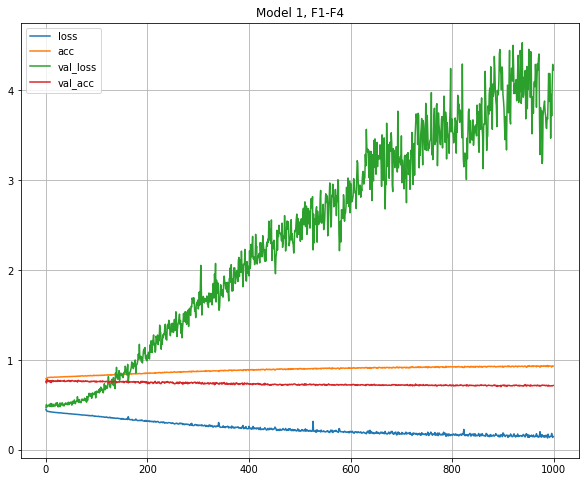

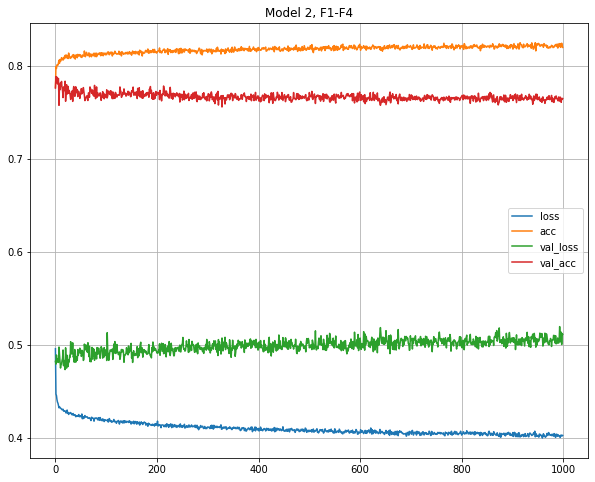

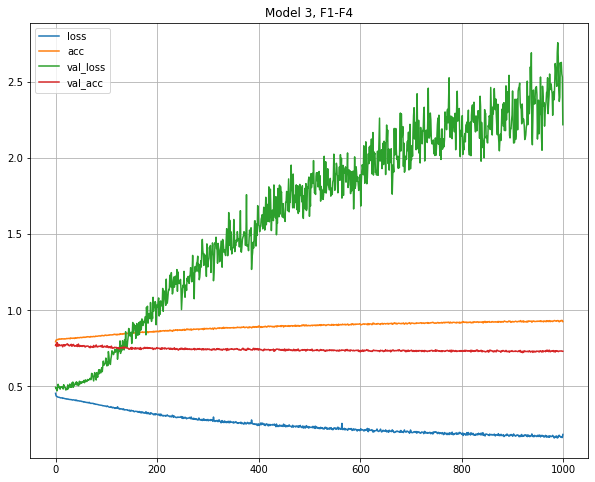

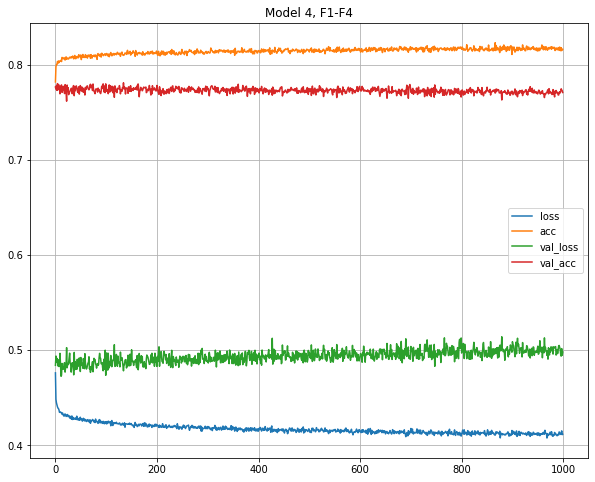

In [67]:
# Visualize the training results
plt.figure(figsize=(10,8))
plt.title('Model 1, F1-F4')
plt.plot(history1.history['loss'],label='loss')
plt.plot(history1.history['accuracy'],label='acc')
plt.plot(history1.history['val_loss'],label='val_loss')
plt.plot(history1.history['val_accuracy'],label='val_acc')
plt.grid()
plt.legend()
plt.show()

# Visualize the training results
plt.figure(figsize=(10,8))
plt.title('Model 2, F1-F4')
plt.plot(history2.history['loss'],label='loss')
plt.plot(history2.history['accuracy'],label='acc')
plt.plot(history2.history['val_loss'],label='val_loss')
plt.plot(history2.history['val_accuracy'],label='val_acc')
plt.grid()
plt.legend()
plt.show()

# Visualize the training results
plt.figure(figsize=(10,8))
plt.title('Model 3, F1-F4')
plt.plot(history3.history['loss'],label='loss')
plt.plot(history3.history['accuracy'],label='acc')
plt.plot(history3.history['val_loss'],label='val_loss')
plt.plot(history3.history['val_accuracy'],label='val_acc')
plt.grid()
plt.legend()
plt.show()

# Visualize the training results
plt.figure(figsize=(10,8))
plt.title('Model 4, F1-F4')
plt.plot(history4.history['loss'],label='loss')
plt.plot(history4.history['accuracy'],label='acc')
plt.plot(history4.history['val_loss'],label='val_loss')
plt.plot(history4.history['val_accuracy'],label='val_acc')
plt.grid()
plt.legend()
plt.show()

In [68]:
# Validation model
print('--------model 1,F1-F4-----------')
score = model1.evaluate(x_valid, y_valid, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])
print('-----------------------------------------------')

# Validation model
print('--------model 2, F1-F4-----------')
score = model2.evaluate(x_valid, y_valid, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])
print('-----------------------------------------------')
# Validation model
print('--------model 3, F1-F4-----------')
score = model3.evaluate(x_valid, y_valid, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])
print('-----------------------------------------------')
# Validation model
print('--------model 4, F1-F4-----------')
score = model4.evaluate(x_valid, y_valid, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])
print('-----------------------------------------------')

--------model 1,F1-F4-----------
Validation loss: 4.224353313446045
Validation accuracy: 0.719507098197937
-----------------------------------------------
--------model 2, F1-F4-----------
Validation loss: 0.5114085078239441
Validation accuracy: 0.7645987868309021
-----------------------------------------------
--------model 3, F1-F4-----------
Validation loss: 2.2196078300476074
Validation accuracy: 0.730709969997406
-----------------------------------------------
--------model 4, F1-F4-----------
Validation loss: 0.498025506734848
Validation accuracy: 0.7709004282951355
-----------------------------------------------


Testing with only B1-B4


In [69]:
# Features to use
features = ["B1","B2","B3","B4"]

# Extract features
x_train_raw = train[features]
x_valid_raw = valid[features]

# Normalize to zero mean
x_mean = np.mean(x_train_raw)
x_std = np.std(x_train_raw)
x_train = x_train_raw - x_mean
x_valid = x_valid_raw - x_mean

# Fix labels. The "to_categorical" call maps integer labels {n}
# to a vector of length N (number of labels) with a one in position n
y_train = keras.utils.to_categorical(trainlabels, len(genders))
y_valid = keras.utils.to_categorical(validlabels, len(genders))

# Create a model with a single hidden layer
model1 = keras.Sequential([
    keras.layers.Dense(28*28, activation=tf.nn.relu, input_dim=x_train.shape[1]),
    keras.layers.Dense(32, activation=tf.nn.relu, input_dim=28*28),
    keras.layers.Dense(512, activation=tf.nn.relu, input_dim=32),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation=tf.nn.relu, input_dim=512),
    keras.layers.Dense(len(genders), activation=tf.nn.softmax)
])
print('--------------Model 1---------------')
model1.summary()

# Train the model
model1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history1 = model1.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                    epochs=1000, batch_size=32, verbose=True)

# Create a model with a single hidden layer
model2 = keras.Sequential([
    keras.layers.Dense(64, activation=tf.nn.relu, input_dim=x_train.shape[1]),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(32, activation=tf.nn.relu, input_dim=64),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(16, activation=tf.nn.relu, input_dim=32),
    keras.layers.Dense(len(genders), activation=tf.nn.softmax)
])

print('--------------Model 2---------------')
model2.summary()

# Train the model
model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history2 = model2.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                    epochs=1000, batch_size=32, verbose=True)

# Create a model with a single hidden layer
model3 = keras.Sequential([
    keras.layers.Dense(256, activation=tf.nn.relu, input_dim=x_train.shape[1]),
    keras.layers.Dense(512, activation=tf.nn.relu, input_dim=256),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(512, activation=tf.nn.relu, input_dim=512),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation=tf.nn.relu, input_dim=512),
    keras.layers.Dense(len(genders), activation=tf.nn.softmax)
])

print('--------------Model 3---------------')
model3.summary()

# Train the model
model3.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history3 = model3.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                    epochs=1000, batch_size=32, verbose=True)

# Create a model with a single hidden layer
model4 = keras.Sequential([
    keras.layers.Dense(64, activation=tf.nn.relu, input_dim=x_train.shape[1]),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(len(genders), activation=tf.nn.softmax),
])

print('--------------Model 4---------------')
model4.summary()

# Train the model
model4.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history4 = model4.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                    epochs=1000, batch_size=32, verbose=True)

--------------Model 1---------------
Model: "sequential_62"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_235 (Dense)            (None, 784)               3920      
_________________________________________________________________
dense_236 (Dense)            (None, 32)                25120     
_________________________________________________________________
dense_237 (Dense)            (None, 512)               16896     
_________________________________________________________________
dropout_87 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_238 (Dense)            (None, 64)                32832     
_________________________________________________________________
dense_239 (Dense)            (None, 2)                 130       
Total params: 78,898
Trainable params: 78,898
Non-trainable params: 0
____________

394/394 [==============================] - 0s 986us/step - loss: 0.6058 - accuracy: 0.6672 - val_loss: 0.6919 - val_accuracy: 0.6611
Epoch 50/1000
394/394 [==============================] - 0s 988us/step - loss: 0.6046 - accuracy: 0.6686 - val_loss: 0.6823 - val_accuracy: 0.6674
Epoch 51/1000
394/394 [==============================] - 0s 970us/step - loss: 0.6041 - accuracy: 0.6685 - val_loss: 0.6859 - val_accuracy: 0.6737
Epoch 52/1000
394/394 [==============================] - 0s 970us/step - loss: 0.6042 - accuracy: 0.6681 - val_loss: 0.6729 - val_accuracy: 0.6793
Epoch 53/1000
394/394 [==============================] - 0s 970us/step - loss: 0.6037 - accuracy: 0.6695 - val_loss: 0.6977 - val_accuracy: 0.6807
Epoch 54/1000
394/394 [==============================] - 0s 978us/step - loss: 0.6052 - accuracy: 0.6659 - val_loss: 0.7037 - val_accuracy: 0.6677
Epoch 55/1000
394/394 [==============================] - 0s 973us/step - loss: 0.6033 - accuracy: 0.6690 - val_loss: 0.7319 - val_ac

Epoch 105/1000
394/394 [==============================] - 0s 998us/step - loss: 0.5904 - accuracy: 0.6775 - val_loss: 0.9737 - val_accuracy: 0.6526
Epoch 106/1000
394/394 [==============================] - 0s 1ms/step - loss: 0.5877 - accuracy: 0.6787 - val_loss: 1.0536 - val_accuracy: 0.6534
Epoch 107/1000
394/394 [==============================] - 0s 1ms/step - loss: 0.5891 - accuracy: 0.6759 - val_loss: 1.0383 - val_accuracy: 0.6458
Epoch 108/1000
394/394 [==============================] - 0s 1ms/step - loss: 0.5878 - accuracy: 0.6821 - val_loss: 1.1939 - val_accuracy: 0.6663
Epoch 109/1000
394/394 [==============================] - 0s 1ms/step - loss: 0.5895 - accuracy: 0.6803 - val_loss: 1.1047 - val_accuracy: 0.6659
Epoch 110/1000
394/394 [==============================] - 0s 1ms/step - loss: 0.5882 - accuracy: 0.6819 - val_loss: 1.0975 - val_accuracy: 0.6681
Epoch 111/1000
394/394 [==============================] - 0s 993us/step - loss: 0.5864 - accuracy: 0.6822 - val_loss: 1.08

394/394 [==============================] - 0s 958us/step - loss: 0.5690 - accuracy: 0.6911 - val_loss: 1.9399 - val_accuracy: 0.6613
Epoch 161/1000
394/394 [==============================] - 0s 1ms/step - loss: 0.5699 - accuracy: 0.6885 - val_loss: 2.4493 - val_accuracy: 0.6475
Epoch 162/1000
394/394 [==============================] - 0s 1ms/step - loss: 0.5717 - accuracy: 0.6899 - val_loss: 2.0196 - val_accuracy: 0.6533
Epoch 163/1000
394/394 [==============================] - 0s 993us/step - loss: 0.5702 - accuracy: 0.6930 - val_loss: 1.9927 - val_accuracy: 0.6622
Epoch 164/1000
394/394 [==============================] - 0s 1ms/step - loss: 0.5701 - accuracy: 0.6907 - val_loss: 1.8879 - val_accuracy: 0.6426
Epoch 165/1000
394/394 [==============================] - 0s 1ms/step - loss: 0.5697 - accuracy: 0.6931 - val_loss: 1.9234 - val_accuracy: 0.6594
Epoch 166/1000
394/394 [==============================] - 0s 1ms/step - loss: 0.5688 - accuracy: 0.6933 - val_loss: 2.1962 - val_accura

394/394 [==============================] - 0s 955us/step - loss: 0.5501 - accuracy: 0.7046 - val_loss: 3.1691 - val_accuracy: 0.6500
Epoch 216/1000
394/394 [==============================] - 0s 947us/step - loss: 0.5489 - accuracy: 0.7024 - val_loss: 3.4350 - val_accuracy: 0.6533
Epoch 217/1000
394/394 [==============================] - 0s 955us/step - loss: 0.5549 - accuracy: 0.7020 - val_loss: 3.4151 - val_accuracy: 0.6566
Epoch 218/1000
394/394 [==============================] - 0s 953us/step - loss: 0.5488 - accuracy: 0.7015 - val_loss: 3.5379 - val_accuracy: 0.6488
Epoch 219/1000
394/394 [==============================] - 0s 950us/step - loss: 0.5484 - accuracy: 0.7024 - val_loss: 3.5548 - val_accuracy: 0.6316
Epoch 220/1000
394/394 [==============================] - 0s 955us/step - loss: 0.5483 - accuracy: 0.7028 - val_loss: 3.6339 - val_accuracy: 0.6450
Epoch 221/1000
394/394 [==============================] - 0s 950us/step - loss: 0.5475 - accuracy: 0.7030 - val_loss: 3.4107 - 

394/394 [==============================] - 0s 955us/step - loss: 0.5350 - accuracy: 0.7157 - val_loss: 4.7972 - val_accuracy: 0.6386
Epoch 271/1000
394/394 [==============================] - 0s 950us/step - loss: 0.5295 - accuracy: 0.7172 - val_loss: 5.5567 - val_accuracy: 0.6537
Epoch 272/1000
394/394 [==============================] - 0s 953us/step - loss: 0.5276 - accuracy: 0.7162 - val_loss: 5.0755 - val_accuracy: 0.6383
Epoch 273/1000
394/394 [==============================] - 0s 951us/step - loss: 0.5280 - accuracy: 0.7144 - val_loss: 5.7015 - val_accuracy: 0.6517
Epoch 274/1000
394/394 [==============================] - 0s 953us/step - loss: 0.5281 - accuracy: 0.7169 - val_loss: 5.1079 - val_accuracy: 0.6360
Epoch 275/1000
394/394 [==============================] - 0s 950us/step - loss: 0.5303 - accuracy: 0.7185 - val_loss: 5.5486 - val_accuracy: 0.6391
Epoch 276/1000
394/394 [==============================] - 0s 953us/step - loss: 0.5311 - accuracy: 0.7177 - val_loss: 4.8612 - 

394/394 [==============================] - 0s 953us/step - loss: 0.5170 - accuracy: 0.7211 - val_loss: 6.4265 - val_accuracy: 0.6416
Epoch 326/1000
394/394 [==============================] - 0s 955us/step - loss: 0.5188 - accuracy: 0.7224 - val_loss: 6.4951 - val_accuracy: 0.6386
Epoch 327/1000
394/394 [==============================] - 0s 958us/step - loss: 0.5128 - accuracy: 0.7269 - val_loss: 5.7444 - val_accuracy: 0.6295
Epoch 328/1000
394/394 [==============================] - 0s 955us/step - loss: 0.5113 - accuracy: 0.7262 - val_loss: 6.4254 - val_accuracy: 0.6353
Epoch 329/1000
394/394 [==============================] - 0s 955us/step - loss: 0.5071 - accuracy: 0.7302 - val_loss: 6.7596 - val_accuracy: 0.6345
Epoch 330/1000
394/394 [==============================] - 0s 950us/step - loss: 0.5144 - accuracy: 0.7273 - val_loss: 5.7927 - val_accuracy: 0.6299
Epoch 331/1000
394/394 [==============================] - 0s 953us/step - loss: 0.5098 - accuracy: 0.7253 - val_loss: 6.0289 - 

394/394 [==============================] - 0s 960us/step - loss: 0.4892 - accuracy: 0.7416 - val_loss: 7.9720 - val_accuracy: 0.6248
Epoch 381/1000
394/394 [==============================] - 0s 950us/step - loss: 0.4957 - accuracy: 0.7389 - val_loss: 7.8436 - val_accuracy: 0.6358
Epoch 382/1000
394/394 [==============================] - 0s 963us/step - loss: 0.4961 - accuracy: 0.7370 - val_loss: 7.8337 - val_accuracy: 0.6338
Epoch 383/1000
394/394 [==============================] - 0s 955us/step - loss: 0.4901 - accuracy: 0.7366 - val_loss: 8.2116 - val_accuracy: 0.6398
Epoch 384/1000
394/394 [==============================] - 0s 950us/step - loss: 0.5051 - accuracy: 0.7291 - val_loss: 8.1777 - val_accuracy: 0.6405
Epoch 385/1000
394/394 [==============================] - 0s 950us/step - loss: 0.4967 - accuracy: 0.7335 - val_loss: 8.6743 - val_accuracy: 0.6428
Epoch 386/1000
394/394 [==============================] - 0s 945us/step - loss: 0.5002 - accuracy: 0.7327 - val_loss: 8.6372 - 

394/394 [==============================] - 0s 958us/step - loss: 0.4885 - accuracy: 0.7454 - val_loss: 7.5479 - val_accuracy: 0.6365
Epoch 436/1000
394/394 [==============================] - 0s 953us/step - loss: 0.4923 - accuracy: 0.7430 - val_loss: 7.8755 - val_accuracy: 0.6324
Epoch 437/1000
394/394 [==============================] - 0s 953us/step - loss: 0.4825 - accuracy: 0.7486 - val_loss: 8.4973 - val_accuracy: 0.6303
Epoch 438/1000
394/394 [==============================] - 0s 953us/step - loss: 0.4795 - accuracy: 0.7473 - val_loss: 7.9468 - val_accuracy: 0.6271
Epoch 439/1000
394/394 [==============================] - 0s 953us/step - loss: 0.4807 - accuracy: 0.7447 - val_loss: 8.6138 - val_accuracy: 0.6237
Epoch 440/1000
394/394 [==============================] - 0s 955us/step - loss: 0.4857 - accuracy: 0.7486 - val_loss: 8.3214 - val_accuracy: 0.6345
Epoch 441/1000
394/394 [==============================] - 0s 955us/step - loss: 0.4801 - accuracy: 0.7470 - val_loss: 8.3913 - 

394/394 [==============================] - 0s 950us/step - loss: 0.4794 - accuracy: 0.7477 - val_loss: 9.2509 - val_accuracy: 0.6348
Epoch 491/1000
394/394 [==============================] - 0s 950us/step - loss: 0.4690 - accuracy: 0.7541 - val_loss: 8.6496 - val_accuracy: 0.6314
Epoch 492/1000
394/394 [==============================] - 0s 958us/step - loss: 0.4660 - accuracy: 0.7569 - val_loss: 8.3485 - val_accuracy: 0.6300
Epoch 493/1000
394/394 [==============================] - 0s 953us/step - loss: 0.4733 - accuracy: 0.7501 - val_loss: 8.5802 - val_accuracy: 0.6282
Epoch 494/1000
394/394 [==============================] - 0s 958us/step - loss: 0.4723 - accuracy: 0.7562 - val_loss: 9.8598 - val_accuracy: 0.6341
Epoch 495/1000
394/394 [==============================] - 0s 955us/step - loss: 0.4809 - accuracy: 0.7451 - val_loss: 9.1404 - val_accuracy: 0.6334
Epoch 496/1000
394/394 [==============================] - 0s 955us/step - loss: 0.4684 - accuracy: 0.7534 - val_loss: 9.1196 - 

394/394 [==============================] - 0s 950us/step - loss: 0.4574 - accuracy: 0.7624 - val_loss: 9.2789 - val_accuracy: 0.6293
Epoch 546/1000
394/394 [==============================] - 0s 945us/step - loss: 0.4688 - accuracy: 0.7572 - val_loss: 8.8429 - val_accuracy: 0.6232
Epoch 547/1000
394/394 [==============================] - 0s 960us/step - loss: 0.4692 - accuracy: 0.7543 - val_loss: 9.5083 - val_accuracy: 0.6190
Epoch 548/1000
394/394 [==============================] - 0s 953us/step - loss: 0.4513 - accuracy: 0.7647 - val_loss: 9.2958 - val_accuracy: 0.6302
Epoch 549/1000
394/394 [==============================] - 0s 955us/step - loss: 0.4606 - accuracy: 0.7608 - val_loss: 9.1817 - val_accuracy: 0.6283
Epoch 550/1000
394/394 [==============================] - 0s 958us/step - loss: 0.4546 - accuracy: 0.7624 - val_loss: 9.3717 - val_accuracy: 0.6304
Epoch 551/1000
394/394 [==============================] - 0s 970us/step - loss: 0.4571 - accuracy: 0.7666 - val_loss: 9.8157 - 

394/394 [==============================] - 0s 947us/step - loss: 0.4406 - accuracy: 0.7707 - val_loss: 9.6225 - val_accuracy: 0.6275
Epoch 601/1000
394/394 [==============================] - 0s 950us/step - loss: 0.4593 - accuracy: 0.7612 - val_loss: 9.3385 - val_accuracy: 0.6292
Epoch 602/1000
394/394 [==============================] - 0s 963us/step - loss: 0.4474 - accuracy: 0.7695 - val_loss: 8.9620 - val_accuracy: 0.6262
Epoch 603/1000
394/394 [==============================] - 0s 950us/step - loss: 0.4607 - accuracy: 0.7613 - val_loss: 11.0762 - val_accuracy: 0.6311
Epoch 604/1000
394/394 [==============================] - 0s 950us/step - loss: 0.4567 - accuracy: 0.7633 - val_loss: 9.5346 - val_accuracy: 0.6191
Epoch 605/1000
394/394 [==============================] - 0s 947us/step - loss: 0.4561 - accuracy: 0.7632 - val_loss: 10.0964 - val_accuracy: 0.6218
Epoch 606/1000
394/394 [==============================] - 0s 947us/step - loss: 0.4453 - accuracy: 0.7674 - val_loss: 10.0769

394/394 [==============================] - 0s 947us/step - loss: 0.4472 - accuracy: 0.7683 - val_loss: 9.9864 - val_accuracy: 0.6213
Epoch 656/1000
394/394 [==============================] - 0s 958us/step - loss: 0.4432 - accuracy: 0.7713 - val_loss: 9.4346 - val_accuracy: 0.6234
Epoch 657/1000
394/394 [==============================] - 0s 953us/step - loss: 0.4342 - accuracy: 0.7725 - val_loss: 9.8468 - val_accuracy: 0.6134
Epoch 658/1000
394/394 [==============================] - 0s 955us/step - loss: 0.4324 - accuracy: 0.7745 - val_loss: 10.7467 - val_accuracy: 0.6198
Epoch 659/1000
394/394 [==============================] - 0s 958us/step - loss: 0.4407 - accuracy: 0.7685 - val_loss: 9.5728 - val_accuracy: 0.6282
Epoch 660/1000
394/394 [==============================] - 0s 953us/step - loss: 0.4356 - accuracy: 0.7730 - val_loss: 10.3116 - val_accuracy: 0.6205
Epoch 661/1000
394/394 [==============================] - 0s 963us/step - loss: 0.4500 - accuracy: 0.7676 - val_loss: 10.3295

394/394 [==============================] - 0s 953us/step - loss: 0.4266 - accuracy: 0.7806 - val_loss: 11.2282 - val_accuracy: 0.6260
Epoch 711/1000
394/394 [==============================] - 0s 953us/step - loss: 0.4361 - accuracy: 0.7736 - val_loss: 11.6941 - val_accuracy: 0.6248
Epoch 712/1000
394/394 [==============================] - 0s 950us/step - loss: 0.4358 - accuracy: 0.7760 - val_loss: 10.9440 - val_accuracy: 0.6289
Epoch 713/1000
394/394 [==============================] - 0s 947us/step - loss: 0.4299 - accuracy: 0.7756 - val_loss: 11.3266 - val_accuracy: 0.6176
Epoch 714/1000
394/394 [==============================] - 0s 960us/step - loss: 0.4326 - accuracy: 0.7764 - val_loss: 10.9717 - val_accuracy: 0.6205
Epoch 715/1000
394/394 [==============================] - 0s 953us/step - loss: 0.4345 - accuracy: 0.7735 - val_loss: 11.6392 - val_accuracy: 0.6220
Epoch 716/1000
394/394 [==============================] - 0s 958us/step - loss: 0.4337 - accuracy: 0.7781 - val_loss: 11.

394/394 [==============================] - 0s 953us/step - loss: 0.4218 - accuracy: 0.7828 - val_loss: 11.8591 - val_accuracy: 0.6180
Epoch 766/1000
394/394 [==============================] - 0s 958us/step - loss: 0.4335 - accuracy: 0.7787 - val_loss: 11.8866 - val_accuracy: 0.6296
Epoch 767/1000
394/394 [==============================] - 0s 958us/step - loss: 0.4286 - accuracy: 0.7810 - val_loss: 11.4348 - val_accuracy: 0.6149
Epoch 768/1000
394/394 [==============================] - 0s 953us/step - loss: 0.4261 - accuracy: 0.7794 - val_loss: 11.7286 - val_accuracy: 0.6198
Epoch 769/1000
394/394 [==============================] - 0s 958us/step - loss: 0.4264 - accuracy: 0.7783 - val_loss: 11.4426 - val_accuracy: 0.6204
Epoch 770/1000
394/394 [==============================] - 0s 988us/step - loss: 0.4387 - accuracy: 0.7788 - val_loss: 12.3484 - val_accuracy: 0.6250
Epoch 771/1000
394/394 [==============================] - 0s 1ms/step - loss: 0.4146 - accuracy: 0.7867 - val_loss: 12.25

394/394 [==============================] - 0s 960us/step - loss: 0.4260 - accuracy: 0.7828 - val_loss: 14.1807 - val_accuracy: 0.6290
Epoch 821/1000
394/394 [==============================] - 0s 958us/step - loss: 0.4329 - accuracy: 0.7825 - val_loss: 13.9064 - val_accuracy: 0.6258
Epoch 822/1000
394/394 [==============================] - 0s 955us/step - loss: 0.4219 - accuracy: 0.7812 - val_loss: 12.4159 - val_accuracy: 0.6208
Epoch 823/1000
394/394 [==============================] - 0s 958us/step - loss: 0.4222 - accuracy: 0.7849 - val_loss: 13.2109 - val_accuracy: 0.6247
Epoch 824/1000
394/394 [==============================] - 0s 953us/step - loss: 0.4074 - accuracy: 0.7913 - val_loss: 12.9201 - val_accuracy: 0.6232
Epoch 825/1000
394/394 [==============================] - 0s 960us/step - loss: 0.4278 - accuracy: 0.7813 - val_loss: 13.6794 - val_accuracy: 0.6286
Epoch 826/1000
394/394 [==============================] - 0s 963us/step - loss: 0.4267 - accuracy: 0.7817 - val_loss: 11.

394/394 [==============================] - 0s 950us/step - loss: 0.4036 - accuracy: 0.7937 - val_loss: 11.9619 - val_accuracy: 0.6262
Epoch 876/1000
394/394 [==============================] - 0s 953us/step - loss: 0.4139 - accuracy: 0.7887 - val_loss: 11.9358 - val_accuracy: 0.6248
Epoch 877/1000
394/394 [==============================] - 0s 947us/step - loss: 0.4374 - accuracy: 0.7806 - val_loss: 12.1691 - val_accuracy: 0.6205
Epoch 878/1000
394/394 [==============================] - 0s 960us/step - loss: 0.4280 - accuracy: 0.7854 - val_loss: 12.5375 - val_accuracy: 0.6153
Epoch 879/1000
394/394 [==============================] - 0s 950us/step - loss: 0.4104 - accuracy: 0.7912 - val_loss: 12.2203 - val_accuracy: 0.6274
Epoch 880/1000
394/394 [==============================] - 0s 953us/step - loss: 0.4107 - accuracy: 0.7900 - val_loss: 12.1531 - val_accuracy: 0.6241
Epoch 881/1000
394/394 [==============================] - 0s 958us/step - loss: 0.4053 - accuracy: 0.7929 - val_loss: 12.

394/394 [==============================] - 0s 958us/step - loss: 0.3998 - accuracy: 0.7966 - val_loss: 13.2080 - val_accuracy: 0.6198
Epoch 931/1000
394/394 [==============================] - 0s 958us/step - loss: 0.3965 - accuracy: 0.7934 - val_loss: 12.9837 - val_accuracy: 0.6138
Epoch 932/1000
394/394 [==============================] - 0s 953us/step - loss: 0.4011 - accuracy: 0.7989 - val_loss: 13.3182 - val_accuracy: 0.6157
Epoch 933/1000
394/394 [==============================] - 0s 955us/step - loss: 0.4027 - accuracy: 0.7949 - val_loss: 12.5891 - val_accuracy: 0.6135
Epoch 934/1000
394/394 [==============================] - 0s 955us/step - loss: 0.4099 - accuracy: 0.7944 - val_loss: 11.9633 - val_accuracy: 0.6164
Epoch 935/1000
394/394 [==============================] - 0s 950us/step - loss: 0.4168 - accuracy: 0.7909 - val_loss: 11.7055 - val_accuracy: 0.6187
Epoch 936/1000
394/394 [==============================] - 0s 960us/step - loss: 0.4086 - accuracy: 0.7942 - val_loss: 12.

394/394 [==============================] - 0s 963us/step - loss: 0.3954 - accuracy: 0.8011 - val_loss: 14.8052 - val_accuracy: 0.6135
Epoch 986/1000
394/394 [==============================] - 0s 955us/step - loss: 0.3943 - accuracy: 0.8012 - val_loss: 13.9906 - val_accuracy: 0.6232
Epoch 987/1000
394/394 [==============================] - 0s 955us/step - loss: 0.3963 - accuracy: 0.7978 - val_loss: 14.6076 - val_accuracy: 0.6220
Epoch 988/1000
394/394 [==============================] - 0s 953us/step - loss: 0.3947 - accuracy: 0.8000 - val_loss: 13.8960 - val_accuracy: 0.6167
Epoch 989/1000
394/394 [==============================] - 0s 950us/step - loss: 0.3915 - accuracy: 0.8049 - val_loss: 13.7441 - val_accuracy: 0.6167
Epoch 990/1000
394/394 [==============================] - 0s 955us/step - loss: 0.4233 - accuracy: 0.7885 - val_loss: 14.9229 - val_accuracy: 0.6215
Epoch 991/1000
394/394 [==============================] - 0s 958us/step - loss: 0.4008 - accuracy: 0.7979 - val_loss: 14.

394/394 [==============================] - 0s 563us/step - loss: 0.6160 - accuracy: 0.6573 - val_loss: 0.6504 - val_accuracy: 0.6566
Epoch 33/1000
394/394 [==============================] - 0s 570us/step - loss: 0.6160 - accuracy: 0.6589 - val_loss: 0.6375 - val_accuracy: 0.6715
Epoch 34/1000
394/394 [==============================] - 0s 568us/step - loss: 0.6161 - accuracy: 0.6590 - val_loss: 0.6420 - val_accuracy: 0.6638
Epoch 35/1000
394/394 [==============================] - 0s 565us/step - loss: 0.6166 - accuracy: 0.6588 - val_loss: 0.6356 - val_accuracy: 0.6779
Epoch 36/1000
394/394 [==============================] - 0s 565us/step - loss: 0.6156 - accuracy: 0.6548 - val_loss: 0.6338 - val_accuracy: 0.6751
Epoch 37/1000
394/394 [==============================] - 0s 565us/step - loss: 0.6159 - accuracy: 0.6590 - val_loss: 0.6390 - val_accuracy: 0.6697
Epoch 38/1000
394/394 [==============================] - 0s 570us/step - loss: 0.6155 - accuracy: 0.6584 - val_loss: 0.6382 - val_ac

Epoch 88/1000
394/394 [==============================] - 0s 570us/step - loss: 0.6102 - accuracy: 0.6609 - val_loss: 0.6574 - val_accuracy: 0.6715
Epoch 89/1000
394/394 [==============================] - 0s 565us/step - loss: 0.6121 - accuracy: 0.6640 - val_loss: 0.6611 - val_accuracy: 0.6732
Epoch 90/1000
394/394 [==============================] - 0s 563us/step - loss: 0.6112 - accuracy: 0.6613 - val_loss: 0.6622 - val_accuracy: 0.6652
Epoch 91/1000
394/394 [==============================] - 0s 565us/step - loss: 0.6117 - accuracy: 0.6636 - val_loss: 0.6516 - val_accuracy: 0.6793
Epoch 92/1000
394/394 [==============================] - 0s 565us/step - loss: 0.6098 - accuracy: 0.6632 - val_loss: 0.6644 - val_accuracy: 0.6681
Epoch 93/1000
394/394 [==============================] - 0s 568us/step - loss: 0.6106 - accuracy: 0.6602 - val_loss: 0.6510 - val_accuracy: 0.6816
Epoch 94/1000
394/394 [==============================] - 0s 565us/step - loss: 0.6108 - accuracy: 0.6631 - val_loss: 0

394/394 [==============================] - 0s 570us/step - loss: 0.6085 - accuracy: 0.6669 - val_loss: 0.6512 - val_accuracy: 0.6725
Epoch 144/1000
394/394 [==============================] - 0s 565us/step - loss: 0.6095 - accuracy: 0.6657 - val_loss: 0.6444 - val_accuracy: 0.6789
Epoch 145/1000
394/394 [==============================] - 0s 563us/step - loss: 0.6078 - accuracy: 0.6658 - val_loss: 0.6516 - val_accuracy: 0.6776
Epoch 146/1000
394/394 [==============================] - 0s 573us/step - loss: 0.6089 - accuracy: 0.6652 - val_loss: 0.6536 - val_accuracy: 0.6694
Epoch 147/1000
394/394 [==============================] - 0s 568us/step - loss: 0.6077 - accuracy: 0.6670 - val_loss: 0.6506 - val_accuracy: 0.6779
Epoch 148/1000
394/394 [==============================] - 0s 568us/step - loss: 0.6089 - accuracy: 0.6639 - val_loss: 0.6570 - val_accuracy: 0.6764
Epoch 149/1000
394/394 [==============================] - 0s 565us/step - loss: 0.6076 - accuracy: 0.6673 - val_loss: 0.6505 - 

394/394 [==============================] - 0s 568us/step - loss: 0.6058 - accuracy: 0.6671 - val_loss: 0.6593 - val_accuracy: 0.6737
Epoch 199/1000
394/394 [==============================] - 0s 573us/step - loss: 0.6041 - accuracy: 0.6670 - val_loss: 0.6552 - val_accuracy: 0.6708
Epoch 200/1000
394/394 [==============================] - 0s 565us/step - loss: 0.6056 - accuracy: 0.6675 - val_loss: 0.6602 - val_accuracy: 0.6701
Epoch 201/1000
394/394 [==============================] - 0s 568us/step - loss: 0.6048 - accuracy: 0.6714 - val_loss: 0.6588 - val_accuracy: 0.6757
Epoch 202/1000
394/394 [==============================] - 0s 573us/step - loss: 0.6051 - accuracy: 0.6675 - val_loss: 0.6586 - val_accuracy: 0.6727
Epoch 203/1000
394/394 [==============================] - 0s 570us/step - loss: 0.6053 - accuracy: 0.6659 - val_loss: 0.6546 - val_accuracy: 0.6747
Epoch 204/1000
394/394 [==============================] - 0s 568us/step - loss: 0.6070 - accuracy: 0.6621 - val_loss: 0.6495 - 

394/394 [==============================] - 0s 568us/step - loss: 0.6041 - accuracy: 0.6725 - val_loss: 0.6548 - val_accuracy: 0.6768
Epoch 254/1000
394/394 [==============================] - 0s 568us/step - loss: 0.6047 - accuracy: 0.6688 - val_loss: 0.6532 - val_accuracy: 0.6681
Epoch 255/1000
394/394 [==============================] - 0s 565us/step - loss: 0.6037 - accuracy: 0.6683 - val_loss: 0.6541 - val_accuracy: 0.6726
Epoch 256/1000
394/394 [==============================] - 0s 568us/step - loss: 0.6038 - accuracy: 0.6684 - val_loss: 0.6506 - val_accuracy: 0.6685
Epoch 257/1000
394/394 [==============================] - 0s 568us/step - loss: 0.6053 - accuracy: 0.6676 - val_loss: 0.6579 - val_accuracy: 0.6673
Epoch 258/1000
394/394 [==============================] - 0s 568us/step - loss: 0.6038 - accuracy: 0.6691 - val_loss: 0.6524 - val_accuracy: 0.6760
Epoch 259/1000
394/394 [==============================] - 0s 565us/step - loss: 0.6034 - accuracy: 0.6671 - val_loss: 0.6528 - 

394/394 [==============================] - 0s 568us/step - loss: 0.6024 - accuracy: 0.6700 - val_loss: 0.6596 - val_accuracy: 0.6629
Epoch 309/1000
394/394 [==============================] - 0s 568us/step - loss: 0.6018 - accuracy: 0.6706 - val_loss: 0.6548 - val_accuracy: 0.6702
Epoch 310/1000
394/394 [==============================] - 0s 565us/step - loss: 0.6026 - accuracy: 0.6706 - val_loss: 0.6603 - val_accuracy: 0.6685
Epoch 311/1000
394/394 [==============================] - 0s 565us/step - loss: 0.6035 - accuracy: 0.6694 - val_loss: 0.6537 - val_accuracy: 0.6723
Epoch 312/1000
394/394 [==============================] - 0s 568us/step - loss: 0.6026 - accuracy: 0.6687 - val_loss: 0.6563 - val_accuracy: 0.6674
Epoch 313/1000
394/394 [==============================] - 0s 570us/step - loss: 0.6012 - accuracy: 0.6717 - val_loss: 0.6545 - val_accuracy: 0.6725
Epoch 314/1000
394/394 [==============================] - 0s 570us/step - loss: 0.6010 - accuracy: 0.6710 - val_loss: 0.6685 - 

394/394 [==============================] - 0s 568us/step - loss: 0.6024 - accuracy: 0.6708 - val_loss: 0.6524 - val_accuracy: 0.6607
Epoch 364/1000
394/394 [==============================] - 0s 568us/step - loss: 0.6035 - accuracy: 0.6714 - val_loss: 0.6530 - val_accuracy: 0.6652
Epoch 365/1000
394/394 [==============================] - 0s 563us/step - loss: 0.6023 - accuracy: 0.6686 - val_loss: 0.6559 - val_accuracy: 0.6634
Epoch 366/1000
394/394 [==============================] - 0s 568us/step - loss: 0.6025 - accuracy: 0.6704 - val_loss: 0.6513 - val_accuracy: 0.6649
Epoch 367/1000
394/394 [==============================] - 0s 568us/step - loss: 0.6024 - accuracy: 0.6691 - val_loss: 0.6462 - val_accuracy: 0.6625
Epoch 368/1000
394/394 [==============================] - 0s 568us/step - loss: 0.6007 - accuracy: 0.6741 - val_loss: 0.6512 - val_accuracy: 0.6636
Epoch 369/1000
394/394 [==============================] - 0s 570us/step - loss: 0.6023 - accuracy: 0.6675 - val_loss: 0.6458 - 

394/394 [==============================] - 0s 563us/step - loss: 0.6025 - accuracy: 0.6706 - val_loss: 0.6575 - val_accuracy: 0.6550
Epoch 419/1000
394/394 [==============================] - 0s 565us/step - loss: 0.5995 - accuracy: 0.6749 - val_loss: 0.6545 - val_accuracy: 0.6557
Epoch 420/1000
394/394 [==============================] - 0s 565us/step - loss: 0.6012 - accuracy: 0.6729 - val_loss: 0.6570 - val_accuracy: 0.6610
Epoch 421/1000
394/394 [==============================] - 0s 565us/step - loss: 0.6006 - accuracy: 0.6717 - val_loss: 0.6527 - val_accuracy: 0.6680
Epoch 422/1000
394/394 [==============================] - 0s 565us/step - loss: 0.5999 - accuracy: 0.6702 - val_loss: 0.6563 - val_accuracy: 0.6688
Epoch 423/1000
394/394 [==============================] - 0s 565us/step - loss: 0.6008 - accuracy: 0.6699 - val_loss: 0.6575 - val_accuracy: 0.6705
Epoch 424/1000
394/394 [==============================] - 0s 568us/step - loss: 0.6002 - accuracy: 0.6723 - val_loss: 0.6565 - 

394/394 [==============================] - 0s 565us/step - loss: 0.5981 - accuracy: 0.6747 - val_loss: 0.6570 - val_accuracy: 0.6617
Epoch 474/1000
394/394 [==============================] - 0s 563us/step - loss: 0.5987 - accuracy: 0.6733 - val_loss: 0.6611 - val_accuracy: 0.6506
Epoch 475/1000
394/394 [==============================] - 0s 565us/step - loss: 0.5987 - accuracy: 0.6729 - val_loss: 0.6463 - val_accuracy: 0.6681
Epoch 476/1000
394/394 [==============================] - 0s 565us/step - loss: 0.6017 - accuracy: 0.6710 - val_loss: 0.6476 - val_accuracy: 0.6699
Epoch 477/1000
394/394 [==============================] - 0s 563us/step - loss: 0.6008 - accuracy: 0.6707 - val_loss: 0.6541 - val_accuracy: 0.6641
Epoch 478/1000
394/394 [==============================] - 0s 563us/step - loss: 0.5982 - accuracy: 0.6717 - val_loss: 0.6619 - val_accuracy: 0.6534
Epoch 479/1000
394/394 [==============================] - 0s 570us/step - loss: 0.6019 - accuracy: 0.6694 - val_loss: 0.6508 - 

394/394 [==============================] - 0s 565us/step - loss: 0.5991 - accuracy: 0.6737 - val_loss: 0.6418 - val_accuracy: 0.6628
Epoch 529/1000
394/394 [==============================] - 0s 568us/step - loss: 0.5988 - accuracy: 0.6715 - val_loss: 0.6442 - val_accuracy: 0.6620
Epoch 530/1000
394/394 [==============================] - 0s 570us/step - loss: 0.6008 - accuracy: 0.6694 - val_loss: 0.6461 - val_accuracy: 0.6617
Epoch 531/1000
394/394 [==============================] - 0s 568us/step - loss: 0.6005 - accuracy: 0.6722 - val_loss: 0.6429 - val_accuracy: 0.6643
Epoch 532/1000
394/394 [==============================] - 0s 568us/step - loss: 0.5994 - accuracy: 0.6736 - val_loss: 0.6423 - val_accuracy: 0.6566
Epoch 533/1000
394/394 [==============================] - 0s 570us/step - loss: 0.5992 - accuracy: 0.6703 - val_loss: 0.6440 - val_accuracy: 0.6594
Epoch 534/1000
394/394 [==============================] - 0s 568us/step - loss: 0.5992 - accuracy: 0.6719 - val_loss: 0.6447 - 

394/394 [==============================] - 0s 570us/step - loss: 0.5984 - accuracy: 0.6738 - val_loss: 0.6565 - val_accuracy: 0.6566
Epoch 584/1000
394/394 [==============================] - 0s 573us/step - loss: 0.5978 - accuracy: 0.6744 - val_loss: 0.6602 - val_accuracy: 0.6488
Epoch 585/1000
394/394 [==============================] - 0s 570us/step - loss: 0.5965 - accuracy: 0.6737 - val_loss: 0.6511 - val_accuracy: 0.6603
Epoch 586/1000
394/394 [==============================] - 0s 568us/step - loss: 0.6006 - accuracy: 0.6694 - val_loss: 0.6540 - val_accuracy: 0.6638
Epoch 587/1000
394/394 [==============================] - 0s 573us/step - loss: 0.5983 - accuracy: 0.6713 - val_loss: 0.6556 - val_accuracy: 0.6603
Epoch 588/1000
394/394 [==============================] - 0s 570us/step - loss: 0.5991 - accuracy: 0.6710 - val_loss: 0.6605 - val_accuracy: 0.6545
Epoch 589/1000
394/394 [==============================] - 0s 568us/step - loss: 0.5975 - accuracy: 0.6753 - val_loss: 0.6605 - 

394/394 [==============================] - 0s 568us/step - loss: 0.5975 - accuracy: 0.6741 - val_loss: 0.6584 - val_accuracy: 0.6592
Epoch 639/1000
394/394 [==============================] - 0s 568us/step - loss: 0.5985 - accuracy: 0.6729 - val_loss: 0.6588 - val_accuracy: 0.6600
Epoch 640/1000
394/394 [==============================] - 0s 568us/step - loss: 0.5967 - accuracy: 0.6733 - val_loss: 0.6555 - val_accuracy: 0.6611
Epoch 641/1000
394/394 [==============================] - 0s 570us/step - loss: 0.5983 - accuracy: 0.6752 - val_loss: 0.6589 - val_accuracy: 0.6636
Epoch 642/1000
394/394 [==============================] - 0s 565us/step - loss: 0.5976 - accuracy: 0.6721 - val_loss: 0.6635 - val_accuracy: 0.6544
Epoch 643/1000
394/394 [==============================] - 0s 570us/step - loss: 0.5964 - accuracy: 0.6770 - val_loss: 0.6574 - val_accuracy: 0.6614
Epoch 644/1000
394/394 [==============================] - 0s 573us/step - loss: 0.5976 - accuracy: 0.6734 - val_loss: 0.6653 - 

394/394 [==============================] - 0s 565us/step - loss: 0.5957 - accuracy: 0.6743 - val_loss: 0.6541 - val_accuracy: 0.6538
Epoch 694/1000
394/394 [==============================] - 0s 568us/step - loss: 0.5956 - accuracy: 0.6737 - val_loss: 0.6501 - val_accuracy: 0.6597
Epoch 695/1000
394/394 [==============================] - 0s 568us/step - loss: 0.5966 - accuracy: 0.6760 - val_loss: 0.6492 - val_accuracy: 0.6643
Epoch 696/1000
394/394 [==============================] - 0s 568us/step - loss: 0.5940 - accuracy: 0.6765 - val_loss: 0.6544 - val_accuracy: 0.6627
Epoch 697/1000
394/394 [==============================] - 0s 565us/step - loss: 0.5991 - accuracy: 0.6700 - val_loss: 0.6582 - val_accuracy: 0.6558
Epoch 698/1000
394/394 [==============================] - 0s 568us/step - loss: 0.5980 - accuracy: 0.6750 - val_loss: 0.6488 - val_accuracy: 0.6678
Epoch 699/1000
394/394 [==============================] - 0s 568us/step - loss: 0.5989 - accuracy: 0.6729 - val_loss: 0.6522 - 

394/394 [==============================] - 0s 568us/step - loss: 0.5970 - accuracy: 0.6756 - val_loss: 0.6547 - val_accuracy: 0.6603
Epoch 749/1000
394/394 [==============================] - 0s 565us/step - loss: 0.5981 - accuracy: 0.6706 - val_loss: 0.6596 - val_accuracy: 0.6530
Epoch 750/1000
394/394 [==============================] - 0s 570us/step - loss: 0.5973 - accuracy: 0.6723 - val_loss: 0.6664 - val_accuracy: 0.6565
Epoch 751/1000
394/394 [==============================] - 0s 565us/step - loss: 0.5966 - accuracy: 0.6739 - val_loss: 0.6574 - val_accuracy: 0.6622
Epoch 752/1000
394/394 [==============================] - 0s 565us/step - loss: 0.5970 - accuracy: 0.6751 - val_loss: 0.6631 - val_accuracy: 0.6592
Epoch 753/1000
394/394 [==============================] - 0s 565us/step - loss: 0.5968 - accuracy: 0.6738 - val_loss: 0.6593 - val_accuracy: 0.6538
Epoch 754/1000
394/394 [==============================] - 0s 563us/step - loss: 0.5966 - accuracy: 0.6751 - val_loss: 0.6597 - 

394/394 [==============================] - 0s 563us/step - loss: 0.5947 - accuracy: 0.6783 - val_loss: 0.6653 - val_accuracy: 0.6578
Epoch 804/1000
394/394 [==============================] - 0s 565us/step - loss: 0.5976 - accuracy: 0.6725 - val_loss: 0.6677 - val_accuracy: 0.6551
Epoch 805/1000
394/394 [==============================] - 0s 565us/step - loss: 0.5955 - accuracy: 0.6776 - val_loss: 0.6678 - val_accuracy: 0.6576
Epoch 806/1000
394/394 [==============================] - 0s 568us/step - loss: 0.5965 - accuracy: 0.6754 - val_loss: 0.6692 - val_accuracy: 0.6528
Epoch 807/1000
394/394 [==============================] - 0s 565us/step - loss: 0.5962 - accuracy: 0.6742 - val_loss: 0.6723 - val_accuracy: 0.6551
Epoch 808/1000
394/394 [==============================] - 0s 565us/step - loss: 0.5978 - accuracy: 0.6742 - val_loss: 0.6633 - val_accuracy: 0.6634
Epoch 809/1000
394/394 [==============================] - 0s 565us/step - loss: 0.5984 - accuracy: 0.6761 - val_loss: 0.6650 - 

394/394 [==============================] - 0s 570us/step - loss: 0.5950 - accuracy: 0.6736 - val_loss: 0.6658 - val_accuracy: 0.6573
Epoch 859/1000
394/394 [==============================] - 0s 565us/step - loss: 0.5948 - accuracy: 0.6775 - val_loss: 0.6587 - val_accuracy: 0.6599
Epoch 860/1000
394/394 [==============================] - 0s 565us/step - loss: 0.5961 - accuracy: 0.6781 - val_loss: 0.6648 - val_accuracy: 0.6520
Epoch 861/1000
394/394 [==============================] - 0s 568us/step - loss: 0.5964 - accuracy: 0.6726 - val_loss: 0.6597 - val_accuracy: 0.6576
Epoch 862/1000
394/394 [==============================] - 0s 565us/step - loss: 0.5956 - accuracy: 0.6733 - val_loss: 0.6647 - val_accuracy: 0.6540
Epoch 863/1000
394/394 [==============================] - 0s 565us/step - loss: 0.5966 - accuracy: 0.6734 - val_loss: 0.6570 - val_accuracy: 0.6628
Epoch 864/1000
394/394 [==============================] - 0s 565us/step - loss: 0.5959 - accuracy: 0.6772 - val_loss: 0.6576 - 

394/394 [==============================] - 0s 568us/step - loss: 0.5954 - accuracy: 0.6751 - val_loss: 0.6622 - val_accuracy: 0.6618
Epoch 914/1000
394/394 [==============================] - 0s 565us/step - loss: 0.5948 - accuracy: 0.6766 - val_loss: 0.6735 - val_accuracy: 0.6569
Epoch 915/1000
394/394 [==============================] - 0s 568us/step - loss: 0.5958 - accuracy: 0.6747 - val_loss: 0.6743 - val_accuracy: 0.6585
Epoch 916/1000
394/394 [==============================] - 0s 568us/step - loss: 0.5948 - accuracy: 0.6718 - val_loss: 0.6713 - val_accuracy: 0.6516
Epoch 917/1000
394/394 [==============================] - 0s 568us/step - loss: 0.5963 - accuracy: 0.6750 - val_loss: 0.6739 - val_accuracy: 0.6566
Epoch 918/1000
394/394 [==============================] - 0s 565us/step - loss: 0.5934 - accuracy: 0.6755 - val_loss: 0.6684 - val_accuracy: 0.6599
Epoch 919/1000
394/394 [==============================] - 0s 570us/step - loss: 0.5958 - accuracy: 0.6737 - val_loss: 0.6634 - 

394/394 [==============================] - 0s 573us/step - loss: 0.5969 - accuracy: 0.6733 - val_loss: 0.6579 - val_accuracy: 0.6628
Epoch 969/1000
394/394 [==============================] - 0s 570us/step - loss: 0.5945 - accuracy: 0.6741 - val_loss: 0.6677 - val_accuracy: 0.6471
Epoch 970/1000
394/394 [==============================] - 0s 573us/step - loss: 0.5952 - accuracy: 0.6767 - val_loss: 0.6620 - val_accuracy: 0.6669
Epoch 971/1000
394/394 [==============================] - 0s 568us/step - loss: 0.5952 - accuracy: 0.6775 - val_loss: 0.6605 - val_accuracy: 0.6645
Epoch 972/1000
394/394 [==============================] - 0s 568us/step - loss: 0.5955 - accuracy: 0.6762 - val_loss: 0.6660 - val_accuracy: 0.6631
Epoch 973/1000
394/394 [==============================] - 0s 565us/step - loss: 0.5960 - accuracy: 0.6744 - val_loss: 0.6637 - val_accuracy: 0.6650
Epoch 974/1000
394/394 [==============================] - 0s 570us/step - loss: 0.5943 - accuracy: 0.6766 - val_loss: 0.6697 - 

Epoch 15/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.6130 - accuracy: 0.6634 - val_loss: 0.6466 - val_accuracy: 0.6806
Epoch 16/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.6144 - accuracy: 0.6602 - val_loss: 0.6629 - val_accuracy: 0.6666
Epoch 17/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.6134 - accuracy: 0.6630 - val_loss: 0.6620 - val_accuracy: 0.6685
Epoch 18/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.6133 - accuracy: 0.6606 - val_loss: 0.6617 - val_accuracy: 0.6704
Epoch 19/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.6128 - accuracy: 0.6640 - val_loss: 0.6538 - val_accuracy: 0.6774
Epoch 20/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.6136 - accuracy: 0.6594 - val_loss: 0.6484 - val_accuracy: 0.6789
Epoch 21/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.6122 - accuracy: 0.6620 - val_loss: 0.6606 - val_ac

394/394 [==============================] - 1s 2ms/step - loss: 0.6007 - accuracy: 0.6732 - val_loss: 0.7639 - val_accuracy: 0.6711
Epoch 72/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.5976 - accuracy: 0.6752 - val_loss: 0.7879 - val_accuracy: 0.6786
Epoch 73/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.5976 - accuracy: 0.6733 - val_loss: 0.7669 - val_accuracy: 0.6676
Epoch 74/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.5972 - accuracy: 0.6741 - val_loss: 0.7738 - val_accuracy: 0.6702
Epoch 75/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.5964 - accuracy: 0.6759 - val_loss: 0.8411 - val_accuracy: 0.6667
Epoch 76/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.5969 - accuracy: 0.6752 - val_loss: 0.8425 - val_accuracy: 0.6666
Epoch 77/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.5961 - accuracy: 0.6792 - val_loss: 0.8333 - val_accuracy: 0.6678

394/394 [==============================] - 1s 2ms/step - loss: 0.5765 - accuracy: 0.6905 - val_loss: 1.7380 - val_accuracy: 0.6569
Epoch 128/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.5767 - accuracy: 0.6874 - val_loss: 1.9050 - val_accuracy: 0.6625
Epoch 129/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.5771 - accuracy: 0.6872 - val_loss: 1.7911 - val_accuracy: 0.6636
Epoch 130/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.5763 - accuracy: 0.6885 - val_loss: 1.9561 - val_accuracy: 0.6699
Epoch 131/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.5782 - accuracy: 0.6888 - val_loss: 1.8365 - val_accuracy: 0.6600
Epoch 132/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.5775 - accuracy: 0.6862 - val_loss: 1.8744 - val_accuracy: 0.6645
Epoch 133/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.5743 - accuracy: 0.6902 - val_loss: 1.9299 - val_accuracy: 

394/394 [==============================] - 1s 2ms/step - loss: 0.5605 - accuracy: 0.6994 - val_loss: 3.0421 - val_accuracy: 0.6580
Epoch 184/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.5587 - accuracy: 0.6981 - val_loss: 2.3942 - val_accuracy: 0.6436
Epoch 185/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.5572 - accuracy: 0.7030 - val_loss: 2.9084 - val_accuracy: 0.6550
Epoch 186/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.5533 - accuracy: 0.7004 - val_loss: 2.7134 - val_accuracy: 0.6486
Epoch 187/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.5572 - accuracy: 0.7022 - val_loss: 2.9057 - val_accuracy: 0.6495
Epoch 188/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.5529 - accuracy: 0.6988 - val_loss: 2.7768 - val_accuracy: 0.6432
Epoch 189/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.5510 - accuracy: 0.7051 - val_loss: 3.4121 - val_accuracy: 

394/394 [==============================] - 1s 2ms/step - loss: 0.5359 - accuracy: 0.7166 - val_loss: 5.0098 - val_accuracy: 0.6432
Epoch 240/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.5333 - accuracy: 0.7130 - val_loss: 5.0976 - val_accuracy: 0.6384
Epoch 241/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.5364 - accuracy: 0.7145 - val_loss: 5.2545 - val_accuracy: 0.6479
Epoch 242/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.5347 - accuracy: 0.7144 - val_loss: 5.8867 - val_accuracy: 0.6465
Epoch 243/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.5383 - accuracy: 0.7127 - val_loss: 5.4935 - val_accuracy: 0.6458
Epoch 244/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.5342 - accuracy: 0.7188 - val_loss: 5.0352 - val_accuracy: 0.6443
Epoch 245/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.5367 - accuracy: 0.7181 - val_loss: 4.6254 - val_accuracy: 

394/394 [==============================] - 1s 2ms/step - loss: 0.5177 - accuracy: 0.7285 - val_loss: 5.2291 - val_accuracy: 0.6444
Epoch 296/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.5210 - accuracy: 0.7273 - val_loss: 4.4902 - val_accuracy: 0.6289
Epoch 297/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.5136 - accuracy: 0.7300 - val_loss: 4.7431 - val_accuracy: 0.6342
Epoch 298/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.5164 - accuracy: 0.7262 - val_loss: 4.8389 - val_accuracy: 0.6317
Epoch 299/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.5123 - accuracy: 0.7324 - val_loss: 4.8729 - val_accuracy: 0.6353
Epoch 300/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.5130 - accuracy: 0.7300 - val_loss: 5.5996 - val_accuracy: 0.6402
Epoch 301/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.5177 - accuracy: 0.7304 - val_loss: 4.6403 - val_accuracy: 

394/394 [==============================] - 1s 2ms/step - loss: 0.5039 - accuracy: 0.7370 - val_loss: 5.4031 - val_accuracy: 0.6428
Epoch 352/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.5011 - accuracy: 0.7385 - val_loss: 5.5717 - val_accuracy: 0.6323
Epoch 353/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.5045 - accuracy: 0.7361 - val_loss: 5.5523 - val_accuracy: 0.6387
Epoch 354/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.5013 - accuracy: 0.7367 - val_loss: 5.5027 - val_accuracy: 0.6383
Epoch 355/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.5027 - accuracy: 0.7366 - val_loss: 5.4723 - val_accuracy: 0.6295
Epoch 356/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.5027 - accuracy: 0.7386 - val_loss: 5.8357 - val_accuracy: 0.6337
Epoch 357/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.4934 - accuracy: 0.7411 - val_loss: 5.6758 - val_accuracy: 

394/394 [==============================] - 1s 2ms/step - loss: 0.4892 - accuracy: 0.7464 - val_loss: 7.2262 - val_accuracy: 0.6342
Epoch 408/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.4874 - accuracy: 0.7436 - val_loss: 7.5559 - val_accuracy: 0.6283
Epoch 409/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.4826 - accuracy: 0.7478 - val_loss: 6.4419 - val_accuracy: 0.6334
Epoch 410/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.4846 - accuracy: 0.7503 - val_loss: 6.4863 - val_accuracy: 0.6236
Epoch 411/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.4867 - accuracy: 0.7477 - val_loss: 6.9455 - val_accuracy: 0.6320
Epoch 412/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.4815 - accuracy: 0.7537 - val_loss: 6.5537 - val_accuracy: 0.6241
Epoch 413/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.4903 - accuracy: 0.7479 - val_loss: 6.7718 - val_accuracy: 

394/394 [==============================] - 1s 2ms/step - loss: 0.4692 - accuracy: 0.7563 - val_loss: 5.7627 - val_accuracy: 0.6194
Epoch 464/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.4744 - accuracy: 0.7574 - val_loss: 5.6833 - val_accuracy: 0.6257
Epoch 465/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.4719 - accuracy: 0.7601 - val_loss: 6.4878 - val_accuracy: 0.6265
Epoch 466/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.4778 - accuracy: 0.7520 - val_loss: 5.8061 - val_accuracy: 0.6282
Epoch 467/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.4736 - accuracy: 0.7563 - val_loss: 5.5415 - val_accuracy: 0.6258
Epoch 468/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.4669 - accuracy: 0.7587 - val_loss: 6.1153 - val_accuracy: 0.6261
Epoch 469/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.4729 - accuracy: 0.7598 - val_loss: 6.5252 - val_accuracy: 

394/394 [==============================] - 1s 2ms/step - loss: 0.4618 - accuracy: 0.7632 - val_loss: 5.9235 - val_accuracy: 0.6236
Epoch 520/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.4571 - accuracy: 0.7679 - val_loss: 6.2694 - val_accuracy: 0.6248
Epoch 521/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.4586 - accuracy: 0.7630 - val_loss: 6.1052 - val_accuracy: 0.6205
Epoch 522/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.4609 - accuracy: 0.7624 - val_loss: 5.9841 - val_accuracy: 0.6145
Epoch 523/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.4627 - accuracy: 0.7617 - val_loss: 5.8118 - val_accuracy: 0.6289
Epoch 524/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.4559 - accuracy: 0.7675 - val_loss: 6.2037 - val_accuracy: 0.6250
Epoch 525/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.4633 - accuracy: 0.7629 - val_loss: 6.6837 - val_accuracy: 

394/394 [==============================] - 1s 2ms/step - loss: 0.4532 - accuracy: 0.7679 - val_loss: 7.2706 - val_accuracy: 0.6192
Epoch 576/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.4478 - accuracy: 0.7676 - val_loss: 7.0848 - val_accuracy: 0.6187
Epoch 577/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.4573 - accuracy: 0.7720 - val_loss: 7.7540 - val_accuracy: 0.6276
Epoch 578/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.4533 - accuracy: 0.7688 - val_loss: 7.3382 - val_accuracy: 0.6268
Epoch 579/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.4522 - accuracy: 0.7722 - val_loss: 7.7179 - val_accuracy: 0.6251
Epoch 580/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.4542 - accuracy: 0.7694 - val_loss: 7.3295 - val_accuracy: 0.6262
Epoch 581/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.4519 - accuracy: 0.7752 - val_loss: 6.7919 - val_accuracy: 

394/394 [==============================] - 1s 2ms/step - loss: 0.4423 - accuracy: 0.7780 - val_loss: 8.0172 - val_accuracy: 0.6198
Epoch 632/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.4350 - accuracy: 0.7824 - val_loss: 8.5799 - val_accuracy: 0.6211
Epoch 633/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.4375 - accuracy: 0.7829 - val_loss: 8.2760 - val_accuracy: 0.6276
Epoch 634/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.4388 - accuracy: 0.7775 - val_loss: 9.2098 - val_accuracy: 0.6191
Epoch 635/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.4470 - accuracy: 0.7756 - val_loss: 7.3527 - val_accuracy: 0.6233
Epoch 636/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.4380 - accuracy: 0.7752 - val_loss: 7.9460 - val_accuracy: 0.6192
Epoch 637/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.4400 - accuracy: 0.7765 - val_loss: 7.6069 - val_accuracy: 

394/394 [==============================] - 1s 2ms/step - loss: 0.4278 - accuracy: 0.7847 - val_loss: 7.5325 - val_accuracy: 0.6178
Epoch 688/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.4335 - accuracy: 0.7807 - val_loss: 7.8865 - val_accuracy: 0.6205
Epoch 689/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.4296 - accuracy: 0.7835 - val_loss: 7.1167 - val_accuracy: 0.6206
Epoch 690/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.4325 - accuracy: 0.7822 - val_loss: 6.5437 - val_accuracy: 0.6290
Epoch 691/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.4284 - accuracy: 0.7844 - val_loss: 6.6420 - val_accuracy: 0.6204
Epoch 692/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.4334 - accuracy: 0.7797 - val_loss: 6.4772 - val_accuracy: 0.6254
Epoch 693/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.4254 - accuracy: 0.7822 - val_loss: 6.8817 - val_accuracy: 

394/394 [==============================] - 1s 2ms/step - loss: 0.4287 - accuracy: 0.7877 - val_loss: 7.4327 - val_accuracy: 0.6115
Epoch 744/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.4176 - accuracy: 0.7912 - val_loss: 7.7542 - val_accuracy: 0.6141
Epoch 745/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.4241 - accuracy: 0.7859 - val_loss: 7.9899 - val_accuracy: 0.6257
Epoch 746/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.4294 - accuracy: 0.7839 - val_loss: 7.6622 - val_accuracy: 0.6220
Epoch 747/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.4247 - accuracy: 0.7874 - val_loss: 6.9722 - val_accuracy: 0.6141
Epoch 748/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.4317 - accuracy: 0.7837 - val_loss: 7.7808 - val_accuracy: 0.6272
Epoch 749/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.4225 - accuracy: 0.7847 - val_loss: 7.9690 - val_accuracy: 

394/394 [==============================] - 1s 2ms/step - loss: 0.4175 - accuracy: 0.7889 - val_loss: 9.2226 - val_accuracy: 0.6115
Epoch 800/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.4110 - accuracy: 0.7923 - val_loss: 9.9767 - val_accuracy: 0.6157
Epoch 801/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.4159 - accuracy: 0.7903 - val_loss: 8.6787 - val_accuracy: 0.6135
Epoch 802/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.4123 - accuracy: 0.7953 - val_loss: 8.7186 - val_accuracy: 0.6220
Epoch 803/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.4175 - accuracy: 0.7912 - val_loss: 8.2845 - val_accuracy: 0.6195
Epoch 804/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.4151 - accuracy: 0.7924 - val_loss: 7.9030 - val_accuracy: 0.6156
Epoch 805/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.4258 - accuracy: 0.7848 - val_loss: 8.2448 - val_accuracy: 

394/394 [==============================] - 1s 2ms/step - loss: 0.4203 - accuracy: 0.7898 - val_loss: 8.4442 - val_accuracy: 0.6194
Epoch 856/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.4091 - accuracy: 0.7941 - val_loss: 9.7806 - val_accuracy: 0.6150
Epoch 857/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.4074 - accuracy: 0.7963 - val_loss: 9.1211 - val_accuracy: 0.6107
Epoch 858/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.4054 - accuracy: 0.7946 - val_loss: 9.6418 - val_accuracy: 0.6150
Epoch 859/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.4032 - accuracy: 0.7959 - val_loss: 9.2291 - val_accuracy: 0.6163
Epoch 860/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.4139 - accuracy: 0.7941 - val_loss: 8.7188 - val_accuracy: 0.6188
Epoch 861/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.4061 - accuracy: 0.7967 - val_loss: 7.8888 - val_accuracy: 

394/394 [==============================] - 1s 2ms/step - loss: 0.4040 - accuracy: 0.7992 - val_loss: 8.0396 - val_accuracy: 0.6103
Epoch 912/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.4098 - accuracy: 0.7976 - val_loss: 8.9563 - val_accuracy: 0.6163
Epoch 913/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.3976 - accuracy: 0.8018 - val_loss: 10.3146 - val_accuracy: 0.6174
Epoch 914/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.3990 - accuracy: 0.7980 - val_loss: 10.2729 - val_accuracy: 0.6132
Epoch 915/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.4074 - accuracy: 0.7966 - val_loss: 9.7941 - val_accuracy: 0.6183
Epoch 916/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.4067 - accuracy: 0.7978 - val_loss: 8.7104 - val_accuracy: 0.6216
Epoch 917/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.3995 - accuracy: 0.8042 - val_loss: 8.2118 - val_accuracy

394/394 [==============================] - 1s 2ms/step - loss: 0.3948 - accuracy: 0.8049 - val_loss: 8.4116 - val_accuracy: 0.6132
Epoch 968/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.3984 - accuracy: 0.8030 - val_loss: 8.2952 - val_accuracy: 0.6146
Epoch 969/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.3930 - accuracy: 0.8068 - val_loss: 8.4791 - val_accuracy: 0.6146
Epoch 970/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.3913 - accuracy: 0.8077 - val_loss: 8.9274 - val_accuracy: 0.6113
Epoch 971/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.3980 - accuracy: 0.8003 - val_loss: 8.4281 - val_accuracy: 0.6127
Epoch 972/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.3937 - accuracy: 0.8038 - val_loss: 8.6236 - val_accuracy: 0.6145
Epoch 973/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.4038 - accuracy: 0.8058 - val_loss: 7.8147 - val_accuracy: 

Epoch 16/1000
394/394 [==============================] - 0s 652us/step - loss: 0.6208 - accuracy: 0.6532 - val_loss: 0.6171 - val_accuracy: 0.6648
Epoch 17/1000
394/394 [==============================] - 0s 657us/step - loss: 0.6215 - accuracy: 0.6497 - val_loss: 0.6081 - val_accuracy: 0.6739
Epoch 18/1000
394/394 [==============================] - 0s 647us/step - loss: 0.6216 - accuracy: 0.6503 - val_loss: 0.6110 - val_accuracy: 0.6704
Epoch 19/1000
394/394 [==============================] - 0s 652us/step - loss: 0.6200 - accuracy: 0.6585 - val_loss: 0.6168 - val_accuracy: 0.6645
Epoch 20/1000
394/394 [==============================] - 0s 649us/step - loss: 0.6220 - accuracy: 0.6556 - val_loss: 0.6120 - val_accuracy: 0.6727
Epoch 21/1000
394/394 [==============================] - 0s 652us/step - loss: 0.6209 - accuracy: 0.6563 - val_loss: 0.6214 - val_accuracy: 0.6634
Epoch 22/1000
394/394 [==============================] - 0s 652us/step - loss: 0.6197 - accuracy: 0.6555 - val_loss: 0

Epoch 72/1000
394/394 [==============================] - 0s 652us/step - loss: 0.6145 - accuracy: 0.6605 - val_loss: 0.6463 - val_accuracy: 0.6760
Epoch 73/1000
394/394 [==============================] - 0s 655us/step - loss: 0.6149 - accuracy: 0.6603 - val_loss: 0.6422 - val_accuracy: 0.6765
Epoch 74/1000
394/394 [==============================] - 0s 655us/step - loss: 0.6138 - accuracy: 0.6623 - val_loss: 0.6494 - val_accuracy: 0.6688
Epoch 75/1000
394/394 [==============================] - 0s 655us/step - loss: 0.6156 - accuracy: 0.6577 - val_loss: 0.6434 - val_accuracy: 0.6750
Epoch 76/1000
394/394 [==============================] - 0s 652us/step - loss: 0.6137 - accuracy: 0.6605 - val_loss: 0.6556 - val_accuracy: 0.6639
Epoch 77/1000
394/394 [==============================] - 0s 660us/step - loss: 0.6148 - accuracy: 0.6599 - val_loss: 0.6446 - val_accuracy: 0.6762
Epoch 78/1000
394/394 [==============================] - 0s 662us/step - loss: 0.6143 - accuracy: 0.6609 - val_loss: 0

394/394 [==============================] - 0s 660us/step - loss: 0.6126 - accuracy: 0.6621 - val_loss: 0.6497 - val_accuracy: 0.6816
Epoch 128/1000
394/394 [==============================] - 0s 657us/step - loss: 0.6131 - accuracy: 0.6624 - val_loss: 0.6517 - val_accuracy: 0.6622
Epoch 129/1000
394/394 [==============================] - 0s 662us/step - loss: 0.6140 - accuracy: 0.6603 - val_loss: 0.6551 - val_accuracy: 0.6632
Epoch 130/1000
394/394 [==============================] - 0s 657us/step - loss: 0.6112 - accuracy: 0.6628 - val_loss: 0.6540 - val_accuracy: 0.6781
Epoch 131/1000
394/394 [==============================] - 0s 655us/step - loss: 0.6120 - accuracy: 0.6628 - val_loss: 0.6559 - val_accuracy: 0.6659
Epoch 132/1000
394/394 [==============================] - 0s 657us/step - loss: 0.6129 - accuracy: 0.6621 - val_loss: 0.6496 - val_accuracy: 0.6681
Epoch 133/1000
394/394 [==============================] - 0s 657us/step - loss: 0.6116 - accuracy: 0.6602 - val_loss: 0.6479 - 

394/394 [==============================] - 0s 652us/step - loss: 0.6114 - accuracy: 0.6632 - val_loss: 0.6492 - val_accuracy: 0.6697
Epoch 183/1000
394/394 [==============================] - 0s 649us/step - loss: 0.6119 - accuracy: 0.6583 - val_loss: 0.6542 - val_accuracy: 0.6687
Epoch 184/1000
394/394 [==============================] - 0s 657us/step - loss: 0.6096 - accuracy: 0.6633 - val_loss: 0.6518 - val_accuracy: 0.6776
Epoch 185/1000
394/394 [==============================] - 0s 662us/step - loss: 0.6109 - accuracy: 0.6634 - val_loss: 0.6462 - val_accuracy: 0.6811
Epoch 186/1000
394/394 [==============================] - 0s 655us/step - loss: 0.6116 - accuracy: 0.6602 - val_loss: 0.6557 - val_accuracy: 0.6664
Epoch 187/1000
394/394 [==============================] - 0s 649us/step - loss: 0.6098 - accuracy: 0.6645 - val_loss: 0.6486 - val_accuracy: 0.6755
Epoch 188/1000
394/394 [==============================] - 0s 662us/step - loss: 0.6094 - accuracy: 0.6609 - val_loss: 0.6576 - 

394/394 [==============================] - 0s 675us/step - loss: 0.6099 - accuracy: 0.6632 - val_loss: 0.6559 - val_accuracy: 0.6748
Epoch 238/1000
394/394 [==============================] - 0s 665us/step - loss: 0.6081 - accuracy: 0.6633 - val_loss: 0.6497 - val_accuracy: 0.6813
Epoch 239/1000
394/394 [==============================] - 0s 652us/step - loss: 0.6086 - accuracy: 0.6621 - val_loss: 0.6579 - val_accuracy: 0.6708
Epoch 240/1000
394/394 [==============================] - 0s 662us/step - loss: 0.6090 - accuracy: 0.6658 - val_loss: 0.6557 - val_accuracy: 0.6779
Epoch 241/1000
394/394 [==============================] - 0s 657us/step - loss: 0.6090 - accuracy: 0.6636 - val_loss: 0.6498 - val_accuracy: 0.6799
Epoch 242/1000
394/394 [==============================] - 0s 655us/step - loss: 0.6097 - accuracy: 0.6641 - val_loss: 0.6504 - val_accuracy: 0.6846
Epoch 243/1000
394/394 [==============================] - 0s 657us/step - loss: 0.6095 - accuracy: 0.6648 - val_loss: 0.6494 - 

394/394 [==============================] - 0s 660us/step - loss: 0.6081 - accuracy: 0.6669 - val_loss: 0.6537 - val_accuracy: 0.6746
Epoch 293/1000
394/394 [==============================] - 0s 657us/step - loss: 0.6079 - accuracy: 0.6654 - val_loss: 0.6547 - val_accuracy: 0.6680
Epoch 294/1000
394/394 [==============================] - 0s 660us/step - loss: 0.6078 - accuracy: 0.6638 - val_loss: 0.6589 - val_accuracy: 0.6659
Epoch 295/1000
394/394 [==============================] - 0s 657us/step - loss: 0.6080 - accuracy: 0.6645 - val_loss: 0.6546 - val_accuracy: 0.6676
Epoch 296/1000
394/394 [==============================] - 0s 655us/step - loss: 0.6095 - accuracy: 0.6624 - val_loss: 0.6494 - val_accuracy: 0.6750
Epoch 297/1000
394/394 [==============================] - 0s 644us/step - loss: 0.6071 - accuracy: 0.6637 - val_loss: 0.6500 - val_accuracy: 0.6732
Epoch 298/1000
394/394 [==============================] - 0s 655us/step - loss: 0.6096 - accuracy: 0.6656 - val_loss: 0.6467 - 

394/394 [==============================] - 0s 660us/step - loss: 0.6067 - accuracy: 0.6649 - val_loss: 0.6521 - val_accuracy: 0.6782
Epoch 348/1000
394/394 [==============================] - 0s 660us/step - loss: 0.6077 - accuracy: 0.6622 - val_loss: 0.6607 - val_accuracy: 0.6795
Epoch 349/1000
394/394 [==============================] - 0s 660us/step - loss: 0.6085 - accuracy: 0.6643 - val_loss: 0.6557 - val_accuracy: 0.6744
Epoch 350/1000
394/394 [==============================] - 0s 652us/step - loss: 0.6080 - accuracy: 0.6667 - val_loss: 0.6588 - val_accuracy: 0.6718
Epoch 351/1000
394/394 [==============================] - 0s 662us/step - loss: 0.6098 - accuracy: 0.6637 - val_loss: 0.6565 - val_accuracy: 0.6753
Epoch 352/1000
394/394 [==============================] - 0s 652us/step - loss: 0.6081 - accuracy: 0.6674 - val_loss: 0.6577 - val_accuracy: 0.6705
Epoch 353/1000
394/394 [==============================] - 0s 657us/step - loss: 0.6067 - accuracy: 0.6683 - val_loss: 0.6522 - 

394/394 [==============================] - 0s 657us/step - loss: 0.6067 - accuracy: 0.6668 - val_loss: 0.6589 - val_accuracy: 0.6667
Epoch 403/1000
394/394 [==============================] - 0s 657us/step - loss: 0.6062 - accuracy: 0.6674 - val_loss: 0.6610 - val_accuracy: 0.6736
Epoch 404/1000
394/394 [==============================] - 0s 657us/step - loss: 0.6058 - accuracy: 0.6675 - val_loss: 0.6662 - val_accuracy: 0.6671
Epoch 405/1000
394/394 [==============================] - 0s 652us/step - loss: 0.6082 - accuracy: 0.6656 - val_loss: 0.6646 - val_accuracy: 0.6708
Epoch 406/1000
394/394 [==============================] - 0s 652us/step - loss: 0.6063 - accuracy: 0.6676 - val_loss: 0.6605 - val_accuracy: 0.6690
Epoch 407/1000
394/394 [==============================] - 0s 660us/step - loss: 0.6062 - accuracy: 0.6649 - val_loss: 0.6600 - val_accuracy: 0.6768
Epoch 408/1000
394/394 [==============================] - 0s 660us/step - loss: 0.6072 - accuracy: 0.6681 - val_loss: 0.6633 - 

394/394 [==============================] - 0s 657us/step - loss: 0.6078 - accuracy: 0.6683 - val_loss: 0.6651 - val_accuracy: 0.6753
Epoch 458/1000
394/394 [==============================] - 0s 660us/step - loss: 0.6060 - accuracy: 0.6692 - val_loss: 0.6658 - val_accuracy: 0.6817
Epoch 459/1000
394/394 [==============================] - 0s 660us/step - loss: 0.6056 - accuracy: 0.6684 - val_loss: 0.6735 - val_accuracy: 0.6783
Epoch 460/1000
394/394 [==============================] - 0s 660us/step - loss: 0.6052 - accuracy: 0.6682 - val_loss: 0.6746 - val_accuracy: 0.6734
Epoch 461/1000
394/394 [==============================] - 0s 655us/step - loss: 0.6053 - accuracy: 0.6677 - val_loss: 0.6725 - val_accuracy: 0.6702
Epoch 462/1000
394/394 [==============================] - 0s 655us/step - loss: 0.6058 - accuracy: 0.6665 - val_loss: 0.6711 - val_accuracy: 0.6725
Epoch 463/1000
394/394 [==============================] - 0s 660us/step - loss: 0.6063 - accuracy: 0.6649 - val_loss: 0.6695 - 

394/394 [==============================] - 0s 649us/step - loss: 0.6069 - accuracy: 0.6663 - val_loss: 0.6634 - val_accuracy: 0.6769
Epoch 513/1000
394/394 [==============================] - 0s 652us/step - loss: 0.6078 - accuracy: 0.6672 - val_loss: 0.6635 - val_accuracy: 0.6799
Epoch 514/1000
394/394 [==============================] - 0s 652us/step - loss: 0.6041 - accuracy: 0.6673 - val_loss: 0.6742 - val_accuracy: 0.6733
Epoch 515/1000
394/394 [==============================] - 0s 660us/step - loss: 0.6045 - accuracy: 0.6660 - val_loss: 0.6723 - val_accuracy: 0.6755
Epoch 516/1000
394/394 [==============================] - 0s 649us/step - loss: 0.6062 - accuracy: 0.6638 - val_loss: 0.6719 - val_accuracy: 0.6748
Epoch 517/1000
394/394 [==============================] - 0s 649us/step - loss: 0.6057 - accuracy: 0.6677 - val_loss: 0.6689 - val_accuracy: 0.6776
Epoch 518/1000
394/394 [==============================] - 0s 647us/step - loss: 0.6046 - accuracy: 0.6701 - val_loss: 0.6675 - 

394/394 [==============================] - 0s 649us/step - loss: 0.6035 - accuracy: 0.6660 - val_loss: 0.6717 - val_accuracy: 0.6761
Epoch 568/1000
394/394 [==============================] - 0s 649us/step - loss: 0.6046 - accuracy: 0.6714 - val_loss: 0.6740 - val_accuracy: 0.6793
Epoch 569/1000
394/394 [==============================] - 0s 647us/step - loss: 0.6046 - accuracy: 0.6701 - val_loss: 0.6742 - val_accuracy: 0.6748
Epoch 570/1000
394/394 [==============================] - 0s 647us/step - loss: 0.6034 - accuracy: 0.6663 - val_loss: 0.6787 - val_accuracy: 0.6736
Epoch 571/1000
394/394 [==============================] - 0s 652us/step - loss: 0.6062 - accuracy: 0.6657 - val_loss: 0.6728 - val_accuracy: 0.6778
Epoch 572/1000
394/394 [==============================] - 0s 647us/step - loss: 0.6044 - accuracy: 0.6667 - val_loss: 0.6795 - val_accuracy: 0.6698
Epoch 573/1000
394/394 [==============================] - 0s 647us/step - loss: 0.6044 - accuracy: 0.6675 - val_loss: 0.6833 - 

394/394 [==============================] - 0s 652us/step - loss: 0.6027 - accuracy: 0.6687 - val_loss: 0.6757 - val_accuracy: 0.6732
Epoch 623/1000
394/394 [==============================] - 0s 662us/step - loss: 0.6045 - accuracy: 0.6681 - val_loss: 0.6751 - val_accuracy: 0.6711
Epoch 624/1000
394/394 [==============================] - 0s 652us/step - loss: 0.6044 - accuracy: 0.6697 - val_loss: 0.6786 - val_accuracy: 0.6685
Epoch 625/1000
394/394 [==============================] - 0s 652us/step - loss: 0.6042 - accuracy: 0.6686 - val_loss: 0.6791 - val_accuracy: 0.6653
Epoch 626/1000
394/394 [==============================] - 0s 652us/step - loss: 0.6054 - accuracy: 0.6660 - val_loss: 0.6779 - val_accuracy: 0.6733
Epoch 627/1000
394/394 [==============================] - 0s 652us/step - loss: 0.6043 - accuracy: 0.6675 - val_loss: 0.6738 - val_accuracy: 0.6733
Epoch 628/1000
394/394 [==============================] - 0s 649us/step - loss: 0.6024 - accuracy: 0.6695 - val_loss: 0.6762 - 

394/394 [==============================] - 0s 644us/step - loss: 0.6026 - accuracy: 0.6643 - val_loss: 0.6810 - val_accuracy: 0.6695
Epoch 678/1000
394/394 [==============================] - 0s 647us/step - loss: 0.6029 - accuracy: 0.6708 - val_loss: 0.6825 - val_accuracy: 0.6713
Epoch 679/1000
394/394 [==============================] - 0s 649us/step - loss: 0.6039 - accuracy: 0.6664 - val_loss: 0.6818 - val_accuracy: 0.6751
Epoch 680/1000
394/394 [==============================] - 0s 647us/step - loss: 0.6017 - accuracy: 0.6665 - val_loss: 0.6836 - val_accuracy: 0.6758
Epoch 681/1000
394/394 [==============================] - 0s 647us/step - loss: 0.6031 - accuracy: 0.6689 - val_loss: 0.6830 - val_accuracy: 0.6832
Epoch 682/1000
394/394 [==============================] - 0s 647us/step - loss: 0.6046 - accuracy: 0.6656 - val_loss: 0.6804 - val_accuracy: 0.6768
Epoch 683/1000
394/394 [==============================] - 0s 652us/step - loss: 0.6035 - accuracy: 0.6689 - val_loss: 0.6780 - 

394/394 [==============================] - 0s 655us/step - loss: 0.6049 - accuracy: 0.6682 - val_loss: 0.6876 - val_accuracy: 0.6718
Epoch 733/1000
394/394 [==============================] - 0s 647us/step - loss: 0.6042 - accuracy: 0.6688 - val_loss: 0.6841 - val_accuracy: 0.6783
Epoch 734/1000
394/394 [==============================] - 0s 649us/step - loss: 0.6012 - accuracy: 0.6687 - val_loss: 0.6810 - val_accuracy: 0.6722
Epoch 735/1000
394/394 [==============================] - 0s 649us/step - loss: 0.6011 - accuracy: 0.6667 - val_loss: 0.6898 - val_accuracy: 0.6705
Epoch 736/1000
394/394 [==============================] - 0s 649us/step - loss: 0.6059 - accuracy: 0.6696 - val_loss: 0.6825 - val_accuracy: 0.6711
Epoch 737/1000
394/394 [==============================] - 0s 649us/step - loss: 0.6031 - accuracy: 0.6680 - val_loss: 0.6892 - val_accuracy: 0.6702
Epoch 738/1000
394/394 [==============================] - 0s 649us/step - loss: 0.6033 - accuracy: 0.6671 - val_loss: 0.6834 - 

394/394 [==============================] - 0s 649us/step - loss: 0.6010 - accuracy: 0.6721 - val_loss: 0.6792 - val_accuracy: 0.6767
Epoch 788/1000
394/394 [==============================] - 0s 652us/step - loss: 0.6015 - accuracy: 0.6681 - val_loss: 0.6851 - val_accuracy: 0.6636
Epoch 789/1000
394/394 [==============================] - 0s 649us/step - loss: 0.6040 - accuracy: 0.6680 - val_loss: 0.6791 - val_accuracy: 0.6709
Epoch 790/1000
394/394 [==============================] - 0s 649us/step - loss: 0.6018 - accuracy: 0.6693 - val_loss: 0.6839 - val_accuracy: 0.6698
Epoch 791/1000
394/394 [==============================] - 0s 649us/step - loss: 0.6028 - accuracy: 0.6658 - val_loss: 0.6784 - val_accuracy: 0.6757
Epoch 792/1000
394/394 [==============================] - 0s 647us/step - loss: 0.6013 - accuracy: 0.6698 - val_loss: 0.6844 - val_accuracy: 0.6767
Epoch 793/1000
394/394 [==============================] - 0s 647us/step - loss: 0.6047 - accuracy: 0.6689 - val_loss: 0.6786 - 

394/394 [==============================] - 0s 647us/step - loss: 0.6018 - accuracy: 0.6710 - val_loss: 0.6873 - val_accuracy: 0.6769
Epoch 843/1000
394/394 [==============================] - 0s 647us/step - loss: 0.6020 - accuracy: 0.6652 - val_loss: 0.6973 - val_accuracy: 0.6677
Epoch 844/1000
394/394 [==============================] - 0s 649us/step - loss: 0.6021 - accuracy: 0.6686 - val_loss: 0.6915 - val_accuracy: 0.6725
Epoch 845/1000
394/394 [==============================] - 0s 649us/step - loss: 0.6024 - accuracy: 0.6688 - val_loss: 0.6923 - val_accuracy: 0.6681
Epoch 846/1000
394/394 [==============================] - 0s 647us/step - loss: 0.6013 - accuracy: 0.6687 - val_loss: 0.7019 - val_accuracy: 0.6712
Epoch 847/1000
394/394 [==============================] - 0s 652us/step - loss: 0.6037 - accuracy: 0.6693 - val_loss: 0.6897 - val_accuracy: 0.6788
Epoch 848/1000
394/394 [==============================] - 0s 660us/step - loss: 0.6029 - accuracy: 0.6675 - val_loss: 0.6934 - 

394/394 [==============================] - 0s 655us/step - loss: 0.6012 - accuracy: 0.6717 - val_loss: 0.6884 - val_accuracy: 0.6659
Epoch 898/1000
394/394 [==============================] - 0s 657us/step - loss: 0.6020 - accuracy: 0.6726 - val_loss: 0.6793 - val_accuracy: 0.6778
Epoch 899/1000
394/394 [==============================] - 0s 657us/step - loss: 0.6017 - accuracy: 0.6694 - val_loss: 0.6852 - val_accuracy: 0.6720
Epoch 900/1000
394/394 [==============================] - 0s 649us/step - loss: 0.6025 - accuracy: 0.6701 - val_loss: 0.6858 - val_accuracy: 0.6713
Epoch 901/1000
394/394 [==============================] - 0s 655us/step - loss: 0.6020 - accuracy: 0.6694 - val_loss: 0.6856 - val_accuracy: 0.6690
Epoch 902/1000
394/394 [==============================] - 0s 652us/step - loss: 0.6003 - accuracy: 0.6718 - val_loss: 0.6920 - val_accuracy: 0.6618
Epoch 903/1000
394/394 [==============================] - 0s 652us/step - loss: 0.6012 - accuracy: 0.6745 - val_loss: 0.6880 - 

394/394 [==============================] - 0s 655us/step - loss: 0.6007 - accuracy: 0.6698 - val_loss: 0.6950 - val_accuracy: 0.6718
Epoch 953/1000
394/394 [==============================] - 0s 657us/step - loss: 0.5999 - accuracy: 0.6687 - val_loss: 0.6972 - val_accuracy: 0.6663
Epoch 954/1000
394/394 [==============================] - 0s 657us/step - loss: 0.6008 - accuracy: 0.6698 - val_loss: 0.6965 - val_accuracy: 0.6704
Epoch 955/1000
394/394 [==============================] - 0s 655us/step - loss: 0.6024 - accuracy: 0.6671 - val_loss: 0.7032 - val_accuracy: 0.6643
Epoch 956/1000
394/394 [==============================] - 0s 657us/step - loss: 0.6015 - accuracy: 0.6659 - val_loss: 0.7073 - val_accuracy: 0.6684
Epoch 957/1000
394/394 [==============================] - 0s 660us/step - loss: 0.6022 - accuracy: 0.6698 - val_loss: 0.7017 - val_accuracy: 0.6785
Epoch 958/1000
394/394 [==============================] - 0s 660us/step - loss: 0.6012 - accuracy: 0.6697 - val_loss: 0.7027 - 

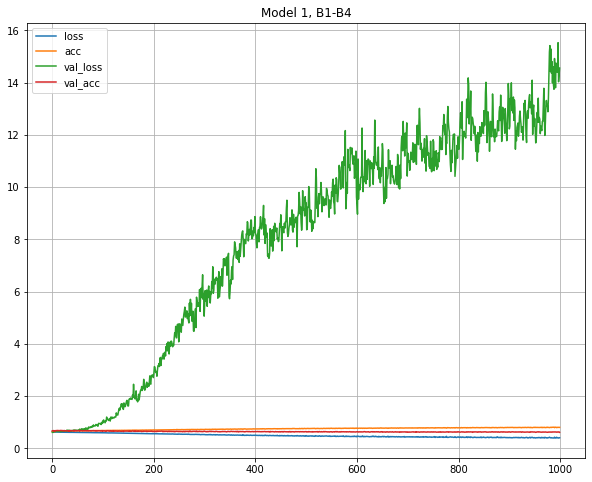

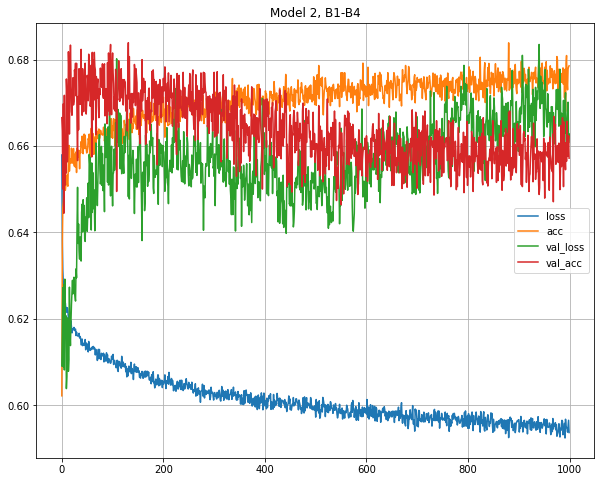

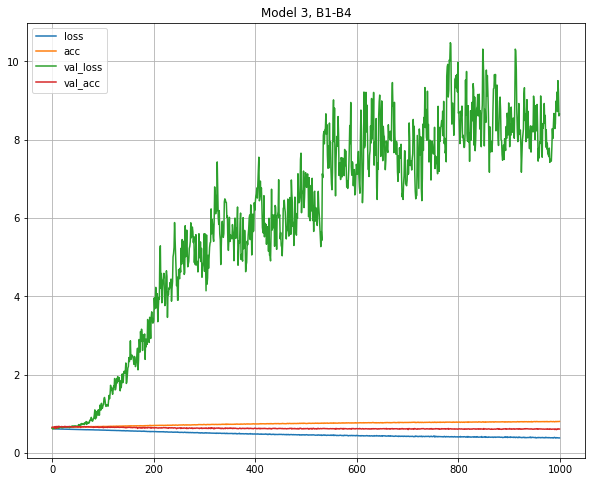

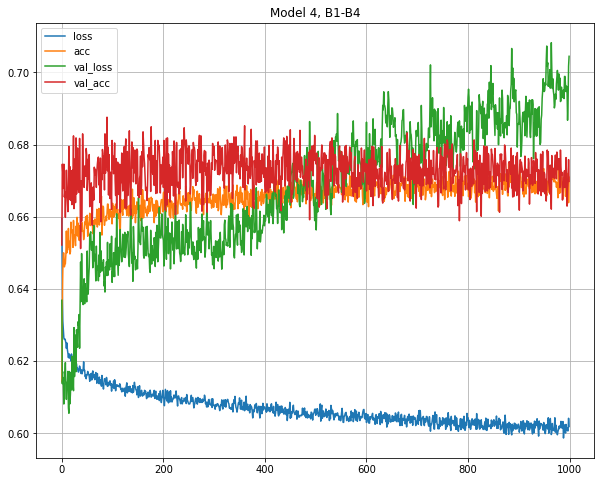

In [70]:
# Visualize the training results
plt.figure(figsize=(10,8))
plt.title('Model 1, B1-B4')
plt.plot(history1.history['loss'],label='loss')
plt.plot(history1.history['accuracy'],label='acc')
plt.plot(history1.history['val_loss'],label='val_loss')
plt.plot(history1.history['val_accuracy'],label='val_acc')
plt.grid()
plt.legend()
plt.show()

# Visualize the training results
plt.figure(figsize=(10,8))
plt.title('Model 2, B1-B4')
plt.plot(history2.history['loss'],label='loss')
plt.plot(history2.history['accuracy'],label='acc')
plt.plot(history2.history['val_loss'],label='val_loss')
plt.plot(history2.history['val_accuracy'],label='val_acc')
plt.grid()
plt.legend()
plt.show()

# Visualize the training results
plt.figure(figsize=(10,8))
plt.title('Model 3, B1-B4')
plt.plot(history3.history['loss'],label='loss')
plt.plot(history3.history['accuracy'],label='acc')
plt.plot(history3.history['val_loss'],label='val_loss')
plt.plot(history3.history['val_accuracy'],label='val_acc')
plt.grid()
plt.legend()
plt.show()

# Visualize the training results
plt.figure(figsize=(10,8))
plt.title('Model 4, B1-B4')
plt.plot(history4.history['loss'],label='loss')
plt.plot(history4.history['accuracy'],label='acc')
plt.plot(history4.history['val_loss'],label='val_loss')
plt.plot(history4.history['val_accuracy'],label='val_acc')
plt.grid()
plt.legend()
plt.show()

In [71]:
# Validation model
print('--------model 1,B1-B4-----------')
score = model1.evaluate(x_valid, y_valid, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])
print('-----------------------------------------------')

# Validation model
print('--------model 2, B1-B4-----------')
score = model2.evaluate(x_valid, y_valid, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])
print('-----------------------------------------------')
# Validation model
print('--------model 3, B1-B4-----------')
score = model3.evaluate(x_valid, y_valid, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])
print('-----------------------------------------------')
# Validation model
print('--------model 4, B1-B4-----------')
score = model4.evaluate(x_valid, y_valid, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])
print('-----------------------------------------------')

--------model 1,B1-B4-----------
Validation loss: 14.555788040161133
Validation accuracy: 0.6104187369346619
-----------------------------------------------
--------model 2, B1-B4-----------
Validation loss: 0.6627904176712036
Validation accuracy: 0.6571908593177795
-----------------------------------------------
--------model 3, B1-B4-----------
Validation loss: 8.653884887695312
Validation accuracy: 0.6154600381851196
-----------------------------------------------
--------model 4, B1-B4-----------
Validation loss: 0.7044452428817749
Validation accuracy: 0.6697941422462463
-----------------------------------------------
